# Housing prices regression

In [1]:
# load libraries
import sys
sys.path.append(r'/home/thomas/IdeaProjects/e2e_ml')
from e2eml.regression import regression_blueprints as rb
from e2eml.full_processing.postprocessing import save_to_production, load_for_production
from e2eml.test.regression_blueprints_test import load_housingprices_data
import pandas as pd
from sklearn.metrics import mean_absolute_error

[nltk_data] Downloading package punkt to /home/thomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/thomas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/thomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/thomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Feature engineering
Load & preprocess housing prices dataset.



In [2]:
# load Housing price data
test_df, test_target, val_df, val_df_target, test_categorical_cols = load_housingprices_data()

Do dataframe splits.


# Using e2eml - Run and save a pipeline
We only need a few steps to get ur full pipeline:
- Instantiate class
- Run chosen blueprint
- Save blueprint for later usage

In [3]:
# Instantiate class
housing_ml = rb.RegressionBluePrint(datasource=test_df,
                                         target_variable=test_target, # only a string with the target column name within the dataframe
                                         categorical_columns=test_categorical_cols, # here we specify cat columns (that is optional however)
                                         tune_mode='accurate',
                                         ml_task='regression') # usually not needed, but sometimes it might have to be called explicitly

# algorithm a la carte
housing_ml.special_blueprint_algorithms = {"ridge": True,
                                             "elasticnet": True,
                                             "catboost": True,
                                             "xgboost": True,
                                             "ngboost": True,
                                             "lgbm": True,
                                             "tabnet": True,
                                             "vowpal_wabbit": True,
                                             "sklearn_ensemble": True
                                             }

# adjust rounds of bruteforce feature selection
housing_ml.hyperparameter_tuning_rounds["bruteforce_random"] = 500

# adjust algorithm hyperparameter tuning rounds
housing_ml.hyperparameter_tuning_rounds["lgbm"] = 200

# define tuning timeouts to 1 hour per algorithm
housing_ml.hyperparameter_tuning_max_runtime_secs = {"xgboost": 1*60*60,
                                                       "lgbm": 1*60*60,
                                                       "tabnet": 1*60*60,
                                                       "ngboost": 1*60*60,
                                                       "sklearn_ensemble": 1*60*60,
                                                       "ridge": 1*60*60,
                                                       "elasticnet": 1*60*60,
                                                       "catboost": 1*60*60,
                                                       "bruteforce_random": 1*60*60}

Ml task is regression
Preferred training mode auto has been chosen. e2eml will automatically detect, if LGBM and Xgboost can use GPU acceleration and optimize the workflow accordingly.


Some target classes have less members than allowed. You can ignore this message, if you
            are running a blueprint without NLP transformers.
            
            In order to create a strong model e2eml splits the data into several folds. Please provide data with at least
             6 class members for each target class. Otherwise the model is likely to fail to a CUDA error on runtime. 
             You can use the following function on your dataframe before passing it to e2eml:
            
            def handle_rarity(all_data, threshold=6, mask_as='miscellaneous', rarity_cols=None, normalize=False):
                if isinstance(rarity_cols, list):
                    for col in rarity_cols:
                        frequencies = all_data[col].value_counts(normalize=normalize)
                        condition = frequencies < threshold
                        mask_obs = frequencies[condition].index
                        mask_dict = dict.fromkeys(mask_obs, mask_as)
  

Started Execute test train split at 21:23:16.
Started Started column type detection and casting at 21:23:16.
Started Checking for duplicate columns at 21:23:16.
Started Reset dataframe index. at 21:23:16.
Started Target skewness handling at 21:23:16.
Started Apply datetime transformation at 21:23:16.
Started Start Spacy, POS tagging at 21:23:16.
Started Start TFIDF to PCA loop at 21:23:17.
Started Handle rare features at 21:23:17.
Started Remove cardinality at 21:23:17.
Started  Delete columns with high share of NULLs at 21:23:17.
Started Holistic NULL filling at 21:23:17.
Started Binarize numeric columns + PCA binarized features at 21:23:17.
Started Onehot + PCA categorical features at 21:23:17.


is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


Started Execute categorical encoding at 21:23:18.


is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


Started Fill nulls at 21:23:18.
Started Execute numerical binning at 21:23:18.
Started Handle outliers at 21:23:20.
Started Remove collinearity at 21:23:20.
Started Remove skewness at 21:23:21.
Started Execute clustering as a feature at 21:23:21.
Started Scale data at 21:23:21.
Started Execute clustering as a feature at 21:23:21.
Started Execute clustering as a feature at 21:23:22.
Started Execute clustering as a feature at 21:23:22.
Started Execute clustering as a feature at 21:23:23.
Started Execute clustering as a feature at 21:23:23.
Started Execute clustering as a feature at 21:23:24.
Started Execute clustering as a feature at 21:23:24.
Started Execute clustering as a feature at 21:23:25.
Started Execute clustering as a feature at 21:23:25.
Started Select best features at 21:23:26.
Features before selection are...ScreenPorch
Features before selection are...Total_Home_Quality
Features before selection are...FireplaceQu
Features before selection are...3SsnPorch
Features before selec

Round:  1  iteration:  7
[21:23:26] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Round:  1  iteration:  8
[21:23:26] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Round:  1  iteration:  9
[21:23:26] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This ma

``multivariate`` option is an experimental feature. The interface can change in the future.
[I 2021-09-17 21:23:27,246] A new study created in memory with name: bruteforce_random


Started Select best features at 21:23:27.
Features before selection are...ScreenPorch
Features before selection are...Total_Home_Quality
Features before selection are...FireplaceQu
Features before selection are...CentralAir
Features before selection are...HalfBath
Features before selection are...LandContour
Features before selection are...YearBuilt
Features before selection are...GarageQual
Features before selection are...Fence
Features before selection are...OpenPorchSF
Features before selection are...HasEnclosedPorch
Features before selection are...MoSold
Features before selection are...LotArea
Features before selection are...BsmtFullBath
Features before selection are...BsmtQual
Features before selection are...TotalSF
Features before selection are...MasVnrType
Features before selection are...BldgType
Features before selection are...BedroomAbvGr
Features before selection are...RoofStyle
Features before selection are...2ndFlrSF
Features before selection are...BsmtCond
Features before s

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2021-09-17 21:23:28,738] Trial 0 finished with value: -21031032029.435787 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 0, 'BsmtQual': 0, 'TotalSF': 0, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 0, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 0, 'ExterQual': 0, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 0, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 1, 'OverallQual': 1, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 'A

[I 2021-09-17 21:23:44,366] Trial 6 finished with value: -20962745116.69983 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 0, 'TotalSF': 0, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 'Al

[I 2021-09-17 21:23:53,940] Trial 12 finished with value: -20926549234.832405 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, '

[I 2021-09-17 21:24:03,755] Trial 18 finished with value: -21016123628.95918 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 0, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 0, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 'A

[I 2021-09-17 21:24:13,577] Trial 24 finished with value: -20920999385.878994 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:24:23,167] Trial 30 finished with value: -20929941179.870716 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:24:32,716] Trial 36 finished with value: -20946205701.73424 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 0, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 0, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 'A

[I 2021-09-17 21:24:42,237] Trial 42 finished with value: -20921921239.75403 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 0, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 'A

[I 2021-09-17 21:24:51,596] Trial 48 finished with value: -20926630822.999702 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 0, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, '

[I 2021-09-17 21:25:01,134] Trial 54 finished with value: -20941708146.491333 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 0, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 1, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:25:10,515] Trial 60 finished with value: -21027342831.65258 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 0, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 0, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 'A

[I 2021-09-17 21:25:19,880] Trial 66 finished with value: -20925924461.939064 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, '

[I 2021-09-17 21:25:29,815] Trial 72 finished with value: -20935510265.98334 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, 'A

[I 2021-09-17 21:25:39,519] Trial 78 finished with value: -20918431220.280067 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, '

[I 2021-09-17 21:25:49,209] Trial 84 finished with value: -20928485006.648712 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 0, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:25:58,885] Trial 90 finished with value: -20944407835.1105 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 0, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 'Al

[I 2021-09-17 21:26:08,585] Trial 96 finished with value: -20907439026.976555 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, '

[I 2021-09-17 21:26:18,039] Trial 102 finished with value: -20937462852.8969 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 0, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 'A

[I 2021-09-17 21:26:28,092] Trial 108 finished with value: -20923142128.76938 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 1, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 0, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 1, '

[I 2021-09-17 21:26:37,935] Trial 114 finished with value: -20913283283.51248 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:26:47,853] Trial 120 finished with value: -20921865364.002556 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, 

[I 2021-09-17 21:26:57,955] Trial 126 finished with value: -21010945239.253757 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 0, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 0, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, 

[I 2021-09-17 21:27:08,195] Trial 132 finished with value: -21072081568.9112 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 0, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 0, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 1, 'A

[I 2021-09-17 21:27:18,538] Trial 138 finished with value: -20922431935.90084 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:27:28,613] Trial 144 finished with value: -20928782103.42295 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 1, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:27:38,917] Trial 150 finished with value: -20920334539.88903 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 0, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:27:49,169] Trial 156 finished with value: -20931611166.810623 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:27:59,410] Trial 162 finished with value: -20931544477.621082 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 0, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 1, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:28:09,439] Trial 168 finished with value: -20931976453.361305 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:28:19,913] Trial 174 finished with value: -20932476351.91447 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 0, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:28:29,916] Trial 180 finished with value: -20944544628.950676 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 0, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 0, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:28:39,715] Trial 186 finished with value: -20999089484.283134 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 0, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:28:49,569] Trial 192 finished with value: -20924275017.94041 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 0, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, '

[I 2021-09-17 21:28:59,792] Trial 198 finished with value: -20940817912.19797 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:29:09,765] Trial 204 finished with value: -20919678551.762493 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 1, 

[I 2021-09-17 21:29:19,762] Trial 210 finished with value: -20939234504.403656 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 0, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, 

[I 2021-09-17 21:29:29,570] Trial 216 finished with value: -20951649115.115627 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, 

[I 2021-09-17 21:29:39,711] Trial 222 finished with value: -20979902640.7889 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 0, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 0, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 0, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 1, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 1, 'A

[I 2021-09-17 21:29:49,457] Trial 228 finished with value: -20917401637.702076 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:29:59,296] Trial 234 finished with value: -20939588829.047676 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 0, 'GarageArea': 0, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:30:09,464] Trial 240 finished with value: -20935202388.930794 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:30:19,287] Trial 246 finished with value: -20943796008.155956 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:30:29,414] Trial 252 finished with value: -20922568028.256813 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:30:39,555] Trial 258 finished with value: -20934946225.168686 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 0, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:30:49,837] Trial 264 finished with value: -20971078583.208595 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 0, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:30:59,786] Trial 270 finished with value: -20914816167.671356 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:31:09,681] Trial 276 finished with value: -20916253465.328262 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:31:19,703] Trial 282 finished with value: -20940022265.19427 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 0, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:31:29,862] Trial 288 finished with value: -20933255928.0651 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 0, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 0, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 'A

[I 2021-09-17 21:31:39,581] Trial 294 finished with value: -20925544425.08257 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 0, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:31:49,448] Trial 300 finished with value: -20925198419.32135 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:31:59,848] Trial 306 finished with value: -20917294947.04004 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:32:10,061] Trial 312 finished with value: -20925286229.755383 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 0, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 

[I 2021-09-17 21:32:20,130] Trial 318 finished with value: -20930584701.657753 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 0, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 

[I 2021-09-17 21:32:30,103] Trial 324 finished with value: -20927600103.780952 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 

[I 2021-09-17 21:32:39,963] Trial 330 finished with value: -20909781536.259346 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 

[I 2021-09-17 21:32:49,722] Trial 336 finished with value: -20920703153.036366 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 

[I 2021-09-17 21:32:59,996] Trial 342 finished with value: -20919064767.701435 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:33:09,904] Trial 348 finished with value: -20922114299.840893 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 

[I 2021-09-17 21:33:20,013] Trial 354 finished with value: -20912537581.20593 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:33:30,284] Trial 360 finished with value: -20909810397.10752 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:33:40,613] Trial 366 finished with value: -20929806497.007675 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 0, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 

[I 2021-09-17 21:33:50,594] Trial 372 finished with value: -20921346514.69827 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, '

[I 2021-09-17 21:34:01,288] Trial 378 finished with value: -20923720542.035065 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:34:11,400] Trial 384 finished with value: -20922178870.01689 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 0, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 1, '

[I 2021-09-17 21:34:21,616] Trial 390 finished with value: -20957070512.332073 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 0, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:34:31,808] Trial 396 finished with value: -20908402531.046154 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 

[I 2021-09-17 21:34:41,898] Trial 402 finished with value: -20931678346.166348 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:34:52,250] Trial 408 finished with value: -20908375290.37899 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:35:02,419] Trial 414 finished with value: -20917926931.944477 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:35:12,337] Trial 420 finished with value: -20961991248.9225 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 0, 'TotalSF': 0, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 1, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 1, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 0, 'WoodDeckSF': 0, 'A

[I 2021-09-17 21:35:22,229] Trial 426 finished with value: -20956700801.428802 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 0, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 1, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:35:32,211] Trial 432 finished with value: -20933037711.781284 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 0, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:35:42,419] Trial 438 finished with value: -20928407233.64732 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 1, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 0, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 0, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, '

[I 2021-09-17 21:35:52,721] Trial 444 finished with value: -20928577824.29752 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 0, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:36:03,045] Trial 450 finished with value: -20922291219.638466 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 0, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

[I 2021-09-17 21:36:13,096] Trial 456 finished with value: -20956516806.64745 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 1, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 0, '

[I 2021-09-17 21:36:23,318] Trial 462 finished with value: -20924518955.83753 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 0, 'LotArea': 1, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 0, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 1, 'OverallCond': 1, 'Functional': 0, 'EnclosedPorch': 0, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 1, 'YearRemodAdd': 0, 'WoodDeckSF': 0, '

[I 2021-09-17 21:36:33,472] Trial 468 finished with value: -20928418075.956043 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 0, 'BsmtCond': 1, 'LotShape': 1, 'BsmtFinSF1': 1, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 0, 'MSZoning': 1, 'GarageFinish': 0, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 0, 'LotFrontage': 1, 'HouseStyle': 0, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:36:43,397] Trial 474 finished with value: -20953688860.58914 and parameters: {'ScreenPorch': 1, 'Total_Home_Quality': 1, 'FireplaceQu': 0, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 0, 'Condition2': 0, 'Condition1': 1, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 0, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 0, 'LotFrontage': 1, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 1, 'YearRemodAdd': 1, 'WoodDeckSF': 1, '

[I 2021-09-17 21:36:53,430] Trial 480 finished with value: -20928687937.236927 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 0, 'HalfBath': 0, 'LandContour': 1, 'YearBuilt': 1, 'GarageQual': 1, 'Fence': 0, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 1, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 1, 'SaleCondition': 1, 'GarageArea': 0, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 1, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:37:03,282] Trial 486 finished with value: -20907898691.081375 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 1, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 0, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 0, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:37:13,047] Trial 492 finished with value: -20921193187.202873 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 0, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 1, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 0, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 0, 'BldgType': 0, 'BedroomAbvGr': 1, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 0, 'BsmtFinType1': 0, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 0, 'Exterior2nd': 0, 'SaleCondition': 1, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 0, 'HeatingQC': 0, 'ExterQual': 0, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 1, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 0, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 0, 'OverallQual': 0, 'YrSold': 1, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 0, 

[I 2021-09-17 21:37:23,981] Trial 498 finished with value: -20931260080.963806 and parameters: {'ScreenPorch': 0, 'Total_Home_Quality': 1, 'FireplaceQu': 1, 'CentralAir': 1, 'HalfBath': 0, 'LandContour': 0, 'YearBuilt': 0, 'GarageQual': 1, 'Fence': 1, 'OpenPorchSF': 0, 'HasEnclosedPorch': 0, 'MoSold': 1, 'LotArea': 0, 'BsmtFullBath': 1, 'BsmtQual': 1, 'TotalSF': 1, 'MasVnrType': 1, 'BldgType': 1, 'BedroomAbvGr': 0, 'RoofStyle': 0, '2ndFlrSF': 1, 'BsmtCond': 0, 'LotShape': 0, 'BsmtFinSF1': 1, 'Condition2': 1, 'Condition1': 1, 'BsmtFinType1': 1, 'TotRmsAbvGrd': 1, 'MSZoning': 1, 'GarageFinish': 1, 'LotConfig': 1, 'Exterior2nd': 0, 'SaleCondition': 0, 'GarageArea': 1, 'FullBath': 1, 'BsmtUnfSF': 1, 'HeatingQC': 1, 'ExterQual': 1, 'LotFrontage': 0, 'HouseStyle': 1, 'Fireplaces': 0, 'BsmtFinType2': 1, 'Neighborhood': 1, 'GarageType': 0, 'OverallCond': 1, 'Functional': 1, 'EnclosedPorch': 1, 'MasVnrArea': 1, 'OverallQual': 0, 'YrSold': 0, 'MSSubClass': 0, 'YearRemodAdd': 1, 'WoodDeckSF': 1, 

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/samplers/_tpe/sampler.py:250: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2021-09-17 21:37:49,446] A new study created in memory with name: ridge


 Final features are... Total_Home_Quality.
 Final features are... FireplaceQu.
 Final features are... CentralAir.
 Final features are... MoSold.
 Final features are... BsmtFullBath.
 Final features are... BsmtQual.
 Final features are... TotalSF.
 Final features are... MasVnrType.
 Final features are... BldgType.
 Final features are... 2ndFlrSF.
 Final features are... BsmtCond.
 Final features are... BsmtFinSF1.
 Final features are... Condition1.
 Final features are... TotRmsAbvGrd.
 Final features are... LotConfig.
 Final features are... Exterior2nd.
 Final features are... SaleCondition.
 Final features are... FullBath.
 Final features are... ExterQual.
 Final features are... LotFrontage.
 Final features are... HouseStyle.
 Final features are... Fireplaces.
 Final features are... Neighborhood.
 Final features are... GarageType.
 Final features are... OverallCond.
 Final features are... Functional.
 Final features are... EnclosedPorch.
 Final features are... MSSubClass.
 Final features

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[I 2021-09-17 21:37:49,540] Trial 0 finished with value: -975042239.58345 and parameters: {'solver': 'svd', 'alpha': 157.41890047456639, 'max_iter': 635.8358856676257, 'tol': 0.006796578090758156, 'normalize': False}. Best is trial 0 with value: -975042239.58345.
[I 2021-09-17 21:37:49,689] Trial 1 finished with value: -973639738.388469 and parameters: {'solver': 'auto', 'alpha': 0.055895242052179224, 'max_iter': 684.7920095574783, 'tol': 3.613894271216525e-05, 'normalize': False}. Best is trial 1 with value: -973639738.388469.
[I 2021-09-17 21:37:49,831] Trial 2 finished with value: -967274462.7458723 and parameters: {'solver': 'svd', 'alpha': 0.010547383621352036, 'max_iter': 15.673095467235418, 'tol': 0.06245139574743072, 'normalize': True}. Best is trial 2 with value: -967274462.7458723.
[I 2021-09-17 21:37:49,964] Trial 3 finished with value: -979450626.6237485 and parameters: {'solver': 'cholesky', 'alpha': 285.7080075040722, 'max_iter': 59.75027999960293, 'tol': 0.00446775281797

[I 2021-09-17 21:37:55,980] Trial 30 finished with value: -951829116.4976072 and parameters: {'solver': 'svd', 'alpha': 0.21729124726984658, 'max_iter': 164.97105979229158, 'tol': 0.09228608916024686, 'normalize': True}. Best is trial 12 with value: -951174562.4553732.
[I 2021-09-17 21:37:56,119] Trial 31 finished with value: -945848309.8447068 and parameters: {'solver': 'cholesky', 'alpha': 0.1052763786271727, 'max_iter': 152.72618456739343, 'tol': 0.05471828622196775, 'normalize': True}. Best is trial 31 with value: -945848309.8447068.
[I 2021-09-17 21:37:56,248] Trial 32 finished with value: -990177871.8814169 and parameters: {'solver': 'cholesky', 'alpha': 0.4357109418478832, 'max_iter': 174.96615703939838, 'tol': 0.024746537587167224, 'normalize': True}. Best is trial 31 with value: -945848309.8447068.
[I 2021-09-17 21:37:56,410] Trial 33 finished with value: -945891409.6248436 and parameters: {'solver': 'svd', 'alpha': 0.14498349830463944, 'max_iter': 130.82520548117563, 'tol': 0

[I 2021-09-17 21:38:00,092] Trial 60 finished with value: -945671609.5729706 and parameters: {'solver': 'svd', 'alpha': 0.11047705303771542, 'max_iter': 188.71122439723163, 'tol': 0.007362715375212428, 'normalize': True}. Best is trial 60 with value: -945671609.5729706.
[I 2021-09-17 21:38:00,234] Trial 61 finished with value: -949234897.2738272 and parameters: {'solver': 'svd', 'alpha': 0.0684252714846403, 'max_iter': 109.51494771791796, 'tol': 0.005455410278722492, 'normalize': True}. Best is trial 60 with value: -945671609.5729706.
[I 2021-09-17 21:38:00,372] Trial 62 finished with value: -978009607.3071038 and parameters: {'solver': 'svd', 'alpha': 0.37626400914722424, 'max_iter': 395.9196892937698, 'tol': 0.0002500617062513324, 'normalize': True}. Best is trial 60 with value: -945671609.5729706.
[I 2021-09-17 21:38:00,503] Trial 63 finished with value: -1007725324.0256622 and parameters: {'solver': 'saga', 'alpha': 0.5138284985152293, 'max_iter': 57.63350816419178, 'tol': 0.012350

[I 2021-09-17 21:38:03,877] Trial 90 finished with value: -1789088681.0491796 and parameters: {'solver': 'sparse_cg', 'alpha': 0.006856368396373411, 'max_iter': 153.05200546269924, 'tol': 0.004843626000861955, 'normalize': False}. Best is trial 77 with value: -938357351.1819502.
[I 2021-09-17 21:38:04,011] Trial 91 finished with value: -970554290.578381 and parameters: {'solver': 'cholesky', 'alpha': 0.004826301021683172, 'max_iter': 23.430896090885746, 'tol': 0.03146828534954205, 'normalize': True}. Best is trial 77 with value: -938357351.1819502.
[I 2021-09-17 21:38:04,141] Trial 92 finished with value: -973597316.6957315 and parameters: {'solver': 'auto', 'alpha': 0.2162280226507442, 'max_iter': 349.08045192489277, 'tol': 0.0005857944041450916, 'normalize': False}. Best is trial 77 with value: -938357351.1819502.
[I 2021-09-17 21:38:04,270] Trial 93 finished with value: -946192796.1541907 and parameters: {'solver': 'cholesky', 'alpha': 0.09821604441541033, 'max_iter': 31.00749159741

Started Predict with ridge regression at 21:38:07.


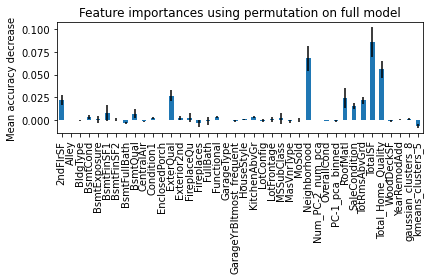

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/samplers/_tpe/sampler.py:250: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2021-09-17 21:38:08,633] A new study created in memory with name: elasticnet


The R2 score is 0.8468996497114332
The MAE score is 19147.349094509478
The Median absolute error score is 13446.806797216937
The MSE score is 25285.94136496999
The RMSE score is 639378830.7127004
Started Train elasticnet regression model at 21:38:08.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[I 2021-09-17 21:38:08,682] Trial 0 finished with value: -5785255268.057823 and parameters: {'alpha': 0.1767016940294795, 'l1_ratio': 0.5056764656565493, 'max_iter': 1570.2970884055396, 'tol': 0.0024810409748678114, 'normalize': True, 'warm_start': False}. Best is trial 0 with value: -5785255268.057823.
[I 2021-09-17 21:38:08,815] Trial 1 finished with value: -6974939182.242541 and parameters: {'alpha': 4.0428727350273315, 'l1_ratio': 0.017706299292801365, 'max_iter': 11.5279871282324, 'tol': 0.07579479953348005, 'normalize': True, 'warm_start': False}. Best is trial 0 with value: -5785255268.057823.
[I 2021-09-17 21:38:08,949] Trial 2 finished with value: -5489468283.119991 and parameters: {'alpha': 0.06690421166498801, 'l1_ratio': 0.001407053390297056, 'max_iter': 197.62189340280077, 'tol': 0.0001461896279370495, 'normalize': True, 'warm_start': False}. Best is trial 2 with value: -5489468283.119991.
[I 2021-09-17 21:38:09,086] Trial 3 finished with value: -6767083855.158281 and para

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 332727936438.69574, tolerance: 242183161507.3009

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 240690253684.94574, tolerance: 216232574072.8656

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 295167621195.8616, tolerance: 222232848114.65268

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:09,235] Trial 4 finished with value: -1099909885.6019094 and parameters: {'alpha': 0.002456459215250751, 'l1_ratio': 0.4930613058479675, 'max_iter': 7886.714129990501, 'tol': 0.01712337597316398, 'normalize': True, 'warm_start': True}. Best is trial 4 with value: -1099909885.6019094.
[I 2021-09-17 21:38:09,373] Trial 5 finished with value: -1023606519.505801 and parameters: {'alpha': 0.0053979568559964445, 'l1_ratio': 0.0009350746868089895, 'max_iter': 12.6813521690846, 'tol': 0.0433792069749094, 'normalize': False, 'warm_start': False}. Best is trial 5 with value: -1023606519.505801.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1062400477765.1106, tolerance: 1117335658.4936998

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 885463469470.4958, tolerance: 997610089.9657698

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 922489013758.476, tolerance: 1025292940.0280797

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did

[I 2021-09-17 21:38:09,505] Trial 6 finished with value: -6940426336.841133 and parameters: {'alpha': 1.9066091638188458, 'l1_ratio': 1.2854240219160987e-05, 'max_iter': 8105.016126411587, 'tol': 0.012604664585649461, 'normalize': True, 'warm_start': False}. Best is trial 5 with value: -1023606519.505801.
[I 2021-09-17 21:38:09,641] Trial 7 finished with value: -1500309760.6437716 and parameters: {'alpha': 0.003395900933162751, 'l1_ratio': 1.4990358443636941e-05, 'max_iter': 13.667272915456222, 'tol': 0.0002001342062287998, 'normalize': True, 'warm_start': True}. Best is trial 5 with value: -1023606519.505801.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 316228727428.4738, tolerance: 90292205006.24007

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 229704410607.19824, tolerance: 80617148548.64339

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 279380538370.8831, tolerance: 82854207353.65172

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did 

[I 2021-09-17 21:38:09,781] Trial 8 finished with value: -977662204.7648109 and parameters: {'alpha': 0.04848496183873291, 'l1_ratio': 0.0018027715307856196, 'max_iter': 26.471141828218165, 'tol': 0.016172900811143146, 'normalize': False, 'warm_start': True}. Best is trial 8 with value: -977662204.7648109.
[I 2021-09-17 21:38:09,932] Trial 9 finished with value: -1055083147.2199036 and parameters: {'alpha': 0.001079276454867846, 'l1_ratio': 0.0780574290788317, 'max_iter': 1319.9942261535016, 'tol': 0.00824192526487645, 'normalize': True, 'warm_start': True}. Best is trial 8 with value: -977662204.7648109.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 320634943793.07477, tolerance: 39529816900.95544

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 233776146404.71933, tolerance: 35294089018.92207

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 283416793343.4335, tolerance: 36273470627.25181

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did

[I 2021-09-17 21:38:10,087] Trial 10 finished with value: -973858728.9547577 and parameters: {'alpha': 0.17099341077932054, 'l1_ratio': 5.416986124524359e-05, 'max_iter': 69.09344762377934, 'tol': 0.007080476191467686, 'normalize': False, 'warm_start': True}. Best is trial 10 with value: -973858728.9547577.
[I 2021-09-17 21:38:10,266] Trial 11 finished with value: -988058306.3570837 and parameters: {'alpha': 0.7949613753354344, 'l1_ratio': 1.709803922258554e-05, 'max_iter': 143.83180957346582, 'tol': 0.00736678944274676, 'normalize': False, 'warm_start': True}. Best is trial 10 with value: -973858728.9547577.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 337178605565.88556, tolerance: 259691211144.4791

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 248083265578.7787, tolerance: 231864588356.93222

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 298082873038.6285, tolerance: 238298637790.47836

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:10,414] Trial 12 finished with value: -999712464.4484558 and parameters: {'alpha': 1.1949959731069204, 'l1_ratio': 0.0051593531297816, 'max_iter': 19.614422844068205, 'tol': 0.04651520249256327, 'normalize': False, 'warm_start': True}. Best is trial 10 with value: -973858728.9547577.
[I 2021-09-17 21:38:10,556] Trial 13 finished with value: -1002016779.0202265 and parameters: {'alpha': 0.004351646475466105, 'l1_ratio': 2.5603307270955056e-06, 'max_iter': 15.506339849314763, 'tol': 0.03433407745281304, 'normalize': False, 'warm_start': True}. Best is trial 10 with value: -973858728.9547577.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 310719548848.2126, tolerance: 16168127306.451948

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 224623899975.216, tolerance: 14435668291.93655

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 274021721787.26987, tolerance: 14836246077.681112

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did

[I 2021-09-17 21:38:10,739] Trial 14 finished with value: -973201096.5656908 and parameters: {'alpha': 0.002767949074658302, 'l1_ratio': 0.002244158859171552, 'max_iter': 149.4130067773459, 'tol': 0.00289599217574885, 'normalize': False, 'warm_start': True}. Best is trial 14 with value: -973201096.5656908.
[I 2021-09-17 21:38:10,931] Trial 15 finished with value: -973219844.5803658 and parameters: {'alpha': 0.0026285980211515686, 'l1_ratio': 0.0007324625067659267, 'max_iter': 185.3043423550892, 'tol': 6.654771063078783e-05, 'normalize': False, 'warm_start': True}. Best is trial 14 with value: -973201096.5656908.
[I 2021-09-17 21:38:11,164] Trial 16 finished with value: -972861096.2119186 and parameters: {'alpha': 0.006522615292974654, 'l1_ratio': 0.1329534721128682, 'max_iter': 2130.4112108565714, 'tol': 7.89327211903318e-05, 'normalize': False, 'warm_start': True}. Best is trial 16 with value: -972861096.2119186.
[I 2021-09-17 21:38:11,300] Trial 17 finished with value: -5029055780.53

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 309590601535.6744, tolerance: 28274957896.119175

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 223841878268.84808, tolerance: 25245218906.333553

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 272349544756.345, tolerance: 25945752728.919697

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:12,227] Trial 21 finished with value: -973464206.7091697 and parameters: {'alpha': 0.0010453984852638485, 'l1_ratio': 0.0005407540817271115, 'max_iter': 289.34896683823695, 'tol': 0.005064535631415592, 'normalize': False, 'warm_start': True}. Best is trial 18 with value: -972410092.5223625.
[I 2021-09-17 21:38:12,453] Trial 22 finished with value: -973490067.5920093 and parameters: {'alpha': 0.0016582221950030345, 'l1_ratio': 0.4606179118613698, 'max_iter': 2544.42105375486, 'tol': 0.00010923835238553742, 'normalize': False, 'warm_start': True}. Best is trial 18 with value: -972410092.5223625.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 306608451404.14465, tolerance: 7201548926.157255

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 219779636750.5947, tolerance: 6429883283.061033

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 270503840577.49475, tolerance: 6608307195.001658

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did

[I 2021-09-17 21:38:12,659] Trial 23 finished with value: -972222606.1400877 and parameters: {'alpha': 0.016578033384664494, 'l1_ratio': 0.0743904301064069, 'max_iter': 219.76992769669948, 'tol': 0.001289922385451618, 'normalize': False, 'warm_start': True}. Best is trial 23 with value: -972222606.1400877.
[I 2021-09-17 21:38:12,822] Trial 24 finished with value: -971758491.7646964 and parameters: {'alpha': 0.07094411480747566, 'l1_ratio': 0.1793557000455676, 'max_iter': 93.45101944320035, 'tol': 0.00032853075990426495, 'normalize': False, 'warm_start': True}. Best is trial 24 with value: -971758491.7646964.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 315061378289.0166, tolerance: 5096906676.780286

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 228228518593.90277, tolerance: 4550759200.887514

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 278325467111.87244, tolerance: 4677038982.833354

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did

[I 2021-09-17 21:38:12,963] Trial 25 finished with value: -984534576.91874 and parameters: {'alpha': 0.02026991217980419, 'l1_ratio': 0.3344513044659593, 'max_iter': 22.234124007242123, 'tol': 0.0009129444354750664, 'normalize': False, 'warm_start': True}. Best is trial 24 with value: -971758491.7646964.
[I 2021-09-17 21:38:13,131] Trial 26 finished with value: -1009870090.1752746 and parameters: {'alpha': 2.632939190587253, 'l1_ratio': 0.13231365794618594, 'max_iter': 102.55608334151053, 'tol': 0.00047986551935767953, 'normalize': False, 'warm_start': True}. Best is trial 24 with value: -971758491.7646964.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 310450557254.4417, tolerance: 42231987096.77258

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 224355113106.4943, tolerance: 37706714295.54316

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 273730963482.22714, tolerance: 38753044248.18197

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did 

[I 2021-09-17 21:38:13,336] Trial 27 finished with value: -971728703.5779169 and parameters: {'alpha': 0.07530817012514536, 'l1_ratio': 0.31970838335014495, 'max_iter': 317.3666725019641, 'tol': 0.0033189261574253955, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:13,528] Trial 28 finished with value: -973443255.6056573 and parameters: {'alpha': 0.001959490525006403, 'l1_ratio': 0.40350087087668346, 'max_iter': 178.5960341649532, 'tol': 0.00756448176591077, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:13,721] Trial 29 finished with value: -978608437.197904 and parameters: {'alpha': 0.47697588719958445, 'l1_ratio': 0.24160026864277656, 'max_iter': 390.8039169530156, 'tol': 0.02224652769347928, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 316563486091.3633, tolerance: 700058662.7816414

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 230219783609.2678, tolerance: 625045464.4045066

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 279686348261.6838, tolerance: 642389956.0523713

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did n

[I 2021-09-17 21:38:13,949] Trial 30 finished with value: -973245601.3050315 and parameters: {'alpha': 0.002700465721126781, 'l1_ratio': 0.09469530405168741, 'max_iter': 586.9651947652395, 'tol': 0.0026421273823490727, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:14,117] Trial 31 finished with value: -971915735.009443 and parameters: {'alpha': 0.08218966215135615, 'l1_ratio': 0.08234840723604095, 'max_iter': 120.75929533432868, 'tol': 0.00012539265504000634, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 325941585942.9804, tolerance: 95548037.43935809

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 238327011636.97552, tolerance: 85309804.17686921

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 288192492500.5031, tolerance: 87677080.27163519

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did 

[I 2021-09-17 21:38:14,262] Trial 32 finished with value: -980234602.4399751 and parameters: {'alpha': 0.44753940631598543, 'l1_ratio': 0.17709737969297143, 'max_iter': 29.6727656870316, 'tol': 1.7114311607511806e-05, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:14,427] Trial 33 finished with value: -972403168.4221131 and parameters: {'alpha': 0.10913962507215218, 'l1_ratio': 0.029741111543196485, 'max_iter': 97.45203088599786, 'tol': 0.00019393669508234085, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:14,567] Trial 34 finished with value: -7006949551.429216 and parameters: {'alpha': 886.4682325710784, 'l1_ratio': 0.02730459052455391, 'max_iter': 14.53355087581982, 'tol': 8.00358340268311e-05, 'normalize': True, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:14,766] Trial 35 finished with value: -981504690.1397448 a

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 311167668152.5758, tolerance: 531478096.89420223

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 225096557157.90872, tolerance: 474528766.7380489

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 274482261202.78827, tolerance: 487696545.2438909

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:14,921] Trial 36 finished with value: -972814081.3072727 and parameters: {'alpha': 0.0062826272173138195, 'l1_ratio': 0.03291309985771019, 'max_iter': 59.789884190032375, 'tol': 9.519695021038664e-05, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:15,107] Trial 37 finished with value: -972234492.6418642 and parameters: {'alpha': 0.0278965015061437, 'l1_ratio': 0.4597776921428139, 'max_iter': 128.22447518303807, 'tol': 0.0006976502393521847, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:15,259] Trial 38 finished with value: -1058340788.5009435 and parameters: {'alpha': 0.002182822699608192, 'l1_ratio': 0.5356861679794823, 'max_iter': 71.8460293167875, 'tol': 0.010118399030865971, 'normalize': True, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:15,405] Trial 39 finished with value: -1579489842.13294

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 311789202052.2427, tolerance: 7108955725.649294

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226536854089.94296, tolerance: 6347211696.965325

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 274850880513.36365, tolerance: 6523341541.168145

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did

[I 2021-09-17 21:38:15,762] Trial 41 finished with value: -972191839.3831818 and parameters: {'alpha': 0.02052229385089282, 'l1_ratio': 0.21622073145712492, 'max_iter': 302.67255574789436, 'tol': 0.0005145801960463729, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:15,959] Trial 42 finished with value: -971895770.7982401 and parameters: {'alpha': 0.027160708664284973, 'l1_ratio': 0.024281745738881023, 'max_iter': 208.2714487236228, 'tol': 0.0012733373364155684, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 357392375118.32874, tolerance: 1630907145.3509552

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 266947665700.91714, tolerance: 1456150988.8557425

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 314756690137.1496, tolerance: 1496557967.3917766

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective 

[I 2021-09-17 21:38:16,152] Trial 43 finished with value: -977416277.0655546 and parameters: {'alpha': 0.7247544108283062, 'l1_ratio': 0.5681643485812143, 'max_iter': 716.8687473311359, 'tol': 0.0005435885374634226, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:16,295] Trial 44 finished with value: -1063933799.9997257 and parameters: {'alpha': 43.3159290128988, 'l1_ratio': 8.334937832025743e-06, 'max_iter': 20.835474961071522, 'tol': 0.0002921237718374775, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:16,435] Trial 45 finished with value: -7006710428.641214 and parameters: {'alpha': 338.64342330961665, 'l1_ratio': 0.022420960159378975, 'max_iter': 2564.93807409986, 'tol': 1.555048403535175e-05, 'normalize': True, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:16,576] Trial 46 finished with value: -6770073898.591873 a

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 345051934485.07446, tolerance: 122525568.4261958

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 255676497393.83978, tolerance: 109396619.01200612

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 304593391975.1163, tolerance: 112432284.1800849

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:16,744] Trial 47 finished with value: -1079122586.656881 and parameters: {'alpha': 686.0983117510508, 'l1_ratio': 0.00040605463251926416, 'max_iter': 371.4060917659115, 'tol': 0.008882004172243118, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:16,890] Trial 48 finished with value: -1020983209.043816 and parameters: {'alpha': 3.3390006886370363, 'l1_ratio': 9.114948436236661e-05, 'max_iter': 23.50937552008568, 'tol': 2.1946455564451546e-05, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 310338894978.36816, tolerance: 231399517.67342874

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 224208214086.59158, tolerance: 206604427.13824534

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 273623230807.45996, tolerance: 212337528.1124684

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective 

[I 2021-09-17 21:38:17,029] Trial 49 finished with value: -6881339791.0701885 and parameters: {'alpha': 1.0304105812689819, 'l1_ratio': 0.026993763194478063, 'max_iter': 321.68415338300264, 'tol': 0.0003989997197327183, 'normalize': True, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:17,182] Trial 50 finished with value: -973439073.849933 and parameters: {'alpha': 0.0010475253325253249, 'l1_ratio': 0.9102773200170694, 'max_iter': 51.17442656819159, 'tol': 4.1447669229255086e-05, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 329647052340.17334, tolerance: 11935758843.327044

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 241589481190.10944, tolerance: 10656809673.069574

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 291453570414.57776, tolerance: 10952527275.857937

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective

[I 2021-09-17 21:38:17,396] Trial 51 finished with value: -972597727.13082 and parameters: {'alpha': 0.1194825292757836, 'l1_ratio': 0.03141910277954972, 'max_iter': 427.0103632604388, 'tol': 0.00438797906040472, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:17,544] Trial 52 finished with value: -983876428.4612677 and parameters: {'alpha': 1.256618528593244, 'l1_ratio': 0.5229872895395724, 'max_iter': 41.29547162699279, 'tol': 0.0021379015371870945, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:17,777] Trial 53 finished with value: -972486511.000523 and parameters: {'alpha': 0.010854725397562876, 'l1_ratio': 0.04907376788720911, 'max_iter': 349.32410234096847, 'tol': 0.0008588056502360835, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4991640722.616211, tolerance: 196850501.20035318

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3636083958.2562256, tolerance: 175757432.17309886

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5557506943.610657, tolerance: 180634554.69934705

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective d

[I 2021-09-17 21:38:17,981] Trial 54 finished with value: -972499219.3471226 and parameters: {'alpha': 0.5890752019306691, 'l1_ratio': 0.9826984978806942, 'max_iter': 222.10936269845058, 'tol': 3.525934082922337e-05, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:18,174] Trial 55 finished with value: -972777414.5332314 and parameters: {'alpha': 0.12525311430666322, 'l1_ratio': 0.007392225571923694, 'max_iter': 181.29534228462586, 'tol': 0.0007248387100205927, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 299551859419.6055, tolerance: 71475607238.99976

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 213219230243.46634, tolerance: 63816800641.79086

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 266109303301.9937, tolerance: 65587663768.97079

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did 

[I 2021-09-17 21:38:18,379] Trial 56 finished with value: -972984303.2226117 and parameters: {'alpha': 0.01853911429867161, 'l1_ratio': 0.7574017115558631, 'max_iter': 206.44219473368955, 'tol': 0.012802521615378419, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:18,521] Trial 57 finished with value: -2773487533.6028814 and parameters: {'alpha': 0.011467605441648049, 'l1_ratio': 2.330073582154913e-06, 'max_iter': 1774.6296053409394, 'tol': 0.005284109681654246, 'normalize': True, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:18,667] Trial 58 finished with value: -1091344070.8058538 and parameters: {'alpha': 0.002918958805404965, 'l1_ratio': 0.5895702410697449, 'max_iter': 357.7444766201138, 'tol': 6.206275062735978e-05, 'normalize': True, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:18,817] Trial 59 finished with value: -1143648238.588

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 310630660761.79926, tolerance: 3623560903.526947

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 224532071254.66806, tolerance: 3235286452.628994

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 273930590991.1091, tolerance: 3325062960.1819844

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:19,016] Trial 60 finished with value: -975365964.299758 and parameters: {'alpha': 0.23502120619965322, 'l1_ratio': 0.015123446539581172, 'max_iter': 2231.040278411776, 'tol': 0.006131962715423788, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:19,201] Trial 61 finished with value: -973273037.6626936 and parameters: {'alpha': 0.0034835144362510705, 'l1_ratio': 0.352605139660223, 'max_iter': 171.92162679004068, 'tol': 0.0006490426396368045, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 312416690359.5672, tolerance: 659491749.4488076

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226366392727.5514, tolerance: 588825406.6698772

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 275736050424.73224, tolerance: 605164821.8478855

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did 

[I 2021-09-17 21:38:19,369] Trial 62 finished with value: -972147269.9679884 and parameters: {'alpha': 0.01851980161889562, 'l1_ratio': 0.06969779994313537, 'max_iter': 120.16569912737246, 'tol': 0.00011812641688023584, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:19,557] Trial 63 finished with value: -973115851.99733 and parameters: {'alpha': 0.14103803790103836, 'l1_ratio': 0.00985894221917537, 'max_iter': 164.9240893371367, 'tol': 3.831733402032862e-05, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 311507686529.75336, tolerance: 2614547258.5161176

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 225449996710.48648, tolerance: 2334391376.45022

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 274828294414.76642, tolerance: 2399168795.114097

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:19,724] Trial 64 finished with value: -972586367.2186358 and parameters: {'alpha': 0.02659368814697465, 'l1_ratio': 0.666621462718285, 'max_iter': 121.87526218785354, 'tol': 0.00046831078579934025, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:19,902] Trial 65 finished with value: -971766137.107906 and parameters: {'alpha': 0.0599030311157217, 'l1_ratio': 0.0023700976970520648, 'max_iter': 133.15526436278773, 'tol': 0.0014434490927127314, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 313046297637.0042, tolerance: 12260600237.332037

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226981361096.84933, tolerance: 10946843424.19393

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 276353242086.6175, tolerance: 11250609222.290401

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:20,060] Trial 66 finished with value: -971950499.4564278 and parameters: {'alpha': 0.02391355155909097, 'l1_ratio': 0.00036805620928453286, 'max_iter': 110.28343524161706, 'tol': 0.002196086268019985, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:20,215] Trial 67 finished with value: -973065321.8809326 and parameters: {'alpha': 0.0029118074540419184, 'l1_ratio': 3.955910213294874e-06, 'max_iter': 54.54802221969645, 'tol': 0.0018014244418526756, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 319661677284.76697, tolerance: 5355128058.623124

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 232934343754.70386, tolerance: 4781311456.168259

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 282532227767.6486, tolerance: 4913988871.39654

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did 

[I 2021-09-17 21:38:20,369] Trial 68 finished with value: -973218525.9437767 and parameters: {'alpha': 0.14403095546517156, 'l1_ratio': 0.0004036314860880395, 'max_iter': 76.86416128726985, 'tol': 0.0009591963660328806, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:20,529] Trial 69 finished with value: -972167456.8335493 and parameters: {'alpha': 0.01667455587944405, 'l1_ratio': 0.00034300262589589915, 'max_iter': 78.97500315649505, 'tol': 0.005607670461857986, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:20,672] Trial 70 finished with value: -5871791314.405374 and parameters: {'alpha': 0.09538146186612825, 'l1_ratio': 2.6401340805541584e-05, 'max_iter': 131.42391184584548, 'tol': 0.0037263198204474943, 'normalize': True, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 312667994071.0798, tolerance: 33712623346.44351

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226613626046.6622, tolerance: 30100223647.178314

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 275983433728.44763, tolerance: 30935479812.33541

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did

[I 2021-09-17 21:38:20,926] Trial 71 finished with value: -973012799.7705448 and parameters: {'alpha': 0.004248971995042505, 'l1_ratio': 5.379323779092072e-05, 'max_iter': 2164.0991043097583, 'tol': 0.003273792821678325, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:21,089] Trial 72 finished with value: -972057527.0382379 and parameters: {'alpha': 0.01985320822729963, 'l1_ratio': 0.0023935975644600593, 'max_iter': 89.4207897298189, 'tol': 0.006038515876622781, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:21,320] Trial 73 finished with value: -972164544.3874683 and parameters: {'alpha': 0.016804114555225676, 'l1_ratio': 0.0016925343701053388, 'max_iter': 421.541391562878, 'tol': 0.0018443199513121966, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:21,464] Trial 74 finished with value: -202909583

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 318890495322.957, tolerance: 47035987585.8032

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 232264993340.7193, tolerance: 41995953006.95985

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 281827595777.94104, tolerance: 43161305765.52645

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did no

[I 2021-09-17 21:38:21,605] Trial 75 finished with value: -2374950718.862424 and parameters: {'alpha': 0.008653557620825428, 'l1_ratio': 0.006606005637953564, 'max_iter': 65.02612964351529, 'tol': 0.0005370479981875118, 'normalize': True, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:21,784] Trial 76 finished with value: -972786745.7921139 and parameters: {'alpha': 0.12733584422323033, 'l1_ratio': 0.02020945816487187, 'max_iter': 138.30697164447162, 'tol': 0.00842496162018397, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 311761203090.8118, tolerance: 136980698806.56949

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 225709176859.4257, tolerance: 122302842678.64555

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 275083511968.1202, tolerance: 125696644816.49623

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:21,919] Trial 77 finished with value: -7006751357.722059 and parameters: {'alpha': 600.8410045469187, 'l1_ratio': 0.5065419517146091, 'max_iter': 3011.8767274557076, 'tol': 0.014631093656272324, 'normalize': True, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:22,090] Trial 78 finished with value: -972441676.845906 and parameters: {'alpha': 0.01105509233155344, 'l1_ratio': 0.001352629030531773, 'max_iter': 121.78816971351371, 'tol': 0.0245356202640817, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 310765738931.152, tolerance: 4248595588.993326

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 224651643620.18295, tolerance: 3793346963.863772

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 274064339365.94846, tolerance: 3898609186.340454

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did 

[I 2021-09-17 21:38:22,236] Trial 79 finished with value: -973160839.666486 and parameters: {'alpha': 0.0026485874807139482, 'l1_ratio': 0.0013556510626066588, 'max_iter': 42.31091677529322, 'tol': 0.00076099719840379, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:22,374] Trial 80 finished with value: -2108578204.101865 and parameters: {'alpha': 0.0068884629697108036, 'l1_ratio': 0.00042955717687415704, 'max_iter': 4909.344530738557, 'tol': 0.08775389038777835, 'normalize': True, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:22,580] Trial 81 finished with value: -984140147.2504351 and parameters: {'alpha': 0.6044777560927607, 'l1_ratio': 0.0006266636217058205, 'max_iter': 308.72851799515, 'tol': 0.0018329174328423985, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 312738416046.8023, tolerance: 630083796.3578882

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226682332125.1803, tolerance: 562568596.0993707

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 276052480276.5332, tolerance: 578179406.6276779

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did n

[I 2021-09-17 21:38:22,827] Trial 82 finished with value: -971748183.5663948 and parameters: {'alpha': 0.038989349276025466, 'l1_ratio': 0.003473126716726237, 'max_iter': 785.5443226785384, 'tol': 0.0006244065266502082, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:22,984] Trial 83 finished with value: -972071846.8425169 and parameters: {'alpha': 0.02062419907799967, 'l1_ratio': 0.003919085189819018, 'max_iter': 66.84596267071022, 'tol': 0.00011285894214788969, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 313499425633.4423, tolerance: 1252404013.5061603

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226927989072.894, tolerance: 1118205501.712641

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 276758602960.8791, tolerance: 1149234774.124895

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did n

[I 2021-09-17 21:38:23,129] Trial 84 finished with value: -981798319.9775203 and parameters: {'alpha': 0.009128452651346796, 'l1_ratio': 0.0007333884383236157, 'max_iter': 25.683489774743844, 'tol': 0.0002243272925333133, 'normalize': False, 'warm_start': True}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:23,370] Trial 85 finished with value: -972069260.458746 and parameters: {'alpha': 0.019533993286225595, 'l1_ratio': 0.0012279953419977823, 'max_iter': 806.2434175008719, 'tol': 7.40630987866222e-05, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:23,611] Trial 86 finished with value: -974039734.87607 and parameters: {'alpha': 0.1784883974849952, 'l1_ratio': 8.202195144195843e-05, 'max_iter': 855.7294106714942, 'tol': 0.00015787197419875847, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:23,848] Trial 87 finished with value: -971895277.

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 312156086744.87085, tolerance: 1237009472.7692177

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 226107332648.73828, tolerance: 1104460528.075742

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 275477905071.306, tolerance: 1135108388.9043245

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning:

Objective di

[I 2021-09-17 21:38:26,140] Trial 98 finished with value: -971956696.6799911 and parameters: {'alpha': 0.07928185048731895, 'l1_ratio': 0.007950512191579832, 'max_iter': 481.23649075013674, 'tol': 0.0005598214155151557, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.
[I 2021-09-17 21:38:26,317] Trial 99 finished with value: -972251956.1774778 and parameters: {'alpha': 0.014713242471295873, 'l1_ratio': 0.0025056755328822008, 'max_iter': 148.2188051589301, 'tol': 0.00022156986313667305, 'normalize': False, 'warm_start': False}. Best is trial 27 with value: -971728703.5779169.


Started Predict with elasticnet regression at 21:38:27.


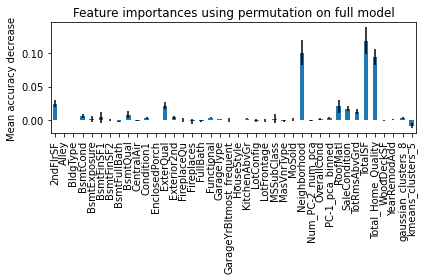

The R2 score is 0.8382424580657135
The MAE score is 19525.54419221179
The Median absolute error score is 13695.497648596822
The MSE score is 25991.01882129716
The RMSE score is 675533059.3690231
Started Train catboost regression model at 21:38:27.
Learning rate set to 0.5


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/samplers/_tpe/sampler.py:250: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2021-09-17 21:38:28,295] A new study created in memory with name: catboost


0:	learn: 0.6348912	total: 2.72ms	remaining: 2.72ms
1:	learn: 0.6003086	total: 3.94ms	remaining: 0us
Catboost uses GPU.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/25 [00:00<?, ?it/s]

0:	learn: 83235.5937475	test: 65396.8291223	best: 65396.8291223 (0)	total: 1.59ms	remaining: 29.8s
500:	learn: 40785.6117183	test: 31035.4650667	best: 31035.4650667 (500)	total: 383ms	remaining: 13.9s
1000:	learn: 31994.7540393	test: 27625.6203269	best: 27625.6203269 (1000)	total: 747ms	remaining: 13.2s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 27311.19745
bestIteration = 1465

Shrink model to first 1466 iterations.
0:	learn: 82935.0928831	total: 1.25ms	remaining: 23.5s
500:	learn: 44030.2261865	total: 360ms	remaining: 13.1s
1000:	learn: 33917.7349072	total: 710ms	remaining: 12.6s
1500:	learn: 31333.1977544	total: 1000ms	remaining: 11.5s
2000:	learn: 30808.1679257	total: 1.26s	remaining: 10.6s
2500:	learn: 30257.5644661	total: 1.53s	remaining: 9.93s
3000:	learn: 29861.9633093	total: 1.8s	remaining: 9.46s
3500:	learn: 29454.9838450	total: 2.07s	remaining: 9.02s
4000:	learn: 29148.8962563	total: 2.36s	remaining: 8.68s
4500:	learn: 28888.7362469	total: 2.62s	remain

9500:	learn: 24932.8665721	total: 6.11s	remaining: 5.94s
10000:	learn: 24565.7310735	total: 6.43s	remaining: 5.62s
10500:	learn: 23990.6753953	total: 6.76s	remaining: 5.3s
11000:	learn: 23578.9165114	total: 7.09s	remaining: 4.98s
11500:	learn: 23105.9550431	total: 7.41s	remaining: 4.66s
12000:	learn: 22695.7155942	total: 7.74s	remaining: 4.34s
12500:	learn: 22374.1470807	total: 8.07s	remaining: 4.02s
13000:	learn: 22051.4942618	total: 8.39s	remaining: 3.7s
13500:	learn: 21752.3262885	total: 8.72s	remaining: 3.38s
14000:	learn: 21484.3761408	total: 9.03s	remaining: 3.05s
14500:	learn: 21242.6550444	total: 9.36s	remaining: 2.73s
15000:	learn: 21007.4015463	total: 9.68s	remaining: 2.41s
15500:	learn: 20773.8729891	total: 10s	remaining: 2.08s
16000:	learn: 20559.4136127	total: 10.3s	remaining: 1.76s
16500:	learn: 20334.5685178	total: 10.6s	remaining: 1.44s
17000:	learn: 20150.4860996	total: 11s	remaining: 1.12s
17500:	learn: 19908.6490360	total: 11.3s	remaining: 794ms
18000:	learn: 19706.4

3500:	learn: 22650.7447171	total: 2.34s	remaining: 10.2s
4000:	learn: 22462.7756717	total: 2.69s	remaining: 9.9s
4500:	learn: 22276.5367533	total: 3.02s	remaining: 9.56s
5000:	learn: 22074.6763395	total: 3.35s	remaining: 9.19s
5500:	learn: 21917.6903552	total: 3.67s	remaining: 8.82s
6000:	learn: 21741.2457071	total: 3.98s	remaining: 8.44s
6500:	learn: 21548.9143087	total: 4.29s	remaining: 8.07s
7000:	learn: 21361.1683080	total: 4.6s	remaining: 7.71s
7500:	learn: 21140.8464026	total: 4.92s	remaining: 7.37s
8000:	learn: 20939.1218101	total: 5.22s	remaining: 7s
8500:	learn: 20710.2324955	total: 5.52s	remaining: 6.64s
9000:	learn: 20472.4531689	total: 5.82s	remaining: 6.29s
9500:	learn: 20228.9125485	total: 6.11s	remaining: 5.94s
10000:	learn: 19970.2715304	total: 6.39s	remaining: 5.58s
10500:	learn: 19717.4183633	total: 6.68s	remaining: 5.24s
11000:	learn: 19488.6324035	total: 6.98s	remaining: 4.91s
11500:	learn: 19253.8865467	total: 7.29s	remaining: 4.58s
12000:	learn: 19071.6050720	tota

1500:	learn: 13060.2695808	total: 2.58s	remaining: 10.8s
2000:	learn: 10261.3763785	total: 3.44s	remaining: 9.98s
2500:	learn: 8390.5442092	total: 4.3s	remaining: 9.12s
3000:	learn: 6830.3547220	total: 5.17s	remaining: 8.28s
3500:	learn: 5493.6130421	total: 6.03s	remaining: 7.42s
4000:	learn: 4436.2403712	total: 6.9s	remaining: 6.57s
4500:	learn: 3596.8294353	total: 7.76s	remaining: 5.7s
5000:	learn: 2962.4865680	total: 8.63s	remaining: 4.84s
5500:	learn: 2482.0114713	total: 9.5s	remaining: 3.98s
6000:	learn: 2094.6933189	total: 10.4s	remaining: 3.12s
6500:	learn: 1778.9628027	total: 11.2s	remaining: 2.26s
7000:	learn: 1516.5451161	total: 12.1s	remaining: 1.4s
7500:	learn: 1294.3622070	total: 13s	remaining: 533ms
7808:	learn: 1172.6796325	total: 13.5s	remaining: 0us
0:	learn: 83644.6847703	total: 2.83ms	remaining: 22.1s
500:	learn: 34954.5831540	total: 865ms	remaining: 12.6s
1000:	learn: 18758.0917030	total: 1.72s	remaining: 11.7s
1500:	learn: 12793.1891455	total: 2.58s	remaining: 10.9

7500:	learn: 1274.5310968	total: 13s	remaining: 532ms
7808:	learn: 1155.5037970	total: 13.5s	remaining: 0us
[I 2021-09-17 21:42:55,113] Trial 1 finished with value: -837323130.9281771 and parameters: {'iterations': 7809, 'learning_rate': 0.0024345423962016913, 'l2_leaf_reg': 0.0033323645788192685, 'max_depth': 9}. Best is trial 1 with value: -837323130.9281771.
0:	learn: 79711.1929940	test: 62623.6348389	best: 62623.6348389 (0)	total: 7.26ms	remaining: 3m 38s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 24719.98875
bestIteration = 127

Shrink model to first 128 iterations.
0:	learn: 79489.8764048	total: 4.61ms	remaining: 2m 18s
500:	learn: 133.8469647	total: 1.51s	remaining: 1m 29s
1000:	learn: 1.5818349	total: 3.03s	remaining: 1m 28s
1500:	learn: 0.0239046	total: 4.52s	remaining: 1m 26s
2000:	learn: 0.0003737	total: 6.02s	remaining: 1m 24s
2500:	learn: 0.0000067	total: 7.51s	remaining: 1m 22s
3000:	learn: 0.0000001	total: 8.99s	remaining: 1m 21s
3500:	learn: 0.000

8500:	learn: 0.0000000	total: 25.4s	remaining: 1m 4s
9000:	learn: 0.0000000	total: 26.9s	remaining: 1m 2s
9500:	learn: 0.0000000	total: 28.4s	remaining: 1m 1s
10000:	learn: 0.0000000	total: 29.9s	remaining: 59.9s
10500:	learn: 0.0000000	total: 31.4s	remaining: 58.5s
11000:	learn: 0.0000000	total: 32.9s	remaining: 56.9s
11500:	learn: 0.0000000	total: 34.4s	remaining: 55.5s
12000:	learn: 0.0000000	total: 35.9s	remaining: 54s
12500:	learn: 0.0000000	total: 37.4s	remaining: 52.5s
13000:	learn: 0.0000000	total: 38.9s	remaining: 51.1s
13500:	learn: 0.0000000	total: 40.4s	remaining: 49.6s
14000:	learn: 0.0000000	total: 41.9s	remaining: 48.1s
14500:	learn: 0.0000000	total: 43.4s	remaining: 46.6s
15000:	learn: 0.0000000	total: 44.9s	remaining: 45.1s
15500:	learn: 0.0000000	total: 46.4s	remaining: 43.6s
16000:	learn: 0.0000000	total: 47.9s	remaining: 42.1s
16500:	learn: 0.0000000	total: 49.4s	remaining: 40.6s
17000:	learn: 0.0000000	total: 50.9s	remaining: 39.1s
17500:	learn: 0.0000000	total: 52

23000:	learn: 0.0000000	total: 46.2s	remaining: 14.2s
23500:	learn: 0.0000000	total: 47.1s	remaining: 13.1s
24000:	learn: 0.0000000	total: 48s	remaining: 12.1s
24500:	learn: 0.0000000	total: 48.8s	remaining: 11.1s
25000:	learn: 0.0000000	total: 49.6s	remaining: 10s
25500:	learn: 0.0000000	total: 50.5s	remaining: 9.03s
26000:	learn: 0.0000000	total: 51.3s	remaining: 8.01s
26500:	learn: 0.0000000	total: 52.1s	remaining: 7s
27000:	learn: 0.0000000	total: 53s	remaining: 6s
27500:	learn: 0.0000000	total: 53.8s	remaining: 5s
28000:	learn: 0.0000000	total: 54.7s	remaining: 4.02s
28500:	learn: 0.0000000	total: 55.5s	remaining: 3.04s
29000:	learn: 0.0000000	total: 56.4s	remaining: 2.06s
29500:	learn: 0.0000000	total: 57.2s	remaining: 1.08s
30000:	learn: 0.0000000	total: 58.1s	remaining: 114ms
30059:	learn: 0.0000000	total: 58.2s	remaining: 0us
0:	learn: 80327.5549447	total: 5.71ms	remaining: 2m 51s
500:	learn: 127.2559847	total: 1.49s	remaining: 1m 27s
1000:	learn: 1.9434258	total: 2.97s	remain

6500:	learn: 0.0000000	total: 19.4s	remaining: 1m 10s
7000:	learn: 0.0000000	total: 20.9s	remaining: 1m 8s
7500:	learn: 0.0000000	total: 22.4s	remaining: 1m 7s
8000:	learn: 0.0000000	total: 23.8s	remaining: 1m 5s
8500:	learn: 0.0000000	total: 25.3s	remaining: 1m 4s
9000:	learn: 0.0000000	total: 26.7s	remaining: 1m 2s
9500:	learn: 0.0000000	total: 28.2s	remaining: 1m
10000:	learn: 0.0000000	total: 29.6s	remaining: 59.4s
10500:	learn: 0.0000000	total: 31s	remaining: 57.8s
11000:	learn: 0.0000000	total: 32.5s	remaining: 56.3s
11500:	learn: 0.0000000	total: 33.9s	remaining: 54.8s
12000:	learn: 0.0000000	total: 35.4s	remaining: 53.3s
12500:	learn: 0.0000000	total: 36.9s	remaining: 51.8s
13000:	learn: 0.0000000	total: 38.3s	remaining: 50.2s
13500:	learn: 0.0000000	total: 39.7s	remaining: 48.7s
14000:	learn: 0.0000000	total: 41.1s	remaining: 47.2s
14500:	learn: 0.0000000	total: 42.5s	remaining: 45.6s
15000:	learn: 0.0000000	total: 43.9s	remaining: 44.1s
15500:	learn: 0.0000000	total: 45.3s	re

21000:	learn: 0.0000000	total: 57.5s	remaining: 24.8s
21500:	learn: 0.0000000	total: 59s	remaining: 23.5s
22000:	learn: 0.0000000	total: 1m	remaining: 22.1s
22500:	learn: 0.0000000	total: 1m 1s	remaining: 20.8s
23000:	learn: 0.0000000	total: 1m 3s	remaining: 19.4s
23500:	learn: 0.0000000	total: 1m 4s	remaining: 18.1s
24000:	learn: 0.0000000	total: 1m 6s	remaining: 16.7s
24500:	learn: 0.0000000	total: 1m 7s	remaining: 15.3s
25000:	learn: 0.0000000	total: 1m 8s	remaining: 13.9s
25500:	learn: 0.0000000	total: 1m 10s	remaining: 12.5s
26000:	learn: 0.0000000	total: 1m 11s	remaining: 11.1s
26500:	learn: 0.0000000	total: 1m 12s	remaining: 9.76s
27000:	learn: 0.0000000	total: 1m 13s	remaining: 8.38s
27500:	learn: 0.0000000	total: 1m 15s	remaining: 7s
28000:	learn: 0.0000000	total: 1m 16s	remaining: 5.63s
28500:	learn: 0.0000000	total: 1m 17s	remaining: 4.26s
29000:	learn: 0.0000000	total: 1m 19s	remaining: 2.89s
29500:	learn: 0.0000000	total: 1m 20s	remaining: 1.52s
30000:	learn: 0.0000000	tot

14000:	learn: 8527.3282833	total: 2.99s	remaining: 5.9s
14500:	learn: 8342.9548328	total: 3.1s	remaining: 5.79s
15000:	learn: 8162.1497363	total: 3.2s	remaining: 5.68s
15500:	learn: 7992.5379400	total: 3.31s	remaining: 5.57s
16000:	learn: 7827.5347032	total: 3.41s	remaining: 5.47s
16500:	learn: 7667.2533159	total: 3.52s	remaining: 5.36s
17000:	learn: 7519.0029894	total: 3.63s	remaining: 5.25s
17500:	learn: 7372.6062553	total: 3.73s	remaining: 5.14s
18000:	learn: 7221.7944552	total: 3.84s	remaining: 5.04s
18500:	learn: 7083.1033738	total: 3.94s	remaining: 4.93s
19000:	learn: 6950.8517423	total: 4.05s	remaining: 4.82s
19500:	learn: 6825.4435393	total: 4.16s	remaining: 4.72s
20000:	learn: 6698.4587308	total: 4.27s	remaining: 4.61s
20500:	learn: 6578.2062631	total: 4.37s	remaining: 4.5s
21000:	learn: 6456.9634365	total: 4.48s	remaining: 4.4s
21500:	learn: 6345.6217365	total: 4.58s	remaining: 4.29s
22000:	learn: 6235.4162114	total: 4.69s	remaining: 4.18s
22500:	learn: 6129.1526446	total: 4.

2000:	learn: 19790.0047488	total: 441ms	remaining: 8.73s
2500:	learn: 18409.6154222	total: 547ms	remaining: 8.55s
3000:	learn: 17370.1422504	total: 655ms	remaining: 8.43s
3500:	learn: 16477.4923498	total: 762ms	remaining: 8.3s
4000:	learn: 15719.3596982	total: 867ms	remaining: 8.16s
4500:	learn: 15026.0391706	total: 973ms	remaining: 8.02s
5000:	learn: 14402.2312796	total: 1.08s	remaining: 7.93s
5500:	learn: 13831.1253270	total: 1.19s	remaining: 7.8s
6000:	learn: 13296.5354079	total: 1.29s	remaining: 7.68s
6500:	learn: 12796.9439092	total: 1.4s	remaining: 7.56s
7000:	learn: 12331.1249107	total: 1.51s	remaining: 7.45s
7500:	learn: 11906.2130159	total: 1.61s	remaining: 7.34s
8000:	learn: 11524.4831555	total: 1.72s	remaining: 7.23s
8500:	learn: 11158.3415755	total: 1.83s	remaining: 7.12s
9000:	learn: 10810.3676175	total: 1.94s	remaining: 7.01s
9500:	learn: 10471.6418845	total: 2.04s	remaining: 6.91s
10000:	learn: 10149.8647622	total: 2.15s	remaining: 6.8s
10500:	learn: 9843.5624067	total: 

32000:	learn: 4354.5928170	total: 6.83s	remaining: 2.05s
32500:	learn: 4289.6542049	total: 6.93s	remaining: 1.95s
33000:	learn: 4222.9387024	total: 7.04s	remaining: 1.84s
33500:	learn: 4157.1069940	total: 7.15s	remaining: 1.73s
34000:	learn: 4091.6816373	total: 7.25s	remaining: 1.63s
34500:	learn: 4026.1831135	total: 7.36s	remaining: 1.52s
35000:	learn: 3962.2703362	total: 7.47s	remaining: 1.41s
35500:	learn: 3901.7697422	total: 7.57s	remaining: 1.31s
36000:	learn: 3837.5469576	total: 7.68s	remaining: 1.2s
36500:	learn: 3780.0116385	total: 7.79s	remaining: 1.09s
37000:	learn: 3719.6371380	total: 7.89s	remaining: 986ms
37500:	learn: 3665.0527100	total: 8s	remaining: 879ms
38000:	learn: 3609.7991271	total: 8.1s	remaining: 773ms
38500:	learn: 3554.2186761	total: 8.21s	remaining: 666ms
39000:	learn: 3499.3719243	total: 8.31s	remaining: 559ms
39500:	learn: 3447.6858576	total: 8.42s	remaining: 453ms
40000:	learn: 3394.4021633	total: 8.53s	remaining: 346ms
40500:	learn: 3341.1768677	total: 8.

20000:	learn: 6266.7844322	total: 4.29s	remaining: 4.63s
20500:	learn: 6145.2645642	total: 4.39s	remaining: 4.53s
21000:	learn: 6025.5182588	total: 4.5s	remaining: 4.42s
21500:	learn: 5913.4953534	total: 4.6s	remaining: 4.31s
22000:	learn: 5803.3662574	total: 4.71s	remaining: 4.2s
22500:	learn: 5695.2861337	total: 4.82s	remaining: 4.09s
23000:	learn: 5586.4782148	total: 4.92s	remaining: 3.98s
23500:	learn: 5486.0466994	total: 5.03s	remaining: 3.88s
24000:	learn: 5386.2017245	total: 5.13s	remaining: 3.77s
24500:	learn: 5289.1019850	total: 5.24s	remaining: 3.66s
25000:	learn: 5199.0549089	total: 5.35s	remaining: 3.56s
25500:	learn: 5108.7104824	total: 5.46s	remaining: 3.45s
26000:	learn: 5025.9723828	total: 5.56s	remaining: 3.34s
26500:	learn: 4947.2945650	total: 5.67s	remaining: 3.23s
27000:	learn: 4866.5924411	total: 5.77s	remaining: 3.13s
27500:	learn: 4784.0895210	total: 5.88s	remaining: 3.02s
28000:	learn: 4700.4679963	total: 5.99s	remaining: 2.91s
28500:	learn: 4620.0914553	total: 

8000:	learn: 11649.5238231	total: 1.72s	remaining: 7.23s
8500:	learn: 11308.9734950	total: 1.83s	remaining: 7.12s
9000:	learn: 10979.4624416	total: 1.94s	remaining: 7.02s
9500:	learn: 10678.2355528	total: 2.04s	remaining: 6.9s
10000:	learn: 10407.2103348	total: 2.15s	remaining: 6.79s
10500:	learn: 10141.5115103	total: 2.25s	remaining: 6.68s
11000:	learn: 9890.1524343	total: 2.36s	remaining: 6.58s
11500:	learn: 9636.5404909	total: 2.47s	remaining: 6.47s
12000:	learn: 9399.8307448	total: 2.58s	remaining: 6.37s
12500:	learn: 9172.9644319	total: 2.69s	remaining: 6.25s
13000:	learn: 8955.9368180	total: 2.8s	remaining: 6.16s
13500:	learn: 8748.4229437	total: 2.9s	remaining: 6.05s
14000:	learn: 8544.3638105	total: 3.01s	remaining: 5.94s
14500:	learn: 8352.5622482	total: 3.12s	remaining: 5.83s
15000:	learn: 8168.9126671	total: 3.22s	remaining: 5.72s
15500:	learn: 7991.6697069	total: 3.33s	remaining: 5.61s
16000:	learn: 7817.3833361	total: 3.44s	remaining: 5.5s
16500:	learn: 7639.5448020	total:

38000:	learn: 3522.8407145	total: 8.1s	remaining: 773ms
38500:	learn: 3472.1503973	total: 8.21s	remaining: 666ms
39000:	learn: 3422.2495202	total: 8.31s	remaining: 559ms
39500:	learn: 3373.1840661	total: 8.42s	remaining: 453ms
40000:	learn: 3324.9439381	total: 8.53s	remaining: 346ms
40500:	learn: 3276.5941761	total: 8.63s	remaining: 239ms
41000:	learn: 3230.0661913	total: 8.73s	remaining: 133ms
41500:	learn: 3184.5527397	total: 8.84s	remaining: 26.2ms
41623:	learn: 3172.6528046	total: 8.87s	remaining: 0us
[I 2021-09-17 21:58:17,397] Trial 3 finished with value: -781956409.1956823 and parameters: {'iterations': 41624, 'learning_rate': 0.0033572967053517922, 'l2_leaf_reg': 0.043293700144592745, 'max_depth': 3}. Best is trial 3 with value: -781956409.1956823.
0:	learn: 82660.0527570	test: 64841.7340313	best: 64841.7340313 (0)	total: 546us	remaining: 8.32s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 26275.55031
bestIteration = 268

Shrink model to first 269 iterations

500:	learn: 22072.3235424	total: 141ms	remaining: 4.16s
1000:	learn: 16903.3207661	total: 280ms	remaining: 3.98s
1500:	learn: 13874.0832138	total: 420ms	remaining: 3.84s
2000:	learn: 11768.7550377	total: 560ms	remaining: 3.7s
2500:	learn: 10145.9151149	total: 704ms	remaining: 3.58s
3000:	learn: 8830.6572337	total: 844ms	remaining: 3.44s
3500:	learn: 7746.1364387	total: 985ms	remaining: 3.3s
4000:	learn: 6946.0664821	total: 1.13s	remaining: 3.16s
4500:	learn: 6280.7051048	total: 1.27s	remaining: 3.02s
5000:	learn: 5706.8808169	total: 1.41s	remaining: 2.88s
5500:	learn: 5184.6462195	total: 1.55s	remaining: 2.74s
6000:	learn: 4707.9205249	total: 1.69s	remaining: 2.6s
6500:	learn: 4292.0898597	total: 1.83s	remaining: 2.46s
7000:	learn: 3913.8715785	total: 1.97s	remaining: 2.31s
7500:	learn: 3600.9439213	total: 2.11s	remaining: 2.17s
8000:	learn: 3330.0990188	total: 2.25s	remaining: 2.03s
8500:	learn: 3055.9693787	total: 2.39s	remaining: 1.89s
9000:	learn: 2826.0009299	total: 2.53s	remainin

9500:	learn: 2532.1823724	total: 2.72s	remaining: 1.63s
10000:	learn: 2340.7294063	total: 2.86s	remaining: 1.49s
10500:	learn: 2164.8233356	total: 3.01s	remaining: 1.35s
11000:	learn: 2015.5805438	total: 3.15s	remaining: 1.21s
11500:	learn: 1862.3049146	total: 3.29s	remaining: 1.06s
12000:	learn: 1730.0845876	total: 3.43s	remaining: 920ms
12500:	learn: 1614.0663204	total: 3.57s	remaining: 776ms
13000:	learn: 1506.7442250	total: 3.71s	remaining: 633ms
13500:	learn: 1412.6093497	total: 3.85s	remaining: 490ms
14000:	learn: 1318.4890374	total: 3.99s	remaining: 347ms
14500:	learn: 1227.6518917	total: 4.13s	remaining: 205ms
15000:	learn: 1141.2911350	total: 4.28s	remaining: 62.2ms
15218:	learn: 1105.9468493	total: 4.34s	remaining: 0us
0:	learn: 82557.2411429	total: 649us	remaining: 9.88s
500:	learn: 22494.6053048	total: 142ms	remaining: 4.18s
1000:	learn: 16936.9225037	total: 282ms	remaining: 4.01s
1500:	learn: 13844.6872378	total: 428ms	remaining: 3.91s
2000:	learn: 11574.4163463	total: 574

11500:	learn: 6978.8058561	total: 4.27s	remaining: 7.09s
12000:	learn: 6709.6980551	total: 4.45s	remaining: 6.9s
12500:	learn: 6453.5687340	total: 4.64s	remaining: 6.71s
13000:	learn: 6222.2399207	total: 4.82s	remaining: 6.53s
13500:	learn: 5999.3282212	total: 5.01s	remaining: 6.34s
14000:	learn: 5787.5226121	total: 5.19s	remaining: 6.15s
14500:	learn: 5577.5009772	total: 5.38s	remaining: 5.97s
15000:	learn: 5387.0263436	total: 5.56s	remaining: 5.78s
15500:	learn: 5203.6486147	total: 5.74s	remaining: 5.59s
16000:	learn: 5032.1654711	total: 5.93s	remaining: 5.41s
16500:	learn: 4868.6888047	total: 6.11s	remaining: 5.22s
17000:	learn: 4718.4332899	total: 6.3s	remaining: 5.04s
17500:	learn: 4572.0383918	total: 6.49s	remaining: 4.86s
18000:	learn: 4433.7433254	total: 6.68s	remaining: 4.67s
18500:	learn: 4297.3525721	total: 6.86s	remaining: 4.49s
19000:	learn: 4170.1049339	total: 7.04s	remaining: 4.3s
19500:	learn: 4046.5876183	total: 7.23s	remaining: 4.11s
20000:	learn: 3923.4430218	total: 

21000:	learn: 3512.1779597	total: 7.73s	remaining: 3.53s
21500:	learn: 3399.0359945	total: 7.92s	remaining: 3.35s
22000:	learn: 3288.1435305	total: 8.11s	remaining: 3.17s
22500:	learn: 3183.5218539	total: 8.29s	remaining: 2.98s
23000:	learn: 3084.4022142	total: 8.47s	remaining: 2.8s
23500:	learn: 2987.6318731	total: 8.66s	remaining: 2.61s
24000:	learn: 2893.5273220	total: 8.84s	remaining: 2.43s
24500:	learn: 2804.0820927	total: 9.03s	remaining: 2.25s
25000:	learn: 2718.6457041	total: 9.21s	remaining: 2.06s
25500:	learn: 2638.2364795	total: 9.39s	remaining: 1.88s
26000:	learn: 2560.5016971	total: 9.58s	remaining: 1.69s
26500:	learn: 2485.6322623	total: 9.76s	remaining: 1.51s
27000:	learn: 2414.8185523	total: 9.95s	remaining: 1.32s
27500:	learn: 2344.4080374	total: 10.1s	remaining: 1.14s
28000:	learn: 2276.7277243	total: 10.3s	remaining: 957ms
28500:	learn: 2214.3049104	total: 10.5s	remaining: 773ms
29000:	learn: 2152.1276500	total: 10.7s	remaining: 588ms
29500:	learn: 2092.9535071	total

30596:	learn: 2018.8035920	total: 11.3s	remaining: 0us
0:	learn: 85064.1888279	total: 685us	remaining: 21s
500:	learn: 43999.8739686	total: 188ms	remaining: 11.3s
1000:	learn: 28739.6453501	total: 376ms	remaining: 11.1s
1500:	learn: 22546.5616303	total: 566ms	remaining: 11s
2000:	learn: 19567.6838235	total: 751ms	remaining: 10.7s
2500:	learn: 17854.6963225	total: 935ms	remaining: 10.5s
3000:	learn: 16614.0054988	total: 1.12s	remaining: 10.3s
3500:	learn: 15559.8502882	total: 1.3s	remaining: 10.1s
4000:	learn: 14627.6311853	total: 1.49s	remaining: 9.88s
4500:	learn: 13714.9753282	total: 1.67s	remaining: 9.68s
5000:	learn: 12880.5672663	total: 1.85s	remaining: 9.49s
5500:	learn: 12128.5740136	total: 2.05s	remaining: 9.34s
6000:	learn: 11449.9158061	total: 2.23s	remaining: 9.15s
6500:	learn: 10829.5769250	total: 2.42s	remaining: 8.96s
7000:	learn: 10257.9377169	total: 2.6s	remaining: 8.77s
7500:	learn: 9744.6969425	total: 2.79s	remaining: 8.59s
8000:	learn: 9287.6294300	total: 2.97s	remai

9000:	learn: 8534.3344145	total: 3.36s	remaining: 8.06s
9500:	learn: 8152.9202229	total: 3.55s	remaining: 7.87s
10000:	learn: 7792.1947064	total: 3.73s	remaining: 7.67s
10500:	learn: 7459.2578454	total: 3.91s	remaining: 7.49s
11000:	learn: 7153.3381090	total: 4.09s	remaining: 7.29s
11500:	learn: 6856.8921399	total: 4.28s	remaining: 7.1s
12000:	learn: 6578.5992324	total: 4.46s	remaining: 6.92s
12500:	learn: 6333.5415224	total: 4.65s	remaining: 6.73s
13000:	learn: 6099.6958701	total: 4.83s	remaining: 6.54s
13500:	learn: 5874.4587241	total: 5.02s	remaining: 6.35s
14000:	learn: 5656.9372694	total: 5.2s	remaining: 6.17s
14500:	learn: 5464.7619785	total: 5.39s	remaining: 5.98s
15000:	learn: 5273.0187707	total: 5.58s	remaining: 5.8s
15500:	learn: 5100.5761683	total: 5.76s	remaining: 5.61s
16000:	learn: 4932.8176263	total: 5.95s	remaining: 5.42s
16500:	learn: 4775.5158809	total: 6.13s	remaining: 5.24s
17000:	learn: 4620.6762798	total: 6.32s	remaining: 5.05s
17500:	learn: 4477.1234901	total: 6.

15000:	learn: 0.0000000	total: 7.4s	remaining: 3.85s
15500:	learn: 0.0000000	total: 7.64s	remaining: 3.6s
16000:	learn: 0.0000000	total: 7.89s	remaining: 3.35s
16500:	learn: 0.0000000	total: 8.13s	remaining: 3.11s
17000:	learn: 0.0000000	total: 8.37s	remaining: 2.86s
17500:	learn: 0.0000000	total: 8.61s	remaining: 2.61s
18000:	learn: 0.0000000	total: 8.85s	remaining: 2.36s
18500:	learn: 0.0000000	total: 9.09s	remaining: 2.12s
19000:	learn: 0.0000000	total: 9.33s	remaining: 1.87s
19500:	learn: 0.0000000	total: 9.57s	remaining: 1.62s
20000:	learn: 0.0000000	total: 9.81s	remaining: 1.38s
20500:	learn: 0.0000000	total: 10.1s	remaining: 1.13s
21000:	learn: 0.0000000	total: 10.3s	remaining: 887ms
21500:	learn: 0.0000000	total: 10.5s	remaining: 641ms
22000:	learn: 0.0000000	total: 10.8s	remaining: 396ms
22500:	learn: 0.0000000	total: 11s	remaining: 151ms
22808:	learn: 0.0000000	total: 11.2s	remaining: 0us
0:	learn: 79170.3816951	total: 915us	remaining: 20.9s
500:	learn: 1639.8060279	total: 25

21500:	learn: 0.0000000	total: 10.2s	remaining: 620ms
22000:	learn: 0.0000000	total: 10.4s	remaining: 382ms
22500:	learn: 0.0000000	total: 10.6s	remaining: 146ms
22808:	learn: 0.0000000	total: 10.8s	remaining: 0us
0:	learn: 79021.1310957	total: 752us	remaining: 17.2s
500:	learn: 1685.6209384	total: 247ms	remaining: 11s
1000:	learn: 276.3704313	total: 496ms	remaining: 10.8s
1500:	learn: 48.9941136	total: 743ms	remaining: 10.5s
2000:	learn: 9.1209891	total: 988ms	remaining: 10.3s
2500:	learn: 1.7622450	total: 1.23s	remaining: 10s
3000:	learn: 0.3818811	total: 1.48s	remaining: 9.79s
3500:	learn: 0.0760195	total: 1.73s	remaining: 9.55s
4000:	learn: 0.0147220	total: 1.98s	remaining: 9.29s
4500:	learn: 0.0031821	total: 2.23s	remaining: 9.06s
5000:	learn: 0.0006725	total: 2.48s	remaining: 8.82s
5500:	learn: 0.0001460	total: 2.73s	remaining: 8.57s
6000:	learn: 0.0000330	total: 2.97s	remaining: 8.32s
6500:	learn: 0.0000074	total: 3.22s	remaining: 8.07s
7000:	learn: 0.0000016	total: 3.46s	remain

4500:	learn: 0.0046137	total: 2.27s	remaining: 9.23s
5000:	learn: 0.0010539	total: 2.52s	remaining: 8.96s
5500:	learn: 0.0002334	total: 2.76s	remaining: 8.69s
6000:	learn: 0.0000555	total: 3.01s	remaining: 8.43s
6500:	learn: 0.0000130	total: 3.25s	remaining: 8.17s
7000:	learn: 0.0000032	total: 3.5s	remaining: 7.9s
7500:	learn: 0.0000008	total: 3.75s	remaining: 7.66s
8000:	learn: 0.0000002	total: 4s	remaining: 7.41s
8500:	learn: 0.0000000	total: 4.26s	remaining: 7.17s
9000:	learn: 0.0000000	total: 4.51s	remaining: 6.91s
9500:	learn: 0.0000000	total: 4.75s	remaining: 6.66s
10000:	learn: 0.0000000	total: 5s	remaining: 6.4s
10500:	learn: 0.0000000	total: 5.24s	remaining: 6.14s
11000:	learn: 0.0000000	total: 5.49s	remaining: 5.89s
11500:	learn: 0.0000000	total: 5.73s	remaining: 5.63s
12000:	learn: 0.0000000	total: 5.97s	remaining: 5.38s
12500:	learn: 0.0000000	total: 6.21s	remaining: 5.12s
13000:	learn: 0.0000000	total: 6.45s	remaining: 4.87s
13500:	learn: 0.0000000	total: 6.69s	remaining: 

4500:	learn: 42577.5174885	test: 30472.0224216	best: 30472.0224216 (4500)	total: 1.07s	remaining: 5.98s
5000:	learn: 41260.0973829	test: 29933.3808709	best: 29933.3808709 (5000)	total: 1.19s	remaining: 5.85s
5500:	learn: 40142.1847746	test: 29560.2465805	best: 29559.9976071 (5495)	total: 1.3s	remaining: 5.72s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 29438.32239
bestIteration = 5675

Shrink model to first 5676 iterations.
0:	learn: 83183.2648969	total: 378us	remaining: 11.2s
500:	learn: 73462.5152494	total: 109ms	remaining: 6.31s
1000:	learn: 66087.0515034	total: 217ms	remaining: 6.2s
1500:	learn: 60488.9529124	total: 323ms	remaining: 6.04s
2000:	learn: 56104.1961595	total: 430ms	remaining: 5.93s
2500:	learn: 52643.6831018	total: 537ms	remaining: 5.82s
3000:	learn: 49867.7591575	total: 644ms	remaining: 5.71s
3500:	learn: 47608.9111133	total: 751ms	remaining: 5.6s
4000:	learn: 45752.5289221	total: 858ms	remaining: 5.49s
4500:	learn: 44269.9169142	total: 964ms	rem

7000:	learn: 39630.0359687	total: 1.51s	remaining: 4.89s
7500:	learn: 39124.5874903	total: 1.62s	remaining: 4.78s
8000:	learn: 38640.3568209	total: 1.73s	remaining: 4.67s
8500:	learn: 38139.1287691	total: 1.84s	remaining: 4.57s
9000:	learn: 37677.8880711	total: 1.94s	remaining: 4.45s
9500:	learn: 37186.9632393	total: 2.05s	remaining: 4.34s
10000:	learn: 36692.1265538	total: 2.15s	remaining: 4.23s
10500:	learn: 36228.7059092	total: 2.26s	remaining: 4.12s
11000:	learn: 35770.2386460	total: 2.37s	remaining: 4.01s
11500:	learn: 35272.5737767	total: 2.48s	remaining: 3.9s
12000:	learn: 34746.5191947	total: 2.58s	remaining: 3.79s
12500:	learn: 34307.8003233	total: 2.69s	remaining: 3.68s
13000:	learn: 33934.2461287	total: 2.79s	remaining: 3.57s
13500:	learn: 33475.9229789	total: 2.9s	remaining: 3.46s
14000:	learn: 33112.6949065	total: 3.01s	remaining: 3.36s
14500:	learn: 32774.6801599	total: 3.11s	remaining: 3.25s
15000:	learn: 32387.4864921	total: 3.22s	remaining: 3.14s
15500:	learn: 31982.72

18000:	learn: 32152.1148018	total: 3.86s	remaining: 2.5s
18500:	learn: 31824.3303507	total: 3.97s	remaining: 2.39s
19000:	learn: 31452.6907314	total: 4.08s	remaining: 2.28s
19500:	learn: 31063.6468014	total: 4.18s	remaining: 2.17s
20000:	learn: 30692.1504588	total: 4.29s	remaining: 2.07s
20500:	learn: 30391.9528016	total: 4.4s	remaining: 1.96s
21000:	learn: 30072.0446427	total: 4.51s	remaining: 1.85s
21500:	learn: 29821.1230882	total: 4.62s	remaining: 1.74s
22000:	learn: 29590.8502974	total: 4.72s	remaining: 1.64s
22500:	learn: 29399.1662435	total: 4.83s	remaining: 1.53s
23000:	learn: 29233.2110534	total: 4.94s	remaining: 1.42s
23500:	learn: 29075.4636661	total: 5.04s	remaining: 1.31s
24000:	learn: 28934.0521339	total: 5.15s	remaining: 1.21s
24500:	learn: 28807.1897211	total: 5.26s	remaining: 1.1s
25000:	learn: 28691.9021954	total: 5.37s	remaining: 993ms
25500:	learn: 28571.9811883	total: 5.47s	remaining: 885ms
26000:	learn: 28450.8712686	total: 5.58s	remaining: 778ms
26500:	learn: 283

29000:	learn: 26965.7759035	total: 6.23s	remaining: 134ms
29500:	learn: 26848.0999207	total: 6.34s	remaining: 26.7ms
29624:	learn: 26816.8199437	total: 6.37s	remaining: 0us
0:	learn: 78277.7572429	total: 394us	remaining: 11.7s
500:	learn: 68683.9779144	total: 122ms	remaining: 7.11s
1000:	learn: 61246.8855420	total: 234ms	remaining: 6.7s
1500:	learn: 55547.5324044	total: 342ms	remaining: 6.41s
2000:	learn: 51061.0836093	total: 449ms	remaining: 6.2s
2500:	learn: 47516.8741709	total: 559ms	remaining: 6.06s
3000:	learn: 44673.9603437	total: 666ms	remaining: 5.91s
3500:	learn: 42300.4284323	total: 773ms	remaining: 5.76s
4000:	learn: 40349.1621800	total: 884ms	remaining: 5.66s
4500:	learn: 38692.1431337	total: 996ms	remaining: 5.56s
5000:	learn: 37305.2829111	total: 1.1s	remaining: 5.43s
5500:	learn: 36086.9483066	total: 1.21s	remaining: 5.31s
6000:	learn: 35079.3285227	total: 1.32s	remaining: 5.19s
6500:	learn: 34272.0973522	total: 1.43s	remaining: 5.07s
7000:	learn: 33630.3929863	total: 1.

10000:	learn: 36004.0670967	total: 2.17s	remaining: 4.25s
10500:	learn: 35580.3187848	total: 2.28s	remaining: 4.14s
11000:	learn: 35185.1088876	total: 2.38s	remaining: 4.04s
11500:	learn: 34796.1679364	total: 2.49s	remaining: 3.93s
12000:	learn: 34405.5257806	total: 2.6s	remaining: 3.82s
12500:	learn: 34006.1727530	total: 2.71s	remaining: 3.71s
13000:	learn: 33606.9813937	total: 2.82s	remaining: 3.6s
13500:	learn: 33247.5066271	total: 2.92s	remaining: 3.49s
14000:	learn: 32974.0473861	total: 3.03s	remaining: 3.38s
14500:	learn: 32730.6235014	total: 3.14s	remaining: 3.28s
15000:	learn: 32376.3010959	total: 3.25s	remaining: 3.17s
15500:	learn: 32056.0422194	total: 3.35s	remaining: 3.06s
16000:	learn: 31732.4109533	total: 3.46s	remaining: 2.95s
16500:	learn: 31483.9155209	total: 3.57s	remaining: 2.84s
17000:	learn: 31275.8564142	total: 3.68s	remaining: 2.73s
17500:	learn: 31066.2797282	total: 3.79s	remaining: 2.62s
18000:	learn: 30830.5113471	total: 3.9s	remaining: 2.52s
18500:	learn: 305

0:	learn: 83531.7819768	test: 65674.9507834	best: 65674.9507834 (0)	total: 658us	remaining: 10s
500:	learn: 79895.0375933	test: 62228.4641093	best: 62228.4641093 (500)	total: 191ms	remaining: 5.63s
1000:	learn: 76658.1264489	test: 59149.2132016	best: 59149.2132016 (1000)	total: 384ms	remaining: 5.46s
1500:	learn: 73686.8530016	test: 56331.7056765	best: 56331.7056765 (1500)	total: 575ms	remaining: 5.26s
2000:	learn: 70955.5672885	test: 53756.1377375	best: 53756.1377375 (2000)	total: 768ms	remaining: 5.08s
2500:	learn: 68509.6999018	test: 51456.2207062	best: 51456.2207062 (2500)	total: 961ms	remaining: 4.89s
3000:	learn: 66300.2130992	test: 49401.9011983	best: 49401.9011983 (3000)	total: 1.16s	remaining: 4.71s
3500:	learn: 64238.3282215	test: 47502.5690720	best: 47502.5690720 (3500)	total: 1.35s	remaining: 4.54s
4000:	learn: 62357.3467656	test: 45799.9585427	best: 45799.9585427 (4000)	total: 1.55s	remaining: 4.36s
4500:	learn: 60724.0187198	test: 44347.5538250	best: 44347.5538250 (4500)	

11000:	learn: 48769.8367614	total: 4.11s	remaining: 1.58s
11500:	learn: 48021.7984542	total: 4.3s	remaining: 1.4s
12000:	learn: 47317.2244843	total: 4.48s	remaining: 1.21s
12500:	learn: 46628.7048019	total: 4.67s	remaining: 1.02s
13000:	learn: 45984.4662634	total: 4.85s	remaining: 835ms
13500:	learn: 45375.8451777	total: 5.04s	remaining: 648ms
14000:	learn: 44796.0454701	total: 5.22s	remaining: 461ms
14500:	learn: 44236.4647729	total: 5.41s	remaining: 274ms
15000:	learn: 43715.5349437	total: 5.59s	remaining: 88ms
15236:	learn: 43472.7021958	total: 5.68s	remaining: 0us
0:	learn: 84100.7743885	total: 677us	remaining: 10.3s
500:	learn: 80840.8321635	total: 187ms	remaining: 5.49s
1000:	learn: 77848.9454705	total: 376ms	remaining: 5.35s
1500:	learn: 75073.9383576	total: 562ms	remaining: 5.14s
2000:	learn: 72529.4588641	total: 746ms	remaining: 4.93s
2500:	learn: 70213.7340688	total: 931ms	remaining: 4.74s
3000:	learn: 68082.5348083	total: 1.13s	remaining: 4.59s
3500:	learn: 66071.0539902	tot

3500:	learn: 60756.4990463	total: 1.29s	remaining: 4.33s
4000:	learn: 58960.0316057	total: 1.48s	remaining: 4.15s
4500:	learn: 57309.5668590	total: 1.66s	remaining: 3.97s
5000:	learn: 55762.6424039	total: 1.85s	remaining: 3.78s
5500:	learn: 54279.3369436	total: 2.03s	remaining: 3.6s
6000:	learn: 52896.3699403	total: 2.22s	remaining: 3.42s
6500:	learn: 51597.9408532	total: 2.41s	remaining: 3.23s
7000:	learn: 50397.5991184	total: 2.59s	remaining: 3.05s
7500:	learn: 49270.6661849	total: 2.79s	remaining: 2.88s
8000:	learn: 48209.8624169	total: 2.98s	remaining: 2.69s
8500:	learn: 47212.2634038	total: 3.17s	remaining: 2.51s
9000:	learn: 46279.7845679	total: 3.35s	remaining: 2.32s
9500:	learn: 45382.5874366	total: 3.54s	remaining: 2.13s
10000:	learn: 44541.3145570	total: 3.72s	remaining: 1.95s
10500:	learn: 43743.1895576	total: 3.91s	remaining: 1.76s
11000:	learn: 42986.7638000	total: 4.09s	remaining: 1.58s
11500:	learn: 42271.4895326	total: 4.28s	remaining: 1.39s
12000:	learn: 41604.7937435	

22500:	learn: 1225.3972226	total: 23.3s	remaining: 23s
23000:	learn: 1160.9159298	total: 23.8s	remaining: 22.5s
23500:	learn: 1100.7730574	total: 24.3s	remaining: 22s
24000:	learn: 1048.6321449	total: 24.9s	remaining: 21.4s
24500:	learn: 1000.2179652	total: 25.4s	remaining: 20.9s
25000:	learn: 950.7297219	total: 25.9s	remaining: 20.4s
25500:	learn: 906.2247373	total: 26.4s	remaining: 19.9s
26000:	learn: 863.5996643	total: 26.9s	remaining: 19.4s
26500:	learn: 822.1871465	total: 27.5s	remaining: 18.9s
27000:	learn: 784.4884535	total: 28s	remaining: 18.4s
27500:	learn: 749.2612428	total: 28.5s	remaining: 17.8s
28000:	learn: 716.6045135	total: 29s	remaining: 17.3s
28500:	learn: 683.9344911	total: 29.6s	remaining: 16.8s
29000:	learn: 655.4256526	total: 30.1s	remaining: 16.3s
29500:	learn: 626.8538762	total: 30.6s	remaining: 15.8s
30000:	learn: 599.0218322	total: 31.1s	remaining: 15.3s
30500:	learn: 573.0082100	total: 31.7s	remaining: 14.7s
31000:	learn: 548.6707259	total: 32.2s	remaining: 1

5000:	learn: 12779.8405849	total: 4.43s	remaining: 35.2s
5500:	learn: 11709.9093975	total: 4.91s	remaining: 35s
6000:	learn: 10711.5656406	total: 5.39s	remaining: 34.7s
6500:	learn: 9808.2660491	total: 5.88s	remaining: 34.6s
7000:	learn: 9054.9560565	total: 6.38s	remaining: 34.4s
7500:	learn: 8390.9552401	total: 6.87s	remaining: 34.1s
8000:	learn: 7793.7941158	total: 7.37s	remaining: 33.8s
8500:	learn: 7230.1124746	total: 7.88s	remaining: 33.6s
9000:	learn: 6719.3482232	total: 8.4s	remaining: 33.3s
9500:	learn: 6235.5336476	total: 8.92s	remaining: 33s
10000:	learn: 5839.8365045	total: 9.43s	remaining: 32.7s
10500:	learn: 5435.4315009	total: 9.95s	remaining: 32.4s
11000:	learn: 5058.2661897	total: 10.5s	remaining: 32.1s
11500:	learn: 4692.1006999	total: 11s	remaining: 31.7s
12000:	learn: 4376.8761951	total: 11.5s	remaining: 31.4s
12500:	learn: 4096.0794026	total: 12s	remaining: 31s
13000:	learn: 3823.7607955	total: 12.6s	remaining: 30.6s
13500:	learn: 3569.3334396	total: 13.1s	remaining

32500:	learn: 500.9910069	total: 33.4s	remaining: 12.5s
33000:	learn: 479.9112410	total: 33.9s	remaining: 12s
33500:	learn: 460.0776279	total: 34.4s	remaining: 11.5s
34000:	learn: 441.6853266	total: 34.9s	remaining: 11s
34500:	learn: 422.7981937	total: 35.5s	remaining: 10.5s
35000:	learn: 406.1809961	total: 36s	remaining: 9.97s
35500:	learn: 388.9860800	total: 36.5s	remaining: 9.46s
36000:	learn: 372.3058790	total: 37s	remaining: 8.94s
36500:	learn: 355.2640618	total: 37.5s	remaining: 8.43s
37000:	learn: 340.1979749	total: 38.1s	remaining: 7.92s
37500:	learn: 325.5861177	total: 38.6s	remaining: 7.41s
38000:	learn: 312.4786646	total: 39.1s	remaining: 6.89s
38500:	learn: 299.2423934	total: 39.6s	remaining: 6.38s
39000:	learn: 286.6709656	total: 40.1s	remaining: 5.86s
39500:	learn: 274.8428282	total: 40.7s	remaining: 5.35s
40000:	learn: 264.0855719	total: 41.2s	remaining: 4.84s
40500:	learn: 253.9141517	total: 41.7s	remaining: 4.33s
41000:	learn: 243.8547795	total: 42.3s	remaining: 3.81s


15000:	learn: 2900.8257695	total: 15s	remaining: 29.7s
15500:	learn: 2721.9026434	total: 15.5s	remaining: 29.2s
16000:	learn: 2566.6091397	total: 16s	remaining: 28.8s
16500:	learn: 2425.8877025	total: 16.6s	remaining: 28.3s
17000:	learn: 2290.0220155	total: 17.1s	remaining: 27.8s
17500:	learn: 2160.1712064	total: 17.6s	remaining: 27.4s
18000:	learn: 2041.1886890	total: 18.1s	remaining: 26.9s
18500:	learn: 1927.5813505	total: 18.7s	remaining: 26.4s
19000:	learn: 1825.0381424	total: 19.2s	remaining: 25.9s
19500:	learn: 1719.5239862	total: 19.7s	remaining: 25.5s
20000:	learn: 1621.3631246	total: 20.2s	remaining: 25s
20500:	learn: 1538.2156602	total: 20.7s	remaining: 24.5s
21000:	learn: 1461.1090582	total: 21.3s	remaining: 24s
21500:	learn: 1391.5026484	total: 21.8s	remaining: 23.5s
22000:	learn: 1318.6830703	total: 22.3s	remaining: 23s
22500:	learn: 1251.6107485	total: 22.8s	remaining: 22.5s
23000:	learn: 1188.3961287	total: 23.4s	remaining: 22s
23500:	learn: 1126.4009089	total: 23.9s	rem

43000:	learn: 240.8118173	total: 44.4s	remaining: 1.75s
43500:	learn: 232.5552273	total: 44.9s	remaining: 1.24s
44000:	learn: 224.1242624	total: 45.5s	remaining: 720ms
44500:	learn: 216.2842301	total: 46s	remaining: 204ms
44697:	learn: 212.7732711	total: 46.2s	remaining: 0us
0:	learn: 77858.8836752	total: 1.89ms	remaining: 1m 24s
500:	learn: 23468.9376772	total: 515ms	remaining: 45.4s
1000:	learn: 19499.0998943	total: 1.03s	remaining: 44.9s
1500:	learn: 17198.1566624	total: 1.54s	remaining: 44.4s
2000:	learn: 15077.4850815	total: 2.06s	remaining: 44s
2500:	learn: 13874.5474492	total: 2.56s	remaining: 43.1s
3000:	learn: 13405.7589628	total: 3s	remaining: 41.6s
3500:	learn: 12649.3077853	total: 3.46s	remaining: 40.7s
4000:	learn: 11925.9707848	total: 3.94s	remaining: 40s
4500:	learn: 11091.9188564	total: 4.43s	remaining: 39.5s
5000:	learn: 10273.3475769	total: 4.93s	remaining: 39.2s
5500:	learn: 9481.0244471	total: 5.45s	remaining: 38.8s
6000:	learn: 8765.4505729	total: 5.96s	remaining: 

25000:	learn: 1132.6462590	total: 25.7s	remaining: 20.2s
25500:	learn: 1084.3583812	total: 26.2s	remaining: 19.7s
26000:	learn: 1044.5716638	total: 26.7s	remaining: 19.2s
26500:	learn: 1002.9137660	total: 27.2s	remaining: 18.7s
27000:	learn: 962.7206040	total: 27.8s	remaining: 18.2s
27500:	learn: 920.9731567	total: 28.3s	remaining: 17.7s
28000:	learn: 884.3080912	total: 28.8s	remaining: 17.2s
28500:	learn: 849.5906881	total: 29.3s	remaining: 16.7s
29000:	learn: 815.6082780	total: 29.8s	remaining: 16.1s
29500:	learn: 781.8602917	total: 30.4s	remaining: 15.6s
30000:	learn: 752.7603577	total: 30.9s	remaining: 15.1s
30500:	learn: 721.2333513	total: 31.4s	remaining: 14.6s
31000:	learn: 692.2751806	total: 31.9s	remaining: 14.1s
31500:	learn: 666.4757647	total: 32.4s	remaining: 13.6s
32000:	learn: 641.0668222	total: 33s	remaining: 13.1s
32500:	learn: 616.3704192	total: 33.5s	remaining: 12.6s
33000:	learn: 592.9791161	total: 34s	remaining: 12.1s
33500:	learn: 570.9224831	total: 34.5s	remaining

500:	learn: 48445.9656829	total: 78.4ms	remaining: 7.06s
1000:	learn: 34990.2489177	total: 161ms	remaining: 7.2s
1500:	learn: 28725.4758028	total: 239ms	remaining: 7.01s
2000:	learn: 25406.8431142	total: 316ms	remaining: 6.89s
2500:	learn: 23310.8225029	total: 396ms	remaining: 6.83s
3000:	learn: 21885.1117398	total: 477ms	remaining: 6.77s
3500:	learn: 20871.5527993	total: 553ms	remaining: 6.66s
4000:	learn: 20118.8274799	total: 631ms	remaining: 6.56s
4500:	learn: 19535.8173205	total: 707ms	remaining: 6.46s
5000:	learn: 19054.2575149	total: 784ms	remaining: 6.37s
5500:	learn: 18629.4526207	total: 860ms	remaining: 6.28s
6000:	learn: 18245.0883985	total: 936ms	remaining: 6.18s
6500:	learn: 17898.6903076	total: 1.01s	remaining: 6.1s
7000:	learn: 17556.0981626	total: 1.09s	remaining: 6.03s
7500:	learn: 17240.1901948	total: 1.17s	remaining: 5.94s
8000:	learn: 16939.3196137	total: 1.24s	remaining: 5.85s
8500:	learn: 16668.9021600	total: 1.32s	remaining: 5.77s
9000:	learn: 16414.0016524	total:

26000:	learn: 11530.4655534	total: 4.01s	remaining: 3.03s
26500:	learn: 11444.1985905	total: 4.09s	remaining: 2.95s
27000:	learn: 11355.7032926	total: 4.17s	remaining: 2.87s
27500:	learn: 11270.3613832	total: 4.24s	remaining: 2.8s
28000:	learn: 11186.2480015	total: 4.32s	remaining: 2.72s
28500:	learn: 11106.7044154	total: 4.4s	remaining: 2.64s
29000:	learn: 11030.4836510	total: 4.47s	remaining: 2.56s
29500:	learn: 10951.6153913	total: 4.55s	remaining: 2.48s
30000:	learn: 10872.1121943	total: 4.63s	remaining: 2.41s
30500:	learn: 10795.8457651	total: 4.7s	remaining: 2.33s
31000:	learn: 10717.5603086	total: 4.78s	remaining: 2.25s
31500:	learn: 10640.8809741	total: 4.85s	remaining: 2.17s
32000:	learn: 10567.2229534	total: 4.93s	remaining: 2.1s
32500:	learn: 10493.0147398	total: 5s	remaining: 2.02s
33000:	learn: 10423.3755072	total: 5.08s	remaining: 1.94s
33500:	learn: 10353.5297711	total: 5.16s	remaining: 1.86s
34000:	learn: 10285.6292373	total: 5.23s	remaining: 1.79s
34500:	learn: 10217.7

5500:	learn: 19045.7964454	total: 857ms	remaining: 6.25s
6000:	learn: 18605.4293262	total: 934ms	remaining: 6.17s
6500:	learn: 18205.5908525	total: 1.01s	remaining: 6.08s
7000:	learn: 17839.9818519	total: 1.09s	remaining: 6s
7500:	learn: 17504.3499031	total: 1.16s	remaining: 5.92s
8000:	learn: 17192.9177192	total: 1.24s	remaining: 5.83s
8500:	learn: 16903.4634111	total: 1.32s	remaining: 5.76s
9000:	learn: 16630.8511614	total: 1.4s	remaining: 5.68s
9500:	learn: 16365.2549381	total: 1.47s	remaining: 5.59s
10000:	learn: 16112.0431993	total: 1.55s	remaining: 5.53s
10500:	learn: 15875.9145988	total: 1.63s	remaining: 5.44s
11000:	learn: 15651.9797232	total: 1.7s	remaining: 5.36s
11500:	learn: 15441.9276961	total: 1.78s	remaining: 5.28s
12000:	learn: 15238.3563324	total: 1.85s	remaining: 5.19s
12500:	learn: 15038.2837346	total: 1.93s	remaining: 5.11s
13000:	learn: 14839.0703531	total: 2.01s	remaining: 5.03s
13500:	learn: 14637.2699108	total: 2.08s	remaining: 4.95s
14000:	learn: 14432.4769964	

31500:	learn: 10608.2798776	total: 4.86s	remaining: 2.18s
32000:	learn: 10534.1646174	total: 4.94s	remaining: 2.1s
32500:	learn: 10460.2467637	total: 5.01s	remaining: 2.02s
33000:	learn: 10386.7516074	total: 5.09s	remaining: 1.95s
33500:	learn: 10316.1676291	total: 5.16s	remaining: 1.87s
34000:	learn: 10245.2852204	total: 5.24s	remaining: 1.79s
34500:	learn: 10177.5307031	total: 5.32s	remaining: 1.71s
35000:	learn: 10110.1834063	total: 5.39s	remaining: 1.64s
35500:	learn: 10042.8472748	total: 5.47s	remaining: 1.56s
36000:	learn: 9975.1986415	total: 5.55s	remaining: 1.48s
36500:	learn: 9909.9700800	total: 5.63s	remaining: 1.41s
37000:	learn: 9843.5477476	total: 5.7s	remaining: 1.33s
37500:	learn: 9777.9592241	total: 5.78s	remaining: 1.25s
38000:	learn: 9718.2402214	total: 5.86s	remaining: 1.17s
38500:	learn: 9658.2541798	total: 5.93s	remaining: 1.1s
39000:	learn: 9598.6004704	total: 6.01s	remaining: 1.02s
39500:	learn: 9539.7455999	total: 6.09s	remaining: 943ms
40000:	learn: 9482.372542

10500:	learn: 15985.3776222	total: 1.62s	remaining: 5.43s
11000:	learn: 15751.8114487	total: 1.7s	remaining: 5.34s
11500:	learn: 15524.3953794	total: 1.77s	remaining: 5.26s
12000:	learn: 15303.3642756	total: 1.85s	remaining: 5.19s
12500:	learn: 15086.8806054	total: 1.93s	remaining: 5.11s
13000:	learn: 14878.6255404	total: 2s	remaining: 5.03s
13500:	learn: 14677.4215029	total: 2.08s	remaining: 4.95s
14000:	learn: 14483.1440017	total: 2.15s	remaining: 4.87s
14500:	learn: 14295.1247795	total: 2.23s	remaining: 4.79s
15000:	learn: 14108.0950865	total: 2.31s	remaining: 4.71s
15500:	learn: 13928.3203349	total: 2.38s	remaining: 4.63s
16000:	learn: 13749.4613581	total: 2.47s	remaining: 4.58s
16500:	learn: 13580.2874104	total: 2.55s	remaining: 4.5s
17000:	learn: 13416.5944175	total: 2.63s	remaining: 4.42s
17500:	learn: 13262.6803985	total: 2.7s	remaining: 4.34s
18000:	learn: 13109.6031798	total: 2.78s	remaining: 4.27s
18500:	learn: 12958.3718598	total: 2.86s	remaining: 4.19s
19000:	learn: 12816.

36000:	learn: 9485.0170269	total: 5.53s	remaining: 1.48s
36500:	learn: 9426.0010483	total: 5.61s	remaining: 1.4s
37000:	learn: 9368.7982417	total: 5.69s	remaining: 1.32s
37500:	learn: 9311.2642688	total: 5.76s	remaining: 1.25s
38000:	learn: 9254.9284259	total: 5.84s	remaining: 1.17s
38500:	learn: 9200.2829485	total: 5.92s	remaining: 1.09s
39000:	learn: 9146.4203377	total: 6s	remaining: 1.02s
39500:	learn: 9092.7870053	total: 6.07s	remaining: 941ms
40000:	learn: 9042.3605051	total: 6.15s	remaining: 864ms
40500:	learn: 8994.3297685	total: 6.23s	remaining: 787ms
41000:	learn: 8944.5377057	total: 6.3s	remaining: 710ms
41500:	learn: 8896.7349394	total: 6.38s	remaining: 633ms
42000:	learn: 8848.7391313	total: 6.46s	remaining: 556ms
42500:	learn: 8802.1906048	total: 6.53s	remaining: 480ms
43000:	learn: 8754.0789150	total: 6.61s	remaining: 403ms
43500:	learn: 8707.3841895	total: 6.69s	remaining: 326ms
44000:	learn: 8662.9956444	total: 6.76s	remaining: 249ms
44500:	learn: 8618.9058817	total: 6.

15000:	learn: 14159.5284932	total: 2.32s	remaining: 4.74s
15500:	learn: 13995.2126022	total: 2.4s	remaining: 4.67s
16000:	learn: 13829.7639186	total: 2.48s	remaining: 4.59s
16500:	learn: 13670.9998469	total: 2.55s	remaining: 4.51s
17000:	learn: 13523.3517237	total: 2.63s	remaining: 4.43s
17500:	learn: 13382.4338107	total: 2.71s	remaining: 4.35s
18000:	learn: 13248.2098051	total: 2.79s	remaining: 4.28s
18500:	learn: 13107.7116817	total: 2.86s	remaining: 4.2s
19000:	learn: 12970.7762954	total: 2.94s	remaining: 4.12s
19500:	learn: 12840.3044959	total: 3.01s	remaining: 4.04s
20000:	learn: 12710.8530842	total: 3.09s	remaining: 3.96s
20500:	learn: 12584.8306661	total: 3.17s	remaining: 3.88s
21000:	learn: 12460.1763982	total: 3.24s	remaining: 3.8s
21500:	learn: 12337.9846702	total: 3.32s	remaining: 3.72s
22000:	learn: 12218.4431520	total: 3.39s	remaining: 3.64s
22500:	learn: 12101.3921615	total: 3.47s	remaining: 3.56s
23000:	learn: 11991.8102049	total: 3.54s	remaining: 3.49s
23500:	learn: 118

0:	learn: 84277.3578313	total: 884us	remaining: 27.4s
500:	learn: 54931.7313291	total: 252ms	remaining: 15.3s
1000:	learn: 38318.7107817	total: 499ms	remaining: 15s
1500:	learn: 28875.6080702	total: 745ms	remaining: 14.6s
2000:	learn: 23385.4524136	total: 992ms	remaining: 14.4s
2500:	learn: 20115.0647551	total: 1.24s	remaining: 14.1s
3000:	learn: 18043.7985797	total: 1.49s	remaining: 13.9s
3500:	learn: 16642.2018572	total: 1.73s	remaining: 13.6s
4000:	learn: 15605.7221476	total: 1.98s	remaining: 13.4s
4500:	learn: 14781.4676427	total: 2.24s	remaining: 13.2s
5000:	learn: 14041.2474771	total: 2.48s	remaining: 12.9s
5500:	learn: 13346.5204926	total: 2.73s	remaining: 12.6s
6000:	learn: 12678.7698182	total: 2.97s	remaining: 12.4s
6500:	learn: 12052.0719712	total: 3.22s	remaining: 12.1s
7000:	learn: 11446.3675843	total: 3.46s	remaining: 11.9s
7500:	learn: 10875.5493224	total: 3.71s	remaining: 11.6s
8000:	learn: 10352.3199976	total: 3.95s	remaining: 11.4s
8500:	learn: 9872.5200648	total: 4.2s

8500:	learn: 9919.6982972	total: 4.2s	remaining: 11.1s
9000:	learn: 9477.3690371	total: 4.45s	remaining: 10.9s
9500:	learn: 9075.7935635	total: 4.7s	remaining: 10.6s
10000:	learn: 8692.0684244	total: 4.94s	remaining: 10.4s
10500:	learn: 8321.1308651	total: 5.19s	remaining: 10.1s
11000:	learn: 7976.1468691	total: 5.43s	remaining: 9.88s
11500:	learn: 7630.7312323	total: 5.68s	remaining: 9.63s
12000:	learn: 7312.2065211	total: 5.93s	remaining: 9.39s
12500:	learn: 7011.4419453	total: 6.18s	remaining: 9.15s
13000:	learn: 6729.1192641	total: 6.42s	remaining: 8.9s
13500:	learn: 6465.6137478	total: 6.67s	remaining: 8.65s
14000:	learn: 6216.6603064	total: 6.91s	remaining: 8.4s
14500:	learn: 5985.0731376	total: 7.16s	remaining: 8.15s
15000:	learn: 5762.9118113	total: 7.4s	remaining: 7.9s
15500:	learn: 5556.3705935	total: 7.64s	remaining: 7.65s
16000:	learn: 5360.5178860	total: 7.89s	remaining: 7.4s
16500:	learn: 5175.5559313	total: 8.14s	remaining: 7.15s
17000:	learn: 5002.1155634	total: 8.38s	r

17000:	learn: 5022.5420111	total: 8.36s	remaining: 6.89s
17500:	learn: 4844.9221602	total: 8.61s	remaining: 6.65s
18000:	learn: 4679.8204505	total: 8.85s	remaining: 6.4s
18500:	learn: 4519.5268720	total: 9.1s	remaining: 6.15s
19000:	learn: 4362.9016208	total: 9.35s	remaining: 5.91s
19500:	learn: 4216.3041680	total: 9.59s	remaining: 5.66s
20000:	learn: 4074.6245686	total: 9.84s	remaining: 5.42s
20500:	learn: 3941.2392069	total: 10.1s	remaining: 5.17s
21000:	learn: 3814.1448890	total: 10.3s	remaining: 4.92s
21500:	learn: 3690.1741757	total: 10.6s	remaining: 4.68s
22000:	learn: 3570.8859403	total: 10.8s	remaining: 4.43s
22500:	learn: 3459.4271509	total: 11.1s	remaining: 4.19s
23000:	learn: 3356.3047090	total: 11.3s	remaining: 3.94s
23500:	learn: 3257.6006988	total: 11.6s	remaining: 3.7s
24000:	learn: 3160.9990314	total: 11.8s	remaining: 3.45s
24500:	learn: 3069.4997836	total: 12.1s	remaining: 3.21s
25000:	learn: 2973.7238669	total: 12.3s	remaining: 2.96s
25500:	learn: 2880.7090560	total: 

25500:	learn: 2801.2681665	total: 12.6s	remaining: 2.72s
26000:	learn: 2718.3835294	total: 12.8s	remaining: 2.47s
26500:	learn: 2637.2044462	total: 13.1s	remaining: 2.22s
27000:	learn: 2557.3348768	total: 13.3s	remaining: 1.98s
27500:	learn: 2482.5076708	total: 13.5s	remaining: 1.73s
28000:	learn: 2410.6666759	total: 13.8s	remaining: 1.48s
28500:	learn: 2338.0449659	total: 14s	remaining: 1.24s
29000:	learn: 2271.6026558	total: 14.3s	remaining: 990ms
29500:	learn: 2202.5980904	total: 14.5s	remaining: 744ms
30000:	learn: 2137.7200170	total: 14.8s	remaining: 498ms
30500:	learn: 2075.2900235	total: 15s	remaining: 252ms
31000:	learn: 2016.5236288	total: 15.3s	remaining: 5.42ms
31011:	learn: 2014.9378591	total: 15.3s	remaining: 0us
0:	learn: 84368.8059873	total: 927us	remaining: 28.8s
500:	learn: 55245.8083768	total: 249ms	remaining: 15.2s
1000:	learn: 38707.5668687	total: 508ms	remaining: 15.2s
1500:	learn: 29240.4243403	total: 760ms	remaining: 14.9s
2000:	learn: 23783.5707020	total: 1.02s	

500:	learn: 22840.9977513	test: 26280.1677675	best: 26280.1677675 (500)	total: 538ms	remaining: 46.2s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 24569.63571
bestIteration = 874

Shrink model to first 875 iterations.
0:	learn: 82928.2600009	total: 1.17ms	remaining: 51.1s
500:	learn: 22460.0151495	total: 526ms	remaining: 45.1s
1000:	learn: 13050.1305090	total: 1.05s	remaining: 44.5s
1500:	learn: 9614.0453241	total: 1.57s	remaining: 44.1s
2000:	learn: 7157.8070359	total: 2.1s	remaining: 43.6s
2500:	learn: 5384.0059280	total: 2.63s	remaining: 43.1s
3000:	learn: 4171.2768201	total: 3.16s	remaining: 42.6s
3500:	learn: 3350.0099727	total: 3.68s	remaining: 42.1s
4000:	learn: 2704.7463915	total: 4.21s	remaining: 41.5s
4500:	learn: 2184.9838178	total: 4.73s	remaining: 41s
5000:	learn: 1795.3241961	total: 5.26s	remaining: 40.5s
5500:	learn: 1473.7146709	total: 5.78s	remaining: 39.9s
6000:	learn: 1220.0814415	total: 6.3s	remaining: 39.4s
6500:	learn: 1007.3999241	total: 6.83

29500:	learn: 0.2584790	total: 31s	remaining: 14.7s
30000:	learn: 0.2197561	total: 31.5s	remaining: 14.2s
30500:	learn: 0.1865416	total: 32s	remaining: 13.6s
31000:	learn: 0.1594978	total: 32.6s	remaining: 13.1s
31500:	learn: 0.1364134	total: 33.1s	remaining: 12.6s
32000:	learn: 0.1159239	total: 33.6s	remaining: 12.1s
32500:	learn: 0.0986815	total: 34.1s	remaining: 11.5s
33000:	learn: 0.0838609	total: 34.7s	remaining: 11s
33500:	learn: 0.0715278	total: 35.2s	remaining: 10.5s
34000:	learn: 0.0608364	total: 35.7s	remaining: 9.96s
34500:	learn: 0.0517857	total: 36.2s	remaining: 9.44s
35000:	learn: 0.0441562	total: 36.8s	remaining: 8.91s
35500:	learn: 0.0376932	total: 37.3s	remaining: 8.39s
36000:	learn: 0.0321306	total: 37.8s	remaining: 7.87s
36500:	learn: 0.0274047	total: 38.3s	remaining: 7.34s
37000:	learn: 0.0234199	total: 38.9s	remaining: 6.82s
37500:	learn: 0.0200127	total: 39.4s	remaining: 6.29s
38000:	learn: 0.0171519	total: 39.9s	remaining: 5.76s
38500:	learn: 0.0146326	total: 40.

17000:	learn: 20.6200582	total: 17.9s	remaining: 27.9s
17500:	learn: 17.3911600	total: 18.4s	remaining: 27.4s
18000:	learn: 14.6439109	total: 18.9s	remaining: 26.8s
18500:	learn: 12.3228934	total: 19.5s	remaining: 26.3s
19000:	learn: 10.4111629	total: 20s	remaining: 25.8s
19500:	learn: 8.8144257	total: 20.5s	remaining: 25.2s
20000:	learn: 7.4649973	total: 21s	remaining: 24.7s
20500:	learn: 6.3062187	total: 21.6s	remaining: 24.2s
21000:	learn: 5.3302694	total: 22.1s	remaining: 23.7s
21500:	learn: 4.5189740	total: 22.6s	remaining: 23.1s
22000:	learn: 3.8327313	total: 23.2s	remaining: 22.6s
22500:	learn: 3.2228128	total: 23.7s	remaining: 22.1s
23000:	learn: 2.7217661	total: 24.2s	remaining: 21.6s
23500:	learn: 2.3040022	total: 24.7s	remaining: 21s
24000:	learn: 1.9513959	total: 25.3s	remaining: 20.5s
24500:	learn: 1.6472894	total: 25.8s	remaining: 20s
25000:	learn: 1.3921291	total: 26.3s	remaining: 19.5s
25500:	learn: 1.1836547	total: 26.8s	remaining: 18.9s
26000:	learn: 0.9990080	total: 

5000:	learn: 1738.2557049	total: 5.28s	remaining: 40.6s
5500:	learn: 1416.8585891	total: 5.81s	remaining: 40.1s
6000:	learn: 1152.3489300	total: 6.33s	remaining: 39.6s
6500:	learn: 940.3552883	total: 6.86s	remaining: 39s
7000:	learn: 772.1312130	total: 7.38s	remaining: 38.5s
7500:	learn: 638.6282459	total: 7.91s	remaining: 37.9s
8000:	learn: 525.9546179	total: 8.44s	remaining: 37.4s
8500:	learn: 435.2503914	total: 8.97s	remaining: 36.9s
9000:	learn: 360.4467202	total: 9.49s	remaining: 36.4s
9500:	learn: 300.1570362	total: 10s	remaining: 35.9s
10000:	learn: 250.3377328	total: 10.6s	remaining: 35.4s
10500:	learn: 208.0302025	total: 11.1s	remaining: 34.9s
11000:	learn: 172.9955466	total: 11.7s	remaining: 34.4s
11500:	learn: 144.6719344	total: 12.2s	remaining: 33.9s
12000:	learn: 121.1438646	total: 12.7s	remaining: 33.4s
12500:	learn: 100.7680432	total: 13.3s	remaining: 32.9s
13000:	learn: 83.7115364	total: 13.8s	remaining: 32.4s
13500:	learn: 69.4286798	total: 14.3s	remaining: 31.9s
14000

36500:	learn: 0.0483104	total: 38.4s	remaining: 7.35s
37000:	learn: 0.0413747	total: 38.9s	remaining: 6.82s
37500:	learn: 0.0353342	total: 39.4s	remaining: 6.3s
38000:	learn: 0.0302091	total: 40s	remaining: 5.77s
38500:	learn: 0.0258397	total: 40.5s	remaining: 5.24s
39000:	learn: 0.0221183	total: 41s	remaining: 4.72s
39500:	learn: 0.0189862	total: 41.5s	remaining: 4.19s
40000:	learn: 0.0161734	total: 42.1s	remaining: 3.67s
40500:	learn: 0.0138300	total: 42.6s	remaining: 3.14s
41000:	learn: 0.0118654	total: 43.1s	remaining: 2.62s
41500:	learn: 0.0102257	total: 43.6s	remaining: 2.09s
42000:	learn: 0.0087817	total: 44.2s	remaining: 1.56s
42500:	learn: 0.0075621	total: 44.7s	remaining: 1.04s
43000:	learn: 0.0064800	total: 45.2s	remaining: 513ms
43488:	learn: 0.0055716	total: 45.7s	remaining: 0us
0:	learn: 78039.0216021	total: 2.34ms	remaining: 1m 41s
500:	learn: 21355.6684622	total: 524ms	remaining: 44.9s
1000:	learn: 12346.9256544	total: 1.04s	remaining: 44.3s
1500:	learn: 9143.8239770	to

24000:	learn: 2.4338648	total: 25.7s	remaining: 20.9s
24500:	learn: 2.0720006	total: 26.2s	remaining: 20.3s
25000:	learn: 1.7815082	total: 26.8s	remaining: 19.8s
25500:	learn: 1.5291410	total: 27.3s	remaining: 19.3s
26000:	learn: 1.3157803	total: 27.8s	remaining: 18.7s
26500:	learn: 1.1298399	total: 28.4s	remaining: 18.2s
27000:	learn: 0.9695893	total: 28.9s	remaining: 17.7s
27500:	learn: 0.8275694	total: 29.4s	remaining: 17.1s
28000:	learn: 0.7093200	total: 30s	remaining: 16.6s
28500:	learn: 0.6091127	total: 30.5s	remaining: 16s
29000:	learn: 0.5243227	total: 31s	remaining: 15.5s
29500:	learn: 0.4532924	total: 31.6s	remaining: 15s
30000:	learn: 0.3890935	total: 32.1s	remaining: 14.4s
30500:	learn: 0.3340880	total: 32.6s	remaining: 13.9s
31000:	learn: 0.2852189	total: 33.2s	remaining: 13.4s
31500:	learn: 0.2440417	total: 33.7s	remaining: 12.8s
32000:	learn: 0.2098133	total: 34.2s	remaining: 12.3s
32500:	learn: 0.1800622	total: 34.8s	remaining: 11.8s
33000:	learn: 0.1547217	total: 35.4s

2500:	learn: 23328.6820581	total: 732ms	remaining: 1.52s
3000:	learn: 21409.1022500	total: 877ms	remaining: 1.37s
3500:	learn: 20090.4005163	total: 1.02s	remaining: 1.22s
4000:	learn: 19139.8624523	total: 1.17s	remaining: 1.08s
4500:	learn: 18391.6920264	total: 1.32s	remaining: 936ms
5000:	learn: 17748.3821260	total: 1.46s	remaining: 786ms
5500:	learn: 17182.7280392	total: 1.6s	remaining: 639ms
6000:	learn: 16644.4357215	total: 1.74s	remaining: 492ms
6500:	learn: 16115.4608758	total: 1.88s	remaining: 346ms
7000:	learn: 15601.8030387	total: 2.02s	remaining: 201ms
7500:	learn: 15124.4588650	total: 2.17s	remaining: 56.7ms
7696:	learn: 14928.6722300	total: 2.23s	remaining: 0us
0:	learn: 84284.5966379	total: 497us	remaining: 3.83s
500:	learn: 56369.9144119	total: 146ms	remaining: 2.09s
1000:	learn: 40917.8455324	total: 292ms	remaining: 1.95s
1500:	learn: 32051.1480588	total: 442ms	remaining: 1.82s
2000:	learn: 26828.3149359	total: 604ms	remaining: 1.72s
2500:	learn: 23625.9345167	total: 762

7000:	learn: 15990.3760299	total: 2.05s	remaining: 204ms
7500:	learn: 15519.2962978	total: 2.19s	remaining: 57.3ms
7696:	learn: 15337.8843259	total: 2.25s	remaining: 0us
0:	learn: 83450.2392560	total: 454us	remaining: 3.5s
500:	learn: 56029.1889417	total: 143ms	remaining: 2.06s
1000:	learn: 40859.5589885	total: 286ms	remaining: 1.92s
1500:	learn: 32208.4902861	total: 430ms	remaining: 1.77s
2000:	learn: 27068.0400442	total: 574ms	remaining: 1.63s
2500:	learn: 23930.1494130	total: 715ms	remaining: 1.49s
3000:	learn: 21823.9306728	total: 856ms	remaining: 1.34s
3500:	learn: 20393.8704986	total: 1000ms	remaining: 1.2s
4000:	learn: 19358.6304884	total: 1.15s	remaining: 1.06s
4500:	learn: 18550.8333775	total: 1.3s	remaining: 924ms
5000:	learn: 17879.6639445	total: 1.45s	remaining: 781ms
5500:	learn: 17258.2500133	total: 1.6s	remaining: 638ms
6000:	learn: 16686.2727664	total: 1.75s	remaining: 494ms
6500:	learn: 16151.0998453	total: 1.9s	remaining: 349ms
7000:	learn: 15672.2595350	total: 2.04s	

4000:	learn: 9311.4067509	total: 2.04s	remaining: 11.1s
4500:	learn: 8424.6295143	total: 2.34s	remaining: 11.1s
5000:	learn: 7638.8370582	total: 2.64s	remaining: 11s
5500:	learn: 6935.3406223	total: 2.97s	remaining: 11s
6000:	learn: 6319.0873837	total: 3.22s	remaining: 10.7s
6500:	learn: 5778.6290559	total: 3.48s	remaining: 10.3s
7000:	learn: 5307.9708335	total: 3.72s	remaining: 10s
7500:	learn: 4884.9119348	total: 3.98s	remaining: 9.73s
8000:	learn: 4522.2719144	total: 4.23s	remaining: 9.42s
8500:	learn: 4187.3082585	total: 4.48s	remaining: 9.12s
9000:	learn: 3894.1801221	total: 4.72s	remaining: 8.83s
9500:	learn: 3638.0387523	total: 4.97s	remaining: 8.54s
10000:	learn: 3408.4924230	total: 5.21s	remaining: 8.25s
10500:	learn: 3191.4426870	total: 5.47s	remaining: 7.99s
11000:	learn: 2990.6345101	total: 5.72s	remaining: 7.71s
11500:	learn: 2798.0438425	total: 5.98s	remaining: 7.45s
12000:	learn: 2620.0194649	total: 6.24s	remaining: 7.18s
12500:	learn: 2455.7186925	total: 6.49s	remaining

24000:	learn: 687.0698056	total: 12.3s	remaining: 933ms
24500:	learn: 649.4479478	total: 12.5s	remaining: 677ms
25000:	learn: 614.4419375	total: 12.8s	remaining: 421ms
25500:	learn: 581.4882561	total: 13.1s	remaining: 165ms
25822:	learn: 561.4578487	total: 13.3s	remaining: 0us
0:	learn: 83911.4640518	total: 743us	remaining: 19.2s
500:	learn: 31583.7967808	total: 268ms	remaining: 13.5s
1000:	learn: 20459.0797173	total: 559ms	remaining: 13.8s
1500:	learn: 16839.2392662	total: 992ms	remaining: 16.1s
2000:	learn: 14775.3386264	total: 1.25s	remaining: 14.8s
2500:	learn: 13214.7680266	total: 1.61s	remaining: 15.1s
3000:	learn: 11682.5166654	total: 1.87s	remaining: 14.2s
3500:	learn: 10385.0346173	total: 2.13s	remaining: 13.6s
4000:	learn: 9380.3663996	total: 2.39s	remaining: 13s
4500:	learn: 8520.8800103	total: 2.64s	remaining: 12.5s
5000:	learn: 7787.5006538	total: 2.89s	remaining: 12s
5500:	learn: 7140.3965538	total: 3.15s	remaining: 11.6s
6000:	learn: 6567.8657254	total: 3.4s	remaining: 1

17500:	learn: 1404.5041583	total: 8.92s	remaining: 4.24s
18000:	learn: 1323.2251701	total: 9.17s	remaining: 3.98s
18500:	learn: 1245.7775804	total: 9.42s	remaining: 3.73s
19000:	learn: 1172.7793895	total: 9.67s	remaining: 3.47s
19500:	learn: 1106.3046079	total: 10.1s	remaining: 3.26s
20000:	learn: 1042.0948669	total: 10.4s	remaining: 3.02s
20500:	learn: 981.3791367	total: 10.6s	remaining: 2.76s
21000:	learn: 925.0570426	total: 10.9s	remaining: 2.5s
21500:	learn: 870.6728577	total: 11.1s	remaining: 2.24s
22000:	learn: 819.7675258	total: 11.4s	remaining: 1.98s
22500:	learn: 771.3764464	total: 11.6s	remaining: 1.72s
23000:	learn: 725.4388658	total: 11.9s	remaining: 1.46s
23500:	learn: 682.8096316	total: 12.1s	remaining: 1.2s
24000:	learn: 643.2069002	total: 12.4s	remaining: 941ms
24500:	learn: 606.1816801	total: 12.6s	remaining: 682ms
25000:	learn: 569.1112001	total: 12.9s	remaining: 424ms
25500:	learn: 536.4006613	total: 13.1s	remaining: 166ms
25822:	learn: 517.0307579	total: 13.3s	remai

5000:	learn: 26269.5943458	test: 25734.7621502	best: 25734.7430213 (4997)	total: 5.36s	remaining: 41.7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 25725.39784
bestIteration = 5040

Shrink model to first 5041 iterations.
0:	learn: 83157.8573580	total: 1.54ms	remaining: 1m 7s
500:	learn: 64287.5159379	total: 526ms	remaining: 45.6s
1000:	learn: 51747.0683120	total: 1.04s	remaining: 44.7s
1500:	learn: 43524.7395228	total: 1.57s	remaining: 44.3s
2000:	learn: 37997.2428044	total: 2.09s	remaining: 43.8s
2500:	learn: 34169.3220308	total: 2.63s	remaining: 43.6s
3000:	learn: 31574.8143388	total: 3.16s	remaining: 43.1s
3500:	learn: 29736.2648237	total: 3.67s	remaining: 42.3s
4000:	learn: 28354.4721126	total: 4.18s	remaining: 41.6s
4500:	learn: 27339.7980970	total: 4.7s	remaining: 41.2s
5000:	learn: 26563.6668519	total: 5.33s	remaining: 41.5s
5500:	learn: 25891.8597747	total: 5.88s	remaining: 41s
6000:	learn: 25424.3266432	total: 6.39s	remaining: 40.3s
6500:	learn: 25050.289

25500:	learn: 15343.4840178	total: 25.9s	remaining: 18.7s
26000:	learn: 15146.0217322	total: 26.4s	remaining: 18.2s
26500:	learn: 14972.0946897	total: 27s	remaining: 17.7s
27000:	learn: 14778.2524910	total: 27.5s	remaining: 17.2s
27500:	learn: 14590.0531092	total: 28s	remaining: 16.7s
28000:	learn: 14413.9083197	total: 28.5s	remaining: 16.2s
28500:	learn: 14245.7740902	total: 29.1s	remaining: 15.7s
29000:	learn: 14069.8207348	total: 29.6s	remaining: 15.2s
29500:	learn: 13931.5602681	total: 30.1s	remaining: 14.7s
30000:	learn: 13787.3959878	total: 30.6s	remaining: 14.2s
30500:	learn: 13642.1530517	total: 31.1s	remaining: 13.7s
31000:	learn: 13492.5355532	total: 31.7s	remaining: 13.2s
31500:	learn: 13340.4568841	total: 32.2s	remaining: 12.7s
32000:	learn: 13190.9795322	total: 32.7s	remaining: 12.2s
32500:	learn: 13024.7868982	total: 33.2s	remaining: 11.6s
33000:	learn: 12876.2674685	total: 33.7s	remaining: 11.1s
33500:	learn: 12716.9225727	total: 34.3s	remaining: 10.6s
34000:	learn: 1258

8500:	learn: 23654.7758452	total: 9.2s	remaining: 38.3s
9000:	learn: 23400.3311963	total: 9.72s	remaining: 37.7s
9500:	learn: 23188.9305637	total: 10.3s	remaining: 37.1s
10000:	learn: 22980.0666431	total: 10.8s	remaining: 36.6s
10500:	learn: 22769.1610828	total: 11.3s	remaining: 36s
11000:	learn: 22552.6492247	total: 11.9s	remaining: 35.5s
11500:	learn: 22313.3162136	total: 12.4s	remaining: 34.9s
12000:	learn: 22042.0412648	total: 12.9s	remaining: 34.3s
12500:	learn: 21718.9481540	total: 13.4s	remaining: 33.7s
13000:	learn: 21379.3651233	total: 14s	remaining: 33.2s
13500:	learn: 21018.2442557	total: 14.5s	remaining: 32.6s
14000:	learn: 20644.6009725	total: 15s	remaining: 32.1s
14500:	learn: 20284.2417458	total: 15.5s	remaining: 31.5s
15000:	learn: 19943.8941744	total: 16.1s	remaining: 31s
15500:	learn: 19613.4164251	total: 16.6s	remaining: 30.4s
16000:	learn: 19279.5533197	total: 17.1s	remaining: 29.8s
16500:	learn: 18953.6526370	total: 17.6s	remaining: 29.3s
17000:	learn: 18601.244626

35500:	learn: 12475.1555338	total: 37s	remaining: 8.74s
36000:	learn: 12319.1692003	total: 37.5s	remaining: 8.22s
36500:	learn: 12161.1283475	total: 38s	remaining: 7.7s
37000:	learn: 11992.8893636	total: 38.5s	remaining: 7.18s
37500:	learn: 11826.2345244	total: 39.1s	remaining: 6.66s
38000:	learn: 11667.1552635	total: 39.6s	remaining: 6.14s
38500:	learn: 11511.7728469	total: 40.1s	remaining: 5.62s
39000:	learn: 11361.3347973	total: 40.6s	remaining: 5.1s
39500:	learn: 11206.0585800	total: 41.1s	remaining: 4.58s
40000:	learn: 11053.0194513	total: 41.7s	remaining: 4.06s
40500:	learn: 10903.1090546	total: 42.2s	remaining: 3.54s
41000:	learn: 10759.0449886	total: 42.7s	remaining: 3.02s
41500:	learn: 10619.1463396	total: 43.2s	remaining: 2.5s
42000:	learn: 10475.3288112	total: 43.7s	remaining: 1.98s
42500:	learn: 10330.3793750	total: 44.3s	remaining: 1.46s
43000:	learn: 10193.8742367	total: 44.8s	remaining: 935ms
43500:	learn: 10062.4067263	total: 45.3s	remaining: 414ms
43898:	learn: 9958.47

18500:	learn: 18159.2737387	total: 19.2s	remaining: 26.4s
19000:	learn: 17876.2862754	total: 19.8s	remaining: 25.9s
19500:	learn: 17616.7102264	total: 20.3s	remaining: 25.4s
20000:	learn: 17352.6128790	total: 20.8s	remaining: 24.9s
20500:	learn: 17115.5033547	total: 21.3s	remaining: 24.3s
21000:	learn: 16877.1379204	total: 21.8s	remaining: 23.8s
21500:	learn: 16659.3468522	total: 22.4s	remaining: 23.3s
22000:	learn: 16435.4704923	total: 22.9s	remaining: 22.8s
22500:	learn: 16214.0843111	total: 23.4s	remaining: 22.3s
23000:	learn: 15986.8649646	total: 24s	remaining: 21.8s
23500:	learn: 15785.5839342	total: 24.5s	remaining: 21.2s
24000:	learn: 15608.7691309	total: 25s	remaining: 20.7s
24500:	learn: 15460.5341703	total: 25.5s	remaining: 20.2s
25000:	learn: 15336.8697494	total: 26.1s	remaining: 19.7s
25500:	learn: 15205.8883523	total: 26.6s	remaining: 19.2s
26000:	learn: 15097.7516813	total: 27.1s	remaining: 18.7s
26500:	learn: 14998.8015523	total: 27.6s	remaining: 18.1s
27000:	learn: 1491

1500:	learn: 44308.8315694	total: 1.58s	remaining: 44.8s
2000:	learn: 38675.5250388	total: 2.11s	remaining: 44.2s
2500:	learn: 34758.3479140	total: 2.63s	remaining: 43.6s
3000:	learn: 32039.9502194	total: 3.15s	remaining: 43s
3500:	learn: 30105.1989582	total: 3.68s	remaining: 42.5s
4000:	learn: 28770.2871178	total: 4.19s	remaining: 41.8s
4500:	learn: 27757.0021570	total: 4.7s	remaining: 41.1s
5000:	learn: 27025.6055014	total: 5.2s	remaining: 40.5s
5500:	learn: 26483.5267187	total: 5.7s	remaining: 39.8s
6000:	learn: 26013.6258309	total: 6.2s	remaining: 39.2s
6500:	learn: 25595.2126830	total: 6.71s	remaining: 38.6s
7000:	learn: 25179.6588061	total: 7.22s	remaining: 38.1s
7500:	learn: 24797.4949820	total: 7.74s	remaining: 37.6s
8000:	learn: 24415.1171497	total: 8.26s	remaining: 37s
8500:	learn: 24082.2447250	total: 8.77s	remaining: 36.5s
9000:	learn: 23767.5083227	total: 9.29s	remaining: 36s
9500:	learn: 23471.7776960	total: 9.81s	remaining: 35.5s
10000:	learn: 23206.9701878	total: 10.3s	

29000:	learn: 14723.9689042	total: 31.7s	remaining: 16.3s
29500:	learn: 14591.6814636	total: 32.3s	remaining: 15.7s
30000:	learn: 14453.3789156	total: 32.8s	remaining: 15.2s
30500:	learn: 14293.9636341	total: 33.4s	remaining: 14.7s
31000:	learn: 14113.5737587	total: 33.9s	remaining: 14.1s
31500:	learn: 13955.3908934	total: 34.4s	remaining: 13.5s
32000:	learn: 13787.3684685	total: 34.9s	remaining: 13s
32500:	learn: 13618.3097004	total: 35.6s	remaining: 12.5s
33000:	learn: 13437.2728842	total: 36.1s	remaining: 11.9s
33500:	learn: 13257.4858641	total: 36.6s	remaining: 11.4s
34000:	learn: 13075.0603935	total: 37.1s	remaining: 10.8s
34500:	learn: 12893.5026311	total: 37.7s	remaining: 10.3s
35000:	learn: 12722.0429879	total: 38.2s	remaining: 9.71s
35500:	learn: 12546.0329374	total: 38.7s	remaining: 9.15s
36000:	learn: 12362.8890723	total: 39.2s	remaining: 8.6s
36500:	learn: 12182.2058025	total: 39.7s	remaining: 8.05s
37000:	learn: 12005.2056565	total: 40.4s	remaining: 7.53s
37500:	learn: 118

14500:	learn: 4313.4767394	total: 10.1s	remaining: 12.6s
15000:	learn: 4116.7757793	total: 10.4s	remaining: 12.3s
15500:	learn: 3939.7955806	total: 10.8s	remaining: 11.9s
16000:	learn: 3773.1372372	total: 11.1s	remaining: 11.6s
16500:	learn: 3618.3072432	total: 11.5s	remaining: 11.2s
17000:	learn: 3471.5136450	total: 11.8s	remaining: 10.9s
17500:	learn: 3325.6490505	total: 12.2s	remaining: 10.5s
18000:	learn: 3186.0492674	total: 12.5s	remaining: 10.2s
18500:	learn: 3056.2390795	total: 12.9s	remaining: 9.86s
19000:	learn: 2934.4110620	total: 13.2s	remaining: 9.51s
19500:	learn: 2818.9518637	total: 13.6s	remaining: 9.16s
20000:	learn: 2703.6093858	total: 13.9s	remaining: 8.81s
20500:	learn: 2595.8442346	total: 14.3s	remaining: 8.46s
21000:	learn: 2494.1725351	total: 14.6s	remaining: 8.11s
21500:	learn: 2397.7831272	total: 15s	remaining: 7.76s
22000:	learn: 2307.7662341	total: 15.3s	remaining: 7.41s
22500:	learn: 2219.6305245	total: 15.6s	remaining: 7.07s
23000:	learn: 2133.5066903	total:

20000:	learn: 2710.0445213	total: 14.5s	remaining: 9.19s
20500:	learn: 2600.0609978	total: 14.9s	remaining: 8.82s
21000:	learn: 2491.1048289	total: 15.2s	remaining: 8.45s
21500:	learn: 2386.4097119	total: 15.6s	remaining: 8.08s
22000:	learn: 2290.1794788	total: 15.9s	remaining: 7.71s
22500:	learn: 2197.5895050	total: 16.3s	remaining: 7.34s
23000:	learn: 2108.3102800	total: 16.6s	remaining: 6.97s
23500:	learn: 2023.8118221	total: 17s	remaining: 6.61s
24000:	learn: 1943.4803198	total: 17.3s	remaining: 6.25s
24500:	learn: 1866.3444925	total: 17.7s	remaining: 5.88s
25000:	learn: 1789.8187225	total: 18s	remaining: 5.52s
25500:	learn: 1716.8673681	total: 18.4s	remaining: 5.15s
26000:	learn: 1647.9845753	total: 18.7s	remaining: 4.79s
26500:	learn: 1581.5103206	total: 19.1s	remaining: 4.43s
27000:	learn: 1519.8529094	total: 19.5s	remaining: 4.09s
27500:	learn: 1460.5465055	total: 19.9s	remaining: 3.74s
28000:	learn: 1404.8188001	total: 20.3s	remaining: 3.38s
28500:	learn: 1351.0229036	total: 2

25500:	learn: 1669.2205967	total: 18.5s	remaining: 5.21s
26000:	learn: 1602.9165468	total: 18.9s	remaining: 4.84s
26500:	learn: 1542.8222834	total: 19.3s	remaining: 4.47s
27000:	learn: 1484.3447950	total: 19.6s	remaining: 4.11s
27500:	learn: 1428.7960917	total: 19.9s	remaining: 3.74s
28000:	learn: 1372.9267101	total: 20.3s	remaining: 3.38s
28500:	learn: 1320.4519393	total: 20.7s	remaining: 3.01s
29000:	learn: 1270.2383562	total: 21s	remaining: 2.65s
29500:	learn: 1221.4302591	total: 21.3s	remaining: 2.29s
30000:	learn: 1174.1822855	total: 21.7s	remaining: 1.92s
30500:	learn: 1129.0247574	total: 22.1s	remaining: 1.56s
31000:	learn: 1085.9690192	total: 22.4s	remaining: 1.2s
31500:	learn: 1044.6886608	total: 22.8s	remaining: 838ms
32000:	learn: 1005.6747402	total: 23.1s	remaining: 477ms
32500:	learn: 967.4884193	total: 23.5s	remaining: 115ms
32660:	learn: 955.1050622	total: 23.6s	remaining: 0us
0:	learn: 85112.3318639	total: 1.1ms	remaining: 36s
500:	learn: 55875.8337454	total: 348ms	rema

31000:	learn: 1065.4791579	total: 21.6s	remaining: 1.15s
31500:	learn: 1026.1673916	total: 21.9s	remaining: 806ms
32000:	learn: 988.9349635	total: 22.2s	remaining: 459ms
32500:	learn: 952.2972499	total: 22.6s	remaining: 111ms
32660:	learn: 940.6646200	total: 22.7s	remaining: 0us
0:	learn: 84368.1033790	total: 1.2ms	remaining: 39.1s
500:	learn: 55491.2808086	total: 349ms	remaining: 22.4s
1000:	learn: 38599.5732194	total: 694ms	remaining: 22s
1500:	learn: 28774.6820648	total: 1.04s	remaining: 21.6s
2000:	learn: 22928.0587184	total: 1.39s	remaining: 21.3s
2500:	learn: 19383.2568678	total: 1.73s	remaining: 20.9s
3000:	learn: 17118.6736191	total: 2.08s	remaining: 20.6s
3500:	learn: 15569.7305773	total: 2.42s	remaining: 20.2s
4000:	learn: 14406.4491676	total: 2.77s	remaining: 19.8s
4500:	learn: 13440.2703598	total: 3.11s	remaining: 19.5s
5000:	learn: 12597.4460133	total: 3.46s	remaining: 19.1s
5500:	learn: 11828.4483065	total: 3.8s	remaining: 18.8s
6000:	learn: 11113.2998011	total: 4.15s	rem

0:	learn: 83465.1848861	test: 65615.2296150	best: 65615.2296150 (0)	total: 1.07ms	remaining: 33.2s
500:	learn: 54401.1313148	test: 42683.1169707	best: 42683.1169707 (500)	total: 262ms	remaining: 15.9s
1000:	learn: 38118.7925822	test: 32015.0272502	best: 32015.0272502 (1000)	total: 523ms	remaining: 15.7s
1500:	learn: 28916.6850056	test: 27647.2998335	best: 27647.2998335 (1500)	total: 782ms	remaining: 15.4s
2000:	learn: 23571.0647502	test: 25991.9516294	best: 25991.9516294 (2000)	total: 1.04s	remaining: 15s
2500:	learn: 20396.6637221	test: 25362.1626043	best: 25362.1626043 (2500)	total: 1.29s	remaining: 14.7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 25086.6978
bestIteration = 2895

Shrink model to first 2896 iterations.
Started Predict with catboost regression at 22:41:42.


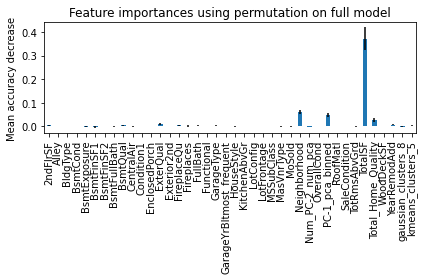

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/samplers/_tpe/sampler.py:250: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2021-09-17 22:41:45,726] A new study created in memory with name: lgbm tuning


The R2 score is 0.8493028886343693
The MAE score is 17493.603900573744
The Median absolute error score is 12219.911686745327
The MSE score is 25086.697795942724
The RMSE score is 629342406.3049575
Started Train LGBM at 22:41:45.
Started Check LGBM for GPU acceleration. at 22:41:45.
LGBM uses CPU.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/200 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: linear_lambda


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/lightgbm/engine.py:530: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



[I 2021-09-17 22:42:45,631] Trial 0 finished with value: 13.053386379842683 and parameters: {'num_boost_round': 26280, 'lambda_l1': 506157.68887523044, 'lambda_l2': 24658.3294585491, 'linear_lambda': 3907.96715682288, 'num_leaves': 81, 'feature_fraction': 0.40919616423534183, 'bagging_fraction': 0.15227525095137953, 'min_child_samples': 88, 'min_gain_to_split': 0.6011150117432088, 'learning_rate': 0.02607024758370768}. Best is trial 0 with value: 13.053386379842683.
[I 2021-09-17 22:42:53,110] Trial 1 finished with value: 13.124597973246441 and parameters: {'num_boost_round': 1538, 'lambda_l1': 659871.1072054069, 'lambda_l2': 98777.00294007908, 'linear_lambda': 18.794668241638455, 'num_leaves': 94, 'feature_fraction': 0.4283831568974037, 'bagging_fraction': 0.373818018663584, 'min_child_samples': 55, 'min_gain_to_split': 0.43194501864211576, 'learning_rate': 0.0038234752246751854}. Best is trial 0 with value: 13.053386379842683.
[I 2021-09-17 22:43:51,076] Trial 2 finished with value: 

[I 2021-09-17 22:48:04,132] Trial 31 finished with value: 13.046370240550257 and parameters: {'num_boost_round': 16011, 'lambda_l1': 12683.655272726139, 'lambda_l2': 1.1095020293098334, 'linear_lambda': 1109.3511159062505, 'num_leaves': 322, 'feature_fraction': 0.5614526285439101, 'bagging_fraction': 0.9170514483200957, 'min_child_samples': 15, 'min_gain_to_split': 0.2269172018165508, 'learning_rate': 0.005626983322353602}. Best is trial 31 with value: 13.046370240550257.
[I 2021-09-17 22:48:14,290] Trial 32 finished with value: 13.046570878892075 and parameters: {'num_boost_round': 25102, 'lambda_l1': 1950.5449895599716, 'lambda_l2': 2.2382139477044514, 'linear_lambda': 1897.8384460883024, 'num_leaves': 423, 'feature_fraction': 0.40269898488117156, 'bagging_fraction': 0.8657298221559158, 'min_child_samples': 31, 'min_gain_to_split': 0.44031866579690593, 'learning_rate': 0.006670642653406074}. Best is trial 31 with value: 13.046370240550257.
[I 2021-09-17 22:48:14,425] Trial 33 pruned.

[I 2021-09-17 22:50:28,812] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:50:32,334] Trial 58 finished with value: 13.046511976872361 and parameters: {'num_boost_round': 11199, 'lambda_l1': 2928.518412608512, 'lambda_l2': 1.9388900873768427, 'linear_lambda': 11298.665410282123, 'num_leaves': 353, 'feature_fraction': 0.6805918663232491, 'bagging_fraction': 0.3349058241322476, 'min_child_samples': 15, 'min_gain_to_split': 0.3865592466768319, 'learning_rate': 0.025285046035939052}. Best is trial 53 with value: 13.046266484397156.
[I 2021-09-17 22:50:41,027] Trial 59 finished with value: 13.047582170985692 and parameters: {'num_boost_round': 19969, 'lambda_l1': 45.48984711012675, 'lambda_l2': 15.37848203795635, 'linear_lambda': 14626.441847061467, 'num_leaves': 439, 'feature_fraction': 0.9826941330618988, 'bagging_fraction': 0.23340862649803967, 'min_child_samples': 8, 'min_gain_to_split': 0.23841182509767825, 'learning_rate': 0.01840304467723208}. Best is trial 53 wit

[I 2021-09-17 22:52:08,598] Trial 80 finished with value: 13.046534046413006 and parameters: {'num_boost_round': 35343, 'lambda_l1': 28589.54125667064, 'lambda_l2': 1.6418789076720148, 'linear_lambda': 287550.25237056095, 'num_leaves': 388, 'feature_fraction': 0.5902783361045222, 'bagging_fraction': 0.5317599479333198, 'min_child_samples': 7, 'min_gain_to_split': 0.5955647733693631, 'learning_rate': 0.028297880795355862}. Best is trial 63 with value: 13.04625606557278.
[I 2021-09-17 22:52:08,735] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:52:08,870] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:52:08,999] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:52:09,869] Trial 84 pruned. Trial was pruned at iteration 178.
[I 2021-09-17 22:52:10,717] Trial 85 pruned. Trial was pruned at iteration 269.
[I 2021-09-17 22:52:13,506] Trial 86 finished with value: 13.046568797162589 and parameters: {'num_boost_round': 28077, 'lambda_l1':

[I 2021-09-17 22:53:00,694] Trial 110 finished with value: 13.046577814441306 and parameters: {'num_boost_round': 30296, 'lambda_l1': 70.72895260334073, 'lambda_l2': 1.618786409216982, 'linear_lambda': 14443.904665026586, 'num_leaves': 190, 'feature_fraction': 0.44291839642147074, 'bagging_fraction': 0.3039257308787914, 'min_child_samples': 42, 'min_gain_to_split': 0.3094175944362217, 'learning_rate': 0.017059105365630406}. Best is trial 92 with value: 13.046147406004433.
[I 2021-09-17 22:53:00,830] Trial 111 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:53:06,379] Trial 112 finished with value: 13.04676837212018 and parameters: {'num_boost_round': 47097, 'lambda_l1': 104693.37974946185, 'lambda_l2': 21.114026557023337, 'linear_lambda': 5352.178126841822, 'num_leaves': 456, 'feature_fraction': 0.48488307242214596, 'bagging_fraction': 0.9740481639577614, 'min_child_samples': 8, 'min_gain_to_split': 0.6116008648991973, 'learning_rate': 0.023828803803438707}. Best is trial 92 

[I 2021-09-17 22:53:52,512] Trial 143 finished with value: 13.046458349608084 and parameters: {'num_boost_round': 35829, 'lambda_l1': 69.50784026402374, 'lambda_l2': 1.4552473460573354, 'linear_lambda': 22159.659308297156, 'num_leaves': 114, 'feature_fraction': 0.6165880130930786, 'bagging_fraction': 0.6502322643297513, 'min_child_samples': 7, 'min_gain_to_split': 0.026340959823088442, 'learning_rate': 0.03512021347981337}. Best is trial 123 with value: 13.046144856900042.
[I 2021-09-17 22:53:54,927] Trial 144 finished with value: 13.046705356243146 and parameters: {'num_boost_round': 35756, 'lambda_l1': 18.913385825520162, 'lambda_l2': 3.861125668506925, 'linear_lambda': 353972.59097577113, 'num_leaves': 188, 'feature_fraction': 0.7015747034210398, 'bagging_fraction': 0.8722894024874869, 'min_child_samples': 13, 'min_gain_to_split': 0.2674311057187456, 'learning_rate': 0.031908334174463523}. Best is trial 123 with value: 13.046144856900042.
[I 2021-09-17 22:53:55,056] Trial 145 pruned

[I 2021-09-17 22:54:29,152] Trial 166 pruned. Trial was pruned at iteration 177.
[I 2021-09-17 22:54:34,391] Trial 167 finished with value: 13.046471153953922 and parameters: {'num_boost_round': 1585, 'lambda_l1': 111.39756860532907, 'lambda_l2': 1.282033617850159, 'linear_lambda': 71.882879660381, 'num_leaves': 236, 'feature_fraction': 0.6771400841832442, 'bagging_fraction': 0.4523330019196035, 'min_child_samples': 9, 'min_gain_to_split': 0.14692760171530023, 'learning_rate': 0.028233992232134502}. Best is trial 123 with value: 13.046144856900042.
[I 2021-09-17 22:54:34,542] Trial 168 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:54:34,688] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:54:34,826] Trial 170 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:54:34,964] Trial 171 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:54:35,111] Trial 172 pruned. Trial was pruned at iteration 2.
[I 2021-09-17 22:54:37,877] Trial 173 finished wit

[I 2021-09-17 22:55:16,710] Trial 194 finished with value: 13.046648936172605 and parameters: {'num_boost_round': 55473, 'lambda_l1': 4.398757077481761, 'lambda_l2': 2.289925366361611, 'linear_lambda': 288297.9675570966, 'num_leaves': 283, 'feature_fraction': 0.534112425654856, 'bagging_fraction': 0.27240242176137874, 'min_child_samples': 18, 'min_gain_to_split': 0.23971833726640757, 'learning_rate': 0.05820609372115762}. Best is trial 123 with value: 13.046144856900042.
[I 2021-09-17 22:55:16,849] Trial 195 pruned. Trial was pruned at iteration 0.
[I 2021-09-17 22:55:21,035] Trial 196 finished with value: 13.046342474545582 and parameters: {'num_boost_round': 51088, 'lambda_l1': 5.433721481758538, 'lambda_l2': 2.517362882451714, 'linear_lambda': 152889.1125477156, 'num_leaves': 58, 'feature_fraction': 0.5770715199853577, 'bagging_fraction': 0.4002701857138082, 'min_child_samples': 6, 'min_gain_to_split': 0.09828287687180065, 'learning_rate': 0.03185231136910546}. Best is trial 123 wit

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning:

Found `num_boost_round` in params. Will use it instead of argument



[1]	train's huber: 54050.5	valid's huber: 45513.3
Training until validation scores don't improve for 10 rounds
[2]	train's huber: 53125.9	valid's huber: 44598.9
[3]	train's huber: 52232.3	valid's huber: 43858.1
[4]	train's huber: 51248.7	valid's huber: 43027.6
[5]	train's huber: 50312.1	valid's huber: 42363.8
[6]	train's huber: 49380.2	valid's huber: 41658.8
[7]	train's huber: 48537.6	valid's huber: 40880.6
[8]	train's huber: 47689.4	valid's huber: 40137.3
[9]	train's huber: 46841.4	valid's huber: 39318.9
[10]	train's huber: 46079.4	valid's huber: 38744.7
[11]	train's huber: 45322.4	valid's huber: 38102.8
[12]	train's huber: 44486.2	valid's huber: 37444.2
[13]	train's huber: 43741.2	valid's huber: 36769.8
[14]	train's huber: 42940.3	valid's huber: 36158.4
[15]	train's huber: 42211.5	valid's huber: 35547.8
[16]	train's huber: 41429.8	valid's huber: 34959.4
[17]	train's huber: 40674.5	valid's huber: 34351.9
[18]	train's huber: 39993.2	valid's huber: 33740.5
[19]	train's huber: 39333	vali

Started Predict with LBGM at 22:55:24.
The R2 score is 0.8405137899617475
The MAE score is 17713.71788360924
The Median absolute error score is 11830.187900582554
The MSE score is 25807.896196241458
The RMSE score is 666047506.0759742
Started Train Xgboost at 22:55:24.
Started Check Xgboost for GPU acceleration. at 22:55:24.
[22:55:24] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "steps" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/samplers/_tpe/sampler.py:250: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2021-09-17 22:55:24,442] A new study created in memory with name: xgboost tuning


Xgboost uses GPU.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[22:55:24] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:55:24] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:55:24] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num

[I 2021-09-17 23:24:28,192] Trial 1 finished with value: 265.1609014728566 and parameters: {'max_depth': 8, 'alpha': 1.3289448722869186, 'lambda': 659871.1072054069, 'num_leaves': 214, 'subsample': 0.5274034664069657, 'min_child_samples': 22, 'eta': 0.002846526357761094, 'steps': 21298, 'num_parallel_tree': 3}. Best is trial 0 with value: 11.115401206557486.
[23:24:28] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:24:28] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be 

[I 2021-09-17 23:27:32,165] Trial 3 finished with value: 2.1780431021276594 and parameters: {'max_depth': 6, 'alpha': 3584.985580340471, 'lambda': 1.8997763474111278, 'num_leaves': 156, 'subsample': 0.502314474212375, 'min_child_samples': 11, 'eta': 0.22413234378101138, 'steps': 67595, 'num_parallel_tree': 5}. Best is trial 3 with value: 2.1780431021276594.
[23:27:32] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:27:32] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be a

[23:47:32] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:47:32] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[I 2021-09-17 23:49:51,520] Trial 5 finished with value: 2.240817145478036 and parameters: {'max_depth': 7, 'alpha': 74.1765203487183, 'lamb

[23:51:03] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:51:03] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[I 2021-09-17 23:51:08,471] Trial 7 finished with value: 2.1637009039473685 and parameters: {'max_depth': 5, 'alpha': 48.48496183873289, 'la

[I 2021-09-17 23:51:29,281] Trial 9 finished with value: 2.3380376657980455 and parameters: {'max_depth': 7, 'alpha': 96.69146694016015, 'lambda': 2.4063018320720926, 'num_leaves': 81, 'subsample': 0.5951099932160482, 'min_child_samples': 75, 'eta': 0.037958335792652884, 'steps': 62106, 'num_parallel_tree': 3}. Best is trial 7 with value: 2.1637009039473685.
[23:51:29] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:51:29] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be 

[I 2021-09-17 23:51:57,887] Trial 11 finished with value: 2.0935405394117645 and parameters: {'max_depth': 7, 'alpha': 3847.2327558021793, 'lambda': 67.71113303974977, 'num_leaves': 171, 'subsample': 0.6088305063254025, 'min_child_samples': 20, 'eta': 0.1933804347158445, 'steps': 68710, 'num_parallel_tree': 5}. Best is trial 11 with value: 2.0935405394117645.
[23:51:57] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:51:58] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be

[23:52:03] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:52:03] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:52:03] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num

[I 2021-09-17 23:52:09,393] Trial 15 finished with value: 2.1258484954545454 and parameters: {'max_depth': 5, 'alpha': 1784.4876471955597, 'lambda': 107.496319471537, 'num_leaves': 170, 'subsample': 0.7368671387488992, 'min_child_samples': 32, 'eta': 0.22371691975180655, 'steps': 63096, 'num_parallel_tree': 3}. Best is trial 11 with value: 2.0935405394117645.
[23:52:09] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:52:09] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be

[I 2021-09-17 23:53:10,268] Trial 17 finished with value: 2.088894462222222 and parameters: {'max_depth': 10, 'alpha': 806.8501174401047, 'lambda': 140.8681684105672, 'num_leaves': 180, 'subsample': 0.8319589961758964, 'min_child_samples': 44, 'eta': 0.16999629664346624, 'steps': 62980, 'num_parallel_tree': 3}. Best is trial 17 with value: 2.088894462222222.
[23:53:10] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:53:10] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be 

[23:53:19] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:53:19] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:53:19] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num

[I 2021-09-17 23:53:26,920] Trial 21 finished with value: 2.1522075736641217 and parameters: {'max_depth': 3, 'alpha': 147.18770140748887, 'lambda': 490.9442506807541, 'num_leaves': 230, 'subsample': 0.5991870312970514, 'min_child_samples': 53, 'eta': 0.17933944499022342, 'steps': 63407, 'num_parallel_tree': 5}. Best is trial 17 with value: 2.088894462222222.
[23:53:27] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:53:27] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be

[I 2021-09-17 23:53:36,440] Trial 23 finished with value: 2.1132030375 and parameters: {'max_depth': 9, 'alpha': 15.801554767815961, 'lambda': 6.7205704126384065, 'num_leaves': 108, 'subsample': 0.8198557176130364, 'min_child_samples': 32, 'eta': 0.2796198434146646, 'steps': 64976, 'num_parallel_tree': 3}. Best is trial 17 with value: 2.088894462222222.
[23:53:36] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:53:36] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accur

[I 2021-09-17 23:54:44,116] Trial 25 finished with value: 2.0914289054545456 and parameters: {'max_depth': 10, 'alpha': 402.1812195136087, 'lambda': 35.022484891746394, 'num_leaves': 145, 'subsample': 0.7178725255661281, 'min_child_samples': 40, 'eta': 0.24328365092594262, 'steps': 61426, 'num_parallel_tree': 3}. Best is trial 17 with value: 2.088894462222222.
[23:54:44] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:54:44] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not b

[I 2021-09-17 23:55:13,615] Trial 27 finished with value: 2.110769468627451 and parameters: {'max_depth': 10, 'alpha': 6666.385508058418, 'lambda': 197.52482856435546, 'num_leaves': 148, 'subsample': 0.8513467072171611, 'min_child_samples': 73, 'eta': 0.2635406690103471, 'steps': 67564, 'num_parallel_tree': 1}. Best is trial 17 with value: 2.088894462222222.
[23:55:13] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:55:13] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be 

[23:55:41] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1623267594558/work/src/learner.cc:573: 
Parameters: { "min_child_samples", "num_leaves", "steps", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-gamma-nloglik:8.88580	test-gamma-nloglik:9.13205
[1]	train-gamma-nloglik:5.14935	test-gamma-nloglik:5.30742
[2]	train-gamma-nloglik:3.82334	test-gamma-nloglik:3.71864
[3]	train-gamma-nloglik:3.26851	test-gamma-nloglik:3.17844
[4]	train-gamma-nloglik:2.94610	test-gamma-nloglik:2.88234
[5]	train-gamma-nloglik:2.73742	test-gamma-nloglik:2.68777
[6]	train-gamma-nloglik:2.59068	test-gamma-nloglik:2.55173
[7]	train-gamma-nloglik:2.48476	test-gamma-nloglik:2.45321
[8]	train-gamma-nloglik:2.40015	test-gamma-nloglik:2.37159
[9]	train-gamma-nloglik:2.33772	test-ga

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/samplers/_tpe/sampler.py:250: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2021-09-17 23:55:44,662] A new study created in memory with name: ngboost tuning


The R2 score is 0.8220788337479359
The MAE score is 19044.03830078125
The Median absolute error score is 14470.763671875
The MSE score is 27258.681340598454
The RMSE score is 743035708.4282904
Started Train Ngboost at 23:55:44.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/25 [00:00<?, ?it/s]

[iter 0] loss=13.1395 val_loss=13.0626 scale=1.0000 norm=0.3334
[iter 100] loss=13.1153 val_loss=13.0514 scale=1.0000 norm=0.2907
[iter 200] loss=13.0894 val_loss=13.0388 scale=2.0000 norm=0.4912
[iter 300] loss=13.0832 val_loss=13.0284 scale=2.0000 norm=0.4086
[iter 400] loss=13.0716 val_loss=13.0214 scale=2.0000 norm=0.3306
[iter 500] loss=13.0615 val_loss=13.0166 scale=2.0000 norm=0.2833
[iter 600] loss=13.0637 val_loss=13.0133 scale=2.0000 norm=0.2426
[iter 700] loss=13.0476 val_loss=13.0110 scale=2.0000 norm=0.2141
[iter 800] loss=13.0394 val_loss=13.0094 scale=2.0000 norm=0.1900
[iter 900] loss=13.0566 val_loss=13.0082 scale=2.0000 norm=0.1669
[iter 1000] loss=13.0472 val_loss=13.0075 scale=2.0000 norm=0.1516
[iter 1100] loss=13.0570 val_loss=13.0070 scale=2.0000 norm=0.1386
[iter 1200] loss=13.0502 val_loss=13.0066 scale=2.0000 norm=0.1255
[iter 1300] loss=13.0546 val_loss=13.0064 scale=2.0000 norm=0.1160
[iter 1400] loss=13.0550 val_loss=13.0062 scale=2.0000 norm=0.1088
[iter 1

[iter 700] loss=13.0289 val_loss=13.0089 scale=2.0000 norm=0.2032
[iter 800] loss=13.0429 val_loss=13.0076 scale=2.0000 norm=0.1764
[iter 900] loss=13.0356 val_loss=13.0069 scale=2.0000 norm=0.1589
[iter 1000] loss=13.0395 val_loss=13.0063 scale=2.0000 norm=0.1466
[iter 1100] loss=13.0354 val_loss=13.0061 scale=2.0000 norm=0.1336
[iter 1200] loss=13.0349 val_loss=13.0059 scale=2.0000 norm=0.1238
[iter 1300] loss=13.0357 val_loss=13.0058 scale=2.0000 norm=0.1169
[iter 1400] loss=13.0132 val_loss=13.0057 scale=2.0000 norm=0.1053
== Early stopping achieved.
== Best iteration / VAL1396 (val_loss=13.0057)
[iter 0] loss=13.1221 val_loss=13.0627 scale=1.0000 norm=0.3266
[iter 100] loss=13.1291 val_loss=13.0507 scale=1.0000 norm=0.2926
[iter 200] loss=13.0868 val_loss=13.0363 scale=2.0000 norm=0.4767
[iter 300] loss=13.0793 val_loss=13.0263 scale=2.0000 norm=0.4045
[iter 400] loss=13.0679 val_loss=13.0195 scale=2.0000 norm=0.3423
[iter 500] loss=13.0713 val_loss=13.0149 scale=2.0000 norm=0.282

== Early stopping achieved.
== Best iteration / VAL1459 (val_loss=11.4862)
[iter 0] loss=12.5907 val_loss=12.4172 scale=1.0000 norm=0.6648
[iter 100] loss=12.4425 val_loss=12.3086 scale=1.0000 norm=0.5465
[iter 200] loss=12.3059 val_loss=12.2236 scale=1.0000 norm=0.5041
[iter 300] loss=12.2462 val_loss=12.1457 scale=1.0000 norm=0.4865
[iter 400] loss=12.1288 val_loss=12.0689 scale=1.0000 norm=0.4635
[iter 500] loss=12.0491 val_loss=11.9895 scale=2.0000 norm=0.9200
[iter 600] loss=11.9355 val_loss=11.9047 scale=2.0000 norm=0.8789
[iter 700] loss=11.8219 val_loss=11.8151 scale=2.0000 norm=0.8891
[iter 800] loss=11.7399 val_loss=11.7298 scale=2.0000 norm=0.8698
[iter 900] loss=11.6216 val_loss=11.6478 scale=2.0000 norm=0.8531
[iter 1000] loss=11.5433 val_loss=11.5835 scale=2.0000 norm=0.8422
[iter 1100] loss=11.4567 val_loss=11.5347 scale=2.0000 norm=0.8342
[iter 1200] loss=11.3869 val_loss=11.5035 scale=1.0000 norm=0.4121
[iter 1300] loss=11.3567 val_loss=11.4873 scale=1.0000 norm=0.4132

[iter 1100] loss=11.2340 val_loss=11.4282 scale=2.0000 norm=0.8296
[iter 1200] loss=11.1600 val_loss=11.4128 scale=2.0000 norm=0.8037
== Early stopping achieved.
== Best iteration / VAL1282 (val_loss=11.4087)
[iter 0] loss=12.5261 val_loss=12.4158 scale=2.0000 norm=1.2764
[iter 100] loss=12.3370 val_loss=12.2278 scale=2.0000 norm=1.0064
[iter 200] loss=12.1510 val_loss=12.1006 scale=2.0000 norm=0.9193
[iter 300] loss=12.0564 val_loss=11.9883 scale=2.0000 norm=0.8940
[iter 400] loss=11.9100 val_loss=11.8855 scale=2.0000 norm=0.8968
[iter 500] loss=11.8017 val_loss=11.7905 scale=2.0000 norm=0.8768
[iter 600] loss=11.6851 val_loss=11.7036 scale=2.0000 norm=0.8662
[iter 700] loss=11.5594 val_loss=11.6261 scale=2.0000 norm=0.8607
[iter 800] loss=11.4839 val_loss=11.5595 scale=2.0000 norm=0.8592
[iter 900] loss=11.4126 val_loss=11.5049 scale=2.0000 norm=0.8343
[iter 1000] loss=11.2958 val_loss=11.4636 scale=2.0000 norm=0.8537
[iter 1100] loss=11.2357 val_loss=11.4361 scale=2.0000 norm=0.8286

== Early stopping achieved.
== Best iteration / VAL26 (val_loss=11.4706)
[iter 0] loss=12.7407 val_loss=12.5058 scale=1.0000 norm=61373.0099
== Early stopping achieved.
== Best iteration / VAL30 (val_loss=11.4387)
[I 2021-09-18 00:07:05,924] Trial 3 finished with value: -1026366639.2468361 and parameters: {'base_learner': 'DecTree_depth5', 'Dist': 'Normal', 'n_estimators': 24760, 'minibatch_frac': 0.42063311266913106, 'learning_rate': 0.06586289317583113}. Best is trial 2 with value: -838334175.5994766.
[iter 0] loss=12.5654 val_loss=12.4008 scale=1.0000 norm=0.6452
[iter 100] loss=11.0769 val_loss=11.4488 scale=2.0000 norm=0.8288
== Early stopping achieved.
== Best iteration / VAL97 (val_loss=11.4470)
[iter 0] loss=12.5992 val_loss=12.4064 scale=1.0000 norm=0.6663
[iter 100] loss=11.0665 val_loss=11.4851 scale=2.0000 norm=0.8336
== Early stopping achieved.
== Best iteration / VAL94 (val_loss=11.4814)
[iter 0] loss=12.5839 val_loss=12.4024 scale=1.0000 norm=0.6543
[iter 100] loss=11.09

[iter 0] loss=12.7719 val_loss=12.5381 scale=2.0000 norm=124218.9225
[iter 100] loss=11.0909 val_loss=11.4648 scale=2.0000 norm=22668.5144
== Early stopping achieved.
== Best iteration / VAL94 (val_loss=11.4599)
[iter 0] loss=12.7750 val_loss=12.5340 scale=2.0000 norm=123212.6941
[iter 100] loss=11.0876 val_loss=11.4634 scale=2.0000 norm=22572.4958
== Early stopping achieved.
== Best iteration / VAL94 (val_loss=11.4568)
[iter 0] loss=12.7787 val_loss=12.5441 scale=2.0000 norm=124728.0059
[iter 100] loss=11.1054 val_loss=11.4343 scale=2.0000 norm=23202.5385
== Early stopping achieved.
== Best iteration / VAL98 (val_loss=11.4338)
[iter 0] loss=12.6785 val_loss=12.4911 scale=2.0000 norm=116296.7461
== Early stopping achieved.
== Best iteration / VAL90 (val_loss=11.4383)
[iter 0] loss=12.7229 val_loss=12.5309 scale=2.0000 norm=121087.8050
[iter 100] loss=11.1140 val_loss=11.4382 scale=2.0000 norm=23601.5937
== Early stopping achieved.
== Best iteration / VAL98 (val_loss=11.4378)
[iter 0] l

[iter 2400] loss=11.3214 val_loss=11.4962 scale=1.0000 norm=0.4200
== Early stopping achieved.
== Best iteration / VAL2416 (val_loss=11.4959)
[iter 0] loss=12.6086 val_loss=12.4222 scale=1.0000 norm=0.6698
[iter 100] loss=12.5217 val_loss=12.3521 scale=1.0000 norm=0.5883
[iter 200] loss=12.4228 val_loss=12.2939 scale=1.0000 norm=0.5418
[iter 300] loss=12.3736 val_loss=12.2408 scale=2.0000 norm=1.0345
[iter 400] loss=12.2792 val_loss=12.1908 scale=1.0000 norm=0.4872
[iter 500] loss=12.2338 val_loss=12.1436 scale=1.0000 norm=0.4842
[iter 600] loss=12.1676 val_loss=12.0973 scale=1.0000 norm=0.4636
[iter 700] loss=12.0891 val_loss=12.0488 scale=1.0000 norm=0.4569
[iter 800] loss=12.0574 val_loss=12.0018 scale=1.0000 norm=0.4549
[iter 900] loss=12.0116 val_loss=11.9540 scale=2.0000 norm=0.9095
[iter 1000] loss=11.9310 val_loss=11.9045 scale=2.0000 norm=0.8969
[iter 1100] loss=11.8962 val_loss=11.8522 scale=2.0000 norm=0.9037
[iter 1200] loss=11.8038 val_loss=11.8006 scale=1.0000 norm=0.4419

[iter 2000] loss=11.4323 val_loss=11.5306 scale=2.0000 norm=0.8229
[iter 2100] loss=11.4288 val_loss=11.5161 scale=2.0000 norm=0.8302
[iter 2200] loss=11.3451 val_loss=11.5041 scale=2.0000 norm=0.8221
[iter 2300] loss=11.3379 val_loss=11.4966 scale=2.0000 norm=0.8316
[iter 2400] loss=11.3097 val_loss=11.4919 scale=1.0000 norm=0.4166
== Early stopping achieved.
== Best iteration / VAL2463 (val_loss=11.4904)
[iter 0] loss=12.5584 val_loss=12.4197 scale=1.0000 norm=0.6417
[iter 100] loss=12.4886 val_loss=12.3488 scale=1.0000 norm=0.5690
[iter 200] loss=12.3883 val_loss=12.2915 scale=1.0000 norm=0.5380
[iter 300] loss=12.3219 val_loss=12.2386 scale=1.0000 norm=0.5080
[iter 400] loss=12.2805 val_loss=12.1878 scale=1.0000 norm=0.4895
[iter 500] loss=12.2090 val_loss=12.1401 scale=1.0000 norm=0.4725
[iter 600] loss=12.1582 val_loss=12.0952 scale=2.0000 norm=0.9457
[iter 700] loss=12.1095 val_loss=12.0496 scale=1.0000 norm=0.4640
[iter 800] loss=12.0651 val_loss=12.0045 scale=2.0000 norm=0.915

[iter 1000] loss=11.1108 val_loss=11.5000 scale=2.0000 norm=10057.5669
== Early stopping achieved.
== Best iteration / VAL1083 (val_loss=11.4884)
[iter 0] loss=12.6951 val_loss=12.5308 scale=2.0000 norm=117473.9809
[iter 100] loss=12.3803 val_loss=12.3263 scale=2.0000 norm=93871.6814
[iter 200] loss=12.1857 val_loss=12.1865 scale=2.0000 norm=68611.0530
[iter 300] loss=12.0461 val_loss=12.0614 scale=2.0000 norm=54520.0801
[iter 400] loss=11.8997 val_loss=11.9435 scale=2.0000 norm=41944.0386
[iter 500] loss=11.7525 val_loss=11.8339 scale=2.0000 norm=32591.5316
[iter 600] loss=11.5980 val_loss=11.7335 scale=2.0000 norm=23873.1906
[iter 700] loss=11.4549 val_loss=11.6452 scale=2.0000 norm=18265.1280
[iter 800] loss=11.3436 val_loss=11.5729 scale=2.0000 norm=15773.3457
[iter 900] loss=11.1917 val_loss=11.5215 scale=2.0000 norm=12619.3092
[iter 1000] loss=11.0389 val_loss=11.4973 scale=2.0000 norm=9446.3252
== Early stopping achieved.
== Best iteration / VAL1018 (val_loss=11.4957)
[iter 0] l

== Early stopping achieved.
== Best iteration / VAL32 (val_loss=13.0060)
[iter 0] loss=13.1338 val_loss=13.0553 scale=1.0000 norm=0.3389
== Early stopping achieved.
== Best iteration / VAL28 (val_loss=13.0062)
[iter 0] loss=13.1380 val_loss=13.0569 scale=1.0000 norm=0.3342
== Early stopping achieved.
== Best iteration / VAL32 (val_loss=13.0062)
[iter 0] loss=13.1260 val_loss=13.0557 scale=1.0000 norm=0.3366
== Early stopping achieved.
== Best iteration / VAL25 (val_loss=13.0064)
[iter 0] loss=13.1339 val_loss=13.0555 scale=1.0000 norm=0.3367
== Early stopping achieved.
== Best iteration / VAL27 (val_loss=13.0058)
[iter 0] loss=13.1090 val_loss=13.0544 scale=1.0000 norm=0.3205
== Early stopping achieved.
== Best iteration / VAL32 (val_loss=13.0067)
[iter 0] loss=13.1229 val_loss=13.0555 scale=1.0000 norm=0.3263
== Early stopping achieved.
== Best iteration / VAL29 (val_loss=13.0063)
[iter 0] loss=13.1213 val_loss=13.0552 scale=1.0000 norm=0.3268
== Early stopping achieved.
== Best itera

[iter 100] loss=13.0472 val_loss=13.0053 scale=2.0000 norm=0.1618
== Early stopping achieved.
== Best iteration / VAL149 (val_loss=13.0044)
[iter 0] loss=13.0944 val_loss=13.0601 scale=2.0000 norm=0.6182
[iter 100] loss=13.0499 val_loss=13.0053 scale=2.0000 norm=0.1605
== Early stopping achieved.
== Best iteration / VAL143 (val_loss=13.0047)
[iter 0] loss=13.0980 val_loss=13.0610 scale=1.0000 norm=0.3154
[iter 100] loss=13.0472 val_loss=13.0052 scale=2.0000 norm=0.1620
== Early stopping achieved.
== Best iteration / VAL143 (val_loss=13.0046)
[iter 0] loss=13.0959 val_loss=13.0610 scale=1.0000 norm=0.3188
[iter 100] loss=13.0562 val_loss=13.0052 scale=2.0000 norm=0.1604
== Early stopping achieved.
== Best iteration / VAL139 (val_loss=13.0046)
[iter 0] loss=13.1120 val_loss=13.0605 scale=2.0000 norm=0.6281
[iter 100] loss=13.0649 val_loss=13.0053 scale=2.0000 norm=0.1625
== Early stopping achieved.
== Best iteration / VAL141 (val_loss=13.0047)
[iter 0] loss=13.0997 val_loss=13.0608 scale

== Early stopping achieved.
== Best iteration / VAL19 (val_loss=13.0048)
[iter 0] loss=13.1235 val_loss=13.0474 scale=2.0000 norm=0.6654
== Early stopping achieved.
== Best iteration / VAL23 (val_loss=13.0047)
[iter 0] loss=13.1234 val_loss=13.0473 scale=2.0000 norm=0.6664
== Early stopping achieved.
== Best iteration / VAL19 (val_loss=13.0048)
[iter 0] loss=13.1317 val_loss=13.0483 scale=2.0000 norm=0.6652
== Early stopping achieved.
== Best iteration / VAL19 (val_loss=13.0048)
[iter 0] loss=13.1174 val_loss=13.0540 scale=1.0000 norm=0.3331
== Early stopping achieved.
== Best iteration / VAL21 (val_loss=13.0048)
[iter 0] loss=13.1316 val_loss=13.0551 scale=1.0000 norm=0.3345
== Early stopping achieved.
== Best iteration / VAL22 (val_loss=13.0048)
[iter 0] loss=13.1087 val_loss=13.0462 scale=2.0000 norm=0.6412
== Early stopping achieved.
== Best iteration / VAL19 (val_loss=13.0046)
[iter 0] loss=13.1279 val_loss=13.0476 scale=2.0000 norm=0.6657
== Early stopping achieved.
== Best itera

[iter 0] loss=13.1368 val_loss=13.0533 scale=1.0000 norm=0.3401
== Early stopping achieved.
== Best iteration / VAL17 (val_loss=13.0047)
Started Predict with Ngboost at 00:16:50.


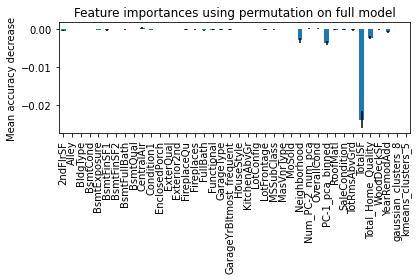

The R2 score is 0.8747263995488312
The MAE score is 15762.292648249499
The Median absolute error score is 11040.551822979847
The MSE score is 22872.87803090311
The RMSE score is 523168549.4165702
Started Train Vowpal Wabbit model at 00:16:54.
Started Predict with Vowpal Wabbit at 00:16:54.


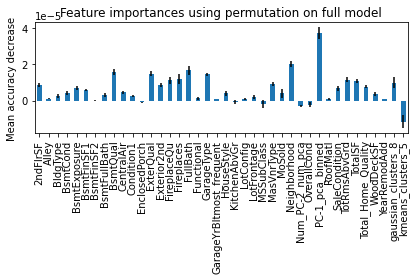

[I 2021-09-18 00:16:55,283] A new study created in memory with name: tabnet tuning


The R2 score is -7.147494649538075
The MAE score is 172772.75731575012
The Median absolute error score is 155884.5468864441
The MSE score is 184460.370376739
The RMSE score is 34025628239.52374
Started Train Tabnet regression model at 00:16:55.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/25 [00:00<?, ?it/s]

Device used : cuda
epoch 0  | loss: 3.7561186374595405e+17| val_0_unsup_loss: 8.362517791663718e+17|  0:00:00s
epoch 1  | loss: 1.8246190831612074e+17| val_0_unsup_loss: 8.365207471983165e+17|  0:00:00s
epoch 2  | loss: 9.66625492347733e+16| val_0_unsup_loss: 8.364775226474496e+17|  0:00:00s
epoch 3  | loss: 9.197840827102397e+16| val_0_unsup_loss: 8.368198143610716e+17|  0:00:01s
epoch 4  | loss: 8.580724655018021e+16| val_0_unsup_loss: 8.368018785776435e+17|  0:00:01s
epoch 5  | loss: 1.0021944644413627e+17| val_0_unsup_loss: 8.363297070529905e+17|  0:00:01s
epoch 6  | loss: 1.9805547237014256e+17| val_0_unsup_loss: 8.364847381925069e+17|  0:00:01s
epoch 7  | loss: 2.771208877581714e+17| val_0_unsup_loss: 8.357556245443379e+17|  0:00:01s
epoch 8  | loss: 1.6639403479817056e+17| val_0_unsup_loss: 8.361351622143508e+17|  0:00:02s
epoch 9  | loss: 9.83108087907772e+16| val_0_unsup_loss: 8.369652934933217e+17|  0:00:02s
epoch 10 | loss: 1.7739134246369126e+17| val_0_unsup_loss: 8.3758906

epoch 91 | loss: 14847429.6383| val_0_unsup_loss: 8.313687105884652e+17|  0:00:20s
epoch 92 | loss: 8.089004729882795e+16| val_0_unsup_loss: 8.311239318123315e+17|  0:00:20s
epoch 93 | loss: 7.118515446778336e+16| val_0_unsup_loss: 8.310380324664115e+17|  0:00:21s
epoch 94 | loss: 7.114546515221964e+16| val_0_unsup_loss: 8.309987936451953e+17|  0:00:21s
epoch 95 | loss: 8.31370291136458e+16| val_0_unsup_loss: 8.309586614707814e+17|  0:00:21s
epoch 96 | loss: 8.404122471754181e+16| val_0_unsup_loss: 8.306339619432038e+17|  0:00:21s
epoch 97 | loss: 8.429902965226518e+16| val_0_unsup_loss: 8.308112581931827e+17|  0:00:22s

Early stopping occurred at epoch 97 with best_epoch = 47 and best_val_0_unsup_loss = 8.101418139805286e+17
Best weights from best epoch are automatically used!
Device used : cuda
Loading weights from unsupervised pretraining
epoch 0  | loss: 40961309354.66666| val_0_mae: 190104.57374|  0:00:00s
epoch 1  | loss: 40900846478.22222| val_0_mae: 189786.82985|  0:00:00s
epoc

epoch 106| loss: 11218203363.55556| val_0_mae: 99497.86033|  0:00:19s
epoch 107| loss: 11024010808.88889| val_0_mae: 105071.21703|  0:00:19s
epoch 108| loss: 10767423488.0| val_0_mae: 99554.90144|  0:00:19s
epoch 109| loss: 10400996352.0| val_0_mae: 103655.7434|  0:00:19s
epoch 110| loss: 10229663630.22222| val_0_mae: 87837.83355|  0:00:19s
epoch 111| loss: 9990677560.88889| val_0_mae: 93794.21851|  0:00:20s
epoch 112| loss: 9796681841.77778| val_0_mae: 97132.42367|  0:00:20s
epoch 113| loss: 9624738816.0| val_0_mae: 101262.50772|  0:00:20s
epoch 114| loss: 9382599736.88889| val_0_mae: 93211.42951|  0:00:20s
epoch 115| loss: 8926503310.22222| val_0_mae: 99309.06452|  0:00:20s
epoch 116| loss: 8832688412.44444| val_0_mae: 99931.29059|  0:00:20s
epoch 117| loss: 8566808746.66667| val_0_mae: 90387.88557|  0:00:21s
epoch 118| loss: 8267293070.22222| val_0_mae: 75353.34406|  0:00:21s
epoch 119| loss: 8168641080.88889| val_0_mae: 83002.34041|  0:00:21s
epoch 120| loss: 8009788984.88889| val_

epoch 226| loss: 909339100.44444| val_0_mae: 29010.92651|  0:00:40s
epoch 227| loss: 887062759.11111| val_0_mae: 17187.72292|  0:00:40s
epoch 228| loss: 972810080.0| val_0_mae: 26413.24639|  0:00:41s
epoch 229| loss: 905522321.77778| val_0_mae: 14352.7042|  0:00:41s
epoch 230| loss: 838540611.55556| val_0_mae: 15150.56406|  0:00:41s
epoch 231| loss: 1025364977.77778| val_0_mae: 16046.22188|  0:00:41s
epoch 232| loss: 1090078133.33333| val_0_mae: 16013.87124|  0:00:41s
epoch 233| loss: 779180241.77778| val_0_mae: 24138.88704|  0:00:41s
epoch 234| loss: 847478812.44444| val_0_mae: 17299.78774|  0:00:42s
epoch 235| loss: 978480352.0| val_0_mae: 22291.17251|  0:00:42s
epoch 236| loss: 1070370083.55556| val_0_mae: 15816.47532|  0:00:42s
epoch 237| loss: 865508245.33333| val_0_mae: 21282.0405|  0:00:42s
epoch 238| loss: 756372216.88889| val_0_mae: 19441.69012|  0:00:42s
epoch 239| loss: 1130420977.77778| val_0_mae: 16390.74282|  0:00:42s
epoch 240| loss: 954312344.88889| val_0_mae: 20752.217

epoch 57 | loss: 1654.7407| val_0_unsup_loss: 447.18124|  0:00:12s
epoch 58 | loss: 1.811106237965793e+17| val_0_unsup_loss: 448.41623|  0:00:13s
epoch 59 | loss: 8.915887104703627e+16| val_0_unsup_loss: 449.35693|  0:00:13s
epoch 60 | loss: 7.374167171230851e+16| val_0_unsup_loss: 450.95883|  0:00:13s
epoch 61 | loss: 1.559364193695155e+17| val_0_unsup_loss: 452.83652|  0:00:13s
epoch 62 | loss: 8.403029068524451e+16| val_0_unsup_loss: 456.61594|  0:00:14s
epoch 63 | loss: 1.604651626813056e+17| val_0_unsup_loss: 458.74094|  0:00:14s
epoch 64 | loss: 8.202404847103694e+16| val_0_unsup_loss: 459.95541|  0:00:14s
epoch 65 | loss: 8.02213915191916e+16| val_0_unsup_loss: 460.93112|  0:00:14s
epoch 66 | loss: 2.5228039273706723e+17| val_0_unsup_loss: 461.44772|  0:00:14s
epoch 67 | loss: 2.389847239946271e+17| val_0_unsup_loss: 466.89874|  0:00:15s
epoch 68 | loss: 9.043560256981632e+16| val_0_unsup_loss: 461.45605|  0:00:15s
epoch 69 | loss: 1.144100107774598e+17| val_0_unsup_loss: 457.19

epoch 88 | loss: 17979254897.77778| val_0_mae: 126422.84582|  0:00:16s
epoch 89 | loss: 17502462634.66667| val_0_mae: 124747.54089|  0:00:16s
epoch 90 | loss: 17259854848.0| val_0_mae: 117233.43165|  0:00:16s
epoch 91 | loss: 16941459342.22222| val_0_mae: 123619.84513|  0:00:16s
epoch 92 | loss: 16677447111.11111| val_0_mae: 123400.9431|  0:00:16s
epoch 93 | loss: 16366137344.0| val_0_mae: 121876.30427|  0:00:16s
epoch 94 | loss: 16043158528.0| val_0_mae: 129718.40539|  0:00:17s
epoch 95 | loss: 15728468878.22222| val_0_mae: 109827.62023|  0:00:17s
epoch 96 | loss: 15408410624.0| val_0_mae: 96905.964|  0:00:17s
epoch 97 | loss: 15190705152.0| val_0_mae: 118621.11261|  0:00:17s
epoch 98 | loss: 14809955328.0| val_0_mae: 122926.74361|  0:00:17s
epoch 99 | loss: 14725360298.66666| val_0_mae: 116955.08844|  0:00:18s
epoch 100| loss: 14340150840.88889| val_0_mae: 105177.9644|  0:00:18s
epoch 101| loss: 14064559331.55556| val_0_mae: 118271.62142|  0:00:18s
epoch 102| loss: 13792105585.77778|

epoch 208| loss: 1227778282.66667| val_0_mae: 35917.65117|  0:00:37s
epoch 209| loss: 1400649415.11111| val_0_mae: 20618.62599|  0:00:37s
epoch 210| loss: 1273227804.44444| val_0_mae: 26382.47314|  0:00:37s
epoch 211| loss: 1383407594.66667| val_0_mae: 18671.97036|  0:00:37s
epoch 212| loss: 1098519456.0| val_0_mae: 21121.0338|  0:00:38s
epoch 213| loss: 1265803200.0| val_0_mae: 27319.59719|  0:00:38s
epoch 214| loss: 1359719697.77778| val_0_mae: 29084.37354|  0:00:38s
epoch 215| loss: 1194072405.33333| val_0_mae: 18725.74292|  0:00:38s
epoch 216| loss: 1285278915.55556| val_0_mae: 30119.6108|  0:00:38s
epoch 217| loss: 1062517134.22222| val_0_mae: 22081.57969|  0:00:38s
epoch 218| loss: 1184530211.55556| val_0_mae: 19908.22266|  0:00:39s
epoch 219| loss: 1193935239.11111| val_0_mae: 17434.15288|  0:00:39s
epoch 220| loss: 1091552469.33333| val_0_mae: 18586.96777|  0:00:39s
epoch 221| loss: 1096145784.88889| val_0_mae: 23503.9129|  0:00:39s
epoch 222| loss: 1216126065.77778| val_0_mae:

epoch 26 | loss: 8.528303911064306e+16| val_0_unsup_loss: 400.17749|  0:00:05s
epoch 27 | loss: 7.878411602776152e+16| val_0_unsup_loss: 388.36313|  0:00:06s
epoch 28 | loss: 1466.34043| val_0_unsup_loss: 385.67526|  0:00:06s
epoch 29 | loss: 1773.4387| val_0_unsup_loss: 380.83527|  0:00:06s
epoch 30 | loss: 9.824740362024274e+16| val_0_unsup_loss: 372.61118|  0:00:06s
epoch 31 | loss: 210186.27473| val_0_unsup_loss: 362.13562|  0:00:06s
epoch 32 | loss: 1.845738792656433e+17| val_0_unsup_loss: 356.89139|  0:00:07s
epoch 33 | loss: 8.741123549217243e+16| val_0_unsup_loss: 347.04758|  0:00:07s
epoch 34 | loss: 1.9289698376497552e+17| val_0_unsup_loss: 334.63379|  0:00:07s
epoch 35 | loss: 2.7062246098262134e+17| val_0_unsup_loss: 283.16159|  0:00:07s
epoch 36 | loss: 1.769417872823791e+17| val_0_unsup_loss: 161.50023|  0:00:08s
epoch 37 | loss: 1.9563291992776234e+17| val_0_unsup_loss: 122.79333|  0:00:08s
epoch 38 | loss: 1.9127408933138218e+17| val_0_unsup_loss: 167.69322|  0:00:08s
e

epoch 46 | loss: 31928118158.22222| val_0_mae: 154782.82625|  0:00:08s
epoch 47 | loss: 31585936497.77778| val_0_mae: 151107.18874|  0:00:08s
epoch 48 | loss: 31243674510.22222| val_0_mae: 153215.60586|  0:00:08s
epoch 49 | loss: 30890839836.44444| val_0_mae: 151116.71251|  0:00:09s
epoch 50 | loss: 30582049905.77778| val_0_mae: 148331.50626|  0:00:09s
epoch 51 | loss: 30255555925.33333| val_0_mae: 148341.95752|  0:00:09s
epoch 52 | loss: 29898139420.44444| val_0_mae: 147990.81812|  0:00:09s
epoch 53 | loss: 29599369216.0| val_0_mae: 145877.64988|  0:00:09s
epoch 54 | loss: 29302484992.0| val_0_mae: 149226.23948|  0:00:09s
epoch 55 | loss: 28868344945.77778| val_0_mae: 147196.74014|  0:00:10s
epoch 56 | loss: 28496868010.66667| val_0_mae: 140166.71981|  0:00:10s
epoch 57 | loss: 28124523861.33333| val_0_mae: 137471.90744|  0:00:10s
epoch 58 | loss: 27791643306.66667| val_0_mae: 144566.15263|  0:00:10s
epoch 59 | loss: 27507869923.55556| val_0_mae: 144424.87859|  0:00:10s
epoch 60 | los

epoch 166| loss: 2744536632.88889| val_0_mae: 26062.23739|  0:00:29s
epoch 167| loss: 2561303466.66667| val_0_mae: 21419.26766|  0:00:29s
epoch 168| loss: 2450630968.88889| val_0_mae: 34543.70677|  0:00:30s
epoch 169| loss: 2490894577.77778| val_0_mae: 22738.73889|  0:00:30s
epoch 170| loss: 2569021134.22222| val_0_mae: 37937.51331|  0:00:30s
epoch 171| loss: 2410473173.33333| val_0_mae: 38501.0299|  0:00:30s
epoch 172| loss: 2371988010.66667| val_0_mae: 41810.57777|  0:00:30s
epoch 173| loss: 2113071118.22222| val_0_mae: 23071.16902|  0:00:30s
epoch 174| loss: 2380295907.55556| val_0_mae: 25605.06993|  0:00:31s
epoch 175| loss: 2478382215.11111| val_0_mae: 35034.7213|  0:00:31s
epoch 176| loss: 1994090097.77778| val_0_mae: 36435.04058|  0:00:31s
epoch 177| loss: 2308911416.88889| val_0_mae: 37777.35021|  0:00:31s
epoch 178| loss: 1948014805.33333| val_0_mae: 20146.71996|  0:00:31s
epoch 179| loss: 1944949063.11111| val_0_mae: 17548.78772|  0:00:32s
epoch 180| loss: 2286698261.33333| v

epoch 288| loss: 971578769.77778| val_0_mae: 16302.58291|  0:00:51s
epoch 289| loss: 919098357.33333| val_0_mae: 14131.12449|  0:00:51s
epoch 290| loss: 836003438.22222| val_0_mae: 13453.4032|  0:00:51s
epoch 291| loss: 931150414.22222| val_0_mae: 13596.68406|  0:00:51s
epoch 292| loss: 787985219.55556| val_0_mae: 16918.56301|  0:00:52s
epoch 293| loss: 940394851.55556| val_0_mae: 13018.96333|  0:00:52s
epoch 294| loss: 958849265.77778| val_0_mae: 16143.62917|  0:00:52s
epoch 295| loss: 804649208.88889| val_0_mae: 15445.03949|  0:00:52s
epoch 296| loss: 862214044.44444| val_0_mae: 16053.92832|  0:00:52s
epoch 297| loss: 910139320.88889| val_0_mae: 14767.74629|  0:00:52s
epoch 298| loss: 923501432.88889| val_0_mae: 13744.8325|  0:00:53s
epoch 299| loss: 735390240.0| val_0_mae: 19656.20079|  0:00:53s
epoch 300| loss: 806780288.0| val_0_mae: 18602.74177|  0:00:53s
epoch 301| loss: 751155477.33333| val_0_mae: 19577.43145|  0:00:53s
epoch 302| loss: 864161649.77778| val_0_mae: 15066.85304| 

epoch 67 | loss: 1.7516447254906317e+17| val_0_unsup_loss: 4674.63623|  0:00:15s
epoch 68 | loss: 10826156.26406| val_0_unsup_loss: 4661.94092|  0:00:15s
epoch 69 | loss: 1.5679805470225536e+17| val_0_unsup_loss: 4650.33936|  0:00:15s
epoch 70 | loss: 2.572989455811082e+17| val_0_unsup_loss: 4603.16846|  0:00:15s
epoch 71 | loss: 8.305178642050211e+16| val_0_unsup_loss: 4563.8291|  0:00:15s
epoch 72 | loss: 1.7890996654458035e+17| val_0_unsup_loss: 4639.62646|  0:00:16s
epoch 73 | loss: 9.34311457151574e+16| val_0_unsup_loss: 4647.81738|  0:00:16s
epoch 74 | loss: 1.8010198985903766e+17| val_0_unsup_loss: 4650.31006|  0:00:16s
epoch 75 | loss: 8.598907828562358e+16| val_0_unsup_loss: 4647.46045|  0:00:16s
epoch 76 | loss: 8.433586329179626e+16| val_0_unsup_loss: 4655.18018|  0:00:17s
epoch 77 | loss: 1309069.05319| val_0_unsup_loss: 4650.2334|  0:00:17s
epoch 78 | loss: 9754974.46988| val_0_unsup_loss: 4654.54541|  0:00:17s
epoch 79 | loss: 1.6171191734425376e+17| val_0_unsup_loss: 464

epoch 90 | loss: 16164704256.0| val_0_mae: 122881.42911|  0:00:16s
epoch 91 | loss: 15938347463.11111| val_0_mae: 124256.58845|  0:00:16s
epoch 92 | loss: 15535794176.0| val_0_mae: 113222.52425|  0:00:16s
epoch 93 | loss: 15357116984.88889| val_0_mae: 119463.01453|  0:00:16s
epoch 94 | loss: 14992996920.88889| val_0_mae: 115460.17532|  0:00:17s
epoch 95 | loss: 14704445098.66666| val_0_mae: 116374.50673|  0:00:17s
epoch 96 | loss: 14315339548.44444| val_0_mae: 116131.22625|  0:00:17s
epoch 97 | loss: 14127308856.88889| val_0_mae: 112761.4603|  0:00:17s
epoch 98 | loss: 13922898488.88889| val_0_mae: 109861.11133|  0:00:17s
epoch 99 | loss: 13445613454.22222| val_0_mae: 108658.31866|  0:00:18s
epoch 100| loss: 13220008960.0| val_0_mae: 115074.22921|  0:00:18s
epoch 101| loss: 13016407608.88889| val_0_mae: 122842.41852|  0:00:18s
epoch 102| loss: 12570869987.55556| val_0_mae: 121618.42637|  0:00:18s
epoch 103| loss: 12419785614.22222| val_0_mae: 87163.04192|  0:00:18s
epoch 104| loss: 122

epoch 210| loss: 1146057912.88889| val_0_mae: 27623.80337|  0:00:37s
epoch 211| loss: 1237058574.22222| val_0_mae: 24900.4837|  0:00:37s
epoch 212| loss: 1160648426.66667| val_0_mae: 42413.66649|  0:00:37s
epoch 213| loss: 1380024309.33333| val_0_mae: 25417.45369|  0:00:38s
epoch 214| loss: 1113509916.44444| val_0_mae: 24592.38284|  0:00:38s
epoch 215| loss: 1114634076.44444| val_0_mae: 28199.59664|  0:00:38s
epoch 216| loss: 1084127950.22222| val_0_mae: 27391.25435|  0:00:38s
epoch 217| loss: 1192657614.22222| val_0_mae: 29587.00686|  0:00:38s
epoch 218| loss: 1201648512.0| val_0_mae: 24735.74857|  0:00:38s
epoch 219| loss: 1046682787.55556| val_0_mae: 33782.19135|  0:00:39s
epoch 220| loss: 1107360618.66667| val_0_mae: 36205.73162|  0:00:39s
epoch 221| loss: 1039093774.22222| val_0_mae: 23710.05366|  0:00:39s
epoch 222| loss: 1180277255.11111| val_0_mae: 24272.32485|  0:00:39s
epoch 223| loss: 996372892.44444| val_0_mae: 25104.22827|  0:00:39s
epoch 224| loss: 1093251687.11111| val_0

epoch 68 | loss: 1.6913084904316045e+17| val_0_unsup_loss: 4602.82031|  0:00:15s
epoch 69 | loss: 7.211014153113926e+16| val_0_unsup_loss: 4604.32812|  0:00:15s
epoch 70 | loss: 8.998536019373931e+16| val_0_unsup_loss: 4603.71826|  0:00:15s
epoch 71 | loss: 943.77747| val_0_unsup_loss: 4598.18115|  0:00:15s
epoch 72 | loss: 2.673730911240654e+17| val_0_unsup_loss: 4594.80078|  0:00:16s
epoch 73 | loss: 2.7225492269447712e+17| val_0_unsup_loss: 4597.64893|  0:00:16s
epoch 74 | loss: 7.919210356245822e+16| val_0_unsup_loss: 4642.50879|  0:00:16s
epoch 75 | loss: 3.3232589293780294e+17| val_0_unsup_loss: 4665.4082|  0:00:16s
epoch 76 | loss: 3344.64573| val_0_unsup_loss: 4671.90625|  0:00:17s
epoch 77 | loss: 8.625682463798187e+16| val_0_unsup_loss: 4660.97607|  0:00:17s
epoch 78 | loss: 1.6027387820006198e+17| val_0_unsup_loss: 4658.34863|  0:00:17s
epoch 79 | loss: 8.199946224271614e+16| val_0_unsup_loss: 4656.91943|  0:00:17s
epoch 80 | loss: 8.570627473236234e+16| val_0_unsup_loss: 46

epoch 80 | loss: 19109174272.0| val_0_mae: 125837.7466|  0:00:14s
epoch 81 | loss: 18751544433.77778| val_0_mae: 132736.13603|  0:00:14s
epoch 82 | loss: 18467770368.0| val_0_mae: 133622.19281|  0:00:14s
epoch 83 | loss: 17987814172.44444| val_0_mae: 131312.72919|  0:00:15s
epoch 84 | loss: 17835561984.0| val_0_mae: 131992.06964|  0:00:15s
epoch 85 | loss: 17433968071.11111| val_0_mae: 129114.88086|  0:00:15s
epoch 86 | loss: 17094655772.44445| val_0_mae: 115499.19491|  0:00:15s
epoch 87 | loss: 16898373518.22222| val_0_mae: 119614.33109|  0:00:15s
epoch 88 | loss: 16389118634.66666| val_0_mae: 123340.65419|  0:00:16s
epoch 89 | loss: 16191610424.88889| val_0_mae: 119649.13316|  0:00:16s
epoch 90 | loss: 15844697656.88889| val_0_mae: 116215.95892|  0:00:16s
epoch 91 | loss: 15609708544.0| val_0_mae: 122862.95103|  0:00:16s
epoch 92 | loss: 15292977152.0| val_0_mae: 121603.33786|  0:00:16s
epoch 93 | loss: 15019922659.55556| val_0_mae: 114788.46639|  0:00:16s
epoch 94 | loss: 1482374667

epoch 200| loss: 1111698126.22222| val_0_mae: 31836.07358|  0:00:36s
epoch 201| loss: 1174819548.44444| val_0_mae: 23245.40188|  0:00:36s
epoch 202| loss: 1319855324.44444| val_0_mae: 23000.58376|  0:00:36s
epoch 203| loss: 1234155335.11111| val_0_mae: 23190.61094|  0:00:36s
epoch 204| loss: 1169602588.44444| val_0_mae: 17306.94563|  0:00:36s
epoch 205| loss: 1204430947.55556| val_0_mae: 16895.73804|  0:00:37s
epoch 206| loss: 1349526599.11111| val_0_mae: 23600.16892|  0:00:37s
epoch 207| loss: 1239194026.66667| val_0_mae: 29455.26553|  0:00:37s
epoch 208| loss: 1206930560.0| val_0_mae: 31225.52892|  0:00:37s
epoch 209| loss: 1118265372.44444| val_0_mae: 27474.76768|  0:00:37s
epoch 210| loss: 1195385457.77778| val_0_mae: 27169.74131|  0:00:38s
epoch 211| loss: 1259337831.11111| val_0_mae: 16837.89746|  0:00:38s
epoch 212| loss: 1122350784.0| val_0_mae: 16368.14048|  0:00:38s
epoch 213| loss: 994303299.55556| val_0_mae: 16983.9178|  0:00:38s
epoch 214| loss: 1074810744.88889| val_0_mae

epoch 29 | loss: 1.8465496824819158e+17| val_0_unsup_loss: 2478.34106|  0:00:06s
epoch 30 | loss: 1.8187279914855594e+17| val_0_unsup_loss: 2486.13208|  0:00:06s
epoch 31 | loss: 2.6116348461682333e+17| val_0_unsup_loss: 2508.06958|  0:00:07s
epoch 32 | loss: 1.8230965649766342e+17| val_0_unsup_loss: 2512.34155|  0:00:07s
epoch 33 | loss: 2.5366428846606854e+17| val_0_unsup_loss: 2500.3208|  0:00:07s
epoch 34 | loss: 8.347799988621357e+16| val_0_unsup_loss: 2521.03564|  0:00:07s
epoch 35 | loss: 2.6670260276813405e+17| val_0_unsup_loss: 2521.98755|  0:00:07s
epoch 36 | loss: 3.862546247244996e+17| val_0_unsup_loss: 2522.89722|  0:00:08s
epoch 37 | loss: 9.401318434167725e+16| val_0_unsup_loss: 2521.4707|  0:00:08s
epoch 38 | loss: 7.209046485430117e+16| val_0_unsup_loss: 2520.95044|  0:00:08s
epoch 39 | loss: 3.721908249420983e+17| val_0_unsup_loss: 2522.51758|  0:00:08s
epoch 40 | loss: 9.026134524780834e+16| val_0_unsup_loss: 2507.35889|  0:00:09s
epoch 41 | loss: 1.726468581638662e+

epoch 64 | loss: 25788142933.33333| val_0_mae: 138709.74701|  0:00:11s
epoch 65 | loss: 25433043171.55556| val_0_mae: 141495.14746|  0:00:11s
epoch 66 | loss: 25111660544.0| val_0_mae: 133940.83331|  0:00:12s
epoch 67 | loss: 24729460508.44444| val_0_mae: 128867.76148|  0:00:12s
epoch 68 | loss: 24357019648.0| val_0_mae: 135866.76662|  0:00:12s
epoch 69 | loss: 24046123235.55556| val_0_mae: 137199.98945|  0:00:12s
epoch 70 | loss: 23711466382.22222| val_0_mae: 137120.34134|  0:00:12s
epoch 71 | loss: 23290236472.88889| val_0_mae: 140574.15916|  0:00:12s
epoch 72 | loss: 22975646833.77778| val_0_mae: 141743.15466|  0:00:13s
epoch 73 | loss: 22620777130.66667| val_0_mae: 132916.53144|  0:00:13s
epoch 74 | loss: 22228462705.77778| val_0_mae: 135989.67757|  0:00:13s
epoch 75 | loss: 21901810346.66667| val_0_mae: 111522.53141|  0:00:13s
epoch 76 | loss: 21544111217.77778| val_0_mae: 120325.08764|  0:00:13s
epoch 77 | loss: 21157997681.77778| val_0_mae: 126801.00922|  0:00:14s
epoch 78 | los

epoch 184| loss: 1839828714.66667| val_0_mae: 27018.03279|  0:00:33s
epoch 185| loss: 1797795982.22222| val_0_mae: 39265.82312|  0:00:33s
epoch 186| loss: 1848781635.55556| val_0_mae: 35157.62461|  0:00:33s
epoch 187| loss: 1902201536.0| val_0_mae: 38220.3251|  0:00:33s
epoch 188| loss: 1840349980.44444| val_0_mae: 28056.05747|  0:00:33s
epoch 189| loss: 1844096206.22222| val_0_mae: 27941.23037|  0:00:33s
epoch 190| loss: 1532497201.77778| val_0_mae: 29632.55488|  0:00:34s
epoch 191| loss: 1717071822.22222| val_0_mae: 35210.70745|  0:00:34s
epoch 192| loss: 1513479850.66667| val_0_mae: 36440.31987|  0:00:34s
epoch 193| loss: 1580115096.88889| val_0_mae: 30694.31594|  0:00:34s
epoch 194| loss: 1481127082.66667| val_0_mae: 36572.446|  0:00:34s
epoch 195| loss: 1328479665.77778| val_0_mae: 19599.39702|  0:00:34s
epoch 196| loss: 1474693443.55556| val_0_mae: 40067.7644|  0:00:35s
epoch 197| loss: 1767644085.33333| val_0_mae: 16351.84009|  0:00:35s
epoch 198| loss: 1439072860.44444| val_0_m

epoch 19 | loss: 2.8349500863580733e+17| val_0_unsup_loss: 399.86627|  0:00:04s
epoch 20 | loss: 3.779930317923441e+17| val_0_unsup_loss: 403.30127|  0:00:04s
epoch 21 | loss: 1.7132845209619414e+17| val_0_unsup_loss: 402.35669|  0:00:04s
epoch 22 | loss: 2.6507933419516822e+17| val_0_unsup_loss: 396.3891|  0:00:05s
epoch 23 | loss: 1.905011631990461e+17| val_0_unsup_loss: 389.50522|  0:00:05s
epoch 24 | loss: 2.6921131416334506e+17| val_0_unsup_loss: 383.00659|  0:00:05s
epoch 25 | loss: 1.897560608192903e+17| val_0_unsup_loss: 363.38083|  0:00:05s
epoch 26 | loss: 3.7635132349312083e+17| val_0_unsup_loss: 369.28473|  0:00:06s
epoch 27 | loss: 8.99308656486889e+16| val_0_unsup_loss: 351.87286|  0:00:06s
epoch 28 | loss: 1.9528845973287488e+17| val_0_unsup_loss: 334.85959|  0:00:06s
epoch 29 | loss: 1.7525535023929866e+17| val_0_unsup_loss: 323.44736|  0:00:06s
epoch 30 | loss: 2.7402399872607936e+17| val_0_unsup_loss: 320.10425|  0:00:06s
epoch 31 | loss: 1.8231052694436896e+17| val_0

epoch 6  | loss: 40510856078.22222| val_0_mae: 178600.02405|  0:00:01s
epoch 7  | loss: 40367573447.11112| val_0_mae: 177878.13363|  0:00:01s
epoch 8  | loss: 40217169464.88888| val_0_mae: 177833.17638|  0:00:01s
epoch 9  | loss: 40055534250.66666| val_0_mae: 176721.46287|  0:00:01s
epoch 10 | loss: 39884479601.77778| val_0_mae: 175918.53098|  0:00:01s
epoch 11 | loss: 39695796451.55556| val_0_mae: 175278.51423|  0:00:02s
epoch 12 | loss: 39502588359.11112| val_0_mae: 174859.00373|  0:00:02s
epoch 13 | loss: 39298866062.22222| val_0_mae: 173327.29691|  0:00:02s
epoch 14 | loss: 39080162190.22222| val_0_mae: 173500.35783|  0:00:02s
epoch 15 | loss: 38864394240.0| val_0_mae: 171308.26374|  0:00:02s
epoch 16 | loss: 38638284800.0| val_0_mae: 171857.88131|  0:00:03s
epoch 17 | loss: 38401140963.55556| val_0_mae: 170549.22562|  0:00:03s
epoch 18 | loss: 38139848021.33334| val_0_mae: 169614.57021|  0:00:03s
epoch 19 | loss: 37894584320.0| val_0_mae: 170601.08824|  0:00:03s
epoch 20 | loss: 3

epoch 124| loss: 5449826275.55556| val_0_mae: 62591.54593|  0:00:22s
epoch 125| loss: 5353519502.22222| val_0_mae: 57059.52579|  0:00:22s
epoch 126| loss: 5207846798.22222| val_0_mae: 63183.67966|  0:00:22s
epoch 127| loss: 5024770986.66667| val_0_mae: 73184.2233|  0:00:22s
epoch 128| loss: 4931624931.55556| val_0_mae: 61040.30402|  0:00:23s
epoch 129| loss: 4855616369.77778| val_0_mae: 77486.22664|  0:00:23s
epoch 130| loss: 4690274503.11111| val_0_mae: 56671.947|  0:00:23s
epoch 131| loss: 4464292579.55556| val_0_mae: 54580.33223|  0:00:23s
epoch 132| loss: 4381225130.66667| val_0_mae: 52245.26845|  0:00:23s
epoch 133| loss: 4327499121.77778| val_0_mae: 58332.28597|  0:00:24s
epoch 134| loss: 4265532657.77778| val_0_mae: 62465.21168|  0:00:24s
epoch 135| loss: 4101731512.88889| val_0_mae: 67438.70527|  0:00:24s
epoch 136| loss: 3966954780.44444| val_0_mae: 76025.50956|  0:00:24s
epoch 137| loss: 3977238897.77778| val_0_mae: 65464.04917|  0:00:24s
epoch 138| loss: 3755674624.0| val_0_

epoch 246| loss: 1061240280.88889| val_0_mae: 25535.26414|  0:00:44s
epoch 247| loss: 955716778.66667| val_0_mae: 21941.69365|  0:00:44s
epoch 248| loss: 793108935.11111| val_0_mae: 22517.45898|  0:00:44s
epoch 249| loss: 768751911.11111| val_0_mae: 23537.65449|  0:00:44s
epoch 250| loss: 830601912.88889| val_0_mae: 27302.39683|  0:00:44s
epoch 251| loss: 746007605.33333| val_0_mae: 23948.74512|  0:00:44s
epoch 252| loss: 633181443.55556| val_0_mae: 22496.74663|  0:00:45s
epoch 253| loss: 920936650.66667| val_0_mae: 22896.73569|  0:00:45s
epoch 254| loss: 811053688.88889| val_0_mae: 22696.43601|  0:00:45s
epoch 255| loss: 688245294.22222| val_0_mae: 24081.50801|  0:00:45s
epoch 256| loss: 827571281.77778| val_0_mae: 24400.86411|  0:00:45s
epoch 257| loss: 750551840.0| val_0_mae: 22534.4876|  0:00:46s
epoch 258| loss: 708924398.22222| val_0_mae: 22813.57949|  0:00:46s
epoch 259| loss: 867738030.22222| val_0_mae: 22666.87632|  0:00:46s
epoch 260| loss: 795662851.55556| val_0_mae: 22394.2

epoch 38 | loss: 9.769434163597424e+16| val_0_unsup_loss: 8.317535396581868e+17|  0:00:08s
epoch 39 | loss: 9.461544183579091e+16| val_0_unsup_loss: 8.292702926468547e+17|  0:00:09s
epoch 40 | loss: 2.741218934384379e+17| val_0_unsup_loss: 8.277176447894815e+17|  0:00:09s
epoch 41 | loss: 1.869574906712051e+17| val_0_unsup_loss: 8.305481313167606e+17|  0:00:09s
epoch 42 | loss: 1.7327447314489594e+17| val_0_unsup_loss: 8.29910552011604e+17|  0:00:09s
epoch 43 | loss: 2.6897579724557584e+17| val_0_unsup_loss: 8.299206537746842e+17|  0:00:09s
epoch 44 | loss: 8.604845191352613e+16| val_0_unsup_loss: 8.298886304985252e+17|  0:00:10s
epoch 45 | loss: 1.8722098405150406e+17| val_0_unsup_loss: 8.314610008457216e+17|  0:00:10s
epoch 46 | loss: 1.8010195168155046e+17| val_0_unsup_loss: 8.337482599094026e+17|  0:00:10s
epoch 47 | loss: 760.18073| val_0_unsup_loss: 8.329572300126945e+17|  0:00:10s
epoch 48 | loss: 7.192982162418453e+16| val_0_unsup_loss: 8.30161996576981e+17|  0:00:11s
epoch 49 

epoch 131| loss: 7.222052791726968e+16| val_0_unsup_loss: 7.898453103681208e+17|  0:00:29s
epoch 132| loss: 1.4547570391177286e+17| val_0_unsup_loss: 7.852029661172204e+17|  0:00:29s
epoch 133| loss: 7.686569751111597e+16| val_0_unsup_loss: 7.730774144471532e+17|  0:00:30s
epoch 134| loss: 7.002333718109713e+16| val_0_unsup_loss: 7.694185833472983e+17|  0:00:30s
epoch 135| loss: 1284.72141| val_0_unsup_loss: 7.890351077374034e+17|  0:00:30s
epoch 136| loss: 6.419846053902625e+16| val_0_unsup_loss: 7.850293119995085e+17|  0:00:30s
epoch 137| loss: 6.121482120459515e+16| val_0_unsup_loss: 7.72191895269933e+17|  0:00:31s
epoch 138| loss: 1.3160846473932942e+17| val_0_unsup_loss: 7.735505480444805e+17|  0:00:31s
epoch 139| loss: 45313131.40085| val_0_unsup_loss: 7.837129217031537e+17|  0:00:31s
epoch 140| loss: 1.4730244321985917e+17| val_0_unsup_loss: 7.814923892513833e+17|  0:00:31s
epoch 141| loss: 2.126264638860895e+17| val_0_unsup_loss: 8.074598989619528e+17|  0:00:31s
epoch 142| loss

epoch 2  | loss: 40524677120.0| val_0_mae: 186312.75434|  0:00:00s
epoch 3  | loss: 40354598912.0| val_0_mae: 185217.97006|  0:00:00s
epoch 4  | loss: 40173392782.22222| val_0_mae: 184126.93068|  0:00:00s
epoch 5  | loss: 39984551253.33334| val_0_mae: 183336.20936|  0:00:01s
epoch 6  | loss: 39784675783.11112| val_0_mae: 182877.46094|  0:00:01s
epoch 7  | loss: 39573420714.66666| val_0_mae: 181691.07734|  0:00:01s
epoch 8  | loss: 39353779768.88888| val_0_mae: 180634.43841|  0:00:01s
epoch 9  | loss: 39122849792.0| val_0_mae: 180976.80098|  0:00:01s
epoch 10 | loss: 38876834929.77778| val_0_mae: 180428.34155|  0:00:02s
epoch 11 | loss: 38623619754.66666| val_0_mae: 178267.58889|  0:00:02s
epoch 12 | loss: 38354285681.77778| val_0_mae: 177407.45361|  0:00:02s
epoch 13 | loss: 38090701027.55556| val_0_mae: 177718.95006|  0:00:02s
epoch 14 | loss: 37819597710.22222| val_0_mae: 175601.97248|  0:00:02s
epoch 15 | loss: 37526249244.44444| val_0_mae: 175465.62888|  0:00:02s
epoch 16 | loss: 3

epoch 120| loss: 4311058090.66667| val_0_mae: 68464.19783|  0:00:21s
epoch 121| loss: 4053379441.77778| val_0_mae: 54385.56224|  0:00:21s
epoch 122| loss: 3969500842.66667| val_0_mae: 55390.73655|  0:00:22s
epoch 123| loss: 3811743104.0| val_0_mae: 66458.1749|  0:00:22s
epoch 124| loss: 3743314190.22222| val_0_mae: 78812.72738|  0:00:22s
epoch 125| loss: 3599622599.11111| val_0_mae: 33905.47454|  0:00:22s
epoch 126| loss: 3593668721.77778| val_0_mae: 53955.26721|  0:00:22s
epoch 127| loss: 3506229987.55556| val_0_mae: 51774.48911|  0:00:23s
epoch 128| loss: 3441457422.22222| val_0_mae: 45279.70277|  0:00:23s
epoch 129| loss: 3279267200.0| val_0_mae: 61614.5657|  0:00:23s
epoch 130| loss: 3353228472.88889| val_0_mae: 36872.53582|  0:00:23s
epoch 131| loss: 3225084160.0| val_0_mae: 39954.02979|  0:00:23s
epoch 132| loss: 3061132245.33333| val_0_mae: 44694.21499|  0:00:23s
epoch 133| loss: 2894871267.55556| val_0_mae: 52074.12964|  0:00:24s
epoch 134| loss: 3118851427.55556| val_0_mae: 48

epoch 9  | loss: 1.0562651630314917e+17| val_0_unsup_loss: 415.2955|  0:00:02s
epoch 10 | loss: 9.431193081354042e+16| val_0_unsup_loss: 493.97589|  0:00:02s
epoch 11 | loss: 9.757980153924949e+16| val_0_unsup_loss: 498.59042|  0:00:02s
epoch 12 | loss: 1.0581008893200373e+17| val_0_unsup_loss: 496.16818|  0:00:02s
epoch 13 | loss: 1.816870656739331e+17| val_0_unsup_loss: 494.15948|  0:00:03s
epoch 14 | loss: 1443.70358| val_0_unsup_loss: 487.47647|  0:00:03s
epoch 15 | loss: 1.7246017788756464e+17| val_0_unsup_loss: 476.70142|  0:00:03s
epoch 16 | loss: 2.7889645396257888e+17| val_0_unsup_loss: 481.09146|  0:00:03s
epoch 17 | loss: 1.8113615689993734e+17| val_0_unsup_loss: 481.77228|  0:00:04s
epoch 18 | loss: 8.453835668324485e+16| val_0_unsup_loss: 476.91257|  0:00:04s
epoch 19 | loss: 9.532415343486971e+16| val_0_unsup_loss: 473.9064|  0:00:04s
epoch 20 | loss: 1.8345375943034474e+17| val_0_unsup_loss: 475.67538|  0:00:04s
epoch 21 | loss: 3.817569737595628e+17| val_0_unsup_loss: 4

epoch 32 | loss: 35854385379.55556| val_0_mae: 168534.68485|  0:00:06s
epoch 33 | loss: 35546325674.66666| val_0_mae: 167008.75846|  0:00:06s
epoch 34 | loss: 35269525048.88888| val_0_mae: 170321.38489|  0:00:06s
epoch 35 | loss: 34999025208.88888| val_0_mae: 170071.3733|  0:00:06s
epoch 36 | loss: 34731020515.55556| val_0_mae: 168717.03752|  0:00:06s
epoch 37 | loss: 34453022720.0| val_0_mae: 171282.57035|  0:00:06s
epoch 38 | loss: 34164670236.44444| val_0_mae: 166113.00776|  0:00:07s
epoch 39 | loss: 33843978922.66667| val_0_mae: 169387.41781|  0:00:07s
epoch 40 | loss: 33580431132.44444| val_0_mae: 161331.85938|  0:00:07s
epoch 41 | loss: 33231156337.77778| val_0_mae: 159970.82332|  0:00:07s
epoch 42 | loss: 32919583175.11111| val_0_mae: 156833.9637|  0:00:07s
epoch 43 | loss: 32584788195.55556| val_0_mae: 158133.42609|  0:00:07s
epoch 44 | loss: 32286365923.55556| val_0_mae: 162193.72916|  0:00:08s
epoch 45 | loss: 31924780145.77778| val_0_mae: 164370.87056|  0:00:08s
epoch 46 | l

epoch 150| loss: 4690403185.77778| val_0_mae: 71403.62668|  0:00:26s
epoch 151| loss: 4528824263.11111| val_0_mae: 48733.0621|  0:00:27s
epoch 152| loss: 4419633152.0| val_0_mae: 52685.67269|  0:00:27s
epoch 153| loss: 4238317368.88889| val_0_mae: 63457.48944|  0:00:27s
epoch 154| loss: 4247614407.11111| val_0_mae: 67366.53602|  0:00:27s
epoch 155| loss: 3872994332.44444| val_0_mae: 68484.46678|  0:00:27s
epoch 156| loss: 3842534926.22222| val_0_mae: 65375.45809|  0:00:28s
epoch 157| loss: 3697310008.88889| val_0_mae: 66000.63827|  0:00:28s
epoch 158| loss: 3736273976.88889| val_0_mae: 63513.04094|  0:00:28s
epoch 159| loss: 3492398791.11111| val_0_mae: 56940.46599|  0:00:28s
epoch 160| loss: 3525226012.44444| val_0_mae: 53185.68516|  0:00:28s
epoch 161| loss: 3505623680.0| val_0_mae: 46519.47665|  0:00:28s
epoch 162| loss: 3529888995.55556| val_0_mae: 53323.6676|  0:00:29s
epoch 163| loss: 3458882360.88889| val_0_mae: 54498.37281|  0:00:29s
epoch 164| loss: 3551419946.66667| val_0_mae

epoch 272| loss: 831389105.77778| val_0_mae: 17538.28259|  0:00:48s
epoch 273| loss: 1088488725.33333| val_0_mae: 20032.20657|  0:00:48s
epoch 274| loss: 980011246.22222| val_0_mae: 23453.37012|  0:00:49s
epoch 275| loss: 938264465.77778| val_0_mae: 20046.60061|  0:00:49s
epoch 276| loss: 1048409127.11111| val_0_mae: 20410.39238|  0:00:49s
epoch 277| loss: 1025041646.22222| val_0_mae: 19619.36069|  0:00:49s
epoch 278| loss: 1085725824.0| val_0_mae: 17560.8574|  0:00:49s
epoch 279| loss: 810325336.88889| val_0_mae: 16748.6386|  0:00:50s

Early stopping occurred at epoch 279 with best_epoch = 229 and best_val_0_mae = 15492.8457
Best weights from best epoch are automatically used!
Device used : cuda
epoch 0  | loss: 5208.33963| val_0_unsup_loss: 656.27313|  0:00:00s
epoch 1  | loss: 2.915766328938856e+17| val_0_unsup_loss: 545.3045|  0:00:00s
epoch 2  | loss: 3.6959721445112826e+17| val_0_unsup_loss: 524.55292|  0:00:00s
epoch 3  | loss: 1.7482732716070038e+17| val_0_unsup_loss: 486.03394

epoch 97 | loss: 7.772384322120366e+16| val_0_unsup_loss: 179.54683|  0:00:21s
epoch 98 | loss: 4074.94299| val_0_unsup_loss: 176.3311|  0:00:22s
epoch 99 | loss: 1552.83462| val_0_unsup_loss: 171.16989|  0:00:22s
epoch 100| loss: 2.274149907233947e+17| val_0_unsup_loss: 155.42982|  0:00:22s
epoch 101| loss: 1.3814613830240768e+17| val_0_unsup_loss: 135.77122|  0:00:22s
epoch 102| loss: 1.5584968018160352e+17| val_0_unsup_loss: 148.44644|  0:00:23s
epoch 103| loss: 1663.14839| val_0_unsup_loss: 147.6152|  0:00:23s
epoch 104| loss: 1.421729389628776e+17| val_0_unsup_loss: 146.1003|  0:00:23s
epoch 105| loss: 2.2961942754661418e+17| val_0_unsup_loss: 139.85646|  0:00:23s
epoch 106| loss: 2.548615573672532e+17| val_0_unsup_loss: 235.22908|  0:00:23s
epoch 107| loss: 1.3577492279677461e+17| val_0_unsup_loss: 223.10042|  0:00:24s
epoch 108| loss: 4127.01773| val_0_unsup_loss: 172.01328|  0:00:24s
epoch 109| loss: 2.1793504728169475e+17| val_0_unsup_loss: 194.36882|  0:00:24s
epoch 110| loss

epoch 24 | loss: 34445410531.55556| val_0_mae: 165871.57419|  0:00:04s
epoch 25 | loss: 34085769216.0| val_0_mae: 167697.72625|  0:00:04s
epoch 26 | loss: 33703666574.22222| val_0_mae: 168504.37043|  0:00:04s
epoch 27 | loss: 33361550449.77778| val_0_mae: 166682.48811|  0:00:05s
epoch 28 | loss: 33000005632.0| val_0_mae: 169124.6632|  0:00:05s
epoch 29 | loss: 32646503765.33333| val_0_mae: 168115.01432|  0:00:05s
epoch 30 | loss: 32313057735.11111| val_0_mae: 165987.03722|  0:00:05s
epoch 31 | loss: 31922251776.0| val_0_mae: 164449.68899|  0:00:05s
epoch 32 | loss: 31550584149.33333| val_0_mae: 167264.13577|  0:00:05s
epoch 33 | loss: 31173611520.0| val_0_mae: 169996.11189|  0:00:06s
epoch 34 | loss: 30788861496.88889| val_0_mae: 159143.89769|  0:00:06s
epoch 35 | loss: 30380576540.44444| val_0_mae: 151240.97067|  0:00:06s
epoch 36 | loss: 30032538510.22222| val_0_mae: 154612.39755|  0:00:06s
epoch 37 | loss: 29581975552.0| val_0_mae: 158452.10034|  0:00:06s
epoch 38 | loss: 2926371498

epoch 142| loss: 2939579790.22222| val_0_mae: 49345.55765|  0:00:25s
epoch 143| loss: 2678979925.33333| val_0_mae: 55797.62072|  0:00:25s
epoch 144| loss: 2658775765.33333| val_0_mae: 51152.91945|  0:00:26s
epoch 145| loss: 2720526748.44444| val_0_mae: 43919.87982|  0:00:26s
epoch 146| loss: 2735179889.77778| val_0_mae: 41814.03407|  0:00:26s
epoch 147| loss: 2640718663.11111| val_0_mae: 41253.41082|  0:00:26s
epoch 148| loss: 2461714232.88889| val_0_mae: 46663.79695|  0:00:26s
epoch 149| loss: 2241442702.22222| val_0_mae: 53344.65074|  0:00:26s
epoch 150| loss: 2279623111.11111| val_0_mae: 52490.01541|  0:00:27s
epoch 151| loss: 2429572920.88889| val_0_mae: 50314.15137|  0:00:27s
epoch 152| loss: 2505996245.33333| val_0_mae: 26310.94187|  0:00:27s
epoch 153| loss: 2432945408.0| val_0_mae: 31717.96985|  0:00:27s
epoch 154| loss: 2087859100.44444| val_0_mae: 33983.54026|  0:00:27s
epoch 155| loss: 2021302968.88889| val_0_mae: 46141.42585|  0:00:28s
epoch 156| loss: 1996565475.55556| val

epoch 264| loss: 599722552.88889| val_0_mae: 23069.83623|  0:00:47s
epoch 265| loss: 565246995.55556| val_0_mae: 30165.31895|  0:00:47s
epoch 266| loss: 614523111.11111| val_0_mae: 35296.13608|  0:00:47s
epoch 267| loss: 796960490.66667| val_0_mae: 22854.72051|  0:00:48s
epoch 268| loss: 614734965.33333| val_0_mae: 23905.85205|  0:00:48s
epoch 269| loss: 593685520.0| val_0_mae: 24380.71523|  0:00:48s
epoch 270| loss: 659603843.55556| val_0_mae: 23888.48994|  0:00:48s
epoch 271| loss: 449011335.11111| val_0_mae: 24206.29883|  0:00:48s
epoch 272| loss: 640107879.11111| val_0_mae: 24800.34424|  0:00:49s
epoch 273| loss: 798717792.0| val_0_mae: 24253.54541|  0:00:49s
epoch 274| loss: 594491552.0| val_0_mae: 23329.8541|  0:00:49s
epoch 275| loss: 543690748.44444| val_0_mae: 23682.41362|  0:00:49s
epoch 276| loss: 596664126.22222| val_0_mae: 24479.04756|  0:00:49s
epoch 277| loss: 756175690.66667| val_0_mae: 22414.19189|  0:00:49s
epoch 278| loss: 726162805.33333| val_0_mae: 23316.94023|  0:

epoch 58 | loss: 1.8630935910862048e+17| val_0_unsup_loss: 8.199869785345884e+17|  0:00:16s
epoch 59 | loss: 9.756473670284954e+16| val_0_unsup_loss: 8.212719640300749e+17|  0:00:17s
epoch 60 | loss: 1.736590044302188e+17| val_0_unsup_loss: 8.192977221829263e+17|  0:00:17s
epoch 61 | loss: 1483.83065| val_0_unsup_loss: 8.18927392922796e+17|  0:00:17s
epoch 62 | loss: 1264.94152| val_0_unsup_loss: 8.189915769140675e+17|  0:00:18s
epoch 63 | loss: 1.7904838284172134e+17| val_0_unsup_loss: 8.181180149257994e+17|  0:00:18s
epoch 64 | loss: 1430.31127| val_0_unsup_loss: 8.17747960543576e+17|  0:00:18s
epoch 65 | loss: 1.740936398495797e+17| val_0_unsup_loss: 8.178379143386235e+17|  0:00:18s
epoch 66 | loss: 1388.7108| val_0_unsup_loss: 8.177063852601508e+17|  0:00:19s
epoch 67 | loss: 8.81199852687352e+16| val_0_unsup_loss: 8.178805204141998e+17|  0:00:19s
epoch 68 | loss: 1329.67164| val_0_unsup_loss: 8.177144254389289e+17|  0:00:19s
epoch 69 | loss: 9.121633218051142e+16| val_0_unsup_loss

epoch 151| loss: 7.52397410341585e+16| val_0_unsup_loss: 8.116943243989484e+17|  0:00:43s
epoch 152| loss: 1909.30813| val_0_unsup_loss: 8.091699144210514e+17|  0:00:43s
epoch 153| loss: 2.2792487396978074e+17| val_0_unsup_loss: 8.04863058655576e+17|  0:00:44s
epoch 154| loss: 1247.74942| val_0_unsup_loss: 8.071398036393165e+17|  0:00:44s
epoch 155| loss: 7.185045826405161e+16| val_0_unsup_loss: 8.105482209659453e+17|  0:00:44s
epoch 156| loss: 3175.10622| val_0_unsup_loss: 8.139336859873444e+17|  0:00:45s
epoch 157| loss: 2.272971979047719e+17| val_0_unsup_loss: 8.143515004058993e+17|  0:00:45s
epoch 158| loss: 57641802.03598| val_0_unsup_loss: 8.162359946164306e+17|  0:00:45s
epoch 159| loss: 1.5114485458406358e+17| val_0_unsup_loss: 8.164939675320975e+17|  0:00:45s
epoch 160| loss: 6.604436494562427e+16| val_0_unsup_loss: 8.158969327182152e+17|  0:00:46s
epoch 161| loss: 8.033806955519242e+16| val_0_unsup_loss: 8.061084617324626e+17|  0:00:46s
epoch 162| loss: 1730.98445| val_0_unsu

epoch 74 | loss: 21654873543.11111| val_0_mae: 133367.18743|  0:00:17s
epoch 75 | loss: 21363987228.44444| val_0_mae: 144395.43473|  0:00:17s
epoch 76 | loss: 20926040860.44444| val_0_mae: 148237.43078|  0:00:17s
epoch 77 | loss: 20516902912.0| val_0_mae: 126465.6008|  0:00:18s
epoch 78 | loss: 20358328775.11111| val_0_mae: 139470.2236|  0:00:18s
epoch 79 | loss: 19936256910.22222| val_0_mae: 132778.239|  0:00:18s
epoch 80 | loss: 19737182549.33333| val_0_mae: 119979.87167|  0:00:18s
epoch 81 | loss: 19311569464.88889| val_0_mae: 126340.76406|  0:00:18s
epoch 82 | loss: 19046322858.66667| val_0_mae: 111392.06635|  0:00:19s
epoch 83 | loss: 18682887850.66667| val_0_mae: 117365.19286|  0:00:19s
epoch 84 | loss: 18504764529.77778| val_0_mae: 141397.43368|  0:00:19s
epoch 85 | loss: 18040354816.0| val_0_mae: 121459.51613|  0:00:19s
epoch 86 | loss: 17731147548.44444| val_0_mae: 113772.49862|  0:00:20s
epoch 87 | loss: 17566785308.44444| val_0_mae: 142936.04288|  0:00:20s
epoch 88 | loss: 1

epoch 193| loss: 1502654826.66667| val_0_mae: 21116.94609|  0:00:44s
epoch 194| loss: 1564668864.0| val_0_mae: 16591.94155|  0:00:44s
epoch 195| loss: 1479463075.55556| val_0_mae: 31980.19736|  0:00:44s
epoch 196| loss: 1444676280.88889| val_0_mae: 51934.95239|  0:00:45s
epoch 197| loss: 1415935153.77778| val_0_mae: 33215.82627|  0:00:45s
epoch 198| loss: 1397732913.77778| val_0_mae: 22363.51284|  0:00:45s
epoch 199| loss: 1264061845.33333| val_0_mae: 34825.53452|  0:00:45s
epoch 200| loss: 1403426663.11111| val_0_mae: 64858.52046|  0:00:45s
epoch 201| loss: 1568633002.66667| val_0_mae: 19310.61924|  0:00:46s
epoch 202| loss: 1295187416.88889| val_0_mae: 48025.42598|  0:00:46s
epoch 203| loss: 1244755569.77778| val_0_mae: 55199.39932|  0:00:46s
epoch 204| loss: 1216182083.55556| val_0_mae: 29747.07729|  0:00:46s
epoch 205| loss: 1162073898.66667| val_0_mae: 44276.42256|  0:00:47s
epoch 206| loss: 1201858492.44444| val_0_mae: 25954.07266|  0:00:47s
epoch 207| loss: 1198057905.77778| val

epoch 46 | loss: 8.699542157394002e+16| val_0_unsup_loss: 153.95573|  0:00:13s
epoch 47 | loss: 1.8710473360432778e+17| val_0_unsup_loss: 156.51003|  0:00:13s
epoch 48 | loss: 9.409693811282318e+16| val_0_unsup_loss: 162.55067|  0:00:14s
epoch 49 | loss: 2.6387626995145062e+17| val_0_unsup_loss: 196.6057|  0:00:14s
epoch 50 | loss: 8.741606112653853e+16| val_0_unsup_loss: 188.0553|  0:00:14s
epoch 51 | loss: 8.896436438588336e+16| val_0_unsup_loss: 165.81665|  0:00:14s
epoch 52 | loss: 2.6960086961971693e+17| val_0_unsup_loss: 177.62914|  0:00:15s
epoch 53 | loss: 9.269880218114472e+16| val_0_unsup_loss: 186.71825|  0:00:15s
epoch 54 | loss: 1.7368209417440173e+17| val_0_unsup_loss: 190.59831|  0:00:15s
epoch 55 | loss: 1.7973392834163968e+17| val_0_unsup_loss: 190.99028|  0:00:16s
epoch 56 | loss: 4213.6333| val_0_unsup_loss: 200.62035|  0:00:16s
epoch 57 | loss: 1.8361833494163235e+17| val_0_unsup_loss: 208.00105|  0:00:16s
epoch 58 | loss: 1.8332042073898688e+17| val_0_unsup_loss: 1

epoch 65 | loss: 26610929891.55556| val_0_mae: 155419.00664|  0:00:15s
epoch 66 | loss: 26372779121.77778| val_0_mae: 159108.8347|  0:00:15s
epoch 67 | loss: 26027421923.55556| val_0_mae: 156275.7407|  0:00:15s
epoch 68 | loss: 25733258126.22222| val_0_mae: 148472.22285|  0:00:15s
epoch 69 | loss: 25387142485.33333| val_0_mae: 157524.76501|  0:00:16s
epoch 70 | loss: 25035585536.0| val_0_mae: 148451.34328|  0:00:16s
epoch 71 | loss: 24754164394.66667| val_0_mae: 130517.95801|  0:00:16s
epoch 72 | loss: 24391548928.0| val_0_mae: 133788.80488|  0:00:16s
epoch 73 | loss: 24189627278.22222| val_0_mae: 128003.35956|  0:00:16s
epoch 74 | loss: 23908574321.77778| val_0_mae: 122770.76886|  0:00:17s
epoch 75 | loss: 23671481344.0| val_0_mae: 137201.24954|  0:00:17s
epoch 76 | loss: 23360954254.22222| val_0_mae: 154108.8071|  0:00:17s
epoch 77 | loss: 23072626232.88889| val_0_mae: 143232.75466|  0:00:17s
epoch 78 | loss: 22674597888.0| val_0_mae: 147878.96368|  0:00:18s
epoch 79 | loss: 22549103

epoch 184| loss: 2732964024.88889| val_0_mae: 57664.17295|  0:00:42s
epoch 185| loss: 2332905656.88889| val_0_mae: 60641.71694|  0:00:42s
epoch 186| loss: 2413670926.22222| val_0_mae: 83155.75068|  0:00:42s
epoch 187| loss: 2133922403.55556| val_0_mae: 25167.32588|  0:00:43s
epoch 188| loss: 2289388558.22222| val_0_mae: 42173.60786|  0:00:43s
epoch 189| loss: 2196356010.66667| val_0_mae: 18024.93262|  0:00:43s
epoch 190| loss: 2097481692.44444| val_0_mae: 43220.51699|  0:00:43s
epoch 191| loss: 1995116928.0| val_0_mae: 50575.96558|  0:00:44s
epoch 192| loss: 2034701226.66667| val_0_mae: 51343.19912|  0:00:44s
epoch 193| loss: 1889615672.88889| val_0_mae: 52790.2144|  0:00:44s
epoch 194| loss: 2038463637.33333| val_0_mae: 28719.47266|  0:00:44s
epoch 195| loss: 1794973653.33333| val_0_mae: 44718.2501|  0:00:45s
epoch 196| loss: 1984631495.11111| val_0_mae: 19332.65215|  0:00:45s
epoch 197| loss: 1736052906.66667| val_0_mae: 35982.70811|  0:00:45s
epoch 198| loss: 1762871416.88889| val_0

epoch 305| loss: 697779726.22222| val_0_mae: 16702.45947|  0:01:10s
epoch 306| loss: 700732231.11111| val_0_mae: 25219.96846|  0:01:10s
epoch 307| loss: 536918362.66667| val_0_mae: 19979.12998|  0:01:10s
epoch 308| loss: 555493399.11111| val_0_mae: 20351.43545|  0:01:10s
epoch 309| loss: 806446039.11111| val_0_mae: 18020.63027|  0:01:11s
epoch 310| loss: 501738807.11111| val_0_mae: 22343.65596|  0:01:11s
epoch 311| loss: 729956133.33333| val_0_mae: 37757.90801|  0:01:11s
epoch 312| loss: 467582739.55556| val_0_mae: 18352.30039|  0:01:11s
epoch 313| loss: 649896451.55556| val_0_mae: 24194.27256|  0:01:12s

Early stopping occurred at epoch 313 with best_epoch = 263 and best_val_0_mae = 14548.13145
Best weights from best epoch are automatically used!
Device used : cuda
epoch 0  | loss: 9.325096317671658e+16| val_0_unsup_loss: 1044.11218|  0:00:00s
epoch 1  | loss: 9.480742878279744e+16| val_0_unsup_loss: 497.41452|  0:00:00s
epoch 2  | loss: 1.8235787466491914e+17| val_0_unsup_loss: 474.7

epoch 96 | loss: 8.599333125768387e+16| val_0_unsup_loss: 197.34456|  0:00:27s
epoch 97 | loss: 3.459230569311767e+17| val_0_unsup_loss: 229.98808|  0:00:28s
epoch 98 | loss: 2222.79639| val_0_unsup_loss: 226.11003|  0:00:28s
epoch 99 | loss: 1.7363061565082947e+17| val_0_unsup_loss: 198.73746|  0:00:28s
epoch 100| loss: 2.4280863454859546e+17| val_0_unsup_loss: 205.48418|  0:00:29s

Early stopping occurred at epoch 100 with best_epoch = 50 and best_val_0_unsup_loss = 43.59801
Best weights from best epoch are automatically used!
Device used : cuda
Loading weights from unsupervised pretraining
epoch 0  | loss: 41592674986.66666| val_0_mae: 175372.29315|  0:00:00s
epoch 1  | loss: 41540411392.0| val_0_mae: 175141.69383|  0:00:00s
epoch 2  | loss: 41484903310.22222| val_0_mae: 174728.31029|  0:00:00s
epoch 3  | loss: 41427282375.11112| val_0_mae: 174326.10488|  0:00:00s
epoch 4  | loss: 41360168732.44444| val_0_mae: 173747.33733|  0:00:01s
epoch 5  | loss: 41286780928.0| val_0_mae: 173318

epoch 108| loss: 15220749824.0| val_0_mae: 109555.47981|  0:00:24s
epoch 109| loss: 15040664689.77778| val_0_mae: 121420.82163|  0:00:25s
epoch 110| loss: 14744177322.66666| val_0_mae: 120107.95042|  0:00:25s
epoch 111| loss: 14588626147.55556| val_0_mae: 105341.82508|  0:00:25s
epoch 112| loss: 14257026048.0| val_0_mae: 90148.84809|  0:00:25s
epoch 113| loss: 14067722012.44444| val_0_mae: 110933.36197|  0:00:26s
epoch 114| loss: 13797354382.22222| val_0_mae: 99750.63896|  0:00:26s
epoch 115| loss: 13563699313.77778| val_0_mae: 100337.48266|  0:00:26s
epoch 116| loss: 13364851029.33334| val_0_mae: 97183.632|  0:00:26s
epoch 117| loss: 13150582215.11111| val_0_mae: 90341.65524|  0:00:27s
epoch 118| loss: 12974592512.0| val_0_mae: 97858.06777|  0:00:27s
epoch 119| loss: 12836388750.22222| val_0_mae: 98017.05706|  0:00:27s
epoch 120| loss: 12541438179.55556| val_0_mae: 91829.58605|  0:00:27s
epoch 121| loss: 12300615964.44444| val_0_mae: 55494.37441|  0:00:27s
epoch 122| loss: 12132692480

epoch 228| loss: 1450519345.77778| val_0_mae: 16091.39626|  0:00:52s
epoch 229| loss: 1491227335.11111| val_0_mae: 12568.29722|  0:00:52s
epoch 230| loss: 1556475651.55556| val_0_mae: 26191.00493|  0:00:53s
epoch 231| loss: 1406418133.33333| val_0_mae: 37280.69778|  0:00:53s
epoch 232| loss: 1390658936.88889| val_0_mae: 13944.81338|  0:00:53s
epoch 233| loss: 1288710225.77778| val_0_mae: 13123.82268|  0:00:53s
epoch 234| loss: 1468660689.77778| val_0_mae: 26792.15981|  0:00:53s
epoch 235| loss: 1312485575.11111| val_0_mae: 39786.50952|  0:00:54s
epoch 236| loss: 1340513265.77778| val_0_mae: 33964.91436|  0:00:54s
epoch 237| loss: 1375790577.77778| val_0_mae: 33852.94556|  0:00:54s
epoch 238| loss: 1446483107.55556| val_0_mae: 26906.529|  0:00:54s
epoch 239| loss: 1065910627.55556| val_0_mae: 27104.07195|  0:00:55s
epoch 240| loss: 1275943310.22222| val_0_mae: 28560.91777|  0:00:55s
epoch 241| loss: 1214046734.22222| val_0_mae: 29685.1168|  0:00:55s
epoch 242| loss: 1448600017.77778| va

epoch 58 | loss: 8.899585319870603e+16| val_0_unsup_loss: 4376.99365|  0:00:16s
epoch 59 | loss: 1823.09507| val_0_unsup_loss: 4404.34473|  0:00:17s
epoch 60 | loss: 29244850.48357| val_0_unsup_loss: 4409.81543|  0:00:17s
epoch 61 | loss: 9.08860587398206e+16| val_0_unsup_loss: 4374.80322|  0:00:17s
epoch 62 | loss: 9.088623437240813e+16| val_0_unsup_loss: 4370.71826|  0:00:17s
epoch 63 | loss: 1.7937317399526742e+17| val_0_unsup_loss: 4372.12451|  0:00:18s
epoch 64 | loss: 8.777232580043005e+16| val_0_unsup_loss: 4340.06104|  0:00:18s
epoch 65 | loss: 8.988509084168376e+16| val_0_unsup_loss: 4342.04443|  0:00:18s
epoch 66 | loss: 7.857040609183282e+16| val_0_unsup_loss: 4332.23779|  0:00:19s
epoch 67 | loss: 1.7622246997739344e+17| val_0_unsup_loss: 4342.70752|  0:00:19s
epoch 68 | loss: 1.7721219842333494e+17| val_0_unsup_loss: 4347.74268|  0:00:19s
epoch 69 | loss: 3631.08156| val_0_unsup_loss: 4372.12744|  0:00:19s
epoch 70 | loss: 8.950519430329194e+16| val_0_unsup_loss: 4375.6074

epoch 37 | loss: 34132298410.66667| val_0_mae: 164157.85551|  0:00:08s
epoch 38 | loss: 33872169642.66667| val_0_mae: 167379.26758|  0:00:09s
epoch 39 | loss: 33525505365.33333| val_0_mae: 162184.1332|  0:00:09s
epoch 40 | loss: 33313290922.66667| val_0_mae: 153888.0308|  0:00:09s
epoch 41 | loss: 32966319900.44444| val_0_mae: 156796.78813|  0:00:09s
epoch 42 | loss: 32718069987.55556| val_0_mae: 163914.43595|  0:00:10s
epoch 43 | loss: 32371389326.22222| val_0_mae: 160122.02679|  0:00:10s
epoch 44 | loss: 32089870336.0| val_0_mae: 168172.49962|  0:00:10s
epoch 45 | loss: 31801772714.66667| val_0_mae: 166818.12163|  0:00:10s
epoch 46 | loss: 31471912277.33333| val_0_mae: 166014.71356|  0:00:10s
epoch 47 | loss: 31200170666.66667| val_0_mae: 166210.54906|  0:00:11s
epoch 48 | loss: 30854418887.11111| val_0_mae: 160174.60578|  0:00:11s
epoch 49 | loss: 30576460458.66667| val_0_mae: 157644.00502|  0:00:11s
epoch 50 | loss: 30260341873.77778| val_0_mae: 164665.19605|  0:00:11s
epoch 51 | l

epoch 155| loss: 4976650666.66667| val_0_mae: 86548.67643|  0:00:36s
epoch 156| loss: 4749747456.0| val_0_mae: 58879.30127|  0:00:36s
epoch 157| loss: 4645627619.55556| val_0_mae: 86054.10031|  0:00:36s
epoch 158| loss: 4979714005.33333| val_0_mae: 50971.30449|  0:00:36s
epoch 159| loss: 4339301134.22222| val_0_mae: 29351.08413|  0:00:37s
epoch 160| loss: 4418353692.44444| val_0_mae: 70643.91736|  0:00:37s
epoch 161| loss: 4322382321.77778| val_0_mae: 27291.85605|  0:00:37s
epoch 162| loss: 4154858154.66667| val_0_mae: 71950.65046|  0:00:37s
epoch 163| loss: 4020826055.11111| val_0_mae: 69125.43223|  0:00:38s
epoch 164| loss: 4131814656.0| val_0_mae: 51424.66433|  0:00:38s
epoch 165| loss: 3758125624.88889| val_0_mae: 62724.32236|  0:00:38s
epoch 166| loss: 3646526378.66667| val_0_mae: 55515.8501|  0:00:38s
epoch 167| loss: 3724456163.55556| val_0_mae: 87426.48984|  0:00:38s
epoch 168| loss: 3518489016.88889| val_0_mae: 64172.09177|  0:00:39s
epoch 169| loss: 3505630165.33333| val_0_ma

epoch 275| loss: 930531889.77778| val_0_mae: 25163.30581|  0:01:03s
epoch 276| loss: 791874481.77778| val_0_mae: 24595.38838|  0:01:04s
epoch 277| loss: 813562951.11111| val_0_mae: 35523.21226|  0:01:04s
epoch 278| loss: 1157794062.22222| val_0_mae: 21641.34595|  0:01:04s
epoch 279| loss: 696513648.0| val_0_mae: 22264.04658|  0:01:04s
epoch 280| loss: 731291978.66667| val_0_mae: 32691.44087|  0:01:04s
epoch 281| loss: 794974460.44444| val_0_mae: 27469.73027|  0:01:05s
epoch 282| loss: 982081205.33333| val_0_mae: 35497.32466|  0:01:05s
epoch 283| loss: 1094407662.22222| val_0_mae: 27334.3938|  0:01:05s
epoch 284| loss: 969625536.0| val_0_mae: 32852.28145|  0:01:05s
epoch 285| loss: 990762510.22222| val_0_mae: 25827.15254|  0:01:06s
epoch 286| loss: 938805098.66667| val_0_mae: 46515.5731|  0:01:06s
epoch 287| loss: 1063783544.88889| val_0_mae: 23440.72686|  0:01:06s
epoch 288| loss: 1205814165.33333| val_0_mae: 22135.17617|  0:01:06s
epoch 289| loss: 1089570030.22222| val_0_mae: 30672.51

epoch 31 | loss: 8.670058447675339e+16| val_0_unsup_loss: 4651.31201|  0:00:09s
epoch 32 | loss: 9.064452505008814e+16| val_0_unsup_loss: 4618.69482|  0:00:09s
epoch 33 | loss: 9.20731037099632e+16| val_0_unsup_loss: 4589.2749|  0:00:09s
epoch 34 | loss: 1.879655519464408e+17| val_0_unsup_loss: 4561.48828|  0:00:09s
epoch 35 | loss: 8.960794519305784e+16| val_0_unsup_loss: 4536.729|  0:00:10s
epoch 36 | loss: 576.12655| val_0_unsup_loss: 4530.9292|  0:00:10s
epoch 37 | loss: 9.775745665760654e+16| val_0_unsup_loss: 4537.44189|  0:00:10s
epoch 38 | loss: 2.677645324776319e+17| val_0_unsup_loss: 4522.5083|  0:00:11s
epoch 39 | loss: 1.8985453582945194e+17| val_0_unsup_loss: 4532.94287|  0:00:11s
epoch 40 | loss: 991.26889| val_0_unsup_loss: 4514.75537|  0:00:11s
epoch 41 | loss: 1.885572877251171e+17| val_0_unsup_loss: 4507.73389|  0:00:11s
epoch 42 | loss: 8.94792946960606e+16| val_0_unsup_loss: 4500.46094|  0:00:12s
epoch 43 | loss: 8.833070972639773e+16| val_0_unsup_loss: 4498.40234| 

epoch 9  | loss: 40068675128.88888| val_0_mae: 182261.63971|  0:00:02s
epoch 10 | loss: 39944096881.77778| val_0_mae: 182128.81975|  0:00:02s
epoch 11 | loss: 39812295338.66666| val_0_mae: 180895.50789|  0:00:02s
epoch 12 | loss: 39668844999.11112| val_0_mae: 180449.07396|  0:00:03s
epoch 13 | loss: 39526593877.33334| val_0_mae: 180679.23416|  0:00:03s
epoch 14 | loss: 39367005525.33334| val_0_mae: 179532.03987|  0:00:03s
epoch 15 | loss: 39209411697.77778| val_0_mae: 178890.61688|  0:00:03s
epoch 16 | loss: 39039876437.33334| val_0_mae: 175495.48229|  0:00:04s
epoch 17 | loss: 38871734954.66666| val_0_mae: 174130.61761|  0:00:04s
epoch 18 | loss: 38692482161.77778| val_0_mae: 175866.04099|  0:00:04s
epoch 19 | loss: 38502044103.11112| val_0_mae: 175292.96878|  0:00:04s
epoch 20 | loss: 38301357624.88888| val_0_mae: 176474.57235|  0:00:04s
epoch 21 | loss: 38093698616.88888| val_0_mae: 176901.93517|  0:00:05s
epoch 22 | loss: 37905336547.55556| val_0_mae: 178122.33763|  0:00:05s
epoch 

epoch 126| loss: 9526427534.22222| val_0_mae: 112071.79895|  0:00:29s
epoch 127| loss: 9366559459.55556| val_0_mae: 59935.43369|  0:00:29s
epoch 128| loss: 9427423118.22222| val_0_mae: 52268.06238|  0:00:29s
epoch 129| loss: 9148339313.77778| val_0_mae: 96544.39144|  0:00:30s
epoch 130| loss: 8855339349.33333| val_0_mae: 112797.86783|  0:00:30s
epoch 131| loss: 8823678919.11111| val_0_mae: 80895.57694|  0:00:30s
epoch 132| loss: 8461067946.66666| val_0_mae: 73766.4249|  0:00:30s
epoch 133| loss: 8376150528.0| val_0_mae: 57546.7167|  0:00:31s
epoch 134| loss: 8158784910.22222| val_0_mae: 76350.20537|  0:00:31s
epoch 135| loss: 7923292444.44444| val_0_mae: 85581.95211|  0:00:31s
epoch 136| loss: 7655010816.0| val_0_mae: 103286.70673|  0:00:31s
epoch 137| loss: 7605139598.22222| val_0_mae: 105251.13208|  0:00:31s
epoch 138| loss: 7511200256.0| val_0_mae: 104943.83264|  0:00:32s
epoch 139| loss: 7247660913.77778| val_0_mae: 86100.18164|  0:00:32s
epoch 140| loss: 7101119488.0| val_0_mae: 9

epoch 246| loss: 817423815.11111| val_0_mae: 22374.48081|  0:00:57s
epoch 247| loss: 839096288.0| val_0_mae: 30581.20479|  0:00:57s
epoch 248| loss: 747819157.33333| val_0_mae: 50293.6127|  0:00:57s
epoch 249| loss: 762675312.0| val_0_mae: 20459.68892|  0:00:57s
epoch 250| loss: 847784935.11111| val_0_mae: 21444.83437|  0:00:57s
epoch 251| loss: 921188757.33333| val_0_mae: 27045.07456|  0:00:58s
epoch 252| loss: 869406104.88889| val_0_mae: 44182.90762|  0:00:58s
epoch 253| loss: 917495237.33333| val_0_mae: 23503.746|  0:00:58s
epoch 254| loss: 1004434961.77778| val_0_mae: 32132.03804|  0:00:58s
epoch 255| loss: 858957436.44444| val_0_mae: 25320.63213|  0:00:59s
epoch 256| loss: 843965088.0| val_0_mae: 26491.24761|  0:00:59s
epoch 257| loss: 851219541.33333| val_0_mae: 24044.53745|  0:00:59s
epoch 258| loss: 869726247.11111| val_0_mae: 40237.10054|  0:00:59s
epoch 259| loss: 811380032.0| val_0_mae: 25083.9002|  0:01:00s
epoch 260| loss: 1035576510.22222| val_0_mae: 25713.4667|  0:01:00s

epoch 86 | loss: 8.235482585194821e+16| val_0_unsup_loss: 2229.89526|  0:00:24s
epoch 87 | loss: 1462.71998| val_0_unsup_loss: 2274.31128|  0:00:25s
epoch 88 | loss: 1.6068285834810806e+17| val_0_unsup_loss: 2278.96558|  0:00:25s
epoch 89 | loss: 1.7344818071108925e+17| val_0_unsup_loss: 2286.00586|  0:00:25s
epoch 90 | loss: 2.779730932601693e+17| val_0_unsup_loss: 2291.57397|  0:00:25s
epoch 91 | loss: 2.522021059820697e+17| val_0_unsup_loss: 2270.19727|  0:00:26s
epoch 92 | loss: 8.501562872017128e+16| val_0_unsup_loss: 2246.11768|  0:00:26s
epoch 93 | loss: 2.6138680000972246e+17| val_0_unsup_loss: 2278.85522|  0:00:26s
epoch 94 | loss: 1.6278765204763686e+17| val_0_unsup_loss: 2333.78491|  0:00:27s
epoch 95 | loss: 1.6758554653430134e+17| val_0_unsup_loss: 2317.90234|  0:00:27s
epoch 96 | loss: 1.6185411310959667e+17| val_0_unsup_loss: 2281.43213|  0:00:27s
epoch 97 | loss: 2.5824780884488384e+17| val_0_unsup_loss: 2285.4812|  0:00:28s
epoch 98 | loss: 1.698528616787348e+17| val_0

epoch 75 | loss: 22898367601.77778| val_0_mae: 127088.77893|  0:00:17s
epoch 76 | loss: 22609981781.33333| val_0_mae: 140472.54773|  0:00:17s
epoch 77 | loss: 22173117781.33333| val_0_mae: 129582.43122|  0:00:18s
epoch 78 | loss: 21938194318.22222| val_0_mae: 110259.07282|  0:00:18s
epoch 79 | loss: 21638848512.0| val_0_mae: 129398.11339|  0:00:18s
epoch 80 | loss: 21350238321.77778| val_0_mae: 132447.88286|  0:00:18s
epoch 81 | loss: 21133118122.66667| val_0_mae: 125290.0798|  0:00:18s
epoch 82 | loss: 20718015601.77778| val_0_mae: 128565.63365|  0:00:19s
epoch 83 | loss: 20527615544.88889| val_0_mae: 117866.76238|  0:00:19s
epoch 84 | loss: 20102492842.66667| val_0_mae: 127021.04787|  0:00:19s
epoch 85 | loss: 19795074275.55556| val_0_mae: 120487.18736|  0:00:19s
epoch 86 | loss: 19581399153.77778| val_0_mae: 127611.34461|  0:00:20s
epoch 87 | loss: 19386605568.0| val_0_mae: 103563.87262|  0:00:20s
epoch 88 | loss: 18925825592.88889| val_0_mae: 130969.12661|  0:00:20s
epoch 89 | loss

epoch 194| loss: 2007913358.22222| val_0_mae: 62353.20383|  0:00:44s
epoch 195| loss: 1951690773.33333| val_0_mae: 28216.07009|  0:00:45s
epoch 196| loss: 1998357724.44444| val_0_mae: 36612.6124|  0:00:45s
epoch 197| loss: 1797948188.44444| val_0_mae: 37555.83179|  0:00:45s
epoch 198| loss: 1963475288.88889| val_0_mae: 34601.85432|  0:00:45s
epoch 199| loss: 1906339491.55556| val_0_mae: 19224.85642|  0:00:46s
epoch 200| loss: 1800563107.55556| val_0_mae: 39162.07522|  0:00:46s
epoch 201| loss: 1895387264.0| val_0_mae: 21944.60969|  0:00:46s
epoch 202| loss: 1656222712.88889| val_0_mae: 16971.65564|  0:00:46s
epoch 203| loss: 1650366264.88889| val_0_mae: 33668.20823|  0:00:47s
epoch 204| loss: 1510091128.88889| val_0_mae: 45982.94749|  0:00:47s
epoch 205| loss: 1774847797.33333| val_0_mae: 34029.56301|  0:00:47s
epoch 206| loss: 1757267057.77778| val_0_mae: 42497.00269|  0:00:47s
epoch 207| loss: 1685695793.77778| val_0_mae: 26863.25833|  0:00:47s
epoch 208| loss: 1399689706.66667| val_

epoch 31 | loss: 1.8298904779159462e+17| val_0_unsup_loss: 223.69807|  0:00:09s
epoch 32 | loss: 1.8018791974694736e+17| val_0_unsup_loss: 141.26555|  0:00:09s
epoch 33 | loss: 1.906545832653919e+17| val_0_unsup_loss: 130.45667|  0:00:09s
epoch 34 | loss: 3.620372473764471e+17| val_0_unsup_loss: 119.83805|  0:00:10s
epoch 35 | loss: 1.8435903927487696e+17| val_0_unsup_loss: 129.99838|  0:00:10s
epoch 36 | loss: 4478.29432| val_0_unsup_loss: 139.39674|  0:00:10s
epoch 37 | loss: 1.872319028128078e+17| val_0_unsup_loss: 165.10474|  0:00:11s
epoch 38 | loss: 1.8435932178827914e+17| val_0_unsup_loss: 146.9993|  0:00:11s
epoch 39 | loss: 2.6985994203326106e+17| val_0_unsup_loss: 151.64221|  0:00:11s
epoch 40 | loss: 1.7411154519720458e+17| val_0_unsup_loss: 150.46773|  0:00:11s
epoch 41 | loss: 1.8593738821654675e+17| val_0_unsup_loss: 132.69835|  0:00:12s
epoch 42 | loss: 1.694322373971306e+17| val_0_unsup_loss: 183.739 |  0:00:12s
epoch 43 | loss: 1.8230183011281597e+17| val_0_unsup_loss:

epoch 59 | loss: 29286630741.33333| val_0_mae: 151100.74128|  0:00:13s
epoch 60 | loss: 29001039189.33333| val_0_mae: 157055.88885|  0:00:14s
epoch 61 | loss: 28667840967.11111| val_0_mae: 149408.47197|  0:00:14s
epoch 62 | loss: 28317734456.88889| val_0_mae: 144639.22768|  0:00:14s
epoch 63 | loss: 28071881386.66667| val_0_mae: 148631.50075|  0:00:14s
epoch 64 | loss: 27703470535.11111| val_0_mae: 146859.86975|  0:00:15s
epoch 65 | loss: 27354767360.0| val_0_mae: 150210.14191|  0:00:15s
epoch 66 | loss: 27069694407.11111| val_0_mae: 149481.97923|  0:00:15s
epoch 67 | loss: 26738501404.44444| val_0_mae: 146660.38673|  0:00:15s
epoch 68 | loss: 26391081187.55556| val_0_mae: 145183.62662|  0:00:15s
epoch 69 | loss: 26129510172.44444| val_0_mae: 146988.70288|  0:00:16s
epoch 70 | loss: 25768462563.55556| val_0_mae: 148705.73093|  0:00:16s
epoch 71 | loss: 25479115662.22222| val_0_mae: 140801.54846|  0:00:16s
epoch 72 | loss: 25095753500.44444| val_0_mae: 138610.55523|  0:00:16s
epoch 73 |

epoch 178| loss: 3918416810.66667| val_0_mae: 43216.93582|  0:00:41s
epoch 179| loss: 4011868856.88889| val_0_mae: 53855.6853|  0:00:41s
epoch 180| loss: 3881260458.66667| val_0_mae: 57289.61245|  0:00:41s
epoch 181| loss: 3612686947.55556| val_0_mae: 46224.83801|  0:00:41s
epoch 182| loss: 3681728768.0| val_0_mae: 70293.69846|  0:00:42s
epoch 183| loss: 3616614968.88889| val_0_mae: 65754.39321|  0:00:42s
epoch 184| loss: 3308910208.0| val_0_mae: 55515.27246|  0:00:42s
epoch 185| loss: 3381793621.33333| val_0_mae: 53460.23745|  0:00:42s
epoch 186| loss: 3425667584.0| val_0_mae: 50665.61873|  0:00:43s
epoch 187| loss: 3280083256.88889| val_0_mae: 40906.50488|  0:00:43s
epoch 188| loss: 3046623900.44444| val_0_mae: 26879.39773|  0:00:43s
epoch 189| loss: 3122915200.0| val_0_mae: 27009.11338|  0:00:43s
epoch 190| loss: 2879272277.33333| val_0_mae: 63672.46079|  0:00:44s
epoch 191| loss: 3013671466.66667| val_0_mae: 52964.12219|  0:00:44s
epoch 192| loss: 2852823978.66667| val_0_mae: 50393

epoch 12 | loss: 1188.33377| val_0_unsup_loss: 8.350070632842527e+17|  0:00:03s
epoch 13 | loss: 2054.95274| val_0_unsup_loss: 8.348340276418314e+17|  0:00:04s
epoch 14 | loss: 8.762857229059666e+16| val_0_unsup_loss: 8.346653213264445e+17|  0:00:04s
epoch 15 | loss: 9.37802787640238e+16| val_0_unsup_loss: 8.347026360023122e+17|  0:00:04s
epoch 16 | loss: 1.8689826211775635e+17| val_0_unsup_loss: 8.346025117247078e+17|  0:00:05s
epoch 17 | loss: 9.344818043945019e+16| val_0_unsup_loss: 8.344880250764657e+17|  0:00:05s
epoch 18 | loss: 9.335985300535314e+16| val_0_unsup_loss: 8.344831459936174e+17|  0:00:05s
epoch 19 | loss: 1.7875270583982067e+17| val_0_unsup_loss: 8.341243616055788e+17|  0:00:05s
epoch 20 | loss: 9.521082738223182e+16| val_0_unsup_loss: 8.334608750576927e+17|  0:00:06s
epoch 21 | loss: 3518.68004| val_0_unsup_loss: 8.329151736929321e+17|  0:00:06s
epoch 22 | loss: 9.293281491042256e+16| val_0_unsup_loss: 8.323934554255524e+17|  0:00:06s
epoch 23 | loss: 2.725702000189

epoch 105| loss: 9.828765796261416e+16| val_0_unsup_loss: 8.072029568384369e+17|  0:00:30s
epoch 106| loss: 8.244006854509002e+16| val_0_unsup_loss: 8.046235712791511e+17|  0:00:30s
epoch 107| loss: 1.5928829582921706e+17| val_0_unsup_loss: 7.89057853884203e+17|  0:00:30s
epoch 108| loss: 1.7481692761321978e+17| val_0_unsup_loss: 7.703704168195686e+17|  0:00:31s
epoch 109| loss: 8.792458525438458e+16| val_0_unsup_loss: 7.799077181178511e+17|  0:00:31s
epoch 110| loss: 1561.40674| val_0_unsup_loss: 7.942615675405599e+17|  0:00:31s
epoch 111| loss: 1.8065473115241475e+17| val_0_unsup_loss: 7.97966921726165e+17|  0:00:31s
epoch 112| loss: 8.448803875527942e+16| val_0_unsup_loss: 7.968164202466509e+17|  0:00:32s
epoch 113| loss: 8.227627185454346e+16| val_0_unsup_loss: 7.98124151888937e+17|  0:00:32s
epoch 114| loss: 1.7248848267648278e+17| val_0_unsup_loss: 7.953020491378196e+17|  0:00:32s
epoch 115| loss: 7.990559498159995e+16| val_0_unsup_loss: 7.961158251813274e+17|  0:00:33s
epoch 116

epoch 198| loss: 36731.87102| val_0_unsup_loss: 8.154659928796037e+17|  0:00:56s
epoch 199| loss: 8.948161588727402e+16| val_0_unsup_loss: 8.141426619160986e+17|  0:00:56s
epoch 200| loss: 6.910386294687466e+16| val_0_unsup_loss: 8.132596853595177e+17|  0:00:56s
epoch 201| loss: 1.3432238012757197e+17| val_0_unsup_loss: 8.133704611560161e+17|  0:00:57s
epoch 202| loss: 1.3719543455294054e+17| val_0_unsup_loss: 8.14471828209664e+17|  0:00:57s
epoch 203| loss: 1176.45798| val_0_unsup_loss: 8.161912582370755e+17|  0:00:57s
epoch 204| loss: 1.388362647699608e+17| val_0_unsup_loss: 8.167465116091023e+17|  0:00:57s
epoch 205| loss: 1.3300841028389824e+17| val_0_unsup_loss: 8.166795788387615e+17|  0:00:58s
epoch 206| loss: 6.513958904392125e+16| val_0_unsup_loss: 8.156848644130079e+17|  0:00:58s
epoch 207| loss: 6.892715463019405e+16| val_0_unsup_loss: 8.150030297648333e+17|  0:00:58s
epoch 208| loss: 1.340887186356769e+17| val_0_unsup_loss: 7.49913796826366e+17|  0:00:58s
epoch 209| loss: 8.

epoch 0  | loss: 40871593301.33334| val_0_mae: 187892.33264|  0:00:00s
epoch 1  | loss: 40710315804.44444| val_0_mae: 187867.40315|  0:00:00s
epoch 2  | loss: 40541840497.77778| val_0_mae: 187837.29937|  0:00:00s
epoch 3  | loss: 40375933838.22222| val_0_mae: 187787.47763|  0:00:00s
epoch 4  | loss: 40205439658.66666| val_0_mae: 187698.2664|  0:00:01s
epoch 5  | loss: 40028618296.88888| val_0_mae: 186479.89681|  0:00:01s
epoch 6  | loss: 39838592113.77778| val_0_mae: 186557.32588|  0:00:01s
epoch 7  | loss: 39640605127.11112| val_0_mae: 185786.51717|  0:00:01s
epoch 8  | loss: 39442198072.88888| val_0_mae: 185081.37205|  0:00:02s
epoch 9  | loss: 39227359004.44444| val_0_mae: 183026.60804|  0:00:02s
epoch 10 | loss: 39014050019.55556| val_0_mae: 182205.16595|  0:00:02s
epoch 11 | loss: 38787445873.77778| val_0_mae: 181661.40385|  0:00:02s
epoch 12 | loss: 38547441891.55556| val_0_mae: 180858.29624|  0:00:03s
epoch 13 | loss: 38319041194.66666| val_0_mae: 179927.75193|  0:00:03s
epoch 1

epoch 117| loss: 6129100174.22222| val_0_mae: 97418.6531|  0:00:27s
epoch 118| loss: 5838875278.22222| val_0_mae: 107741.48326|  0:00:27s
epoch 119| loss: 5740471296.0| val_0_mae: 55629.43533|  0:00:27s
epoch 120| loss: 5383966976.0| val_0_mae: 75508.23405|  0:00:27s
epoch 121| loss: 5256272440.88889| val_0_mae: 93817.34714|  0:00:28s
epoch 122| loss: 5144513422.22222| val_0_mae: 35108.92087|  0:00:28s
epoch 123| loss: 5049895424.0| val_0_mae: 84712.40417|  0:00:28s
epoch 124| loss: 4890542336.0| val_0_mae: 44930.1 |  0:00:28s
epoch 125| loss: 4785461816.88889| val_0_mae: 39889.20071|  0:00:29s
epoch 126| loss: 4910608725.33333| val_0_mae: 89423.576|  0:00:29s
epoch 127| loss: 4679008881.77778| val_0_mae: 78359.10291|  0:00:29s
epoch 128| loss: 4395229482.66667| val_0_mae: 27174.9094|  0:00:29s
epoch 129| loss: 4094720028.44444| val_0_mae: 30317.48459|  0:00:29s
epoch 130| loss: 4210685681.77778| val_0_mae: 39677.85051|  0:00:30s
epoch 131| loss: 3936455964.44444| val_0_mae: 40277.1395

epoch 238| loss: 690724632.88889| val_0_mae: 23766.62705|  0:00:54s
epoch 239| loss: 870028199.11111| val_0_mae: 32183.552|  0:00:55s
epoch 240| loss: 742925031.11111| val_0_mae: 20299.5605|  0:00:55s
epoch 241| loss: 809641205.33333| val_0_mae: 21982.05581|  0:00:55s
epoch 242| loss: 689639427.55556| val_0_mae: 25195.18867|  0:00:55s
epoch 243| loss: 692231072.0| val_0_mae: 32925.52554|  0:00:56s
epoch 244| loss: 789190142.22222| val_0_mae: 21920.06411|  0:00:56s
epoch 245| loss: 685613219.55556| val_0_mae: 30978.75898|  0:00:56s
epoch 246| loss: 712837098.66667| val_0_mae: 33399.729|  0:00:56s
epoch 247| loss: 781252657.77778| val_0_mae: 19600.52129|  0:00:57s
epoch 248| loss: 801152625.77778| val_0_mae: 22870.25146|  0:00:57s
epoch 249| loss: 761045909.33333| val_0_mae: 30533.6582|  0:00:57s
epoch 250| loss: 917533415.11111| val_0_mae: 23778.39033|  0:00:57s
epoch 251| loss: 1015693102.22222| val_0_mae: 23322.49971|  0:00:57s
epoch 252| loss: 1103783786.66667| val_0_mae: 56717.35625

epoch 2  | loss: 41015029304.88888| val_0_mae: 182889.80141|  0:00:00s
epoch 3  | loss: 40960428032.0| val_0_mae: 182181.57962|  0:00:00s
epoch 4  | loss: 40900443249.77778| val_0_mae: 181645.28246|  0:00:01s
epoch 5  | loss: 40837059015.11112| val_0_mae: 181274.47414|  0:00:01s
epoch 6  | loss: 40768554325.33334| val_0_mae: 181061.18046|  0:00:01s
epoch 7  | loss: 40690327096.88888| val_0_mae: 180741.1395|  0:00:01s
epoch 8  | loss: 40605028352.0| val_0_mae: 180452.25172|  0:00:02s
epoch 9  | loss: 40515147093.33334| val_0_mae: 179531.02968|  0:00:02s
epoch 10 | loss: 40411787946.66666| val_0_mae: 179236.22925|  0:00:02s
epoch 11 | loss: 40302816369.77778| val_0_mae: 178651.61172|  0:00:02s
epoch 12 | loss: 40184148650.66666| val_0_mae: 178820.11743|  0:00:03s
epoch 13 | loss: 40065560803.55556| val_0_mae: 179117.55772|  0:00:03s
epoch 14 | loss: 39932472433.77778| val_0_mae: 178157.16164|  0:00:03s
epoch 15 | loss: 39793967786.66666| val_0_mae: 177029.59718|  0:00:03s
epoch 16 | loss

epoch 119| loss: 13062047402.66666| val_0_mae: 101461.58092|  0:00:27s
epoch 120| loss: 12585120426.66666| val_0_mae: 105648.20568|  0:00:28s
epoch 121| loss: 12615988110.22222| val_0_mae: 117308.33107|  0:00:28s
epoch 122| loss: 12178646357.33334| val_0_mae: 106330.42767|  0:00:28s
epoch 123| loss: 12050988088.88889| val_0_mae: 95123.29543|  0:00:28s
epoch 124| loss: 11815237916.44444| val_0_mae: 74439.08543|  0:00:29s
epoch 125| loss: 11499713934.22222| val_0_mae: 93484.91546|  0:00:29s
epoch 126| loss: 11483050325.33334| val_0_mae: 103661.39555|  0:00:29s
epoch 127| loss: 11222391239.11111| val_0_mae: 112888.70053|  0:00:29s
epoch 128| loss: 11161263104.0| val_0_mae: 114153.13469|  0:00:29s
epoch 129| loss: 10832624128.0| val_0_mae: 112723.50983|  0:00:30s
epoch 130| loss: 10534012586.66667| val_0_mae: 97128.9064|  0:00:30s
epoch 131| loss: 10359253731.55556| val_0_mae: 70379.51266|  0:00:30s
epoch 132| loss: 10330233628.44444| val_0_mae: 70135.3072|  0:00:30s
epoch 133| loss: 10095

epoch 239| loss: 1547747491.55556| val_0_mae: 25232.08398|  0:00:55s
epoch 240| loss: 1377264163.55556| val_0_mae: 31382.75684|  0:00:55s
epoch 241| loss: 1586818645.33333| val_0_mae: 18264.0834|  0:00:55s
epoch 242| loss: 1397445724.44444| val_0_mae: 23934.73018|  0:00:55s
epoch 243| loss: 1450505514.66667| val_0_mae: 25305.90371|  0:00:56s
epoch 244| loss: 1219249660.44444| val_0_mae: 42500.53335|  0:00:56s
epoch 245| loss: 1413964060.44444| val_0_mae: 45315.06812|  0:00:56s
epoch 246| loss: 1143920526.22222| val_0_mae: 28781.38345|  0:00:56s
epoch 247| loss: 1176661845.33333| val_0_mae: 39491.05854|  0:00:57s
epoch 248| loss: 1211289827.55556| val_0_mae: 36611.48745|  0:00:57s
epoch 249| loss: 1425797336.88889| val_0_mae: 42244.15547|  0:00:57s
epoch 250| loss: 1137020209.77778| val_0_mae: 22753.26421|  0:00:57s
epoch 251| loss: 1470166602.66667| val_0_mae: 33222.71484|  0:00:57s
epoch 252| loss: 1435943196.44444| val_0_mae: 25671.70957|  0:00:58s
epoch 253| loss: 1314615452.44444| 

epoch 79 | loss: 2.5025402334906586e+17| val_0_unsup_loss: 302.81308|  0:00:22s
epoch 80 | loss: 8.351691038104346e+16| val_0_unsup_loss: 307.02173|  0:00:23s
epoch 81 | loss: 1.7856989676070867e+17| val_0_unsup_loss: 295.48441|  0:00:23s

Early stopping occurred at epoch 81 with best_epoch = 31 and best_val_0_unsup_loss = 116.70007
Best weights from best epoch are automatically used!
Device used : cuda
Loading weights from unsupervised pretraining
epoch 0  | loss: 40568512739.55556| val_0_mae: 187909.60404|  0:00:00s
epoch 1  | loss: 40517876849.77778| val_0_mae: 187515.01664|  0:00:00s
epoch 2  | loss: 40468742144.0| val_0_mae: 186995.83324|  0:00:00s
epoch 3  | loss: 40416416654.22222| val_0_mae: 186423.84849|  0:00:00s
epoch 4  | loss: 40359852487.11112| val_0_mae: 185988.53653|  0:00:01s
epoch 5  | loss: 40297454023.11112| val_0_mae: 185640.65449|  0:00:01s
epoch 6  | loss: 40229747825.77778| val_0_mae: 185229.50283|  0:00:01s
epoch 7  | loss: 40152675669.33334| val_0_mae: 184988.

epoch 110| loss: 13732524714.66666| val_0_mae: 107106.26199|  0:00:25s
epoch 111| loss: 13519701333.33334| val_0_mae: 110273.03544|  0:00:25s
epoch 112| loss: 13164779178.66666| val_0_mae: 117340.1525|  0:00:25s
epoch 113| loss: 12932094862.22222| val_0_mae: 121821.69964|  0:00:25s
epoch 114| loss: 12637157376.0| val_0_mae: 121688.92567|  0:00:26s
epoch 115| loss: 12475968398.22222| val_0_mae: 112713.55855|  0:00:26s
epoch 116| loss: 12083353031.11111| val_0_mae: 102696.73228|  0:00:26s
epoch 117| loss: 11899749091.55556| val_0_mae: 101444.91659|  0:00:26s
epoch 118| loss: 11577433770.66666| val_0_mae: 116291.38997|  0:00:27s
epoch 119| loss: 11594873457.77778| val_0_mae: 84908.63285|  0:00:27s
epoch 120| loss: 11354491790.22222| val_0_mae: 86719.69052|  0:00:27s
epoch 121| loss: 11229101568.0| val_0_mae: 96715.40371|  0:00:27s
epoch 122| loss: 10880713614.22222| val_0_mae: 75296.62758|  0:00:28s
epoch 123| loss: 10734480042.66667| val_0_mae: 88997.74282|  0:00:28s
epoch 124| loss: 104

epoch 230| loss: 1087786965.33333| val_0_mae: 23027.72231|  0:00:52s
epoch 231| loss: 1020182503.11111| val_0_mae: 29213.03081|  0:00:53s
epoch 232| loss: 1109160536.88889| val_0_mae: 30227.25425|  0:00:53s
epoch 233| loss: 1135130744.88889| val_0_mae: 27791.30381|  0:00:53s
epoch 234| loss: 1161265041.77778| val_0_mae: 40527.68296|  0:00:53s
epoch 235| loss: 1378875299.55556| val_0_mae: 29503.37446|  0:00:54s
epoch 236| loss: 1320249713.77778| val_0_mae: 34360.80415|  0:00:54s
epoch 237| loss: 1672052785.77778| val_0_mae: 37632.63501|  0:00:54s
epoch 238| loss: 1512210794.66667| val_0_mae: 34431.00459|  0:00:54s
epoch 239| loss: 1395913649.77778| val_0_mae: 34990.58408|  0:00:55s
epoch 240| loss: 1470691121.77778| val_0_mae: 31054.05527|  0:00:55s
epoch 241| loss: 1461584952.88889| val_0_mae: 35521.94209|  0:00:55s
epoch 242| loss: 1346491498.66667| val_0_mae: 24515.50493|  0:00:55s
epoch 243| loss: 1377839857.77778| val_0_mae: 35647.95571|  0:00:55s
epoch 244| loss: 1313000704.0| val

epoch 20 | loss: 8.506312914959064e+16| val_0_unsup_loss: 8.361131719817953e+17|  0:00:04s
epoch 21 | loss: 1.9219664067106602e+17| val_0_unsup_loss: 8.359878276562289e+17|  0:00:04s
epoch 22 | loss: 1.8325760350174902e+17| val_0_unsup_loss: 8.347977437581148e+17|  0:00:04s
epoch 23 | loss: 1.7847715600910205e+17| val_0_unsup_loss: 8.355397766679101e+17|  0:00:05s
epoch 24 | loss: 1371.36074| val_0_unsup_loss: 8.354690643263488e+17|  0:00:05s
epoch 25 | loss: 1.7439172203316707e+17| val_0_unsup_loss: 8.358478460821176e+17|  0:00:05s
epoch 26 | loss: 1.8484859682714403e+17| val_0_unsup_loss: 8.35786823186776e+17|  0:00:05s
epoch 27 | loss: 4052.58478| val_0_unsup_loss: 8.353997950937989e+17|  0:00:05s
epoch 28 | loss: 1.946275234411281e+17| val_0_unsup_loss: 8.356124131548201e+17|  0:00:06s
epoch 29 | loss: 2.6877329621863056e+17| val_0_unsup_loss: 8.35502324553089e+17|  0:00:06s
epoch 30 | loss: 1289.75458| val_0_unsup_loss: 8.352113662885888e+17|  0:00:06s
epoch 31 | loss: 9.639749821

epoch 113| loss: 8.125983443864144e+16| val_0_unsup_loss: 8.136546849117962e+17|  0:00:24s
epoch 114| loss: 1.5705519534870374e+17| val_0_unsup_loss: 8.137845647228273e+17|  0:00:24s
epoch 115| loss: 8.562992739370888e+16| val_0_unsup_loss: 8.138106094045102e+17|  0:00:24s
epoch 116| loss: 7.250780587201562e+16| val_0_unsup_loss: 8.138589191966556e+17|  0:00:24s
epoch 117| loss: 1.6235724658992736e+17| val_0_unsup_loss: 8.137361174917284e+17|  0:00:25s
epoch 118| loss: 1.563990617848266e+17| val_0_unsup_loss: 8.135017840760586e+17|  0:00:25s
epoch 119| loss: 8.536495272691278e+16| val_0_unsup_loss: 8.133712170702602e+17|  0:00:25s
epoch 120| loss: 8.382126130800685e+16| val_0_unsup_loss: 8.139230344684503e+17|  0:00:25s
epoch 121| loss: 3287.73673| val_0_unsup_loss: 8.139892113245471e+17|  0:00:25s
epoch 122| loss: 7.607762997850366e+16| val_0_unsup_loss: 8.13968389323096e+17|  0:00:26s
epoch 123| loss: 7.752144145572053e+16| val_0_unsup_loss: 8.138273769568338e+17|  0:00:26s
epoch 124

epoch 206| loss: 5.8608196008281064e+16| val_0_unsup_loss: 8.088869276158525e+17|  0:00:43s
epoch 207| loss: 5.356115894113374e+16| val_0_unsup_loss: 8.096312969878569e+17|  0:00:43s
epoch 208| loss: 6.025536368815546e+16| val_0_unsup_loss: 8.100111095357768e+17|  0:00:44s
epoch 209| loss: 9.252644609799067e+16| val_0_unsup_loss: 8.102226280851702e+17|  0:00:44s
epoch 210| loss: 5.465541734668968e+16| val_0_unsup_loss: 8.098692038163169e+17|  0:00:44s
epoch 211| loss: 1.1906832083061678e+17| val_0_unsup_loss: 8.095839492683858e+17|  0:00:44s
epoch 212| loss: 115235511.20289| val_0_unsup_loss: 8.093567626782966e+17|  0:00:45s
epoch 213| loss: 1402.93986| val_0_unsup_loss: 8.09516741620138e+17|  0:00:45s
epoch 214| loss: 1261.88061| val_0_unsup_loss: 8.090879320853053e+17|  0:00:45s
epoch 215| loss: 1.0997904761416045e+17| val_0_unsup_loss: 8.095689684224573e+17|  0:00:45s
epoch 216| loss: 5.994566791300038e+16| val_0_unsup_loss: 8.097472267451105e+17|  0:00:45s
epoch 217| loss: 2.293541

epoch 82 | loss: 15709001728.0| val_0_mae: 111469.39913|  0:00:13s
epoch 83 | loss: 15468480739.55556| val_0_mae: 88510.42228|  0:00:13s
epoch 84 | loss: 15008602794.66666| val_0_mae: 88298.32579|  0:00:13s
epoch 85 | loss: 14776360960.0| val_0_mae: 101723.42358|  0:00:13s
epoch 86 | loss: 14372251192.88889| val_0_mae: 107094.4944|  0:00:13s
epoch 87 | loss: 14035000775.11111| val_0_mae: 115440.38601|  0:00:13s
epoch 88 | loss: 13977689543.11111| val_0_mae: 113972.19999|  0:00:14s
epoch 89 | loss: 13554492586.66666| val_0_mae: 113044.40291|  0:00:14s
epoch 90 | loss: 13148504860.44444| val_0_mae: 112473.64277|  0:00:14s
epoch 91 | loss: 12914888704.0| val_0_mae: 112457.97683|  0:00:14s
epoch 92 | loss: 12748076942.22222| val_0_mae: 101379.5705|  0:00:14s
epoch 93 | loss: 12496227214.22222| val_0_mae: 90240.19144|  0:00:14s
epoch 94 | loss: 12205799367.11111| val_0_mae: 108032.24984|  0:00:14s
epoch 95 | loss: 11908460771.55556| val_0_mae: 100644.58995|  0:00:15s
epoch 96 | loss: 117862

epoch 202| loss: 874749731.55556| val_0_mae: 33151.00425|  0:00:31s
epoch 203| loss: 922306378.66667| val_0_mae: 18082.47246|  0:00:31s
epoch 204| loss: 667986252.44444| val_0_mae: 36350.81807|  0:00:31s
epoch 205| loss: 799553585.77778| val_0_mae: 28677.91348|  0:00:32s
epoch 206| loss: 850618103.11111| val_0_mae: 16910.64917|  0:00:32s
epoch 207| loss: 706470451.55556| val_0_mae: 24591.40684|  0:00:32s
epoch 208| loss: 758335246.22222| val_0_mae: 27514.46655|  0:00:32s
epoch 209| loss: 716608222.22222| val_0_mae: 17819.69971|  0:00:32s
epoch 210| loss: 812900405.33333| val_0_mae: 17023.79932|  0:00:32s
epoch 211| loss: 836467548.44444| val_0_mae: 31682.50747|  0:00:33s
epoch 212| loss: 1016497475.55556| val_0_mae: 27204.13818|  0:00:33s
epoch 213| loss: 640322305.77778| val_0_mae: 16968.61719|  0:00:33s
epoch 214| loss: 712006382.22222| val_0_mae: 20155.00518|  0:00:33s
epoch 215| loss: 706707658.66667| val_0_mae: 51176.65063|  0:00:33s
epoch 216| loss: 783338145.77778| val_0_mae: 36

epoch 67 | loss: 9.103747828905904e+16| val_0_unsup_loss: 358.99844|  0:00:14s
epoch 68 | loss: 9.551190268080723e+16| val_0_unsup_loss: 356.147 |  0:00:14s
epoch 69 | loss: 8.949716939550954e+16| val_0_unsup_loss: 357.87833|  0:00:14s
epoch 70 | loss: 1.8867557685107488e+17| val_0_unsup_loss: 358.13065|  0:00:15s
epoch 71 | loss: 1743.06246| val_0_unsup_loss: 348.00821|  0:00:15s
epoch 72 | loss: 8.749890627349266e+16| val_0_unsup_loss: 353.00266|  0:00:15s
epoch 73 | loss: 2.6776951845744426e+17| val_0_unsup_loss: 356.54697|  0:00:15s
epoch 74 | loss: 1.7152224865608682e+17| val_0_unsup_loss: 346.91733|  0:00:15s
epoch 75 | loss: 7.969479416896344e+16| val_0_unsup_loss: 327.29483|  0:00:16s
epoch 76 | loss: 2.799143955714688e+17| val_0_unsup_loss: 295.04501|  0:00:16s
epoch 77 | loss: 9.284886261184112e+16| val_0_unsup_loss: 185.0437|  0:00:16s
epoch 78 | loss: 8.419240756636326e+16| val_0_unsup_loss: 295.6358|  0:00:16s
epoch 79 | loss: 2214.41992| val_0_unsup_loss: 365.21719|  0:00

epoch 84 | loss: 20741105095.11111| val_0_mae: 134324.50716|  0:00:13s
epoch 85 | loss: 20385945486.22222| val_0_mae: 135365.4044|  0:00:13s
epoch 86 | loss: 20082445312.0| val_0_mae: 147388.28138|  0:00:13s
epoch 87 | loss: 19754967608.88889| val_0_mae: 131954.87481|  0:00:13s
epoch 88 | loss: 19463592049.77778| val_0_mae: 115520.47536|  0:00:13s
epoch 89 | loss: 19180409400.88889| val_0_mae: 119335.31859|  0:00:14s
epoch 90 | loss: 18855045006.22222| val_0_mae: 137226.93914|  0:00:14s
epoch 91 | loss: 18635960775.11111| val_0_mae: 144036.06805|  0:00:14s
epoch 92 | loss: 18401956636.44444| val_0_mae: 116998.87028|  0:00:14s
epoch 93 | loss: 18180397283.55556| val_0_mae: 119859.40375|  0:00:14s
epoch 94 | loss: 17913169464.88889| val_0_mae: 131544.68033|  0:00:14s
epoch 95 | loss: 17579366400.0| val_0_mae: 130593.43239|  0:00:14s
epoch 96 | loss: 17224458581.33333| val_0_mae: 141923.1459|  0:00:15s
epoch 97 | loss: 17020145436.44444| val_0_mae: 114897.04485|  0:00:15s
epoch 98 | loss:

epoch 204| loss: 2188675904.0| val_0_mae: 36366.90117|  0:00:31s
epoch 205| loss: 2147989944.88889| val_0_mae: 29856.05498|  0:00:32s
epoch 206| loss: 2114251576.88889| val_0_mae: 36155.33411|  0:00:32s
epoch 207| loss: 2137248618.66667| val_0_mae: 47844.75857|  0:00:32s
epoch 208| loss: 2051724032.0| val_0_mae: 27585.71248|  0:00:32s
epoch 209| loss: 1936565063.11111| val_0_mae: 23017.84043|  0:00:32s
epoch 210| loss: 1969594183.11111| val_0_mae: 63317.94641|  0:00:32s
epoch 211| loss: 1867371576.88889| val_0_mae: 19132.33127|  0:00:32s
epoch 212| loss: 1812911943.11111| val_0_mae: 28597.10134|  0:00:33s
epoch 213| loss: 1857686456.88889| val_0_mae: 34280.83965|  0:00:33s
epoch 214| loss: 1715441898.66667| val_0_mae: 38013.63784|  0:00:33s
epoch 215| loss: 1736836316.44444| val_0_mae: 38442.42749|  0:00:33s
epoch 216| loss: 1557616590.22222| val_0_mae: 39562.05601|  0:00:33s
epoch 217| loss: 1696280128.0| val_0_mae: 35115.06499|  0:00:33s
epoch 218| loss: 1705899377.77778| val_0_mae: 

epoch 324| loss: 999401376.0| val_0_mae: 19250.12393|  0:00:50s
epoch 325| loss: 1084761507.55556| val_0_mae: 31806.33662|  0:00:50s
epoch 326| loss: 1054467377.77778| val_0_mae: 21850.12358|  0:00:50s
epoch 327| loss: 899226410.66667| val_0_mae: 20939.37466|  0:00:51s
epoch 328| loss: 975522833.77778| val_0_mae: 27826.36509|  0:00:51s
epoch 329| loss: 961543480.88889| val_0_mae: 20324.32578|  0:00:51s
epoch 330| loss: 1011306602.66667| val_0_mae: 27335.47559|  0:00:51s
epoch 331| loss: 998937280.0| val_0_mae: 20609.64429|  0:00:51s
epoch 332| loss: 1061368458.66667| val_0_mae: 24083.47295|  0:00:51s
epoch 333| loss: 1078480785.77778| val_0_mae: 24420.41934|  0:00:52s
epoch 334| loss: 1283540088.88889| val_0_mae: 34496.82236|  0:00:52s
epoch 335| loss: 815324711.11111| val_0_mae: 23842.23477|  0:00:52s
epoch 336| loss: 866986908.44444| val_0_mae: 31244.21045|  0:00:52s
epoch 337| loss: 882497290.66667| val_0_mae: 19047.70459|  0:00:52s
epoch 338| loss: 662584928.0| val_0_mae: 17175.383

epoch 78 | loss: 9.341617243428667e+16| val_0_unsup_loss: 220.29105|  0:00:16s
epoch 79 | loss: 1625.21586| val_0_unsup_loss: 217.79346|  0:00:16s
epoch 80 | loss: 8.64887376009715e+16| val_0_unsup_loss: 215.38078|  0:00:17s
epoch 81 | loss: 1600.43303| val_0_unsup_loss: 215.18814|  0:00:17s
epoch 82 | loss: 2.7751095477911942e+17| val_0_unsup_loss: 206.08179|  0:00:17s
epoch 83 | loss: 3502584.35792| val_0_unsup_loss: 197.43097|  0:00:17s
epoch 84 | loss: 2.4465044632857642e+17| val_0_unsup_loss: 192.20444|  0:00:18s
epoch 85 | loss: 2068.62804| val_0_unsup_loss: 187.97699|  0:00:18s
epoch 86 | loss: 8.98445845278992e+16| val_0_unsup_loss: 185.97017|  0:00:18s
epoch 87 | loss: 8.00770806180462e+16| val_0_unsup_loss: 182.828 |  0:00:18s
epoch 88 | loss: 7.885437787497435e+16| val_0_unsup_loss: 184.36569|  0:00:18s
epoch 89 | loss: 8.191643378782114e+16| val_0_unsup_loss: 184.76492|  0:00:19s
epoch 90 | loss: 7.516432522619195e+16| val_0_unsup_loss: 187.04482|  0:00:19s
epoch 91 | loss:

epoch 100| loss: 16643944106.66666| val_0_mae: 130675.99578|  0:00:15s
epoch 101| loss: 16452089628.44444| val_0_mae: 115034.67974|  0:00:15s
epoch 102| loss: 16256577422.22222| val_0_mae: 121411.95025|  0:00:16s
epoch 103| loss: 16040266183.11111| val_0_mae: 109443.63137|  0:00:16s
epoch 104| loss: 15624681016.88889| val_0_mae: 104873.04818|  0:00:16s
epoch 105| loss: 15391352604.44444| val_0_mae: 102567.62158|  0:00:16s
epoch 106| loss: 15069322808.88889| val_0_mae: 104901.22275|  0:00:16s
epoch 107| loss: 14718475491.55556| val_0_mae: 81917.18637|  0:00:16s
epoch 108| loss: 14559188764.44444| val_0_mae: 99909.94429|  0:00:16s
epoch 109| loss: 14363520568.88889| val_0_mae: 107664.03159|  0:00:17s
epoch 110| loss: 14044744704.0| val_0_mae: 101659.94931|  0:00:17s
epoch 111| loss: 13863921891.55556| val_0_mae: 119469.99975|  0:00:17s
epoch 112| loss: 13611720931.55556| val_0_mae: 90594.53845|  0:00:17s
epoch 113| loss: 13423786097.77778| val_0_mae: 72902.36139|  0:00:17s
epoch 114| los

epoch 220| loss: 1626982947.55556| val_0_mae: 15612.45676|  0:00:34s
epoch 221| loss: 1673068245.33333| val_0_mae: 19465.22437|  0:00:34s
epoch 222| loss: 1612440252.44444| val_0_mae: 33114.96797|  0:00:34s
epoch 223| loss: 1676917411.55556| val_0_mae: 48021.93281|  0:00:34s
epoch 224| loss: 1669819989.33333| val_0_mae: 28254.91012|  0:00:35s
epoch 225| loss: 1708402993.77778| val_0_mae: 20350.8634|  0:00:35s
epoch 226| loss: 1447225948.44444| val_0_mae: 63198.91599|  0:00:35s
epoch 227| loss: 1460638883.55556| val_0_mae: 49401.31199|  0:00:35s
epoch 228| loss: 1486802666.66667| val_0_mae: 23634.00635|  0:00:35s
epoch 229| loss: 1412841002.66667| val_0_mae: 13769.36187|  0:00:35s
epoch 230| loss: 1565836913.77778| val_0_mae: 15082.15603|  0:00:35s
epoch 231| loss: 1434145564.44444| val_0_mae: 15234.70869|  0:00:36s
epoch 232| loss: 1511158126.22222| val_0_mae: 41706.75029|  0:00:36s
epoch 233| loss: 1401473877.33333| val_0_mae: 39189.58809|  0:00:36s
epoch 234| loss: 1407874289.77778| 

epoch 342| loss: 832356544.0| val_0_mae: 39437.52617|  0:00:53s
epoch 343| loss: 777502519.11111| val_0_mae: 14029.36338|  0:00:53s

Early stopping occurred at epoch 343 with best_epoch = 293 and best_val_0_mae = 12436.56328
Best weights from best epoch are automatically used!
Device used : cuda
epoch 0  | loss: 8.638932342462666e+16| val_0_unsup_loss: 5848.02881|  0:00:00s
epoch 1  | loss: 1.8265211619222906e+17| val_0_unsup_loss: 5024.99365|  0:00:00s
epoch 2  | loss: 8.536423499015573e+16| val_0_unsup_loss: 4857.0874|  0:00:00s
epoch 3  | loss: 9.157834638395685e+16| val_0_unsup_loss: 4824.35791|  0:00:00s
epoch 4  | loss: 8.372396216444622e+16| val_0_unsup_loss: 4820.79639|  0:00:01s
epoch 5  | loss: 9.209924765311589e+16| val_0_unsup_loss: 4799.25098|  0:00:01s
epoch 6  | loss: 1.940857467220358e+17| val_0_unsup_loss: 4796.00879|  0:00:01s
epoch 7  | loss: 2053.5438| val_0_unsup_loss: 4819.23438|  0:00:01s
epoch 8  | loss: 2.7266219249109917e+17| val_0_unsup_loss: 4813.90234|  0:0

epoch 101| loss: 1.5263102780094106e+17| val_0_unsup_loss: 4484.1377|  0:00:21s
epoch 102| loss: 1506.68322| val_0_unsup_loss: 4484.01416|  0:00:21s
epoch 103| loss: 7.488011678046818e+16| val_0_unsup_loss: 4483.37012|  0:00:22s

Early stopping occurred at epoch 103 with best_epoch = 53 and best_val_0_unsup_loss = 4373.82861
Best weights from best epoch are automatically used!
Device used : cuda
Loading weights from unsupervised pretraining
epoch 0  | loss: 40852814506.66666| val_0_mae: 187506.42002|  0:00:00s
epoch 1  | loss: 40785778232.88888| val_0_mae: 187165.79446|  0:00:00s
epoch 2  | loss: 40720461824.0| val_0_mae: 186607.06934|  0:00:00s
epoch 3  | loss: 40654152135.11112| val_0_mae: 185947.48087|  0:00:00s
epoch 4  | loss: 40582216817.77778| val_0_mae: 185668.07505|  0:00:00s
epoch 5  | loss: 40506216220.44444| val_0_mae: 185312.38875|  0:00:00s
epoch 6  | loss: 40419236295.11112| val_0_mae: 185474.79908|  0:00:01s
epoch 7  | loss: 40326620501.33334| val_0_mae: 184687.2399|  0

epoch 112| loss: 12756371456.0| val_0_mae: 91336.06129|  0:00:17s
epoch 113| loss: 12277927253.33334| val_0_mae: 88357.80812|  0:00:17s
epoch 114| loss: 12192761173.33334| val_0_mae: 106206.61321|  0:00:17s
epoch 115| loss: 12048048981.33334| val_0_mae: 110185.24914|  0:00:18s
epoch 116| loss: 11816927857.77778| val_0_mae: 112516.817|  0:00:18s
epoch 117| loss: 11571576149.33334| val_0_mae: 116583.44961|  0:00:18s
epoch 118| loss: 11283728611.55556| val_0_mae: 91215.71017|  0:00:18s
epoch 119| loss: 11209251214.22222| val_0_mae: 77091.33852|  0:00:18s
epoch 120| loss: 10848923079.11111| val_0_mae: 98502.77692|  0:00:18s
epoch 121| loss: 10689656945.77778| val_0_mae: 102881.04177|  0:00:19s
epoch 122| loss: 10532296248.88889| val_0_mae: 113665.46552|  0:00:19s
epoch 123| loss: 10280397482.66667| val_0_mae: 98230.77274|  0:00:19s
epoch 124| loss: 10133885724.44444| val_0_mae: 103041.07884|  0:00:19s
epoch 125| loss: 9849533041.77778| val_0_mae: 88197.97472|  0:00:19s
epoch 126| loss: 968

epoch 232| loss: 917523281.77778| val_0_mae: 37564.7082|  0:00:36s
epoch 233| loss: 1089782513.77778| val_0_mae: 31611.02751|  0:00:36s
epoch 234| loss: 842445756.44444| val_0_mae: 37728.92908|  0:00:36s
epoch 235| loss: 930326915.55556| val_0_mae: 50211.92903|  0:00:36s
epoch 236| loss: 1071956828.44444| val_0_mae: 25268.26157|  0:00:36s
epoch 237| loss: 1035138355.55556| val_0_mae: 30535.44497|  0:00:37s
epoch 238| loss: 1037204248.88889| val_0_mae: 25292.09358|  0:00:37s
epoch 239| loss: 961996259.55556| val_0_mae: 30905.83135|  0:00:37s
epoch 240| loss: 1114802161.77778| val_0_mae: 31000.079|  0:00:37s
epoch 241| loss: 1241548643.55556| val_0_mae: 43802.82041|  0:00:37s
epoch 242| loss: 970315694.22222| val_0_mae: 28261.18362|  0:00:37s
epoch 243| loss: 1126224928.0| val_0_mae: 26054.91472|  0:00:37s
epoch 244| loss: 861561528.88889| val_0_mae: 25270.16396|  0:00:38s
epoch 245| loss: 1025316494.22222| val_0_mae: 39354.1521|  0:00:38s
epoch 246| loss: 1039688864.0| val_0_mae: 23383.

epoch 354| loss: 431341548.44444| val_0_mae: 24111.59785|  0:00:55s
epoch 355| loss: 765976172.44444| val_0_mae: 23815.22803|  0:00:55s
epoch 356| loss: 569137717.33333| val_0_mae: 24668.47012|  0:00:55s
epoch 357| loss: 589240129.77778| val_0_mae: 21785.02852|  0:00:55s
epoch 358| loss: 525891969.77778| val_0_mae: 22977.37881|  0:00:55s
epoch 359| loss: 593776387.55556| val_0_mae: 24608.63169|  0:00:55s
epoch 360| loss: 716413226.66667| val_0_mae: 22335.02246|  0:00:56s
epoch 361| loss: 532214369.77778| val_0_mae: 24146.93896|  0:00:56s
epoch 362| loss: 590561408.0| val_0_mae: 24281.17432|  0:00:56s
epoch 363| loss: 736932529.77778| val_0_mae: 26859.08438|  0:00:56s
epoch 364| loss: 710312113.77778| val_0_mae: 30670.9604|  0:00:56s
epoch 365| loss: 489101294.22222| val_0_mae: 24202.62393|  0:00:56s

Early stopping occurred at epoch 365 with best_epoch = 315 and best_val_0_mae = 19937.05537
Best weights from best epoch are automatically used!
Device used : cuda
epoch 0  | loss: 1.74591

epoch 92 | loss: 8.426598321945589e+16| val_0_unsup_loss: 4523.2124|  0:00:19s
epoch 93 | loss: 8.60513915800302e+16| val_0_unsup_loss: 4473.30957|  0:00:19s
epoch 94 | loss: 8.716038649559432e+16| val_0_unsup_loss: 4383.94092|  0:00:19s
epoch 95 | loss: 1.666857947898996e+17| val_0_unsup_loss: 4511.39697|  0:00:20s
epoch 96 | loss: 8.496481448550611e+16| val_0_unsup_loss: 4519.19141|  0:00:20s
epoch 97 | loss: 3.2538340090358464e+17| val_0_unsup_loss: 4527.94092|  0:00:20s
epoch 98 | loss: 7.583056057108374e+16| val_0_unsup_loss: 4529.22119|  0:00:20s
epoch 99 | loss: 8.516850664941579e+16| val_0_unsup_loss: 4527.16943|  0:00:21s
epoch 100| loss: 8.217120741010931e+16| val_0_unsup_loss: 4523.33691|  0:00:21s
epoch 101| loss: 7.586580600921302e+16| val_0_unsup_loss: 4520.40967|  0:00:21s
epoch 102| loss: 7.90347817724042e+16| val_0_unsup_loss: 4517.89795|  0:00:21s
epoch 103| loss: 1004.74425| val_0_unsup_loss: 4517.16895|  0:00:21s
epoch 104| loss: 8.75439022597592e+16| val_0_unsup_lo

epoch 38 | loss: 32532441998.22222| val_0_mae: 168620.53467|  0:00:06s
epoch 39 | loss: 32192256000.0| val_0_mae: 168048.1004|  0:00:06s
epoch 40 | loss: 31869928789.33333| val_0_mae: 167181.22687|  0:00:06s
epoch 41 | loss: 31511537664.0| val_0_mae: 163754.08569|  0:00:06s
epoch 42 | loss: 31212186737.77778| val_0_mae: 166687.34182|  0:00:06s
epoch 43 | loss: 30885800391.11111| val_0_mae: 154745.14416|  0:00:06s
epoch 44 | loss: 30559194680.88889| val_0_mae: 155850.07762|  0:00:06s
epoch 45 | loss: 30139945415.11111| val_0_mae: 158809.98987|  0:00:07s
epoch 46 | loss: 29882720938.66667| val_0_mae: 146883.98248|  0:00:07s
epoch 47 | loss: 29501696455.11111| val_0_mae: 157592.08018|  0:00:07s
epoch 48 | loss: 29126527886.22222| val_0_mae: 158733.07073|  0:00:07s
epoch 49 | loss: 28853745436.44444| val_0_mae: 158695.51292|  0:00:07s
epoch 50 | loss: 28490969088.0| val_0_mae: 161428.95253|  0:00:07s
epoch 51 | loss: 28141241685.33333| val_0_mae: 150462.05129|  0:00:08s
epoch 52 | loss: 27

epoch 156| loss: 4213485454.22222| val_0_mae: 73629.43109|  0:00:24s
epoch 157| loss: 4119185976.88889| val_0_mae: 33845.81453|  0:00:24s
epoch 158| loss: 4265102392.88889| val_0_mae: 70686.94677|  0:00:24s
epoch 159| loss: 3976078876.44444| val_0_mae: 37236.30422|  0:00:24s
epoch 160| loss: 3995539399.11111| val_0_mae: 76969.99266|  0:00:24s
epoch 161| loss: 3863624803.55556| val_0_mae: 21052.79233|  0:00:24s
epoch 162| loss: 3796069120.0| val_0_mae: 55056.11121|  0:00:25s
epoch 163| loss: 3831834083.55556| val_0_mae: 66849.76149|  0:00:25s
epoch 164| loss: 3662880753.77778| val_0_mae: 68656.42726|  0:00:25s
epoch 165| loss: 3548125980.44444| val_0_mae: 69832.63668|  0:00:25s
epoch 166| loss: 3539551886.22222| val_0_mae: 81568.84175|  0:00:25s
epoch 167| loss: 3454087224.88889| val_0_mae: 36711.71128|  0:00:25s
epoch 168| loss: 3470656981.33333| val_0_mae: 64035.54995|  0:00:26s
epoch 169| loss: 3415211626.66667| val_0_mae: 20493.4381|  0:00:26s
epoch 170| loss: 3179130908.44444| val_

epoch 18 | loss: 1.8161735358253283e+17| val_0_unsup_loss: 2500.34888|  0:00:04s
epoch 19 | loss: 1.866072733112661e+17| val_0_unsup_loss: 2493.81714|  0:00:04s
epoch 20 | loss: 2.8074202240728832e+17| val_0_unsup_loss: 2484.53394|  0:00:04s
epoch 21 | loss: 2.7540348877307235e+17| val_0_unsup_loss: 2253.35522|  0:00:04s
epoch 22 | loss: 1.9462603452400307e+17| val_0_unsup_loss: 2178.55908|  0:00:04s
epoch 23 | loss: 8.608339194969518e+16| val_0_unsup_loss: 2178.7876|  0:00:05s
epoch 24 | loss: 1.8654110409618378e+17| val_0_unsup_loss: 2173.15723|  0:00:05s
epoch 25 | loss: 9.018001192934302e+16| val_0_unsup_loss: 2152.28394|  0:00:05s
epoch 26 | loss: 2.5447991230471213e+17| val_0_unsup_loss: 2130.38062|  0:00:05s
epoch 27 | loss: 8.682283642712674e+16| val_0_unsup_loss: 2144.26367|  0:00:05s
epoch 28 | loss: 9.241564739499982e+16| val_0_unsup_loss: 2136.96753|  0:00:06s
epoch 29 | loss: 1.7529399349171616e+17| val_0_unsup_loss: 2135.35913|  0:00:06s
epoch 30 | loss: 9.754817530916392

epoch 48 | loss: 32804932721.77778| val_0_mae: 154019.0773|  0:00:07s
epoch 49 | loss: 32502288156.44444| val_0_mae: 150203.30467|  0:00:07s
epoch 50 | loss: 32212290218.66667| val_0_mae: 153770.83597|  0:00:07s
epoch 51 | loss: 31909784689.77778| val_0_mae: 156884.13135|  0:00:08s
epoch 52 | loss: 31595438762.66667| val_0_mae: 154009.46455|  0:00:08s
epoch 53 | loss: 31375469226.66667| val_0_mae: 155165.38855|  0:00:08s
epoch 54 | loss: 31042353152.0| val_0_mae: 152445.12907|  0:00:08s
epoch 55 | loss: 30743193144.88889| val_0_mae: 159818.51845|  0:00:08s
epoch 56 | loss: 30481901112.88889| val_0_mae: 156375.48369|  0:00:08s
epoch 57 | loss: 30185315896.88889| val_0_mae: 151450.78821|  0:00:09s
epoch 58 | loss: 29835153635.55556| val_0_mae: 149520.53254|  0:00:09s
epoch 59 | loss: 29444877425.77778| val_0_mae: 151018.62484|  0:00:09s
epoch 60 | loss: 29147564942.22222| val_0_mae: 150333.08697|  0:00:09s
epoch 61 | loss: 28857284380.44444| val_0_mae: 142798.48576|  0:00:09s
epoch 62 | 

epoch 166| loss: 4142739712.0| val_0_mae: 57508.82236|  0:00:26s
epoch 167| loss: 4070048199.11111| val_0_mae: 54420.55917|  0:00:26s
epoch 168| loss: 4075164814.22222| val_0_mae: 51386.32268|  0:00:26s
epoch 169| loss: 3866694798.22222| val_0_mae: 57436.18712|  0:00:26s
epoch 170| loss: 3763957219.55556| val_0_mae: 65695.84755|  0:00:26s
epoch 171| loss: 3661975182.22222| val_0_mae: 27427.45745|  0:00:26s
epoch 172| loss: 3544744120.88889| val_0_mae: 56096.67129|  0:00:26s
epoch 173| loss: 3450365966.22222| val_0_mae: 71312.2101|  0:00:27s
epoch 174| loss: 3490854129.77778| val_0_mae: 28331.00556|  0:00:27s
epoch 175| loss: 3205271196.44444| val_0_mae: 70558.20815|  0:00:27s
epoch 176| loss: 3333777109.33333| val_0_mae: 46778.62577|  0:00:27s
epoch 177| loss: 3343012679.11111| val_0_mae: 46484.46218|  0:00:27s
epoch 178| loss: 3432709461.33333| val_0_mae: 44199.35768|  0:00:27s
epoch 179| loss: 2926661504.0| val_0_mae: 27748.22864|  0:00:28s
epoch 180| loss: 3171955256.88889| val_0_ma

epoch 40 | loss: 1.7559417543709427e+17| val_0_unsup_loss: 349.07562|  0:00:08s
epoch 41 | loss: 1.868227623193187e+17| val_0_unsup_loss: 345.51968|  0:00:08s
epoch 42 | loss: 2.872769850379696e+17| val_0_unsup_loss: 339.98853|  0:00:09s
epoch 43 | loss: 1.7238192931005514e+17| val_0_unsup_loss: 340.94272|  0:00:09s
epoch 44 | loss: 2.6082627814447965e+17| val_0_unsup_loss: 341.0809|  0:00:09s
epoch 45 | loss: 1.8602400529922358e+17| val_0_unsup_loss: 339.63272|  0:00:09s
epoch 46 | loss: 1.8054196250990282e+17| val_0_unsup_loss: 338.69019|  0:00:09s
epoch 47 | loss: 8.947989790035888e+16| val_0_unsup_loss: 333.53616|  0:00:10s
epoch 48 | loss: 2438.77807| val_0_unsup_loss: 328.52997|  0:00:10s
epoch 49 | loss: 4931.05973| val_0_unsup_loss: 322.84213|  0:00:10s
epoch 50 | loss: 2.4763484921275027e+17| val_0_unsup_loss: 324.98752|  0:00:10s
epoch 51 | loss: 1.579637355506308e+17| val_0_unsup_loss: 326.35431|  0:00:11s
epoch 52 | loss: 2.7336298607935555e+17| val_0_unsup_loss: 322.3064| 

epoch 72 | loss: 25111681934.22222| val_0_mae: 142009.15005|  0:00:11s
epoch 73 | loss: 24855849187.55556| val_0_mae: 142449.82232|  0:00:11s
epoch 74 | loss: 24540219392.0| val_0_mae: 143255.23963|  0:00:11s
epoch 75 | loss: 24242666154.66667| val_0_mae: 142224.29313|  0:00:12s
epoch 76 | loss: 23908304782.22222| val_0_mae: 141497.09891|  0:00:12s
epoch 77 | loss: 23542138424.88889| val_0_mae: 137187.03533|  0:00:12s
epoch 78 | loss: 23269354837.33333| val_0_mae: 134534.23189|  0:00:12s
epoch 79 | loss: 22961112177.77778| val_0_mae: 142112.57272|  0:00:12s
epoch 80 | loss: 22594312647.11111| val_0_mae: 146419.09105|  0:00:12s
epoch 81 | loss: 22306256554.66667| val_0_mae: 120626.77553|  0:00:12s
epoch 82 | loss: 21988466119.11111| val_0_mae: 129682.40415|  0:00:13s
epoch 83 | loss: 21579613980.44444| val_0_mae: 130728.8552|  0:00:13s
epoch 84 | loss: 21283835562.66667| val_0_mae: 137607.11424|  0:00:13s
epoch 85 | loss: 20955845745.77778| val_0_mae: 127021.36019|  0:00:13s
epoch 86 | 

epoch 192| loss: 2261167658.66667| val_0_mae: 57432.64016|  0:00:30s
epoch 193| loss: 2043348096.0| val_0_mae: 44849.30164|  0:00:30s
epoch 194| loss: 2083103630.22222| val_0_mae: 26543.26801|  0:00:30s
epoch 195| loss: 2122697123.55556| val_0_mae: 32602.45856|  0:00:30s
epoch 196| loss: 2395794702.22222| val_0_mae: 30092.26949|  0:00:30s
epoch 197| loss: 1886283079.11111| val_0_mae: 23258.81124|  0:00:30s
epoch 198| loss: 1752325937.77778| val_0_mae: 33544.67881|  0:00:31s
epoch 199| loss: 1913813674.66667| val_0_mae: 47480.20952|  0:00:31s
epoch 200| loss: 1909563591.11111| val_0_mae: 37209.06472|  0:00:31s
epoch 201| loss: 1745722872.88889| val_0_mae: 28347.25369|  0:00:31s
epoch 202| loss: 1726770481.77778| val_0_mae: 54073.15134|  0:00:31s
epoch 203| loss: 1664244003.55556| val_0_mae: 47648.47671|  0:00:31s
epoch 204| loss: 2019418538.66667| val_0_mae: 20718.36078|  0:00:31s
epoch 205| loss: 1751700437.33333| val_0_mae: 32250.95029|  0:00:32s
epoch 206| loss: 1512118115.55556| val

epoch 43 | loss: 9.96157305700146e+16| val_0_unsup_loss: 8.222471621244355e+17|  0:00:09s
epoch 44 | loss: 9.736356425245398e+16| val_0_unsup_loss: 8.218236439893115e+17|  0:00:09s
epoch 45 | loss: 8.692130380053123e+16| val_0_unsup_loss: 8.218356011782636e+17|  0:00:09s
epoch 46 | loss: 1.8181551001144992e+17| val_0_unsup_loss: 8.20707845845549e+17|  0:00:09s
epoch 47 | loss: 9.264863696312491e+16| val_0_unsup_loss: 8.190162472062157e+17|  0:00:09s
epoch 48 | loss: 9.449477043464277e+16| val_0_unsup_loss: 8.202386979778724e+17|  0:00:10s
epoch 49 | loss: 1.8346619765563235e+17| val_0_unsup_loss: 8.213598562408202e+17|  0:00:10s
epoch 50 | loss: 1.84737378171793e+17| val_0_unsup_loss: 8.179185910043116e+17|  0:00:10s
epoch 51 | loss: 9.121674449737093e+16| val_0_unsup_loss: 8.195585125971395e+17|  0:00:10s
epoch 52 | loss: 1006.10635| val_0_unsup_loss: 8.192628126887444e+17|  0:00:10s
epoch 53 | loss: 9.02889552064618e+16| val_0_unsup_loss: 8.200663495302185e+17|  0:00:11s
epoch 54 | l

epoch 136| loss: 9.559399954901414e+16| val_0_unsup_loss: 8.20694308108632e+17|  0:00:28s
epoch 137| loss: 2.4037121579274922e+17| val_0_unsup_loss: 8.196014622700995e+17|  0:00:28s
epoch 138| loss: 7.428119597131424e+16| val_0_unsup_loss: 8.064264954707968e+17|  0:00:28s
epoch 139| loss: 1117.53171| val_0_unsup_loss: 8.031406049711882e+17|  0:00:29s
epoch 140| loss: 2.3490394003661802e+17| val_0_unsup_loss: 8.207962878121083e+17|  0:00:29s
epoch 141| loss: 1.428805815923152e+17| val_0_unsup_loss: 8.241122087230505e+17|  0:00:29s
epoch 142| loss: 7.259983652236242e+16| val_0_unsup_loss: 8.177384085363098e+17|  0:00:29s
epoch 143| loss: 7.61095158157083e+16| val_0_unsup_loss: 8.097648876506317e+17|  0:00:29s
epoch 144| loss: 2.4614272030788854e+17| val_0_unsup_loss: 8.177436312165417e+17|  0:00:30s
epoch 145| loss: 8.130175331945077e+16| val_0_unsup_loss: 8.187927027483935e+17|  0:00:30s
epoch 146| loss: 1370.50314| val_0_unsup_loss: 8.182803303298499e+17|  0:00:30s
epoch 147| loss: 644

epoch 94 | loss: 15611988536.88889| val_0_mae: 130290.78263|  0:00:14s
epoch 95 | loss: 15269963093.33334| val_0_mae: 127217.61926|  0:00:14s
epoch 96 | loss: 15032011434.66666| val_0_mae: 122078.18213|  0:00:15s
epoch 97 | loss: 14625582648.88889| val_0_mae: 92539.25408|  0:00:15s
epoch 98 | loss: 14486835768.88889| val_0_mae: 109494.22818|  0:00:15s
epoch 99 | loss: 14353666616.88889| val_0_mae: 116187.333|  0:00:15s
epoch 100| loss: 14050410040.88889| val_0_mae: 97003.1035|  0:00:15s
epoch 101| loss: 13765950122.66666| val_0_mae: 112347.60627|  0:00:15s
epoch 102| loss: 13454606791.11111| val_0_mae: 107199.21436|  0:00:15s
epoch 103| loss: 13192064682.66666| val_0_mae: 109669.42243|  0:00:16s
epoch 104| loss: 12980691854.22222| val_0_mae: 115674.19014|  0:00:16s
epoch 105| loss: 12890223274.66666| val_0_mae: 111687.82433|  0:00:16s
epoch 106| loss: 12462972700.44444| val_0_mae: 126924.89044|  0:00:16s
epoch 107| loss: 12230701169.77778| val_0_mae: 99572.1179|  0:00:16s
epoch 108| lo

epoch 214| loss: 1052202986.66667| val_0_mae: 34076.92705|  0:00:33s
epoch 215| loss: 1213054563.55556| val_0_mae: 42233.22354|  0:00:33s
epoch 216| loss: 1385611352.88889| val_0_mae: 18868.05996|  0:00:33s
epoch 217| loss: 1396547079.11111| val_0_mae: 25846.23442|  0:00:33s
epoch 218| loss: 1273275530.66667| val_0_mae: 25815.44541|  0:00:33s
epoch 219| loss: 1122529550.22222| val_0_mae: 21537.21089|  0:00:34s
epoch 220| loss: 1264337770.66667| val_0_mae: 28048.6022|  0:00:34s
epoch 221| loss: 1262353251.55556| val_0_mae: 32081.13154|  0:00:34s
epoch 222| loss: 1222216501.33333| val_0_mae: 36940.73638|  0:00:34s
epoch 223| loss: 1025388668.44444| val_0_mae: 38626.60759|  0:00:34s
epoch 224| loss: 1227032177.77778| val_0_mae: 31807.73303|  0:00:34s
epoch 225| loss: 1023431416.88889| val_0_mae: 27861.1644|  0:00:35s
epoch 226| loss: 900460391.11111| val_0_mae: 21012.74268|  0:00:35s
epoch 227| loss: 978998656.0| val_0_mae: 23860.0 |  0:00:35s
epoch 228| loss: 884862890.66667| val_0_mae: 

epoch 65 | loss: 1.8121196975376966e+17| val_0_unsup_loss: 215.27046|  0:00:14s
epoch 66 | loss: 7.693380593915658e+16| val_0_unsup_loss: 212.94627|  0:00:14s
epoch 67 | loss: 1.7034413721791952e+17| val_0_unsup_loss: 206.39478|  0:00:14s
epoch 68 | loss: 3.6752318428826144e+17| val_0_unsup_loss: 213.27803|  0:00:14s
epoch 69 | loss: 8.614368947278174e+16| val_0_unsup_loss: 211.69518|  0:00:14s
epoch 70 | loss: 8.868556183326773e+16| val_0_unsup_loss: 214.31828|  0:00:15s
epoch 71 | loss: 1660.19262| val_0_unsup_loss: 215.49747|  0:00:15s
epoch 72 | loss: 1.608209157768707e+17| val_0_unsup_loss: 214.49165|  0:00:15s
epoch 73 | loss: 1.7757622839809776e+17| val_0_unsup_loss: 216.02916|  0:00:15s
epoch 74 | loss: 1.7249440782247827e+17| val_0_unsup_loss: 222.43387|  0:00:15s
epoch 75 | loss: 1.7047333746968016e+17| val_0_unsup_loss: 228.77583|  0:00:16s
epoch 76 | loss: 1.7361907841423488e+17| val_0_unsup_loss: 229.73412|  0:00:16s
epoch 77 | loss: 2.5534748805824576e+17| val_0_unsup_los

epoch 94 | loss: 18044202325.33333| val_0_mae: 126599.25544|  0:00:14s
epoch 95 | loss: 17896309532.44444| val_0_mae: 115540.93915|  0:00:15s
epoch 96 | loss: 17481718101.33333| val_0_mae: 102369.5888|  0:00:15s
epoch 97 | loss: 17303637674.66667| val_0_mae: 123052.05217|  0:00:15s
epoch 98 | loss: 16743257770.66666| val_0_mae: 129843.77882|  0:00:15s
epoch 99 | loss: 16540363548.44444| val_0_mae: 131890.71535|  0:00:15s
epoch 100| loss: 16302354773.33334| val_0_mae: 127070.24336|  0:00:15s
epoch 101| loss: 16019747726.22222| val_0_mae: 102606.2405|  0:00:16s
epoch 102| loss: 15699515960.88889| val_0_mae: 108226.60818|  0:00:16s
epoch 103| loss: 15603501966.22222| val_0_mae: 112532.01528|  0:00:16s
epoch 104| loss: 15333468728.88889| val_0_mae: 94277.49104|  0:00:16s
epoch 105| loss: 15035361280.0| val_0_mae: 86587.40536|  0:00:16s
epoch 106| loss: 14730905941.33334| val_0_mae: 100188.10545|  0:00:16s
epoch 107| loss: 14399125617.77778| val_0_mae: 132219.6485|  0:00:16s
epoch 108| loss

epoch 214| loss: 1486047210.66667| val_0_mae: 40270.82124|  0:00:33s
epoch 215| loss: 1456973969.77778| val_0_mae: 24514.43804|  0:00:33s
epoch 216| loss: 1459451374.22222| val_0_mae: 21443.00415|  0:00:33s
epoch 217| loss: 1459194780.44444| val_0_mae: 54436.65908|  0:00:34s
epoch 218| loss: 1345877347.55556| val_0_mae: 19614.24414|  0:00:34s
epoch 219| loss: 1528277205.33333| val_0_mae: 48750.25259|  0:00:34s
epoch 220| loss: 1467190741.33333| val_0_mae: 23539.6853|  0:00:34s
epoch 221| loss: 1335354919.11111| val_0_mae: 18985.78784|  0:00:34s
epoch 222| loss: 1174228629.33333| val_0_mae: 19224.03745|  0:00:34s
epoch 223| loss: 1279987491.55556| val_0_mae: 31892.00376|  0:00:35s
epoch 224| loss: 1476082641.77778| val_0_mae: 22259.41484|  0:00:35s
epoch 225| loss: 1235663573.33333| val_0_mae: 40955.20728|  0:00:35s
epoch 226| loss: 1276555235.55556| val_0_mae: 33619.13203|  0:00:35s
epoch 227| loss: 1094013703.11111| val_0_mae: 27734.3749|  0:00:35s
epoch 228| loss: 1144911303.11111| v

epoch 336| loss: 641554161.77778| val_0_mae: 35699.63257|  0:00:52s
epoch 337| loss: 715739505.77778| val_0_mae: 20231.83574|  0:00:52s
epoch 338| loss: 557319960.88889| val_0_mae: 19986.78164|  0:00:52s
epoch 339| loss: 740750778.66667| val_0_mae: 23422.22656|  0:00:53s
epoch 340| loss: 402723146.66667| val_0_mae: 23699.76455|  0:00:53s
epoch 341| loss: 612183361.77778| val_0_mae: 41319.97798|  0:00:53s
epoch 342| loss: 619106428.44444| val_0_mae: 30222.07788|  0:00:53s
epoch 343| loss: 503061601.77778| val_0_mae: 43281.49941|  0:00:53s
epoch 344| loss: 463912257.77778| val_0_mae: 23504.41899|  0:00:53s
epoch 345| loss: 559685646.22222| val_0_mae: 19703.81665|  0:00:53s
epoch 346| loss: 730484892.44444| val_0_mae: 17866.16138|  0:00:54s
epoch 347| loss: 606377964.44444| val_0_mae: 23671.38271|  0:00:54s
epoch 348| loss: 649503795.55556| val_0_mae: 24415.08076|  0:00:54s
epoch 349| loss: 597078145.77778| val_0_mae: 44181.55415|  0:00:54s
epoch 350| loss: 527417530.66667| val_0_mae: 203

epoch 80 | loss: 1.7476196730282624e+17| val_0_unsup_loss: 280.99673|  0:00:17s
epoch 81 | loss: 1.6268133526405178e+17| val_0_unsup_loss: 284.85422|  0:00:17s
epoch 82 | loss: 2.5648639121718704e+17| val_0_unsup_loss: 296.91373|  0:00:17s
epoch 83 | loss: 1.6545439521527174e+17| val_0_unsup_loss: 302.33002|  0:00:17s
epoch 84 | loss: 8.376928647710517e+16| val_0_unsup_loss: 303.96884|  0:00:18s
epoch 85 | loss: 1.56173051061339e+17| val_0_unsup_loss: 306.69604|  0:00:18s
epoch 86 | loss: 1.6774070747727395e+17| val_0_unsup_loss: 313.39185|  0:00:18s
epoch 87 | loss: 9.191091047402134e+16| val_0_unsup_loss: 315.55627|  0:00:18s
epoch 88 | loss: 1.672370013482967e+17| val_0_unsup_loss: 329.48071|  0:00:18s
epoch 89 | loss: 7.62955547102306e+16| val_0_unsup_loss: 331.1178|  0:00:19s
epoch 90 | loss: 1968.98525| val_0_unsup_loss: 329.2645|  0:00:19s
epoch 91 | loss: 8.25732087154661e+16| val_0_unsup_loss: 325.60922|  0:00:19s
epoch 92 | loss: 1.6886902783679965e+17| val_0_unsup_loss: 322.

epoch 82 | loss: 21202192042.66667| val_0_mae: 133503.86694|  0:00:13s
epoch 83 | loss: 21055628856.88889| val_0_mae: 153307.48971|  0:00:13s
epoch 84 | loss: 20730753479.11111| val_0_mae: 130910.73894|  0:00:13s
epoch 85 | loss: 20530701653.33333| val_0_mae: 121034.27205|  0:00:13s
epoch 86 | loss: 20207633749.33333| val_0_mae: 129214.39534|  0:00:13s
epoch 87 | loss: 20021428337.77778| val_0_mae: 140030.44144|  0:00:13s
epoch 88 | loss: 19842699605.33333| val_0_mae: 124869.44899|  0:00:14s
epoch 89 | loss: 19479949767.11111| val_0_mae: 130571.29202|  0:00:14s
epoch 90 | loss: 19252745671.11111| val_0_mae: 139029.84558|  0:00:14s
epoch 91 | loss: 18973111751.11111| val_0_mae: 122984.3351|  0:00:14s
epoch 92 | loss: 18626610517.33333| val_0_mae: 129255.18773|  0:00:14s
epoch 93 | loss: 18413936412.44444| val_0_mae: 138014.76643|  0:00:14s
epoch 94 | loss: 18161808156.44444| val_0_mae: 147756.62606|  0:00:14s
epoch 95 | loss: 17935887928.88889| val_0_mae: 105995.89289|  0:00:15s
epoch 9

epoch 202| loss: 3074114190.22222| val_0_mae: 41976.98693|  0:00:31s
epoch 203| loss: 3104699178.66667| val_0_mae: 86597.1244|  0:00:31s
epoch 204| loss: 2889921393.77778| val_0_mae: 46816.23526|  0:00:32s
epoch 205| loss: 2677544853.33333| val_0_mae: 37662.98456|  0:00:32s
epoch 206| loss: 2781217080.88889| val_0_mae: 28909.44866|  0:00:32s
epoch 207| loss: 2521939057.77778| val_0_mae: 46663.75408|  0:00:32s
epoch 208| loss: 2697868444.44444| val_0_mae: 70548.97173|  0:00:32s
epoch 209| loss: 2600987534.22222| val_0_mae: 62495.52017|  0:00:32s
epoch 210| loss: 2482610602.66667| val_0_mae: 50214.82664|  0:00:33s
epoch 211| loss: 2440746808.88889| val_0_mae: 60884.05792|  0:00:33s
epoch 212| loss: 2167745408.0| val_0_mae: 48459.02341|  0:00:33s
epoch 213| loss: 2206054314.66667| val_0_mae: 36610.32451|  0:00:33s
epoch 214| loss: 2234867939.55556| val_0_mae: 69529.56|  0:00:33s
epoch 215| loss: 2238917361.77778| val_0_mae: 60068.204|  0:00:33s
epoch 216| loss: 2161720277.33333| val_0_mae

epoch 324| loss: 732493148.44444| val_0_mae: 28200.1166|  0:00:50s
epoch 325| loss: 764313594.66667| val_0_mae: 21664.32549|  0:00:50s
epoch 326| loss: 1197423178.66667| val_0_mae: 27566.0377|  0:00:50s
epoch 327| loss: 691612940.44444| val_0_mae: 34990.22368|  0:00:51s
epoch 328| loss: 723604627.55556| val_0_mae: 67480.46528|  0:00:51s
epoch 329| loss: 635094524.44444| val_0_mae: 28175.34033|  0:00:51s
epoch 330| loss: 564161888.0| val_0_mae: 23421.4541|  0:00:51s
epoch 331| loss: 609445386.66667| val_0_mae: 28003.14355|  0:00:51s
epoch 332| loss: 538738835.55556| val_0_mae: 24794.4917|  0:00:51s
epoch 333| loss: 699131552.88889| val_0_mae: 36303.83047|  0:00:52s
epoch 334| loss: 510360424.88889| val_0_mae: 24499.94287|  0:00:52s
epoch 335| loss: 631633543.11111| val_0_mae: 28802.84775|  0:00:52s
epoch 336| loss: 709526538.66667| val_0_mae: 23256.21621|  0:00:52s
epoch 337| loss: 672097127.11111| val_0_mae: 38459.88232|  0:00:52s
epoch 338| loss: 486532204.44444| val_0_mae: 25730.9756

epoch 54 | loss: 9.203922500793206e+16| val_0_unsup_loss: 8.243296371474432e+17|  0:00:12s
epoch 55 | loss: 1947.50995| val_0_unsup_loss: 8.230807293772431e+17|  0:00:12s
epoch 56 | loss: 1093.66292| val_0_unsup_loss: 8.217975993076285e+17|  0:00:12s
epoch 57 | loss: 586728.95015| val_0_unsup_loss: 8.109264529659003e+17|  0:00:13s
epoch 58 | loss: 8.182821323072477e+16| val_0_unsup_loss: 8.054367975668449e+17|  0:00:13s
epoch 59 | loss: 8.98780051000826e+16| val_0_unsup_loss: 8.039808380132393e+17|  0:00:13s
epoch 60 | loss: 2.6262627794061494e+17| val_0_unsup_loss: 8.032418287604204e+17|  0:00:13s
epoch 61 | loss: 4157.70685| val_0_unsup_loss: 8.057070712688476e+17|  0:00:13s
epoch 62 | loss: 9.181724582708048e+16| val_0_unsup_loss: 8.08143657755476e+17|  0:00:14s
epoch 63 | loss: 2329.78365| val_0_unsup_loss: 8.109150455327621e+17|  0:00:14s
epoch 64 | loss: 8.47456452048045e+16| val_0_unsup_loss: 8.120860254163436e+17|  0:00:14s
epoch 65 | loss: 8.408735075742902e+16| val_0_unsup_lo

epoch 24 | loss: 34603555271.11112| val_0_mae: 167567.44277|  0:00:04s
epoch 25 | loss: 34250736981.33333| val_0_mae: 168736.76124|  0:00:04s
epoch 26 | loss: 33939251200.0| val_0_mae: 165907.37457|  0:00:04s
epoch 27 | loss: 33531770424.88889| val_0_mae: 164446.82921|  0:00:04s
epoch 28 | loss: 33173057536.0| val_0_mae: 170493.82499|  0:00:04s
epoch 29 | loss: 32867809962.66667| val_0_mae: 170063.43769|  0:00:05s
epoch 30 | loss: 32460082289.77778| val_0_mae: 168013.03365|  0:00:05s
epoch 31 | loss: 32045218247.11111| val_0_mae: 168366.05371|  0:00:05s
epoch 32 | loss: 31658559715.55556| val_0_mae: 157529.46584|  0:00:05s
epoch 33 | loss: 31253997568.0| val_0_mae: 165500.95921|  0:00:05s
epoch 34 | loss: 30814284686.22222| val_0_mae: 164031.25869|  0:00:05s
epoch 35 | loss: 30375841336.88889| val_0_mae: 160637.88316|  0:00:06s
epoch 36 | loss: 30046024590.22222| val_0_mae: 158128.76414|  0:00:06s
epoch 37 | loss: 29561616156.44444| val_0_mae: 157643.62657|  0:00:06s
epoch 38 | loss: 2

epoch 142| loss: 4869092977.77778| val_0_mae: 58426.17595|  0:00:24s
epoch 143| loss: 4578772053.33333| val_0_mae: 76067.84292|  0:00:24s
epoch 144| loss: 4349476920.88889| val_0_mae: 79524.53184|  0:00:24s
epoch 145| loss: 4342053262.22222| val_0_mae: 80638.21055|  0:00:24s
epoch 146| loss: 4159564686.22222| val_0_mae: 21905.84468|  0:00:24s
epoch 147| loss: 4142793386.66667| val_0_mae: 35865.31763|  0:00:24s
epoch 148| loss: 4078734876.44444| val_0_mae: 41553.08433|  0:00:25s
epoch 149| loss: 4170846222.22222| val_0_mae: 92068.25679|  0:00:25s
epoch 150| loss: 4081034097.77778| val_0_mae: 55466.35117|  0:00:25s
epoch 151| loss: 3813253518.22222| val_0_mae: 51286.43181|  0:00:25s
epoch 152| loss: 4037075228.44444| val_0_mae: 56021.97612|  0:00:25s
epoch 153| loss: 3730175217.77778| val_0_mae: 88009.55872|  0:00:25s
epoch 154| loss: 3775299896.88889| val_0_mae: 17633.61594|  0:00:26s
epoch 155| loss: 3629399893.33333| val_0_mae: 39224.91516|  0:00:26s
epoch 156| loss: 3472405390.22222|

epoch 262| loss: 1344519388.44444| val_0_mae: 14845.27061|  0:00:44s
epoch 263| loss: 1282269632.0| val_0_mae: 59433.78647|  0:00:44s
epoch 264| loss: 936364053.33333| val_0_mae: 15343.20789|  0:00:44s
epoch 265| loss: 1006446147.55556| val_0_mae: 16337.00947|  0:00:44s
epoch 266| loss: 1134695000.88889| val_0_mae: 53781.02944|  0:00:44s
epoch 267| loss: 980690766.22222| val_0_mae: 18835.18965|  0:00:45s
epoch 268| loss: 1127694816.0| val_0_mae: 30797.27737|  0:00:45s
epoch 269| loss: 998451680.0| val_0_mae: 24675.45815|  0:00:45s
epoch 270| loss: 1220799836.44444| val_0_mae: 19294.83921|  0:00:45s
epoch 271| loss: 1259148316.44444| val_0_mae: 16214.36982|  0:00:45s
epoch 272| loss: 1092367260.44444| val_0_mae: 42959.59202|  0:00:45s
epoch 273| loss: 1150679559.11111| val_0_mae: 26034.71548|  0:00:46s
epoch 274| loss: 999163672.88889| val_0_mae: 18350.92229|  0:00:46s
epoch 275| loss: 1108692750.22222| val_0_mae: 39568.30393|  0:00:46s
epoch 276| loss: 995797208.88889| val_0_mae: 23474

epoch 59 | loss: 8.243215817772317e+16| val_0_unsup_loss: 240.25308|  0:00:13s
epoch 60 | loss: 8.302173310267642e+16| val_0_unsup_loss: 240.23882|  0:00:13s
epoch 61 | loss: 1533.67 | val_0_unsup_loss: 234.01126|  0:00:13s
epoch 62 | loss: 9.345527381756898e+16| val_0_unsup_loss: 241.12019|  0:00:14s
epoch 63 | loss: 8.377392122403322e+16| val_0_unsup_loss: 239.13663|  0:00:14s
epoch 64 | loss: 1259.63264| val_0_unsup_loss: 236.6418|  0:00:14s
epoch 65 | loss: 1.811958893962137e+17| val_0_unsup_loss: 239.6624|  0:00:14s
epoch 66 | loss: 8.69297410251761e+16| val_0_unsup_loss: 239.43057|  0:00:15s
epoch 67 | loss: 1807.74402| val_0_unsup_loss: 238.62096|  0:00:15s
epoch 68 | loss: 4611.84265| val_0_unsup_loss: 237.20158|  0:00:15s
epoch 69 | loss: 8.520848611388432e+16| val_0_unsup_loss: 233.66289|  0:00:15s
epoch 70 | loss: 8.615547104529352e+16| val_0_unsup_loss: 227.79387|  0:00:15s
epoch 71 | loss: 3.4170785767667245e+17| val_0_unsup_loss: 228.15498|  0:00:16s
epoch 72 | loss: 1.70

epoch 94 | loss: 11551083861.33334| val_0_mae: 73540.01618|  0:00:16s
epoch 95 | loss: 11399083918.22222| val_0_mae: 100114.93427|  0:00:16s
epoch 96 | loss: 11121006648.88889| val_0_mae: 105459.42007|  0:00:16s
epoch 97 | loss: 10921025536.0| val_0_mae: 109839.82909|  0:00:16s
epoch 98 | loss: 10845123356.44444| val_0_mae: 101354.53961|  0:00:16s
epoch 99 | loss: 10711998862.22222| val_0_mae: 92433.89912|  0:00:16s
epoch 100| loss: 10242350364.44444| val_0_mae: 65164.1628|  0:00:17s
epoch 101| loss: 10211430968.88889| val_0_mae: 91905.10782|  0:00:17s
epoch 102| loss: 9796447857.77778| val_0_mae: 104862.57237|  0:00:17s
epoch 103| loss: 9711980202.66667| val_0_mae: 87517.05454|  0:00:17s
epoch 104| loss: 9482295580.44444| val_0_mae: 96413.15816|  0:00:17s
epoch 105| loss: 9428666254.22222| val_0_mae: 63553.62733|  0:00:17s
epoch 106| loss: 9163060280.88889| val_0_mae: 80811.34659|  0:00:18s
epoch 107| loss: 8887072256.0| val_0_mae: 93631.1071|  0:00:18s
epoch 108| loss: 8693002012.444

epoch 43 | loss: 9.001211497668224e+16| val_0_unsup_loss: 119.19143|  0:00:09s
epoch 44 | loss: 3.734673121289619e+17| val_0_unsup_loss: 208.69693|  0:00:10s
epoch 45 | loss: 2880.81228| val_0_unsup_loss: 197.08981|  0:00:10s
epoch 46 | loss: 1.0359539763575544e+17| val_0_unsup_loss: 196.60689|  0:00:10s
epoch 47 | loss: 4710.58275| val_0_unsup_loss: 190.1288|  0:00:10s
epoch 48 | loss: 7.803582964558437e+16| val_0_unsup_loss: 185.19795|  0:00:11s
epoch 49 | loss: 1.751986413999967e+17| val_0_unsup_loss: 195.43546|  0:00:11s
epoch 50 | loss: 3.6193567235433434e+17| val_0_unsup_loss: 207.41946|  0:00:11s
epoch 51 | loss: 1.6251952380283046e+17| val_0_unsup_loss: 246.83531|  0:00:11s
epoch 52 | loss: 1.0023022776648789e+17| val_0_unsup_loss: 244.77818|  0:00:12s
epoch 53 | loss: 1.7277926532454163e+17| val_0_unsup_loss: 237.19835|  0:00:12s
epoch 54 | loss: 1.731323154540245e+17| val_0_unsup_loss: 240.52364|  0:00:12s
epoch 55 | loss: 9.326946398695277e+16| val_0_unsup_loss: 240.43872|  

epoch 76 | loss: 16070827349.33334| val_0_mae: 120143.58798|  0:00:12s
epoch 77 | loss: 15686337080.88889| val_0_mae: 107890.9286|  0:00:13s
epoch 78 | loss: 15484589056.0| val_0_mae: 110806.0224|  0:00:13s
epoch 79 | loss: 15181011740.44444| val_0_mae: 103476.59513|  0:00:13s
epoch 80 | loss: 14968083342.22222| val_0_mae: 113497.93111|  0:00:13s
epoch 81 | loss: 14640982243.55556| val_0_mae: 81584.66017|  0:00:13s
epoch 82 | loss: 14219396892.44444| val_0_mae: 97267.79941|  0:00:14s
epoch 83 | loss: 14089197795.55556| val_0_mae: 97655.56198|  0:00:14s
epoch 84 | loss: 13822821376.0| val_0_mae: 107765.90226|  0:00:14s
epoch 85 | loss: 13402563640.88889| val_0_mae: 109681.68921|  0:00:14s
epoch 86 | loss: 13101577898.66666| val_0_mae: 102647.00515|  0:00:14s
epoch 87 | loss: 12724019313.77778| val_0_mae: 103025.62393|  0:00:14s
epoch 88 | loss: 12483167288.88889| val_0_mae: 95811.56979|  0:00:15s
epoch 89 | loss: 12317383452.44444| val_0_mae: 90096.67129|  0:00:15s
epoch 90 | loss: 1196

epoch 196| loss: 1368525667.55556| val_0_mae: 27671.96809|  0:00:33s
epoch 197| loss: 1418993102.22222| val_0_mae: 25919.62819|  0:00:33s
epoch 198| loss: 1352335402.66667| val_0_mae: 20010.81577|  0:00:33s
epoch 199| loss: 1225852700.44444| val_0_mae: 22706.53862|  0:00:34s
epoch 200| loss: 1507116572.44444| val_0_mae: 40555.8762|  0:00:34s
epoch 201| loss: 1163389020.44444| val_0_mae: 22126.66473|  0:00:34s
epoch 202| loss: 1345082161.77778| val_0_mae: 31710.40552|  0:00:34s
epoch 203| loss: 1334256839.11111| val_0_mae: 47489.98264|  0:00:34s
epoch 204| loss: 1282886236.44444| val_0_mae: 16377.32428|  0:00:34s
epoch 205| loss: 1310179160.88889| val_0_mae: 14819.77294|  0:00:35s
epoch 206| loss: 1348746673.77778| val_0_mae: 31415.14091|  0:00:35s
epoch 207| loss: 1350816640.0| val_0_mae: 36433.09451|  0:00:35s
epoch 208| loss: 1298754773.33333| val_0_mae: 15663.89353|  0:00:35s
epoch 209| loss: 1399427107.55556| val_0_mae: 21456.12241|  0:00:35s
epoch 210| loss: 1300413041.77778| val_

epoch 63 | loss: 1.7810825458698806e+17| val_0_unsup_loss: 4643.23096|  0:00:14s
epoch 64 | loss: 1.778808542388358e+17| val_0_unsup_loss: 4645.74756|  0:00:14s
epoch 65 | loss: 9.560533829245917e+16| val_0_unsup_loss: 4648.396|  0:00:14s
epoch 66 | loss: 1.6471879139429994e+17| val_0_unsup_loss: 4643.04688|  0:00:14s
epoch 67 | loss: 1.669986822029758e+17| val_0_unsup_loss: 4645.38379|  0:00:15s
epoch 68 | loss: 7.925550873167704e+16| val_0_unsup_loss: 4645.77832|  0:00:15s
epoch 69 | loss: 8.366359592188261e+16| val_0_unsup_loss: 4645.70264|  0:00:15s
epoch 70 | loss: 9.708079124118211e+16| val_0_unsup_loss: 4643.47119|  0:00:15s
epoch 71 | loss: 2.426755249244891e+17| val_0_unsup_loss: 4646.55322|  0:00:16s
epoch 72 | loss: 4.487797354630133e+17| val_0_unsup_loss: 4652.93799|  0:00:16s
epoch 73 | loss: 2.4278086424449997e+17| val_0_unsup_loss: 4681.62744|  0:00:16s
epoch 74 | loss: 2418.9139| val_0_unsup_loss: 4689.06738|  0:00:16s
epoch 75 | loss: 2.3811326940364467e+17| val_0_unsu

epoch 78 | loss: 14110238151.11111| val_0_mae: 127196.14179|  0:00:12s
epoch 79 | loss: 13822937315.55556| val_0_mae: 116810.03605|  0:00:13s
epoch 80 | loss: 13582122780.44444| val_0_mae: 118714.26373|  0:00:13s
epoch 81 | loss: 13031962737.77778| val_0_mae: 111274.41724|  0:00:13s
epoch 82 | loss: 12863818183.11111| val_0_mae: 112235.85951|  0:00:13s
epoch 83 | loss: 12454824163.55556| val_0_mae: 107970.02371|  0:00:13s
epoch 84 | loss: 12132365767.11111| val_0_mae: 120952.27589|  0:00:13s
epoch 85 | loss: 11602562503.11111| val_0_mae: 106045.22545|  0:00:14s
epoch 86 | loss: 11337388999.11111| val_0_mae: 111698.78041|  0:00:14s
epoch 87 | loss: 11048282339.55556| val_0_mae: 86242.28528|  0:00:14s
epoch 88 | loss: 10899617336.88889| val_0_mae: 78624.80856|  0:00:14s
epoch 89 | loss: 10514895701.33333| val_0_mae: 92044.98127|  0:00:14s
epoch 90 | loss: 10414164309.33333| val_0_mae: 83976.8964|  0:00:14s
epoch 91 | loss: 10033575196.44444| val_0_mae: 99625.43392|  0:00:15s
epoch 92 | l

epoch 198| loss: 1312961312.0| val_0_mae: 43838.93174|  0:00:32s
epoch 199| loss: 1248331640.88889| val_0_mae: 30001.73584|  0:00:32s
epoch 200| loss: 1141015786.66667| val_0_mae: 26354.47075|  0:00:33s
epoch 201| loss: 946458346.66667| val_0_mae: 25608.74141|  0:00:33s
epoch 202| loss: 944473233.77778| val_0_mae: 24270.62861|  0:00:33s
epoch 203| loss: 1032377642.66667| val_0_mae: 23715.627|  0:00:33s
epoch 204| loss: 1081447082.66667| val_0_mae: 30453.06904|  0:00:33s
epoch 205| loss: 1096186033.77778| val_0_mae: 24248.75688|  0:00:33s
epoch 206| loss: 1111506023.11111| val_0_mae: 27809.39331|  0:00:34s
epoch 207| loss: 949152536.88889| val_0_mae: 43126.20884|  0:00:34s
epoch 208| loss: 855672403.55556| val_0_mae: 30174.48228|  0:00:34s
epoch 209| loss: 1058710449.77778| val_0_mae: 45232.40991|  0:00:34s
epoch 210| loss: 1033623953.77778| val_0_mae: 28683.12671|  0:00:34s
epoch 211| loss: 963804899.55556| val_0_mae: 38971.15889|  0:00:34s
epoch 212| loss: 830164913.77778| val_0_mae: 

epoch 73 | loss: 1.806388340467967e+17| val_0_unsup_loss: 4508.73438|  0:00:16s
epoch 74 | loss: 2.5031517604786323e+17| val_0_unsup_loss: 4532.71484|  0:00:16s
epoch 75 | loss: 8.469057795971208e+16| val_0_unsup_loss: 4544.81592|  0:00:16s
epoch 76 | loss: 8.200059985586611e+16| val_0_unsup_loss: 4538.31299|  0:00:16s
epoch 77 | loss: 8.861879704386992e+16| val_0_unsup_loss: 4517.27881|  0:00:17s
epoch 78 | loss: 1001.23311| val_0_unsup_loss: 4480.92334|  0:00:17s
epoch 79 | loss: 7.757409584589638e+16| val_0_unsup_loss: 4502.29248|  0:00:17s
epoch 80 | loss: 7.808681186182307e+16| val_0_unsup_loss: 4516.95654|  0:00:17s
epoch 81 | loss: 1.800362329552986e+17| val_0_unsup_loss: 4519.31396|  0:00:18s
epoch 82 | loss: 8.445407606277638e+16| val_0_unsup_loss: 4560.35791|  0:00:18s
epoch 83 | loss: 1.5597319955199536e+17| val_0_unsup_loss: 4580.10693|  0:00:18s
epoch 84 | loss: 1171.99767| val_0_unsup_loss: 4554.83496|  0:00:18s
epoch 85 | loss: 6.956309230340782e+16| val_0_unsup_loss: 45

epoch 82 | loss: 14903745763.55556| val_0_mae: 72129.81786|  0:00:14s
epoch 83 | loss: 14470157425.77778| val_0_mae: 109639.68426|  0:00:14s
epoch 84 | loss: 14260779121.77778| val_0_mae: 119637.26087|  0:00:14s
epoch 85 | loss: 13952036750.22222| val_0_mae: 131191.23015|  0:00:14s
epoch 86 | loss: 13826061653.33334| val_0_mae: 115172.53819|  0:00:14s
epoch 87 | loss: 13511172778.66666| val_0_mae: 130462.79398|  0:00:14s
epoch 88 | loss: 13360958008.88889| val_0_mae: 128070.65999|  0:00:15s
epoch 89 | loss: 13028908032.0| val_0_mae: 104229.81341|  0:00:15s
epoch 90 | loss: 12722826353.77778| val_0_mae: 113578.79639|  0:00:15s
epoch 91 | loss: 12658817365.33334| val_0_mae: 80932.04344|  0:00:15s
epoch 92 | loss: 12198653155.55556| val_0_mae: 110777.82666|  0:00:15s
epoch 93 | loss: 11956423111.11111| val_0_mae: 127957.34469|  0:00:15s
epoch 94 | loss: 11773548657.77778| val_0_mae: 104612.84872|  0:00:16s
epoch 95 | loss: 11623387591.11111| val_0_mae: 120485.38162|  0:00:16s
epoch 96 | l

epoch 202| loss: 1640243143.11111| val_0_mae: 55316.79727|  0:00:34s
epoch 203| loss: 1700826680.88889| val_0_mae: 56615.20347|  0:00:34s
epoch 204| loss: 1655629148.44444| val_0_mae: 21823.1606|  0:00:34s
epoch 205| loss: 1686637312.0| val_0_mae: 24968.03955|  0:00:34s
epoch 206| loss: 1654393536.0| val_0_mae: 32268.71289|  0:00:35s
epoch 207| loss: 1447203697.77778| val_0_mae: 34748.84121|  0:00:35s
epoch 208| loss: 1538512689.77778| val_0_mae: 59767.44321|  0:00:35s
epoch 209| loss: 1649567310.22222| val_0_mae: 31190.00933|  0:00:35s
epoch 210| loss: 1414833493.33333| val_0_mae: 18537.03535|  0:00:35s
epoch 211| loss: 1471483015.11111| val_0_mae: 68928.96577|  0:00:35s
epoch 212| loss: 1577566496.0| val_0_mae: 21401.2418|  0:00:36s
epoch 213| loss: 1227715107.55556| val_0_mae: 47560.93232|  0:00:36s
epoch 214| loss: 1318601422.22222| val_0_mae: 37668.09399|  0:00:36s
epoch 215| loss: 1334230940.44444| val_0_mae: 39440.00352|  0:00:36s
epoch 216| loss: 1203383928.88889| val_0_mae: 21

epoch 324| loss: 848674725.33333| val_0_mae: 24219.78936|  0:00:55s
epoch 325| loss: 815711790.22222| val_0_mae: 18467.5917|  0:00:55s
epoch 326| loss: 854261500.44444| val_0_mae: 24851.58789|  0:00:55s
epoch 327| loss: 664698257.77778| val_0_mae: 19684.74717|  0:00:55s
epoch 328| loss: 798164277.33333| val_0_mae: 33129.97256|  0:00:55s
epoch 329| loss: 751219470.22222| val_0_mae: 18065.62715|  0:00:55s
epoch 330| loss: 508294172.44444| val_0_mae: 26457.81826|  0:00:56s
epoch 331| loss: 532997176.88889| val_0_mae: 17560.91709|  0:00:56s
epoch 332| loss: 585472231.11111| val_0_mae: 23011.53154|  0:00:56s
epoch 333| loss: 711604144.0| val_0_mae: 20256.66123|  0:00:56s
epoch 334| loss: 636491836.44444| val_0_mae: 23478.32695|  0:00:56s
epoch 335| loss: 747868234.66667| val_0_mae: 20044.13711|  0:00:56s
epoch 336| loss: 700753418.66667| val_0_mae: 25040.32637|  0:00:57s
epoch 337| loss: 733635626.66667| val_0_mae: 19847.59014|  0:00:57s
epoch 338| loss: 638319310.22222| val_0_mae: 36397.02

epoch 44 | loss: 2.5389151323364557e+17| val_0_unsup_loss: 2249.88989|  0:00:10s
epoch 45 | loss: 2.8229054709605715e+17| val_0_unsup_loss: 2267.60815|  0:00:10s
epoch 46 | loss: 1416.46948| val_0_unsup_loss: 2349.13599|  0:00:10s
epoch 47 | loss: 1.9881047799004525e+17| val_0_unsup_loss: 2351.75464|  0:00:10s
epoch 48 | loss: 1558.13436| val_0_unsup_loss: 2333.4707|  0:00:11s
epoch 49 | loss: 2.8447004638471872e+17| val_0_unsup_loss: 2373.91187|  0:00:11s
epoch 50 | loss: 1390.60647| val_0_unsup_loss: 2395.77637|  0:00:11s
epoch 51 | loss: 3.3937790854694394e+17| val_0_unsup_loss: 2365.68115|  0:00:11s
epoch 52 | loss: 1.82203836138987e+17| val_0_unsup_loss: 2381.96387|  0:00:11s
epoch 53 | loss: 1.716122788061085e+17| val_0_unsup_loss: 2415.81836|  0:00:12s
epoch 54 | loss: 1.8324435591373408e+17| val_0_unsup_loss: 2424.33057|  0:00:12s
epoch 55 | loss: 2.5847100970532195e+17| val_0_unsup_loss: 2420.43237|  0:00:12s
epoch 56 | loss: 7.969964270982195e+16| val_0_unsup_loss: 2423.15698

epoch 56 | loss: 22073512732.44444| val_0_mae: 124571.23309|  0:00:09s
epoch 57 | loss: 21669536881.77778| val_0_mae: 128206.32289|  0:00:09s
epoch 58 | loss: 21314382392.88889| val_0_mae: 138395.05971|  0:00:10s
epoch 59 | loss: 20880978261.33333| val_0_mae: 126874.4282|  0:00:10s
epoch 60 | loss: 20608383317.33333| val_0_mae: 124839.21543|  0:00:10s
epoch 61 | loss: 20072316814.22222| val_0_mae: 133130.73866|  0:00:10s
epoch 62 | loss: 19648333141.33333| val_0_mae: 128335.57634|  0:00:10s
epoch 63 | loss: 19413148103.11111| val_0_mae: 111918.13647|  0:00:10s
epoch 64 | loss: 19001660871.11111| val_0_mae: 123990.67117|  0:00:11s
epoch 65 | loss: 18523085255.11111| val_0_mae: 119473.00662|  0:00:11s
epoch 66 | loss: 18302685070.22222| val_0_mae: 112388.87842|  0:00:11s
epoch 67 | loss: 17840481735.11111| val_0_mae: 121666.88323|  0:00:11s
epoch 68 | loss: 17422546944.0| val_0_mae: 111460.40261|  0:00:11s
epoch 69 | loss: 17144913692.44445| val_0_mae: 106979.28489|  0:00:12s
epoch 70 | 

epoch 176| loss: 1393206812.44444| val_0_mae: 26008.36323|  0:00:29s
epoch 177| loss: 1075266296.88889| val_0_mae: 48459.16553|  0:00:30s
epoch 178| loss: 1246532963.55556| val_0_mae: 15706.84121|  0:00:30s
epoch 179| loss: 1323937827.55556| val_0_mae: 21705.54014|  0:00:30s
epoch 180| loss: 1233906958.22222| val_0_mae: 29318.58833|  0:00:30s
epoch 181| loss: 1179672273.77778| val_0_mae: 14376.10601|  0:00:30s
epoch 182| loss: 1102859345.77778| val_0_mae: 15026.06504|  0:00:31s
epoch 183| loss: 1109354510.22222| val_0_mae: 44719.10918|  0:00:31s
epoch 184| loss: 1154191594.66667| val_0_mae: 21154.40952|  0:00:31s
epoch 185| loss: 1094730503.11111| val_0_mae: 18872.25312|  0:00:31s
epoch 186| loss: 1009257208.88889| val_0_mae: 27504.58096|  0:00:31s
epoch 187| loss: 1097394563.55556| val_0_mae: 39748.9981|  0:00:31s
epoch 188| loss: 1184962904.88889| val_0_mae: 15515.42998|  0:00:32s
epoch 189| loss: 1084650798.22222| val_0_mae: 15538.87593|  0:00:32s
epoch 190| loss: 1107363128.88889| 

epoch 18 | loss: 2.7229620782899792e+17| val_0_unsup_loss: 261.61203|  0:00:04s
epoch 19 | loss: 2.8315282381914595e+17| val_0_unsup_loss: 258.80344|  0:00:04s
epoch 20 | loss: 1.8120541086149354e+17| val_0_unsup_loss: 255.38951|  0:00:04s
epoch 21 | loss: 1.856553482194738e+17| val_0_unsup_loss: 261.40143|  0:00:05s
epoch 22 | loss: 4292.17309| val_0_unsup_loss: 254.20772|  0:00:05s
epoch 23 | loss: 3.697871627203241e+17| val_0_unsup_loss: 237.4482|  0:00:05s
epoch 24 | loss: 1.8417976545787235e+17| val_0_unsup_loss: 227.04797|  0:00:05s
epoch 25 | loss: 2.889823275726507e+17| val_0_unsup_loss: 217.67935|  0:00:05s
epoch 26 | loss: 3.679371580516194e+17| val_0_unsup_loss: 148.86983|  0:00:06s
epoch 27 | loss: 3.8435169078771296e+17| val_0_unsup_loss: 202.44135|  0:00:06s
epoch 28 | loss: 2.58904706062842e+17| val_0_unsup_loss: 187.07004|  0:00:06s
epoch 29 | loss: 1.740913568358522e+17| val_0_unsup_loss: 166.34332|  0:00:06s
epoch 30 | loss: 3.5590152227186035e+17| val_0_unsup_loss: 1

epoch 48 | loss: 27023128803.55556| val_0_mae: 142579.30871|  0:00:08s
epoch 49 | loss: 26577817600.0| val_0_mae: 145517.44596|  0:00:08s
epoch 50 | loss: 26192415402.66667| val_0_mae: 145469.4401|  0:00:08s
epoch 51 | loss: 25899860423.11111| val_0_mae: 151052.47499|  0:00:09s
epoch 52 | loss: 25431988679.11111| val_0_mae: 132880.81553|  0:00:09s
epoch 53 | loss: 25120922055.11111| val_0_mae: 138366.67277|  0:00:09s
epoch 54 | loss: 24820389888.0| val_0_mae: 139562.31046|  0:00:09s
epoch 55 | loss: 24552439921.77778| val_0_mae: 137441.22239|  0:00:09s
epoch 56 | loss: 24101993130.66667| val_0_mae: 136423.50397|  0:00:09s
epoch 57 | loss: 23760315847.11111| val_0_mae: 137799.53807|  0:00:10s
epoch 58 | loss: 23397364622.22222| val_0_mae: 138861.43358|  0:00:10s
epoch 59 | loss: 22986130773.33333| val_0_mae: 135341.03044|  0:00:10s
epoch 60 | loss: 22672353848.88889| val_0_mae: 134036.91669|  0:00:10s
epoch 61 | loss: 22311078456.88889| val_0_mae: 140132.62665|  0:00:10s
epoch 62 | loss

epoch 168| loss: 2350105898.66667| val_0_mae: 65607.38721|  0:00:28s
epoch 169| loss: 2229398599.11111| val_0_mae: 37891.97314|  0:00:28s
epoch 170| loss: 2324108707.55556| val_0_mae: 45825.47903|  0:00:29s
epoch 171| loss: 2328037063.11111| val_0_mae: 27076.85474|  0:00:29s
epoch 172| loss: 2204203875.55556| val_0_mae: 50175.81304|  0:00:29s
epoch 173| loss: 2129519644.44444| val_0_mae: 29884.54597|  0:00:29s
epoch 174| loss: 2109817059.55556| val_0_mae: 61459.74116|  0:00:29s
epoch 175| loss: 2096290887.11111| val_0_mae: 48479.29133|  0:00:29s
epoch 176| loss: 2223886250.66667| val_0_mae: 45121.0124|  0:00:30s
epoch 177| loss: 2100380081.77778| val_0_mae: 33554.46685|  0:00:30s
epoch 178| loss: 1936402673.77778| val_0_mae: 39190.54775|  0:00:30s
epoch 179| loss: 2073636778.66667| val_0_mae: 61854.96633|  0:00:30s
epoch 180| loss: 1827119288.88889| val_0_mae: 26532.41733|  0:00:30s
epoch 181| loss: 1894181212.44444| val_0_mae: 21955.18201|  0:00:30s
epoch 182| loss: 1862206833.77778| 

epoch 41 | loss: 8.480224710941133e+16| val_0_unsup_loss: 8.079915128339825e+17|  0:00:09s
epoch 42 | loss: 8.844792988271398e+16| val_0_unsup_loss: 8.048504829913334e+17|  0:00:09s
epoch 43 | loss: 4701.99066| val_0_unsup_loss: 8.046003440960143e+17|  0:00:10s
epoch 44 | loss: 9.447305507999494e+16| val_0_unsup_loss: 8.054159755653939e+17|  0:00:10s
epoch 45 | loss: 1326.51527| val_0_unsup_loss: 8.065133568893911e+17|  0:00:10s
epoch 46 | loss: 9.239009138515186e+16| val_0_unsup_loss: 8.051708531918766e+17|  0:00:10s
epoch 47 | loss: 9.253421903436226e+16| val_0_unsup_loss: 8.056841876830945e+17|  0:00:10s
epoch 48 | loss: 7.834877814263819e+16| val_0_unsup_loss: 8.064521278356193e+17|  0:00:11s
epoch 49 | loss: 2.6233311302770182e+17| val_0_unsup_loss: 8.043851146948772e+17|  0:00:11s
epoch 50 | loss: 1768.2126| val_0_unsup_loss: 8.02867857368023e+17|  0:00:11s
epoch 51 | loss: 8.586458150026962e+16| val_0_unsup_loss: 7.994305091416883e+17|  0:00:11s
epoch 52 | loss: 1519.01162| val_

epoch 134| loss: 5.9153019290838936e+16| val_0_unsup_loss: 6.324999050336666e+17|  0:00:30s
epoch 135| loss: 6.650596894185272e+16| val_0_unsup_loss: 6.46981366524674e+17|  0:00:30s
epoch 136| loss: 7.032445829265694e+16| val_0_unsup_loss: 6.74423871083905e+17|  0:00:31s
epoch 137| loss: 6.131006261666881e+16| val_0_unsup_loss: 6.590818355857326e+17|  0:00:31s
epoch 138| loss: 1.3082789935299277e+17| val_0_unsup_loss: 6.58327364450648e+17|  0:00:31s
epoch 139| loss: 6.468791882982757e+16| val_0_unsup_loss: 6.799652722489426e+17|  0:00:31s
epoch 140| loss: 1378.87677| val_0_unsup_loss: 6.738615396057743e+17|  0:00:31s
epoch 141| loss: 6.845356290302179e+16| val_0_unsup_loss: 6.53447250810241e+17|  0:00:32s
epoch 142| loss: 2877.3117| val_0_unsup_loss: 6.529374210123366e+17|  0:00:32s
epoch 143| loss: 5.942794301076705e+16| val_0_unsup_loss: 6.578556739623322e+17|  0:00:32s
epoch 144| loss: 7.0572703584617496e+16| val_0_unsup_loss: 6.25898299781546e+17|  0:00:32s
epoch 145| loss: 3804.32

epoch 227| loss: 9.267859865498093e+16| val_0_unsup_loss: 7.858461804194693e+17|  0:00:51s
epoch 228| loss: 4.563386717455518e+16| val_0_unsup_loss: 7.868125824208077e+17|  0:00:51s
epoch 229| loss: 575.06462| val_0_unsup_loss: 7.838366167612785e+17|  0:00:52s
epoch 230| loss: 4.201068621213129e+16| val_0_unsup_loss: 7.829713698296955e+17|  0:00:52s
epoch 231| loss: 4.2347220760701944e+16| val_0_unsup_loss: 7.830969890331689e+17|  0:00:52s
epoch 232| loss: 4.247626830251511e+16| val_0_unsup_loss: 7.817522863123988e+17|  0:00:52s
epoch 233| loss: 4.417704862749018e+16| val_0_unsup_loss: 7.744090604673434e+17|  0:00:53s
epoch 234| loss: 406.33332| val_0_unsup_loss: 7.70800875621843e+17|  0:00:53s
epoch 235| loss: 3.998399613323844e+16| val_0_unsup_loss: 7.694223629185188e+17|  0:00:53s
epoch 236| loss: 3.354668769674716e+16| val_0_unsup_loss: 7.694207136510771e+17|  0:00:53s
epoch 237| loss: 1.2424377169329126e+17| val_0_unsup_loss: 7.711221391755837e+17|  0:00:53s
epoch 238| loss: 8.693

epoch 94 | loss: 6904156131.55556| val_0_mae: 78672.09367|  0:00:16s
epoch 95 | loss: 6622046321.77778| val_0_mae: 94206.33522|  0:00:16s
epoch 96 | loss: 6629869880.88889| val_0_mae: 44314.26708|  0:00:16s
epoch 97 | loss: 6420455992.88889| val_0_mae: 57517.36378|  0:00:16s
epoch 98 | loss: 6194317027.55556| val_0_mae: 74085.9995|  0:00:17s
epoch 99 | loss: 6160690403.55556| val_0_mae: 64928.84395|  0:00:17s
epoch 100| loss: 6057569109.33333| val_0_mae: 78056.32439|  0:00:17s
epoch 101| loss: 6176297358.22222| val_0_mae: 79577.50873|  0:00:17s
epoch 102| loss: 5914896668.44444| val_0_mae: 62219.73139|  0:00:17s
epoch 103| loss: 5774923121.77778| val_0_mae: 63725.48969|  0:00:17s
epoch 104| loss: 5620870798.22222| val_0_mae: 70801.6104|  0:00:18s
epoch 105| loss: 5383794972.44444| val_0_mae: 76654.0307|  0:00:18s
epoch 106| loss: 5465900202.66667| val_0_mae: 47891.82298|  0:00:18s
epoch 107| loss: 5295580586.66667| val_0_mae: 42556.10917|  0:00:18s
epoch 108| loss: 5091301774.22222| va

epoch 214| loss: 1091033660.44444| val_0_mae: 21144.95039|  0:00:36s
epoch 215| loss: 1097969208.88889| val_0_mae: 24358.78713|  0:00:36s
epoch 216| loss: 1027234535.11111| val_0_mae: 35795.94883|  0:00:37s
epoch 217| loss: 1044455203.55556| val_0_mae: 22055.4894|  0:00:37s
epoch 218| loss: 1023660220.44444| val_0_mae: 23288.42229|  0:00:37s
epoch 219| loss: 1109001994.66667| val_0_mae: 27629.94717|  0:00:37s
epoch 220| loss: 1028225312.0| val_0_mae: 20561.28286|  0:00:37s
epoch 221| loss: 1016544254.22222| val_0_mae: 24664.42415|  0:00:37s
epoch 222| loss: 1143834748.44444| val_0_mae: 53855.90659|  0:00:38s
epoch 223| loss: 933708988.44444| val_0_mae: 30380.71965|  0:00:38s
epoch 224| loss: 1080129944.88889| val_0_mae: 30235.65303|  0:00:38s
epoch 225| loss: 1260021934.22222| val_0_mae: 29252.43389|  0:00:38s
epoch 226| loss: 877100384.0| val_0_mae: 50052.98506|  0:00:38s
epoch 227| loss: 838487953.77778| val_0_mae: 26793.39985|  0:00:38s
epoch 228| loss: 841356458.66667| val_0_mae: 4

epoch 62 | loss: 2.5199667292411664e+17| val_0_unsup_loss: 370.74802|  0:00:14s
epoch 63 | loss: 2.4302970510525558e+17| val_0_unsup_loss: 379.81613|  0:00:14s
epoch 64 | loss: 8.683309853439275e+16| val_0_unsup_loss: 370.54233|  0:00:14s
epoch 65 | loss: 8.10911281232551e+16| val_0_unsup_loss: 354.51764|  0:00:14s
epoch 66 | loss: 2.5160643028672755e+17| val_0_unsup_loss: 358.49359|  0:00:14s
epoch 67 | loss: 9.113426585429622e+16| val_0_unsup_loss: 380.51901|  0:00:15s
epoch 68 | loss: 8.826848042246715e+16| val_0_unsup_loss: 383.96637|  0:00:15s
epoch 69 | loss: 1.619642704308068e+17| val_0_unsup_loss: 381.58783|  0:00:15s
epoch 70 | loss: 3.523781675298917e+17| val_0_unsup_loss: 379.99765|  0:00:15s
epoch 71 | loss: 1.6252411273677763e+17| val_0_unsup_loss: 383.61237|  0:00:16s
epoch 72 | loss: 2.4928639966814064e+17| val_0_unsup_loss: 385.87814|  0:00:16s
epoch 73 | loss: 1538.34964| val_0_unsup_loss: 375.96484|  0:00:16s
epoch 74 | loss: 7.643116877981992e+16| val_0_unsup_loss: 3

epoch 94 | loss: 11747925959.11111| val_0_mae: 88888.50733|  0:00:15s
epoch 95 | loss: 11513750755.55556| val_0_mae: 88440.32098|  0:00:15s
epoch 96 | loss: 11234718776.88889| val_0_mae: 103680.29883|  0:00:15s
epoch 97 | loss: 10996365596.44444| val_0_mae: 102827.57417|  0:00:15s
epoch 98 | loss: 10868687872.0| val_0_mae: 89301.23132|  0:00:15s
epoch 99 | loss: 10642092259.55556| val_0_mae: 82785.36021|  0:00:15s
epoch 100| loss: 10468743111.11111| val_0_mae: 99316.65833|  0:00:16s
epoch 101| loss: 10258353095.11111| val_0_mae: 102715.82711|  0:00:16s
epoch 102| loss: 10183876664.88889| val_0_mae: 94700.05268|  0:00:16s
epoch 103| loss: 10127245596.44444| val_0_mae: 93826.54432|  0:00:16s
epoch 104| loss: 9758057528.88889| val_0_mae: 100374.59921|  0:00:16s
epoch 105| loss: 9681424270.22222| val_0_mae: 94898.62498|  0:00:16s
epoch 106| loss: 9450413966.22222| val_0_mae: 91002.4532|  0:00:17s
epoch 107| loss: 9190049735.11111| val_0_mae: 100064.66558|  0:00:17s
epoch 108| loss: 9002954

epoch 214| loss: 1311287338.66667| val_0_mae: 60812.59341|  0:00:34s
epoch 215| loss: 1399983790.22222| val_0_mae: 17998.29609|  0:00:34s
epoch 216| loss: 1445690168.88889| val_0_mae: 24186.80942|  0:00:34s
epoch 217| loss: 1485256618.66667| val_0_mae: 21184.44556|  0:00:34s
epoch 218| loss: 1214093521.77778| val_0_mae: 24294.21841|  0:00:35s
epoch 219| loss: 1278187676.44444| val_0_mae: 30495.65898|  0:00:35s
epoch 220| loss: 1147356426.66667| val_0_mae: 43465.87505|  0:00:35s
epoch 221| loss: 1089458307.55556| val_0_mae: 22202.48022|  0:00:35s
epoch 222| loss: 1390563384.88889| val_0_mae: 29459.97622|  0:00:35s
epoch 223| loss: 1114283644.44444| val_0_mae: 53808.21348|  0:00:35s
epoch 224| loss: 1282976497.77778| val_0_mae: 31395.45283|  0:00:36s
epoch 225| loss: 1166916202.66667| val_0_mae: 19595.42476|  0:00:36s
epoch 226| loss: 1187429020.44444| val_0_mae: 21271.38003|  0:00:36s
epoch 227| loss: 1142663217.77778| val_0_mae: 17201.71694|  0:00:36s
epoch 228| loss: 1294669201.77778|

epoch 33 | loss: 2.6600122888207382e+17| val_0_unsup_loss: 265.8414|  0:00:07s
epoch 34 | loss: 2275.1128| val_0_unsup_loss: 232.83543|  0:00:07s
epoch 35 | loss: 2.760656009314238e+17| val_0_unsup_loss: 200.36905|  0:00:07s
epoch 36 | loss: 2.6896467232584205e+17| val_0_unsup_loss: 310.93286|  0:00:08s
epoch 37 | loss: 2.5979739486779277e+17| val_0_unsup_loss: 530.14453|  0:00:08s
epoch 38 | loss: 2.684355323593843e+17| val_0_unsup_loss: 329.07382|  0:00:08s
epoch 39 | loss: 2.6685782496503808e+17| val_0_unsup_loss: 301.96542|  0:00:08s
epoch 40 | loss: 2352.11902| val_0_unsup_loss: 289.90686|  0:00:09s
epoch 41 | loss: 7.568741034211984e+16| val_0_unsup_loss: 265.08679|  0:00:09s
epoch 42 | loss: 2.7209351591461693e+17| val_0_unsup_loss: 257.58493|  0:00:09s
epoch 43 | loss: 4557.33858| val_0_unsup_loss: 261.09982|  0:00:09s
epoch 44 | loss: 1.771370040447915e+17| val_0_unsup_loss: 303.32468|  0:00:09s
epoch 45 | loss: 5014.68895| val_0_unsup_loss: 269.48016|  0:00:10s
epoch 46 | los

epoch 60 | loss: 21073863566.22222| val_0_mae: 139271.2295|  0:00:09s
epoch 61 | loss: 20724235491.55556| val_0_mae: 143964.32471|  0:00:09s
epoch 62 | loss: 20307592533.33333| val_0_mae: 145063.21288|  0:00:10s
epoch 63 | loss: 20045145201.77778| val_0_mae: 142943.91125|  0:00:10s
epoch 64 | loss: 19518350108.44444| val_0_mae: 133882.12244|  0:00:10s
epoch 65 | loss: 19157274282.66667| val_0_mae: 117257.70074|  0:00:10s
epoch 66 | loss: 18844115968.0| val_0_mae: 118043.68831|  0:00:10s
epoch 67 | loss: 18542739000.88889| val_0_mae: 134565.6657|  0:00:10s
epoch 68 | loss: 18207926727.11111| val_0_mae: 136283.42561|  0:00:11s
epoch 69 | loss: 17869111409.77778| val_0_mae: 125151.47641|  0:00:11s
epoch 70 | loss: 17581976348.44444| val_0_mae: 101066.27542|  0:00:11s
epoch 71 | loss: 17240213504.0| val_0_mae: 117578.88994|  0:00:11s
epoch 72 | loss: 16888839736.88889| val_0_mae: 125815.91456|  0:00:11s
epoch 73 | loss: 16568184604.44444| val_0_mae: 126232.42733|  0:00:11s
epoch 74 | loss:

epoch 180| loss: 1746486748.44444| val_0_mae: 33741.2381|  0:00:28s
epoch 181| loss: 1697315143.11111| val_0_mae: 25733.72852|  0:00:28s
epoch 182| loss: 1434746168.88889| val_0_mae: 24575.43112|  0:00:28s
epoch 183| loss: 1440466958.22222| val_0_mae: 29058.80024|  0:00:29s
epoch 184| loss: 1705434396.44444| val_0_mae: 24923.14277|  0:00:29s
epoch 185| loss: 1528368782.22222| val_0_mae: 43954.27394|  0:00:29s
epoch 186| loss: 1545791395.55556| val_0_mae: 35784.95559|  0:00:29s
epoch 187| loss: 1639706033.77778| val_0_mae: 24385.81311|  0:00:29s
epoch 188| loss: 1700229496.88889| val_0_mae: 29846.49844|  0:00:29s
epoch 189| loss: 1600747171.55556| val_0_mae: 26195.87773|  0:00:30s
epoch 190| loss: 1591622072.88889| val_0_mae: 25271.53584|  0:00:30s
epoch 191| loss: 1414296974.22222| val_0_mae: 46454.39922|  0:00:30s
epoch 192| loss: 1549060423.11111| val_0_mae: 40070.6127|  0:00:30s
epoch 193| loss: 1361763676.44444| val_0_mae: 34135.5686|  0:00:30s
epoch 194| loss: 1405202702.22222| va

epoch 0  | loss: 1451.77651| val_0_unsup_loss: 8.370915311720858e+17|  0:00:00s
epoch 1  | loss: 9.165974842189963e+16| val_0_unsup_loss: 8.374024868043162e+17|  0:00:00s
epoch 2  | loss: 1.9303941633375667e+17| val_0_unsup_loss: 8.371514545557996e+17|  0:00:00s
epoch 3  | loss: 2.0621397081619888e+17| val_0_unsup_loss: 8.369470828319867e+17|  0:00:00s
epoch 4  | loss: 1.0461282766654158e+17| val_0_unsup_loss: 8.370690599031931e+17|  0:00:01s
epoch 5  | loss: 1.7959206079966698e+17| val_0_unsup_loss: 8.37038892052906e+17|  0:00:01s
epoch 6  | loss: 1.889113533757537e+17| val_0_unsup_loss: 8.367527441517773e+17|  0:00:01s
epoch 7  | loss: 7.77993277486465e+16| val_0_unsup_loss: 8.366922710122496e+17|  0:00:01s
epoch 8  | loss: 1.848086555401636e+17| val_0_unsup_loss: 8.365240457331999e+17|  0:00:02s
epoch 9  | loss: 9.078291080523987e+16| val_0_unsup_loss: 8.366122128218522e+17|  0:00:02s
epoch 10 | loss: 1.8866718543941366e+17| val_0_unsup_loss: 8.364019999425167e+17|  0:00:02s
epoch 1

epoch 92 | loss: 1419.9105| val_0_unsup_loss: 8.132668321850982e+17|  0:00:21s
epoch 93 | loss: 8.917826521046963e+16| val_0_unsup_loss: 8.131107702534308e+17|  0:00:21s
epoch 94 | loss: 2.4459576853158726e+17| val_0_unsup_loss: 8.130694011284357e+17|  0:00:22s
epoch 95 | loss: 1.6756302181692854e+17| val_0_unsup_loss: 8.130348352316375e+17|  0:00:22s

Early stopping occurred at epoch 95 with best_epoch = 45 and best_val_0_unsup_loss = 7.93940853742633e+17
Best weights from best epoch are automatically used!
Device used : cuda
Loading weights from unsupervised pretraining
epoch 0  | loss: 40974790428.44444| val_0_mae: 190245.25596|  0:00:00s
epoch 1  | loss: 40892392561.77778| val_0_mae: 190111.84236|  0:00:00s
epoch 2  | loss: 40804146744.88888| val_0_mae: 189644.25502|  0:00:00s
epoch 3  | loss: 40710980721.77778| val_0_mae: 188845.27505|  0:00:00s
epoch 4  | loss: 40609831594.66666| val_0_mae: 188406.73499|  0:00:00s
epoch 5  | loss: 40497274424.88888| val_0_mae: 187726.32108|  0:00

epoch 110| loss: 13518381511.11111| val_0_mae: 126955.13218|  0:00:21s
epoch 111| loss: 13378946503.11111| val_0_mae: 94430.31699|  0:00:21s
epoch 112| loss: 13243202787.55556| val_0_mae: 118974.61483|  0:00:21s
epoch 113| loss: 13107058915.55556| val_0_mae: 121961.38572|  0:00:21s
epoch 114| loss: 12976485603.55556| val_0_mae: 111601.22769|  0:00:21s
epoch 115| loss: 13014712433.77778| val_0_mae: 109827.11509|  0:00:22s
epoch 116| loss: 12858486442.66666| val_0_mae: 104373.70984|  0:00:22s
epoch 117| loss: 12799342023.11111| val_0_mae: 114665.64104|  0:00:22s
epoch 118| loss: 12788495473.77778| val_0_mae: 95438.80581|  0:00:22s
epoch 119| loss: 12631676928.0| val_0_mae: 107651.73139|  0:00:22s
epoch 120| loss: 12564236288.0| val_0_mae: 124612.53221|  0:00:23s
epoch 121| loss: 12413639111.11111| val_0_mae: 101716.16996|  0:00:23s
epoch 122| loss: 12159739107.55556| val_0_mae: 109285.22823|  0:00:23s
epoch 123| loss: 12214175744.0| val_0_mae: 110121.93592|  0:00:23s
epoch 124| loss: 122

epoch 230| loss: 6983494940.44444| val_0_mae: 80102.21884|  0:00:43s
epoch 231| loss: 6801746488.88889| val_0_mae: 88685.29464|  0:00:44s
epoch 232| loss: 6788140600.88889| val_0_mae: 82079.07394|  0:00:44s
epoch 233| loss: 6844129507.55556| val_0_mae: 86286.68224|  0:00:44s
epoch 234| loss: 6828939548.44444| val_0_mae: 72084.00797|  0:00:44s
epoch 235| loss: 6837420487.11111| val_0_mae: 63059.24249|  0:00:44s
epoch 236| loss: 6797891441.77778| val_0_mae: 83157.19382|  0:00:45s
epoch 237| loss: 6827091712.0| val_0_mae: 87311.38108|  0:00:45s
epoch 238| loss: 6674023879.11111| val_0_mae: 86162.92874|  0:00:45s
epoch 239| loss: 6669611121.77778| val_0_mae: 75044.62938|  0:00:45s
epoch 240| loss: 6716886499.55556| val_0_mae: 76480.50781|  0:00:45s
epoch 241| loss: 6520442993.77778| val_0_mae: 81924.51199|  0:00:46s
epoch 242| loss: 6638069703.11111| val_0_mae: 85247.45627|  0:00:46s
epoch 243| loss: 6599484131.55556| val_0_mae: 78472.42714|  0:00:46s
epoch 244| loss: 6650984647.11111| val

epoch 55 | loss: 8.298865612787381e+16| val_0_unsup_loss: 279.34293|  0:00:13s
epoch 56 | loss: 1.8177818006458733e+17| val_0_unsup_loss: 272.22839|  0:00:13s
epoch 57 | loss: 8.697719564161042e+16| val_0_unsup_loss: 264.66476|  0:00:13s
epoch 58 | loss: 1.688425326607686e+17| val_0_unsup_loss: 264.88559|  0:00:13s
epoch 59 | loss: 2.6499591638590755e+17| val_0_unsup_loss: 255.85591|  0:00:14s
epoch 60 | loss: 1957.26172| val_0_unsup_loss: 253.82874|  0:00:14s
epoch 61 | loss: 1.6368435711099325e+17| val_0_unsup_loss: 247.08748|  0:00:14s
epoch 62 | loss: 8.029965536769968e+16| val_0_unsup_loss: 238.50977|  0:00:14s
epoch 63 | loss: 1.749876496999251e+17| val_0_unsup_loss: 224.8232|  0:00:15s
epoch 64 | loss: 9.129259552869334e+16| val_0_unsup_loss: 223.36241|  0:00:15s
epoch 65 | loss: 1.7541018285588218e+17| val_0_unsup_loss: 234.67529|  0:00:15s
epoch 66 | loss: 4158.75618| val_0_unsup_loss: 245.96085|  0:00:15s
epoch 67 | loss: 2130.46455| val_0_unsup_loss: 247.86617|  0:00:15s
epo

epoch 78 | loss: 19856386503.11111| val_0_mae: 141690.47098|  0:00:15s
epoch 79 | loss: 19747843640.88889| val_0_mae: 150116.03245|  0:00:15s
epoch 80 | loss: 19568532366.22222| val_0_mae: 108960.17639|  0:00:15s
epoch 81 | loss: 19341578012.44444| val_0_mae: 124584.0659|  0:00:15s
epoch 82 | loss: 19118703957.33333| val_0_mae: 130391.21518|  0:00:15s
epoch 83 | loss: 18921474161.77778| val_0_mae: 125177.28242|  0:00:16s
epoch 84 | loss: 18738320384.0| val_0_mae: 129780.95263|  0:00:16s
epoch 85 | loss: 18399334400.0| val_0_mae: 137860.3578|  0:00:16s
epoch 86 | loss: 18150359722.66667| val_0_mae: 139051.49551|  0:00:16s
epoch 87 | loss: 18068322645.33333| val_0_mae: 134749.98001|  0:00:16s
epoch 88 | loss: 17782648604.44444| val_0_mae: 128167.5153|  0:00:16s
epoch 89 | loss: 17570595953.77778| val_0_mae: 124829.32612|  0:00:17s
epoch 90 | loss: 17344737280.0| val_0_mae: 138522.62565|  0:00:17s
epoch 91 | loss: 17131440924.44444| val_0_mae: 115289.6822|  0:00:17s
epoch 92 | loss: 17004

epoch 196| loss: 8430067598.22222| val_0_mae: 77464.23042|  0:00:37s
epoch 197| loss: 8199461034.66667| val_0_mae: 93507.8032|  0:00:37s
epoch 198| loss: 8287614805.33333| val_0_mae: 72820.76858|  0:00:37s
epoch 199| loss: 8162376419.55556| val_0_mae: 87324.731|  0:00:38s
epoch 200| loss: 8286906368.0| val_0_mae: 91140.13075|  0:00:38s
epoch 201| loss: 8078584263.11111| val_0_mae: 85707.91253|  0:00:38s
epoch 202| loss: 8044459576.88889| val_0_mae: 77425.42103|  0:00:38s
epoch 203| loss: 8081707121.77778| val_0_mae: 78653.53374|  0:00:38s
epoch 204| loss: 8048252814.22222| val_0_mae: 81842.33478|  0:00:39s
epoch 205| loss: 7992535552.0| val_0_mae: 84482.46874|  0:00:39s
epoch 206| loss: 7880338033.77778| val_0_mae: 82692.70813|  0:00:39s
epoch 207| loss: 8037852785.77778| val_0_mae: 91979.59486|  0:00:39s
epoch 208| loss: 7927309824.0| val_0_mae: 83671.24957|  0:00:39s
epoch 209| loss: 8041057678.22222| val_0_mae: 85347.56189|  0:00:40s
epoch 210| loss: 8008643982.22222| val_0_mae: 737

epoch 74 | loss: 2092.53002| val_0_unsup_loss: 108.376 |  0:00:17s
epoch 75 | loss: 8.649623565943222e+16| val_0_unsup_loss: 107.59292|  0:00:17s
epoch 76 | loss: 2.7709546155177917e+17| val_0_unsup_loss: 104.76111|  0:00:18s
epoch 77 | loss: 8.854492360637867e+16| val_0_unsup_loss: 114.10725|  0:00:18s

Early stopping occurred at epoch 77 with best_epoch = 27 and best_val_0_unsup_loss = 54.59119
Best weights from best epoch are automatically used!
Device used : cuda
Loading weights from unsupervised pretraining
epoch 0  | loss: 41614394709.33334| val_0_mae: 175483.16884|  0:00:00s
epoch 1  | loss: 41553070307.55556| val_0_mae: 175283.31075|  0:00:00s
epoch 2  | loss: 41491351779.55556| val_0_mae: 174865.68777|  0:00:00s
epoch 3  | loss: 41420744704.0| val_0_mae: 174402.71075|  0:00:00s
epoch 4  | loss: 41346771399.11112| val_0_mae: 174135.18075|  0:00:00s
epoch 5  | loss: 41262903751.11112| val_0_mae: 172844.40217|  0:00:01s
epoch 6  | loss: 41161336376.88888| val_0_mae: 172710.0504| 

epoch 109| loss: 17322385863.11111| val_0_mae: 120086.47967|  0:00:21s
epoch 110| loss: 17149004686.22222| val_0_mae: 121962.34672|  0:00:21s
epoch 111| loss: 16996142876.44444| val_0_mae: 123582.51482|  0:00:21s
epoch 112| loss: 16897353728.0| val_0_mae: 109579.61954|  0:00:21s
epoch 113| loss: 16762078776.88889| val_0_mae: 111686.52244|  0:00:22s
epoch 114| loss: 16753900544.0| val_0_mae: 122801.49571|  0:00:22s
epoch 115| loss: 16520988330.66666| val_0_mae: 121774.49417|  0:00:22s
epoch 116| loss: 16496258616.88889| val_0_mae: 112307.82793|  0:00:22s
epoch 117| loss: 16475791132.44444| val_0_mae: 110284.94333|  0:00:22s
epoch 118| loss: 16343056952.88889| val_0_mae: 99849.16952|  0:00:23s
epoch 119| loss: 16176872789.33334| val_0_mae: 118138.95596|  0:00:23s
epoch 120| loss: 16072727210.66666| val_0_mae: 122715.26267|  0:00:23s
epoch 121| loss: 16013182976.0| val_0_mae: 120490.80165|  0:00:23s
epoch 122| loss: 15930389048.88889| val_0_mae: 94186.23531|  0:00:23s
epoch 123| loss: 158

epoch 228| loss: 10149725866.66667| val_0_mae: 90546.52748|  0:00:44s
epoch 229| loss: 10188881237.33333| val_0_mae: 92165.4765|  0:00:44s
epoch 230| loss: 10203107555.55556| val_0_mae: 91762.36208|  0:00:44s
epoch 231| loss: 9926075107.55556| val_0_mae: 93830.56467|  0:00:44s
epoch 232| loss: 10052923847.11111| val_0_mae: 92615.05515|  0:00:44s
epoch 233| loss: 10044230599.11111| val_0_mae: 82516.92787|  0:00:45s
epoch 234| loss: 9858548565.33333| val_0_mae: 83034.97282|  0:00:45s
epoch 235| loss: 9934004224.0| val_0_mae: 82162.34324|  0:00:45s
epoch 236| loss: 9979002083.55556| val_0_mae: 87344.16865|  0:00:45s
epoch 237| loss: 9831731200.0| val_0_mae: 92585.89|  0:00:45s
epoch 238| loss: 9882303715.55556| val_0_mae: 88947.08255|  0:00:46s
epoch 239| loss: 9743605532.44444| val_0_mae: 92492.57693|  0:00:46s
epoch 240| loss: 9698506069.33333| val_0_mae: 97047.86977|  0:00:46s
epoch 241| loss: 9793096248.88889| val_0_mae: 92133.54008|  0:00:46s
epoch 242| loss: 9736792007.11111| val_0_

epoch 83 | loss: 8.408519754715723e+16| val_0_unsup_loss: 4447.32178|  0:00:19s
epoch 84 | loss: 9.068741363907162e+16| val_0_unsup_loss: 4450.14844|  0:00:19s
epoch 85 | loss: 9.154678123764509e+16| val_0_unsup_loss: 4452.39893|  0:00:20s
epoch 86 | loss: 1.5774307731082902e+17| val_0_unsup_loss: 4450.7793|  0:00:20s
epoch 87 | loss: 9.192098933045986e+16| val_0_unsup_loss: 4444.06689|  0:00:20s
epoch 88 | loss: 8.247380980816691e+16| val_0_unsup_loss: 4446.42285|  0:00:20s
epoch 89 | loss: 1802.47827| val_0_unsup_loss: 4446.03564|  0:00:20s
epoch 90 | loss: 8.508116420639486e+16| val_0_unsup_loss: 4445.19092|  0:00:21s
epoch 91 | loss: 1.7038896522324365e+17| val_0_unsup_loss: 4442.92334|  0:00:21s
epoch 92 | loss: 9.079110369396686e+16| val_0_unsup_loss: 4435.47314|  0:00:21s
epoch 93 | loss: 1.6787271759208317e+17| val_0_unsup_loss: 4428.38818|  0:00:21s
epoch 94 | loss: 3.5717341261653203e+17| val_0_unsup_loss: 4424.10303|  0:00:22s
epoch 95 | loss: 8.599298003111126e+16| val_0_un

epoch 90 | loss: 17972153685.33333| val_0_mae: 127730.78882|  0:00:17s
epoch 91 | loss: 17723994339.55556| val_0_mae: 132678.23507|  0:00:17s
epoch 92 | loss: 17534932195.55556| val_0_mae: 134655.19777|  0:00:17s
epoch 93 | loss: 17504332231.11111| val_0_mae: 134949.82145|  0:00:18s
epoch 94 | loss: 17285167217.77778| val_0_mae: 129168.484|  0:00:18s
epoch 95 | loss: 17118171477.33334| val_0_mae: 119990.79246|  0:00:18s
epoch 96 | loss: 16896644778.66666| val_0_mae: 134763.18268|  0:00:18s
epoch 97 | loss: 16902523676.44444| val_0_mae: 133468.83863|  0:00:18s
epoch 98 | loss: 16749148728.88889| val_0_mae: 133962.14324|  0:00:19s
epoch 99 | loss: 16583539143.11111| val_0_mae: 91415.74551|  0:00:19s
epoch 100| loss: 16504639146.66666| val_0_mae: 106031.64776|  0:00:19s
epoch 101| loss: 16158236103.11111| val_0_mae: 119200.99994|  0:00:19s
epoch 102| loss: 15975847822.22222| val_0_mae: 114104.74446|  0:00:19s
epoch 103| loss: 15904041984.0| val_0_mae: 122143.43111|  0:00:20s
epoch 104| lo

epoch 1  | loss: 9.018108090404171e+16| val_0_unsup_loss: 5250.99951|  0:00:00s
epoch 2  | loss: 1.879775167708903e+17| val_0_unsup_loss: 4965.70068|  0:00:00s
epoch 3  | loss: 1.7954824831549994e+17| val_0_unsup_loss: 4842.95996|  0:00:00s
epoch 4  | loss: 4912.77048| val_0_unsup_loss: 4830.41943|  0:00:01s
epoch 5  | loss: 1.8348438541047638e+17| val_0_unsup_loss: 4813.93506|  0:00:01s
epoch 6  | loss: 1.8889809051674336e+17| val_0_unsup_loss: 4830.60547|  0:00:01s
epoch 7  | loss: 1.6145578448044835e+17| val_0_unsup_loss: 4857.10693|  0:00:01s
epoch 8  | loss: 9.086849709576608e+16| val_0_unsup_loss: 4859.52588|  0:00:02s
epoch 9  | loss: 8.841764749996603e+16| val_0_unsup_loss: 4856.0542|  0:00:02s
epoch 10 | loss: 9.212978964277317e+16| val_0_unsup_loss: 4850.88037|  0:00:02s
epoch 11 | loss: 9.71909409268922e+16| val_0_unsup_loss: 4847.34033|  0:00:02s
epoch 12 | loss: 8.462398878675563e+16| val_0_unsup_loss: 4841.80811|  0:00:03s
epoch 13 | loss: 1511.60692| val_0_unsup_loss: 48

epoch 106| loss: 2.5307533200845472e+17| val_0_unsup_loss: 4353.80371|  0:00:25s
epoch 107| loss: 8.260943914875248e+16| val_0_unsup_loss: 4351.94141|  0:00:25s
epoch 108| loss: 1830.58308| val_0_unsup_loss: 4348.13525|  0:00:25s
epoch 109| loss: 2.3506924855565472e+17| val_0_unsup_loss: 4378.74316|  0:00:25s
epoch 110| loss: 2.3644079768533654e+17| val_0_unsup_loss: 4457.02344|  0:00:25s
epoch 111| loss: 1.786524593942553e+17| val_0_unsup_loss: 4479.22754|  0:00:26s
epoch 112| loss: 1.5776493773992784e+17| val_0_unsup_loss: 4495.43555|  0:00:26s
epoch 113| loss: 1.638277135829888e+17| val_0_unsup_loss: 4490.71484|  0:00:26s
epoch 114| loss: 1.7880714693638803e+17| val_0_unsup_loss: 4494.65723|  0:00:26s
epoch 115| loss: 1166.16969| val_0_unsup_loss: 4507.521|  0:00:27s
epoch 116| loss: 3727.06938| val_0_unsup_loss: 4515.22266|  0:00:27s
epoch 117| loss: 1.5020088567413037e+17| val_0_unsup_loss: 4514.06494|  0:00:27s
epoch 118| loss: 1.5971672358917917e+17| val_0_unsup_loss: 4523.94287

epoch 94 | loss: 16406068679.11111| val_0_mae: 132580.60122|  0:00:18s
epoch 95 | loss: 16350547626.66666| val_0_mae: 130841.85047|  0:00:18s
epoch 96 | loss: 15997727402.66666| val_0_mae: 124220.50294|  0:00:18s
epoch 97 | loss: 15773458204.44444| val_0_mae: 104210.00042|  0:00:18s
epoch 98 | loss: 15729020245.33334| val_0_mae: 126388.86247|  0:00:19s
epoch 99 | loss: 15511767153.77778| val_0_mae: 120695.67722|  0:00:19s
epoch 100| loss: 15372079786.66666| val_0_mae: 120320.8219|  0:00:19s
epoch 101| loss: 15141820643.55556| val_0_mae: 131757.68043|  0:00:19s
epoch 102| loss: 14883445077.33334| val_0_mae: 102283.22042|  0:00:19s
epoch 103| loss: 14641622584.88889| val_0_mae: 104777.53092|  0:00:20s
epoch 104| loss: 14843633550.22222| val_0_mae: 126020.64163|  0:00:20s
epoch 105| loss: 14578113422.22222| val_0_mae: 124112.10618|  0:00:20s
epoch 106| loss: 14511631815.11111| val_0_mae: 123204.29312|  0:00:20s
epoch 107| loss: 14470227171.55556| val_0_mae: 118581.90313|  0:00:20s
epoch 1

epoch 17 | loss: 9.799765413529117e+16| val_0_unsup_loss: 2465.82422|  0:00:04s
epoch 18 | loss: 9.123642880970802e+16| val_0_unsup_loss: 2457.90283|  0:00:04s
epoch 19 | loss: 9.964161490625184e+16| val_0_unsup_loss: 2454.03491|  0:00:04s
epoch 20 | loss: 3.824243385301881e+17| val_0_unsup_loss: 2447.66211|  0:00:04s
epoch 21 | loss: 1.9452288658454794e+17| val_0_unsup_loss: 2440.54565|  0:00:05s
epoch 22 | loss: 5.505947794374801e+17| val_0_unsup_loss: 2432.33472|  0:00:05s
epoch 23 | loss: 8.069262387766349e+16| val_0_unsup_loss: 2429.43872|  0:00:05s
epoch 24 | loss: 9.545092559844957e+16| val_0_unsup_loss: 2399.93823|  0:00:05s
epoch 25 | loss: 9.871151969512181e+16| val_0_unsup_loss: 2402.5896|  0:00:06s
epoch 26 | loss: 2767855.47398| val_0_unsup_loss: 2376.55151|  0:00:06s
epoch 27 | loss: 4.6221227813211776e+17| val_0_unsup_loss: 2349.92261|  0:00:06s
epoch 28 | loss: 8.576516732392597e+16| val_0_unsup_loss: 2343.72363|  0:00:06s
epoch 29 | loss: 1.750484969788255e+17| val_0_u

epoch 121| loss: 1.6946412323433523e+17| val_0_unsup_loss: 2175.46362|  0:00:29s
epoch 122| loss: 1400.92496| val_0_unsup_loss: 2173.03418|  0:00:29s
epoch 123| loss: 7.94395547613724e+16| val_0_unsup_loss: 2171.82861|  0:00:29s
epoch 124| loss: 2.4318239978256275e+17| val_0_unsup_loss: 2169.1626|  0:00:29s
epoch 125| loss: 2.5434386300700867e+17| val_0_unsup_loss: 2169.73608|  0:00:30s
epoch 126| loss: 2.5546997670777923e+17| val_0_unsup_loss: 2165.88208|  0:00:30s
epoch 127| loss: 7.880797695718299e+16| val_0_unsup_loss: 2163.92969|  0:00:30s
epoch 128| loss: 8.022727848769894e+16| val_0_unsup_loss: 2162.6853|  0:00:30s
epoch 129| loss: 2.5370100757313792e+17| val_0_unsup_loss: 2162.65552|  0:00:30s
epoch 130| loss: 1.573616384019595e+17| val_0_unsup_loss: 2159.45776|  0:00:31s
epoch 131| loss: 7471364.88662| val_0_unsup_loss: 2159.4978|  0:00:31s
epoch 132| loss: 1.64295441240119e+17| val_0_unsup_loss: 2158.5957|  0:00:31s
epoch 133| loss: 7.410976377169622e+16| val_0_unsup_loss: 21

epoch 4  | loss: 40793723790.22222| val_0_mae: 172961.90203|  0:00:01s
epoch 5  | loss: 40616539022.22222| val_0_mae: 173114.71471|  0:00:01s
epoch 6  | loss: 40418044131.55556| val_0_mae: 172654.18897|  0:00:01s
epoch 7  | loss: 40210213091.55556| val_0_mae: 172443.30876|  0:00:01s
epoch 8  | loss: 39984796558.22222| val_0_mae: 172042.05913|  0:00:01s
epoch 9  | loss: 39747855018.66666| val_0_mae: 171225.87761|  0:00:01s
epoch 10 | loss: 39488902030.22222| val_0_mae: 170054.26517|  0:00:02s
epoch 11 | loss: 39215578453.33334| val_0_mae: 166811.69797|  0:00:02s
epoch 12 | loss: 38937916302.22222| val_0_mae: 167430.05856|  0:00:02s
epoch 13 | loss: 38649948160.0| val_0_mae: 166448.30865|  0:00:02s
epoch 14 | loss: 38343611050.66666| val_0_mae: 165373.05161|  0:00:02s
epoch 15 | loss: 38011661198.22222| val_0_mae: 166689.12743|  0:00:03s
epoch 16 | loss: 37696900437.33334| val_0_mae: 161209.79797|  0:00:03s
epoch 17 | loss: 37380158122.66666| val_0_mae: 159270.96198|  0:00:03s
epoch 18 |

epoch 121| loss: 10791188024.88889| val_0_mae: 83846.27436|  0:00:23s
epoch 122| loss: 10620491320.88889| val_0_mae: 98487.8062|  0:00:23s
epoch 123| loss: 10584909824.0| val_0_mae: 97893.97325|  0:00:23s
epoch 124| loss: 10444316615.11111| val_0_mae: 92708.91537|  0:00:24s
epoch 125| loss: 10388563740.44444| val_0_mae: 88932.10397|  0:00:24s
epoch 126| loss: 10222110606.22222| val_0_mae: 96087.24099|  0:00:24s
epoch 127| loss: 10166607758.22222| val_0_mae: 71976.37113|  0:00:24s
epoch 128| loss: 10039223239.11111| val_0_mae: 86959.72522|  0:00:24s
epoch 129| loss: 10143865344.0| val_0_mae: 81483.20865|  0:00:25s
epoch 130| loss: 9896645461.33333| val_0_mae: 92866.23789|  0:00:25s
epoch 131| loss: 10013078129.77778| val_0_mae: 102712.00657|  0:00:25s
epoch 132| loss: 9643299953.77778| val_0_mae: 94416.00738|  0:00:25s
epoch 133| loss: 9809511936.0| val_0_mae: 100785.64504|  0:00:25s
epoch 134| loss: 9649919943.11111| val_0_mae: 62896.44234|  0:00:25s
epoch 135| loss: 9606703104.0| val_

epoch 40 | loss: 1.7091423399692474e+17| val_0_unsup_loss: 427.71338|  0:00:09s
epoch 41 | loss: 2.656049389307322e+17| val_0_unsup_loss: 512.37256|  0:00:10s
epoch 42 | loss: 2.5565212947061706e+17| val_0_unsup_loss: 298.25546|  0:00:10s
epoch 43 | loss: 9.150211358879213e+16| val_0_unsup_loss: 276.38193|  0:00:10s
epoch 44 | loss: 8.380424943006382e+16| val_0_unsup_loss: 271.93839|  0:00:10s
epoch 45 | loss: 1.7932920116565456e+17| val_0_unsup_loss: 274.55576|  0:00:11s
epoch 46 | loss: 8.653936094883574e+16| val_0_unsup_loss: 275.44699|  0:00:11s
epoch 47 | loss: 8.550236113850942e+16| val_0_unsup_loss: 276.38068|  0:00:11s
epoch 48 | loss: 4.4558343989007386e+17| val_0_unsup_loss: 271.1799|  0:00:11s
epoch 49 | loss: 3.616283130413867e+17| val_0_unsup_loss: 275.77173|  0:00:11s
epoch 50 | loss: 1.7421031788558214e+17| val_0_unsup_loss: 282.79636|  0:00:12s
epoch 51 | loss: 7.806571498246834e+16| val_0_unsup_loss: 283.12289|  0:00:12s
epoch 52 | loss: 1.565499392137521e+17| val_0_un

epoch 57 | loss: 24369014101.33333| val_0_mae: 139593.87104|  0:00:11s
epoch 58 | loss: 24155658240.0| val_0_mae: 133775.95788|  0:00:11s
epoch 59 | loss: 23986765596.44444| val_0_mae: 140348.96686|  0:00:11s
epoch 60 | loss: 23733074147.55556| val_0_mae: 144037.272|  0:00:11s
epoch 61 | loss: 23513006080.0| val_0_mae: 136214.67847|  0:00:12s
epoch 62 | loss: 23286592398.22222| val_0_mae: 141590.2755|  0:00:12s
epoch 63 | loss: 22965785941.33333| val_0_mae: 138001.8749|  0:00:12s
epoch 64 | loss: 22853479537.77778| val_0_mae: 141580.55769|  0:00:12s
epoch 65 | loss: 22632099612.44444| val_0_mae: 128185.94556|  0:00:12s
epoch 66 | loss: 22373544391.11111| val_0_mae: 138709.91984|  0:00:13s
epoch 67 | loss: 22187844039.11111| val_0_mae: 129041.29548|  0:00:13s
epoch 68 | loss: 21919242922.66667| val_0_mae: 135640.23774|  0:00:13s
epoch 69 | loss: 21769667242.66667| val_0_mae: 141026.50228|  0:00:13s
epoch 70 | loss: 21476692878.22222| val_0_mae: 130653.73058|  0:00:13s
epoch 71 | loss: 2

epoch 175| loss: 9665077816.88889| val_0_mae: 91374.06487|  0:00:34s
epoch 176| loss: 9647111680.0| val_0_mae: 90190.14172|  0:00:34s
epoch 177| loss: 9440439978.66667| val_0_mae: 87694.03445|  0:00:34s
epoch 178| loss: 9410823850.66667| val_0_mae: 95054.67444|  0:00:34s
epoch 179| loss: 9432390769.77778| val_0_mae: 90761.87324|  0:00:34s
epoch 180| loss: 9438494492.44444| val_0_mae: 97017.32053|  0:00:35s
epoch 181| loss: 9369234204.44444| val_0_mae: 91160.94339|  0:00:35s
epoch 182| loss: 9172596224.0| val_0_mae: 81605.50246|  0:00:35s
epoch 183| loss: 9179309226.66667| val_0_mae: 81151.76092|  0:00:35s
epoch 184| loss: 9336616960.0| val_0_mae: 85753.72642|  0:00:35s
epoch 185| loss: 9191001429.33333| val_0_mae: 79860.89108|  0:00:35s
epoch 186| loss: 9044537116.44444| val_0_mae: 79377.43034|  0:00:36s
epoch 187| loss: 9160639544.88889| val_0_mae: 80344.55357|  0:00:36s
epoch 188| loss: 9055879850.66667| val_0_mae: 90546.92104|  0:00:36s
epoch 189| loss: 8948169272.88889| val_0_mae: 

epoch 77 | loss: 9.417096426026266e+16| val_0_unsup_loss: 8.190544552352809e+17|  0:00:18s
epoch 78 | loss: 9.30822034128468e+16| val_0_unsup_loss: 8.185952029722542e+17|  0:00:19s
epoch 79 | loss: 1.8092276765367504e+17| val_0_unsup_loss: 8.16127349123711e+17|  0:00:19s
epoch 80 | loss: 983.95552| val_0_unsup_loss: 8.153958302938563e+17|  0:00:19s
epoch 81 | loss: 1.7873015058045366e+17| val_0_unsup_loss: 8.148697139799654e+17|  0:00:19s
epoch 82 | loss: 9.325488782238726e+16| val_0_unsup_loss: 8.102704568409784e+17|  0:00:20s
epoch 83 | loss: 8.576011262463632e+16| val_0_unsup_loss: 8.060217377528218e+17|  0:00:20s
epoch 84 | loss: 173628.5731| val_0_unsup_loss: 8.030332651485266e+17|  0:00:20s
epoch 85 | loss: 1594.81195| val_0_unsup_loss: 7.975897892378378e+17|  0:00:20s
epoch 86 | loss: 8.010384303648826e+16| val_0_unsup_loss: 7.97510349522731e+17|  0:00:21s
epoch 87 | loss: 7.588567357348709e+16| val_0_unsup_loss: 7.97646757684052e+17|  0:00:21s
epoch 88 | loss: 2.675189977872545

epoch 35 | loss: 31221854890.66667| val_0_mae: 157444.67965|  0:00:06s
epoch 36 | loss: 30843693966.22222| val_0_mae: 153385.51185|  0:00:07s
epoch 37 | loss: 30386622464.0| val_0_mae: 161706.02814|  0:00:07s
epoch 38 | loss: 30000498688.0| val_0_mae: 160083.83698|  0:00:07s
epoch 39 | loss: 29554285226.66667| val_0_mae: 159556.09183|  0:00:07s
epoch 40 | loss: 29159250602.66667| val_0_mae: 150980.55675|  0:00:07s
epoch 41 | loss: 28757711303.11111| val_0_mae: 155777.40194|  0:00:08s
epoch 42 | loss: 28309678762.66667| val_0_mae: 162871.7248|  0:00:08s
epoch 43 | loss: 27882611370.66667| val_0_mae: 147607.86601|  0:00:08s
epoch 44 | loss: 27389588593.77778| val_0_mae: 147833.9329|  0:00:08s
epoch 45 | loss: 27003290965.33333| val_0_mae: 147424.44108|  0:00:08s
epoch 46 | loss: 26691255637.33333| val_0_mae: 127168.45409|  0:00:09s
epoch 47 | loss: 26252901944.88889| val_0_mae: 148558.67651|  0:00:09s
epoch 48 | loss: 25915515562.66667| val_0_mae: 148960.40448|  0:00:09s
epoch 49 | loss:

epoch 152| loss: 10470017536.0| val_0_mae: 103509.99804|  0:00:29s
epoch 153| loss: 10443707335.11111| val_0_mae: 105969.6124|  0:00:29s
epoch 154| loss: 10327548757.33333| val_0_mae: 87452.27395|  0:00:30s
epoch 155| loss: 10166389816.88889| val_0_mae: 77667.43721|  0:00:30s
epoch 156| loss: 10104840078.22222| val_0_mae: 82686.17918|  0:00:30s
epoch 157| loss: 10202656199.11111| val_0_mae: 96696.99322|  0:00:30s
epoch 158| loss: 10125282304.0| val_0_mae: 102917.91263|  0:00:30s
epoch 159| loss: 9842961464.88889| val_0_mae: 103646.59072|  0:00:30s
epoch 160| loss: 9994366577.77778| val_0_mae: 99053.98236|  0:00:31s
epoch 161| loss: 9900017436.44444| val_0_mae: 88285.27082|  0:00:31s
epoch 162| loss: 9910118513.77778| val_0_mae: 93565.64484|  0:00:31s
epoch 163| loss: 9845609870.22222| val_0_mae: 88592.10993|  0:00:31s
epoch 164| loss: 9669628416.0| val_0_mae: 94699.04572|  0:00:31s
epoch 165| loss: 9639276088.88889| val_0_mae: 96158.10631|  0:00:32s
epoch 166| loss: 9642089472.0| val_0

epoch 71 | loss: 7.765161905115126e+16| val_0_unsup_loss: 230.99059|  0:00:17s
epoch 72 | loss: 1865.34875| val_0_unsup_loss: 231.39696|  0:00:17s
epoch 73 | loss: 3.352017037777404e+17| val_0_unsup_loss: 178.31648|  0:00:17s
epoch 74 | loss: 2.4093382214878714e+17| val_0_unsup_loss: 190.60063|  0:00:17s
epoch 75 | loss: 7.038725262339971e+16| val_0_unsup_loss: 216.52271|  0:00:18s
epoch 76 | loss: 2.5937522821571206e+17| val_0_unsup_loss: 223.37979|  0:00:18s
epoch 77 | loss: 2.501910610373807e+17| val_0_unsup_loss: 268.61954|  0:00:18s
epoch 78 | loss: 7.270057163976051e+16| val_0_unsup_loss: 330.43259|  0:00:18s
epoch 79 | loss: 7.7119524142785e+16| val_0_unsup_loss: 350.58078|  0:00:19s
epoch 80 | loss: 1.5892791562221878e+17| val_0_unsup_loss: 343.96628|  0:00:19s
epoch 81 | loss: 1.5033732437744096e+17| val_0_unsup_loss: 332.3381|  0:00:19s
epoch 82 | loss: 1.5786698616288192e+17| val_0_unsup_loss: 320.65732|  0:00:19s
epoch 83 | loss: 1.5252161112298464e+17| val_0_unsup_loss: 31

epoch 99 | loss: 16560491292.44444| val_0_mae: 94957.86819|  0:00:19s
epoch 100| loss: 16298857813.33334| val_0_mae: 100199.68355|  0:00:19s
epoch 101| loss: 16134258119.11111| val_0_mae: 127918.64087|  0:00:19s
epoch 102| loss: 15971954460.44444| val_0_mae: 112772.05721|  0:00:20s
epoch 103| loss: 15817059669.33334| val_0_mae: 113924.6749|  0:00:20s
epoch 104| loss: 15728506311.11111| val_0_mae: 117324.32271|  0:00:20s
epoch 105| loss: 15633959139.55556| val_0_mae: 113885.75844|  0:00:20s
epoch 106| loss: 15527486805.33334| val_0_mae: 119090.61957|  0:00:20s
epoch 107| loss: 15480753720.88889| val_0_mae: 115234.95997|  0:00:20s
epoch 108| loss: 15272835640.88889| val_0_mae: 126211.81101|  0:00:21s
epoch 109| loss: 15242020181.33334| val_0_mae: 128849.54439|  0:00:21s
epoch 110| loss: 15079869553.77778| val_0_mae: 128535.75355|  0:00:21s
epoch 111| loss: 15052111530.66666| val_0_mae: 89044.1924|  0:00:21s
epoch 112| loss: 15076932608.0| val_0_mae: 107155.11813|  0:00:21s
epoch 113| los

epoch 218| loss: 8739736007.11111| val_0_mae: 91091.26746|  0:00:42s
epoch 219| loss: 8719737344.0| val_0_mae: 90033.44798|  0:00:42s
epoch 220| loss: 8714244892.44444| val_0_mae: 84754.66304|  0:00:42s
epoch 221| loss: 8623021966.22222| val_0_mae: 88625.70696|  0:00:43s
epoch 222| loss: 8724865592.88889| val_0_mae: 76117.41003|  0:00:43s
epoch 223| loss: 8562220828.44444| val_0_mae: 91239.05275|  0:00:43s
epoch 224| loss: 8672128455.11111| val_0_mae: 85745.60895|  0:00:43s
epoch 225| loss: 8630410012.44444| val_0_mae: 92557.72747|  0:00:43s
epoch 226| loss: 8576992824.88889| val_0_mae: 87484.18256|  0:00:44s
epoch 227| loss: 8506084636.44444| val_0_mae: 85402.31084|  0:00:44s
epoch 228| loss: 8461225699.55556| val_0_mae: 82831.56332|  0:00:44s
epoch 229| loss: 8470409159.11111| val_0_mae: 85691.77856|  0:00:44s
epoch 230| loss: 8391780920.88889| val_0_mae: 86214.26602|  0:00:44s
epoch 231| loss: 8401236309.33333| val_0_mae: 93936.71843|  0:00:44s
epoch 232| loss: 8567087502.22222| val

epoch 338| loss: 7211459356.44444| val_0_mae: 82409.28053|  0:01:05s
epoch 339| loss: 7249995548.44444| val_0_mae: 81351.57614|  0:01:05s
epoch 340| loss: 7187832547.55556| val_0_mae: 78514.63584|  0:01:05s

Early stopping occurred at epoch 340 with best_epoch = 290 and best_val_0_mae = 75878.9588
Best weights from best epoch are automatically used!
Device used : cuda
epoch 0  | loss: 1.7742959630574154e+17| val_0_unsup_loss: 1434.37195|  0:00:00s
epoch 1  | loss: 9.165192203704902e+16| val_0_unsup_loss: 615.56171|  0:00:00s
epoch 2  | loss: 2.9126411198468435e+17| val_0_unsup_loss: 516.52631|  0:00:00s
epoch 3  | loss: 1.9339981181175008e+17| val_0_unsup_loss: 478.35254|  0:00:00s
epoch 4  | loss: 1.97440058913982e+17| val_0_unsup_loss: 460.75998|  0:00:01s
epoch 5  | loss: 9.249818712205818e+16| val_0_unsup_loss: 462.77267|  0:00:01s
epoch 6  | loss: 9.284827467854117e+16| val_0_unsup_loss: 451.77148|  0:00:01s
epoch 7  | loss: 3.6940364695615834e+17| val_0_unsup_loss: 388.82169|  0:

epoch 2  | loss: 40423768519.11112| val_0_mae: 187360.94997|  0:00:00s
epoch 3  | loss: 40336759694.22222| val_0_mae: 186716.42721|  0:00:00s
epoch 4  | loss: 40241357255.11112| val_0_mae: 186344.38594|  0:00:00s
epoch 5  | loss: 40131578083.55556| val_0_mae: 185515.10587|  0:00:01s
epoch 6  | loss: 40011713194.66666| val_0_mae: 183886.526|  0:00:01s
epoch 7  | loss: 39877137521.77778| val_0_mae: 184405.00826|  0:00:01s
epoch 8  | loss: 39727916373.33334| val_0_mae: 183677.21186|  0:00:01s
epoch 9  | loss: 39566500750.22222| val_0_mae: 183407.07385|  0:00:01s
epoch 10 | loss: 39394484679.11112| val_0_mae: 183345.11938|  0:00:02s
epoch 11 | loss: 39195708074.66666| val_0_mae: 182514.08864|  0:00:02s
epoch 12 | loss: 38999900615.11112| val_0_mae: 180215.13224|  0:00:02s
epoch 13 | loss: 38787956508.44444| val_0_mae: 180562.93957|  0:00:02s
epoch 14 | loss: 38578222648.88888| val_0_mae: 182622.83642|  0:00:02s
epoch 15 | loss: 38351391175.11112| val_0_mae: 180768.80641|  0:00:03s
epoch 16

epoch 119| loss: 13169701603.55556| val_0_mae: 117612.34992|  0:00:23s
epoch 120| loss: 13017962040.88889| val_0_mae: 89045.41858|  0:00:23s
epoch 121| loss: 12943468088.88889| val_0_mae: 104194.85745|  0:00:23s
epoch 122| loss: 12804677290.66666| val_0_mae: 104233.5439|  0:00:23s
epoch 123| loss: 12816732330.66666| val_0_mae: 114157.77693|  0:00:24s
epoch 124| loss: 12718533745.77778| val_0_mae: 118214.57674|  0:00:24s
epoch 125| loss: 12500543488.0| val_0_mae: 112791.89724|  0:00:24s
epoch 126| loss: 12507413504.0| val_0_mae: 98384.05275|  0:00:24s
epoch 127| loss: 12383680739.55556| val_0_mae: 111368.24666|  0:00:24s
epoch 128| loss: 12320318577.77778| val_0_mae: 105675.52617|  0:00:25s
epoch 129| loss: 12271212544.0| val_0_mae: 108255.10112|  0:00:25s
epoch 130| loss: 12200487822.22222| val_0_mae: 110410.99006|  0:00:25s
epoch 131| loss: 12229101738.66666| val_0_mae: 106316.71201|  0:00:25s
epoch 132| loss: 11981484600.88889| val_0_mae: 105876.76806|  0:00:25s
epoch 133| loss: 1182

epoch 238| loss: 7214566001.77778| val_0_mae: 85883.01489|  0:00:46s
epoch 239| loss: 7318237525.33333| val_0_mae: 80423.7335|  0:00:46s
epoch 240| loss: 7187788515.55556| val_0_mae: 85369.32206|  0:00:46s
epoch 241| loss: 7289388828.44444| val_0_mae: 85716.61273|  0:00:46s
epoch 242| loss: 7115012380.44444| val_0_mae: 87225.1276|  0:00:47s
epoch 243| loss: 7166601443.55556| val_0_mae: 76582.93295|  0:00:47s
epoch 244| loss: 7128232618.66667| val_0_mae: 87962.48046|  0:00:47s
epoch 245| loss: 6998136775.11111| val_0_mae: 76841.8481|  0:00:47s
epoch 246| loss: 7128161393.77778| val_0_mae: 80367.32018|  0:00:47s
epoch 247| loss: 6934476401.77778| val_0_mae: 79793.29764|  0:00:47s
epoch 248| loss: 6971339207.11111| val_0_mae: 83846.15943|  0:00:48s
epoch 249| loss: 7172914176.0| val_0_mae: 75578.56249|  0:00:48s
epoch 250| loss: 7000769422.22222| val_0_mae: 89655.77874|  0:00:48s

Early stopping occurred at epoch 250 with best_epoch = 200 and best_val_0_mae = 69260.54211
Best weights from

Device used : cuda
epoch 0  | loss: 2.4963759361396858e+17| val_0_unsup_loss: 55708.08984|  0:00:00s
epoch 1  | loss: 1.7712074043670982e+17| val_0_unsup_loss: 54917.78125|  0:00:00s
epoch 2  | loss: 1.6535674254818253e+17| val_0_unsup_loss: 461.7468|  0:00:01s
epoch 3  | loss: 1.6244282370419686e+17| val_0_unsup_loss: 54823.20703|  0:00:01s
epoch 4  | loss: 8.282987366847774e+16| val_0_unsup_loss: 400.76471|  0:00:01s
epoch 5  | loss: 7.737391142886635e+16| val_0_unsup_loss: 376.52301|  0:00:02s
epoch 6  | loss: 1.642895428183664e+17| val_0_unsup_loss: 354.93951|  0:00:02s
epoch 7  | loss: 3.488588079529204e+17| val_0_unsup_loss: 351.43222|  0:00:02s
epoch 8  | loss: 1.6549862765179827e+17| val_0_unsup_loss: 335.98282|  0:00:03s
epoch 9  | loss: 1.740133281606675e+17| val_0_unsup_loss: 54695.02734|  0:00:03s
epoch 10 | loss: 2516.42548| val_0_unsup_loss: 210.09569|  0:00:03s
epoch 11 | loss: 1.6397162590314272e+17| val_0_unsup_loss: 198.29889|  0:00:04s
epoch 12 | loss: 1471.06452| va

epoch 47 | loss: 32690138931.2| val_0_mae: 156539.95865|  0:00:12s
epoch 48 | loss: 32664127078.4| val_0_mae: 156373.83225|  0:00:13s
epoch 49 | loss: 32624932454.4| val_0_mae: 156580.47026|  0:00:13s
epoch 50 | loss: 32616184012.8| val_0_mae: 156034.51218|  0:00:13s
epoch 51 | loss: 32527107686.4| val_0_mae: 156126.51176|  0:00:13s
epoch 52 | loss: 32545205657.6| val_0_mae: 156180.35707|  0:00:14s
epoch 53 | loss: 32519903232.0| val_0_mae: 156247.09007|  0:00:14s
epoch 54 | loss: 32487692492.8| val_0_mae: 156308.12252|  0:00:14s
epoch 55 | loss: 32498046771.2| val_0_mae: 156333.84356|  0:00:15s
epoch 56 | loss: 32495551692.8| val_0_mae: 156281.24352|  0:00:15s
epoch 57 | loss: 32476220211.2| val_0_mae: 156244.3182|  0:00:15s
epoch 58 | loss: 32481147084.8| val_0_mae: 156284.18011|  0:00:15s
epoch 59 | loss: 32526332928.0| val_0_mae: 156283.96567|  0:00:16s
epoch 60 | loss: 32504076288.0| val_0_mae: 156261.02631|  0:00:16s
epoch 61 | loss: 32483964518.4| val_0_mae: 156266.01342|  0:00:

[I 2021-09-18 01:22:58,221] A new study created in memory with name: sklearn_ensemble tuning


The R2 score is -5.312121178254802
The MAE score is 152737.56365203857
The Median absolute error score is 139133.1591796875
The MSE score is 162359.87123801562
The RMSE score is 26360727788.425014
Started Train sklearn ensemble at 01:22:58.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/10 [00:00<?, ?it/s]

[I 2021-09-18 01:23:15,141] Trial 0 finished with value: 17874.374035119166 and parameters: {'ensemble_variant': 'reversed_boosters'}. Best is trial 0 with value: 17874.374035119166.
[I 2021-09-18 01:23:21,661] Trial 1 finished with value: 28693.715461481443 and parameters: {'ensemble_variant': '2_boosters'}. Best is trial 0 with value: 17874.374035119166.
[I 2021-09-18 01:23:36,277] Trial 2 finished with value: 18011.404653761223 and parameters: {'ensemble_variant': 'reversed_boosters'}. Best is trial 0 with value: 17874.374035119166.
[I 2021-09-18 01:24:19,528] Trial 3 finished with value: 18362.531562472876 and parameters: {'ensemble_variant': 'no_boost_forest'}. Best is trial 0 with value: 17874.374035119166.
[I 2021-09-18 01:25:12,510] Trial 4 finished with value: 19523.501872145593 and parameters: {'ensemble_variant': 'full_ensemble'}. Best is trial 0 with value: 17874.374035119166.
[I 2021-09-18 01:25:55,207] Trial 5 finished with value: 18777.330583628453 and parameters: {'ense

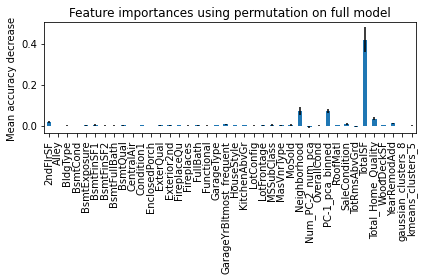

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/samplers/_tpe/sampler.py:250: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

[I 2021-09-18 01:28:16,144] A new study created in memory with name: ngboost tuning


The R2 score is 0.8324021391689977
The MAE score is 17808.520300514436
The Median absolute error score is 10648.001340849034
The MSE score is 26456.066278493618
The RMSE score is 699923442.9320471
Best model is ridge with mean absolute error of {'mae': 19147.349094509478, 'r2_score': 0.8468996497114332, 'MSE': 25285.94136496999, 'RMSE': 639378830.7127004, 'median_absolute_error': 13446.806797216937}
Best model is catboost with mean absolute error of {'mae': 17493.603900573744, 'r2_score': 0.8493028886343693, 'MSE': 25086.697795942724, 'RMSE': 629342406.3049575, 'median_absolute_error': 12219.911686745327}
Best model is ngboost with mean absolute error of {'mae': 15762.292648249499, 'r2_score': 0.8747263995488312, 'MSE': 22872.87803090311, 'RMSE': 523168549.4165702, 'median_absolute_error': 11040.551822979847}
Started Train Ngboost at 01:28:16.


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/25 [00:00<?, ?it/s]

[iter 0] loss=13.1395 val_loss=13.0626 scale=1.0000 norm=0.3334
[iter 100] loss=13.1153 val_loss=13.0514 scale=1.0000 norm=0.2907
[iter 200] loss=13.0894 val_loss=13.0388 scale=2.0000 norm=0.4911
[iter 300] loss=13.0832 val_loss=13.0284 scale=2.0000 norm=0.4085
[iter 400] loss=13.0716 val_loss=13.0214 scale=2.0000 norm=0.3305
[iter 500] loss=13.0615 val_loss=13.0166 scale=2.0000 norm=0.2831
[iter 600] loss=13.0637 val_loss=13.0133 scale=2.0000 norm=0.2424
[iter 700] loss=13.0476 val_loss=13.0109 scale=2.0000 norm=0.2139
[iter 800] loss=13.0394 val_loss=13.0093 scale=2.0000 norm=0.1898
[iter 900] loss=13.0565 val_loss=13.0082 scale=2.0000 norm=0.1668
[iter 1000] loss=13.0472 val_loss=13.0075 scale=2.0000 norm=0.1516
[iter 1100] loss=13.0570 val_loss=13.0069 scale=2.0000 norm=0.1385
[iter 1200] loss=13.0502 val_loss=13.0066 scale=2.0000 norm=0.1254
[iter 1300] loss=13.0546 val_loss=13.0063 scale=2.0000 norm=0.1160
[iter 1400] loss=13.0550 val_loss=13.0062 scale=2.0000 norm=0.1088
[iter 1

[iter 500] loss=13.0545 val_loss=13.0137 scale=2.0000 norm=0.2696
[iter 600] loss=13.0388 val_loss=13.0108 scale=2.0000 norm=0.2317
[iter 700] loss=13.0289 val_loss=13.0089 scale=2.0000 norm=0.2032
[iter 800] loss=13.0429 val_loss=13.0077 scale=2.0000 norm=0.1764
[iter 900] loss=13.0356 val_loss=13.0069 scale=2.0000 norm=0.1590
[iter 1000] loss=13.0395 val_loss=13.0064 scale=2.0000 norm=0.1466
[iter 1100] loss=13.0354 val_loss=13.0061 scale=2.0000 norm=0.1337
[iter 1200] loss=13.0349 val_loss=13.0059 scale=2.0000 norm=0.1238
[iter 1300] loss=13.0357 val_loss=13.0058 scale=2.0000 norm=0.1170
[iter 1400] loss=13.0132 val_loss=13.0057 scale=2.0000 norm=0.1052
== Early stopping achieved.
== Best iteration / VAL1442 (val_loss=13.0057)
[iter 0] loss=13.1221 val_loss=13.0627 scale=1.0000 norm=0.3266
[iter 100] loss=13.1292 val_loss=13.0507 scale=1.0000 norm=0.2926
[iter 200] loss=13.0868 val_loss=13.0362 scale=2.0000 norm=0.4767
[iter 300] loss=13.0793 val_loss=13.0263 scale=2.0000 norm=0.404

[iter 1200] loss=11.4006 val_loss=11.5162 scale=2.0000 norm=0.8179
[iter 1300] loss=11.3695 val_loss=11.4977 scale=1.0000 norm=0.4065
[iter 1400] loss=11.2990 val_loss=11.4883 scale=2.0000 norm=0.8089
== Early stopping achieved.
== Best iteration / VAL1460 (val_loss=11.4865)
[iter 0] loss=12.5907 val_loss=12.4172 scale=1.0000 norm=0.6648
[iter 100] loss=12.4425 val_loss=12.3086 scale=1.0000 norm=0.5465
[iter 200] loss=12.3059 val_loss=12.2236 scale=1.0000 norm=0.5041
[iter 300] loss=12.2463 val_loss=12.1457 scale=1.0000 norm=0.4865
[iter 400] loss=12.1289 val_loss=12.0688 scale=1.0000 norm=0.4635
[iter 500] loss=12.0484 val_loss=11.9888 scale=2.0000 norm=0.9200
[iter 600] loss=11.9347 val_loss=11.9038 scale=2.0000 norm=0.8788
[iter 700] loss=11.8202 val_loss=11.8133 scale=2.0000 norm=0.8891
[iter 800] loss=11.7377 val_loss=11.7273 scale=2.0000 norm=0.8697
[iter 900] loss=11.6207 val_loss=11.6465 scale=2.0000 norm=0.8531
[iter 1000] loss=11.5421 val_loss=11.5818 scale=2.0000 norm=0.8423

/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thomas/anaconda3/envs/rapids-21.06/lib/pyt

[iter 200] loss=12.1457 val_loss=12.1015 scale=2.0000 norm=0.9208


/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thomas/anaconda3/envs/rapids-21.06/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thomas/anaconda3/envs/rapids-21.06/lib/pyt

[iter 300] loss=12.0453 val_loss=11.9882 scale=2.0000 norm=0.8906
[iter 400] loss=11.9075 val_loss=11.8848 scale=2.0000 norm=0.8947
[iter 500] loss=11.7951 val_loss=11.7893 scale=2.0000 norm=0.8770
[iter 600] loss=11.6927 val_loss=11.7016 scale=2.0000 norm=0.8647
[iter 700] loss=11.5737 val_loss=11.6235 scale=2.0000 norm=0.8636
[iter 800] loss=11.4857 val_loss=11.5557 scale=2.0000 norm=0.8553
[iter 900] loss=11.4130 val_loss=11.5000 scale=2.0000 norm=0.8337
[iter 1000] loss=11.3026 val_loss=11.4574 scale=2.0000 norm=0.8524
[iter 1100] loss=11.2340 val_loss=11.4282 scale=2.0000 norm=0.8296
[iter 1200] loss=11.1600 val_loss=11.4128 scale=2.0000 norm=0.8037
== Early stopping achieved.
== Best iteration / VAL1282 (val_loss=11.4087)
[iter 0] loss=12.5261 val_loss=12.4158 scale=2.0000 norm=1.2764
[iter 100] loss=12.3370 val_loss=12.2278 scale=2.0000 norm=1.0064
[iter 200] loss=12.1510 val_loss=12.1006 scale=2.0000 norm=0.9193
[iter 300] loss=12.0564 val_loss=11.9883 scale=2.0000 norm=0.8940


== Early stopping achieved.
== Best iteration / VAL27 (val_loss=11.4455)
[iter 0] loss=12.6998 val_loss=12.4989 scale=1.0000 norm=58794.0769
== Early stopping achieved.
== Best iteration / VAL28 (val_loss=11.4120)
[iter 0] loss=12.7239 val_loss=12.5158 scale=1.0000 norm=60677.2052
== Early stopping achieved.
== Best iteration / VAL28 (val_loss=11.4487)
[iter 0] loss=12.7321 val_loss=12.4591 scale=1.0000 norm=60734.6488
== Early stopping achieved.
== Best iteration / VAL25 (val_loss=11.4606)
[iter 0] loss=12.7590 val_loss=12.5010 scale=1.0000 norm=62084.4849
== Early stopping achieved.
== Best iteration / VAL27 (val_loss=11.4708)
[iter 0] loss=12.7407 val_loss=12.5063 scale=1.0000 norm=61373.0099
== Early stopping achieved.
== Best iteration / VAL29 (val_loss=11.3942)
[I 2021-09-18 01:39:38,540] Trial 3 finished with value: -1003868908.8565071 and parameters: {'base_learner': 'DecTree_depth5', 'Dist': 'Normal', 'n_estimators': 24760, 'minibatch_frac': 0.42063311266913106, 'learning_rate

[iter 100] loss=11.0841 val_loss=11.4515 scale=2.0000 norm=22390.6849
== Early stopping achieved.
== Best iteration / VAL94 (val_loss=11.4475)
[iter 0] loss=12.7894 val_loss=12.5274 scale=2.0000 norm=124597.4245
[iter 100] loss=11.0729 val_loss=11.4601 scale=2.0000 norm=21963.1231
== Early stopping achieved.
== Best iteration / VAL94 (val_loss=11.4520)
[iter 0] loss=12.7881 val_loss=12.5329 scale=2.0000 norm=124462.7968
[iter 100] loss=11.0878 val_loss=11.4735 scale=2.0000 norm=22504.5520
== Early stopping achieved.
== Best iteration / VAL94 (val_loss=11.4656)
[iter 0] loss=12.7719 val_loss=12.5381 scale=2.0000 norm=124218.9225
[iter 100] loss=11.0909 val_loss=11.4648 scale=2.0000 norm=22668.5144
== Early stopping achieved.
== Best iteration / VAL94 (val_loss=11.4599)
[iter 0] loss=12.7750 val_loss=12.5340 scale=2.0000 norm=123212.6941
[iter 100] loss=11.0876 val_loss=11.4634 scale=2.0000 norm=22572.4958
== Early stopping achieved.
== Best iteration / VAL94 (val_loss=11.4568)
[iter 0] 

[iter 1600] loss=11.5959 val_loss=11.6374 scale=1.0000 norm=0.4265
[iter 1700] loss=11.5502 val_loss=11.6023 scale=2.0000 norm=0.8470
[iter 1800] loss=11.5023 val_loss=11.5719 scale=2.0000 norm=0.8436
[iter 1900] loss=11.4326 val_loss=11.5470 scale=2.0000 norm=0.8328
[iter 2000] loss=11.4409 val_loss=11.5293 scale=2.0000 norm=0.8315
[iter 2100] loss=11.3750 val_loss=11.5145 scale=1.0000 norm=0.4224
[iter 2200] loss=11.3253 val_loss=11.5054 scale=2.0000 norm=0.8280
[iter 2300] loss=11.3176 val_loss=11.4988 scale=2.0000 norm=0.8471
[iter 2400] loss=11.3225 val_loss=11.4954 scale=1.0000 norm=0.4198
== Early stopping achieved.
== Best iteration / VAL2416 (val_loss=11.4952)
[iter 0] loss=12.6086 val_loss=12.4222 scale=1.0000 norm=0.6698
[iter 100] loss=12.5216 val_loss=12.3521 scale=1.0000 norm=0.5882
[iter 200] loss=12.4227 val_loss=12.2939 scale=1.0000 norm=0.5418
[iter 300] loss=12.3735 val_loss=12.2408 scale=2.0000 norm=1.0345
[iter 400] loss=12.2792 val_loss=12.1908 scale=1.0000 norm=0

[iter 1200] loss=11.8442 val_loss=11.8209 scale=1.0000 norm=0.4411
[iter 1300] loss=11.8173 val_loss=11.7718 scale=2.0000 norm=0.8687
[iter 1400] loss=11.7097 val_loss=11.7230 scale=2.0000 norm=0.8637
[iter 1500] loss=11.6578 val_loss=11.6800 scale=2.0000 norm=0.8488
[iter 1600] loss=11.5923 val_loss=11.6403 scale=2.0000 norm=0.8367
[iter 1700] loss=11.5831 val_loss=11.6054 scale=1.0000 norm=0.4254
[iter 1800] loss=11.5536 val_loss=11.5743 scale=1.0000 norm=0.4220
[iter 1900] loss=11.4547 val_loss=11.5506 scale=2.0000 norm=0.8505
[iter 2000] loss=11.4324 val_loss=11.5311 scale=2.0000 norm=0.8230
[iter 2100] loss=11.4287 val_loss=11.5165 scale=2.0000 norm=0.8303
[iter 2200] loss=11.3450 val_loss=11.5045 scale=2.0000 norm=0.8222
[iter 2300] loss=11.3375 val_loss=11.4970 scale=2.0000 norm=0.8317
[iter 2400] loss=11.3092 val_loss=11.4923 scale=1.0000 norm=0.4167
== Early stopping achieved.
== Best iteration / VAL2463 (val_loss=11.4906)
[iter 0] loss=12.5584 val_loss=12.4197 scale=1.0000 no

[iter 200] loss=12.2625 val_loss=12.2436 scale=2.0000 norm=73067.9049
[iter 300] loss=12.1170 val_loss=12.1160 scale=2.0000 norm=57071.9378
[iter 400] loss=11.9751 val_loss=11.9959 scale=2.0000 norm=44857.3793
[iter 500] loss=11.8426 val_loss=11.8828 scale=2.0000 norm=36693.5829
[iter 600] loss=11.6843 val_loss=11.7783 scale=2.0000 norm=26803.8515
[iter 700] loss=11.5300 val_loss=11.6843 scale=2.0000 norm=20115.4833
[iter 800] loss=11.4114 val_loss=11.6049 scale=2.0000 norm=16147.4804
[iter 900] loss=11.2661 val_loss=11.5423 scale=2.0000 norm=13665.7116
[iter 1000] loss=11.1104 val_loss=11.5032 scale=2.0000 norm=10036.9896
== Early stopping achieved.
== Best iteration / VAL1076 (val_loss=11.4931)
[iter 0] loss=12.6951 val_loss=12.5312 scale=2.0000 norm=117473.9809
[iter 100] loss=12.3802 val_loss=12.3266 scale=2.0000 norm=93829.9202
[iter 200] loss=12.1856 val_loss=12.1865 scale=2.0000 norm=68547.1658
[iter 300] loss=12.0459 val_loss=12.0604 scale=2.0000 norm=54469.8954
[iter 400] loss

== Early stopping achieved.
== Best iteration / VAL34 (val_loss=13.0061)
[I 2021-09-18 01:45:49,285] Trial 12 finished with value: -971343369.7630708 and parameters: {'base_learner': 'DecTree_depth2', 'Dist': 'Exponential', 'n_estimators': 46083, 'minibatch_frac': 0.42335948693081293, 'learning_rate': 0.06750201328251162}. Best is trial 10 with value: -795666854.6785634.
[iter 0] loss=13.1396 val_loss=13.0561 scale=1.0000 norm=0.3339
== Early stopping achieved.
== Best iteration / VAL35 (val_loss=13.0065)
[iter 0] loss=13.1411 val_loss=13.0558 scale=1.0000 norm=0.3379
== Early stopping achieved.
== Best iteration / VAL27 (val_loss=13.0069)
[iter 0] loss=13.1366 val_loss=13.0558 scale=1.0000 norm=0.3400
== Early stopping achieved.
== Best iteration / VAL32 (val_loss=13.0060)
[iter 0] loss=13.1338 val_loss=13.0553 scale=1.0000 norm=0.3389
== Early stopping achieved.
== Best iteration / VAL28 (val_loss=13.0062)
[iter 0] loss=13.1380 val_loss=13.0569 scale=1.0000 norm=0.3342
== Early stopp

== Early stopping achieved.
== Best iteration / VAL34 (val_loss=11.5026)
[iter 0] loss=12.7597 val_loss=12.5219 scale=1.0000 norm=61537.3615
== Early stopping achieved.
== Best iteration / VAL37 (val_loss=11.5067)
[iter 0] loss=12.7483 val_loss=12.5138 scale=1.0000 norm=60873.2371
== Early stopping achieved.
== Best iteration / VAL36 (val_loss=11.4993)
[I 2021-09-18 01:46:41,691] Trial 17 finished with value: -970344782.981828 and parameters: {'base_learner': 'DecTree_depth2', 'Dist': 'Normal', 'n_estimators': 26953, 'minibatch_frac': 0.983410692553183, 'learning_rate': 0.07808289040462213}. Best is trial 10 with value: -795666854.6785634.
[iter 0] loss=13.1010 val_loss=13.0600 scale=2.0000 norm=0.6175
[iter 100] loss=13.0472 val_loss=13.0053 scale=2.0000 norm=0.1618
== Early stopping achieved.
== Best iteration / VAL149 (val_loss=13.0044)
[iter 0] loss=13.0944 val_loss=13.0601 scale=2.0000 norm=0.6182
[iter 100] loss=13.0499 val_loss=13.0053 scale=2.0000 norm=0.1605
== Early stopping 

[iter 100] loss=13.0505 val_loss=13.0051 scale=2.0000 norm=0.1479
== Early stopping achieved.
== Best iteration / VAL124 (val_loss=13.0049)
[I 2021-09-18 01:48:19,726] Trial 21 finished with value: -838662051.1574786 and parameters: {'base_learner': 'GradientBoost_depth2', 'Dist': 'Exponential', 'n_estimators': 35892, 'minibatch_frac': 0.8424944907681967, 'learning_rate': 0.01258983471873959}. Best is trial 10 with value: -795666854.6785634.
[iter 0] loss=13.1295 val_loss=13.0548 scale=1.0000 norm=0.3298
== Early stopping achieved.
== Best iteration / VAL23 (val_loss=13.0046)
[iter 0] loss=13.1294 val_loss=13.0477 scale=2.0000 norm=0.6635
== Early stopping achieved.
== Best iteration / VAL19 (val_loss=13.0048)
[iter 0] loss=13.1235 val_loss=13.0474 scale=2.0000 norm=0.6654
== Early stopping achieved.
== Best iteration / VAL23 (val_loss=13.0047)
[iter 0] loss=13.1234 val_loss=13.0473 scale=2.0000 norm=0.6664
== Early stopping achieved.
== Best iteration / VAL19 (val_loss=13.0048)
[iter 

[iter 0] loss=13.1337 val_loss=13.0534 scale=1.0000 norm=0.3245
== Early stopping achieved.
== Best iteration / VAL19 (val_loss=13.0046)
Started Predict with Ngboost at 01:49:20.


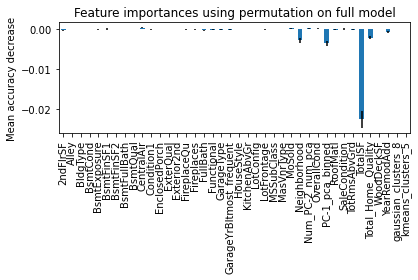

The R2 score is 0.8715227425788054
The MAE score is 15836.67119456644
The Median absolute error score is 10576.47012588664
The MSE score is 23163.498994615096
The RMSE score is 536547685.67353463


In [4]:
housing_ml.ml_special_regression_auto_model_exploration()

In [5]:
# Save pipeline
save_to_production(housing_ml, file_name='housing_automl_instance')

# Predict on new data
In the beginning we kept a holdout dataset. We use this to simulate prediction on completely new data.

In [6]:
# load stored pipeline
housing_ml_loaded = load_for_production(file_name='housing_automl_instance')

In [7]:
# predict on new data
housing_ml_loaded.ml_special_regression_auto_model_exploration(val_df)

# access predicted labels
val_y_hat = housing_ml_loaded.predicted_values[housing_ml_loaded.best_model]

Started Execute test train split at 01:49:26.
Started Started column type detection and casting at 01:49:26.
Started Checking for duplicate columns at 01:49:26.
Started Reset dataframe index. at 01:49:26.
Started Target skewness handling at 01:49:26.
Started Apply datetime transformation at 01:49:26.
Started Start Spacy, POS tagging at 01:49:26.
Started Start TFIDF to PCA loop at 01:49:26.
Started Handle rare features at 01:49:26.
Started Remove cardinality at 01:49:26.
Started  Delete columns with high share of NULLs at 01:49:26.
Started Holistic NULL filling at 01:49:26.
Started Binarize numeric columns + PCA binarized features at 01:49:26.
Started Onehot + PCA categorical features at 01:49:26.
Started Execute categorical encoding at 01:49:27.
Started Fill nulls at 01:49:27.
Started Execute numerical binning at 01:49:27.
Started Handle outliers at 01:49:27.
Started Remove collinearity at 01:49:27.
Started Remove skewness at 01:49:27.
Started Execute clustering as a feature at 01:49:2

In [8]:
housing_ml_loaded.dataframe

2ndFlrSF         Alley       BldgType       BsmtCond   BsmtExposure  \
0         0.0  184632.80625  189886.193694  184632.806250  184632.806250   
1         0.0  184632.80625  189886.193694  187064.160391  169453.159533   
2         0.0  184632.80625  189886.193694  187064.160391  169453.159533   
3         0.0  184632.80625  135031.354839  187064.160391  169453.159533   
4         0.0  184632.80625  188762.387097  187064.160391  169453.159533   
..        ...           ...            ...            ...            ...   
455     694.0  184632.80625  189886.193694  187064.160391  169453.159533   
456       0.0  184632.80625  189886.193694  187064.160391  169453.159533   
457    1152.0  184632.80625  189886.193694  210900.926829  169453.159533   
458       0.0  184632.80625  189886.193694  187064.160391  201001.310345   
459       0.0  184632.80625  189886.193694  187064.160391  169453.159533   

     BsmtFinSF1  BsmtFinSF2  BsmtFullBath       BsmtQual     CentralAir  ...  \
0           0.0         0.0           0.0  184632.806250  104797.867925  ...   
1           0.0         0.0           0.0  108716.669810  190297.132530  ...   
2          24.0         0.0           0.0  204715.160920  190297.132530  ...   
3           0.0         0.0           0.0  139684.599407  190297.132530  ...   
4          16.0         0.0           0.0  204715.160920  190297.132530  ...   
..          ...         ...           ...            ...            ...  ...   
455         0.0         0.0           0.0  204715.160920  190297.132530  ...   
456       790.0       163.0           1.0  204715.160920  190297.132530  ...   
457       275.0         0.0           0.0  139684.599407  190297.132530  ...   
458        49.0      1029.0           1.0  139684.599407  190297.132530  ...   
459       830.0       290.0           1.0  139684.599407  190297.132530  ...   

     PC-1_pca_binned       RoofMatl  SaleCondition  TotRmsAbvGrd  TotalSF  \
0                  2  186943.669236  178887.599379           4.0    944.0   
1                  2  183063.531290  136301.474576           4.0   1382.0   
2                  9  183063.531290  178887.599379           7.0   3148.0   
3                  3  183063.531290  178887.599379           8.0   3360.0   
4                  8  183063.531290  178887.599379           7.0   2850.0   
..               ...            ...            ...           ...      ...   
455                6  183063.531290  178887.599379           7.0   2600.0   
456                2  183063.531290  178887.599379           7.0   3615.0   
457                5  183063.531290  178887.599379           9.0   3492.0   
458                2  183063.531290  178887.599379           5.0   2156.0   
459                3  183063.531290  178887.599379           6.0   2512.0   

     Total_Home_Quality  WoodDeckSF  YearRemodAdd  gaussian_clusters_8  \
0                   6.0         0.0        1952.0                    7   
1                  11.0         0.0        1950.0                    1   
2                  13.0       144.0        2006.0                    2   
3                  11.0         0.0        1976.0                    5   
4                  12.0       156.0        2006.0                    2   
..                  ...         ...           ...                  ...   
455                11.0         0.0        2000.0                    0   
456                12.0       349.0        1988.0                    5   
457                16.0         0.0        2006.0                    6   
458                11.0       366.0        1996.0                    5   
459                11.0       736.0        1965.0                    0   

     kmeans_clusters_5  
0                    0  
1                    0  
2                    4  
3                    0  
4                    4  
..                 ...  
455                  3  
456                  2  
457                  4  
458                  2  
459                  2  

[460 rows x 40 c

# Performance on holdout

In [9]:
# Assess prediction quality on holdout data
mae = mean_absolute_error(val_df_target, val_y_hat)
print(mae)

16461.060823200067


In [10]:
housing_ml_loaded.best_model

'ngboost'